In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
DAY=int(os.environ["THE_DAY"])

In [3]:
print "the day", DAY

the day 15


In [4]:
dim=(54, 4100, 1704)
def get_series(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==dim
    return b
def get_series2(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==(4100, 54, 1704)
    return b  
def s_lag(arr,lag=1):
    l,m,n=arr.shape
    assert lag>0 and lag<n
    a=arr[:,:,:-lag]
    b=np.empty(shape=[l,m,lag],dtype=arr.dtype)
    b.fill(np.nan)
    ba=np.concatenate([b,a],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba    

In [5]:
cat_lag_features={
 "city_0",
  "class_0",
  "cluster_0",
  "family_0",
  "state_0",
  "type_0",

 'city_mv36',
 'class_mv36',
 'cluster_mv36',
 'family_mv36',
 'state_mv36',
 'type_mv36',    
 
 'item_mean_0',
 'store_mean_0',
 }
cat_features={
 'holiday_0',
 #'onpromotion_0',
 'wage_0',
 'd900'
 }
oil_features={'oil_0', 'oil_d1', 'oil_d10', 'oil_d15', 'oil_d3', 'oil_d5'}
sales_ma_features={'sales_ma_112',
 'sales_ma_14',
 'sales_ma_224',
 'sales_ma_28',
 'sales_ma_3',
 'sales_ma_56',
 'sales_ma_7'}
sales_season_ma_features={'sales_week_season_ma_p13',
 'sales_week_season_ma_p2',
 'sales_week_season_ma_p3',
 'sales_week_season_ma_p4',
 'sales_week_season_ma_p7'}

#move x, fix y
def _get_feature(name,lag=0,offset=0):
    if name in cat_lag_features :
        assert lag == 0
        if name in ['item_mean_0','class_mv36','family_mv36','class_0','family_0']:
            s=get_series2(name)
        else:
            s=get_series(name)
        return s_lag(s,offset)
    if name in cat_features or name in oil_features:
        assert offset==0 and lag==0
        s= get_series(name)
        if name =='holiday_0': s[np.isnan(s)]=0
        return s
    if name =="y_0" or name in sales_ma_features or name in sales_season_ma_features:
        #assert  lag == 0
        s=get_series(name)
        if offset==0 and lag==0: return s
        return s_lag(s,lag=offset+lag)
def get_feature(name,lag=0,offset=0):
    s=_get_feature(name=name,lag=lag,offset=offset)
    if s.shape == ( 4100,54, 1704):
        s=np.rollaxis(s,1,0)
    assert s.shape==(54, 4100, 1704), s.shape
    return s
def get_all_features(offset=1):
    assert offset>0
    all_features=[]
    for name in cat_lag_features:
        all_features.append({"name":name,"lag":0,"offset":offset})
    for name in cat_features:
        all_features.append({"name":name,"lag":0,"offset":0})   
#     for name in oil_features:
#         all_features.append({"name":name,"lag":0,"offset":0})  
    for i in range(0,7):
        all_features.append({"name":"y_0","lag":i ,"offset":offset})  
    for name in sales_ma_features:
        all_features.append({"name":name,"lag":0,"offset":offset})  
    for name in sales_season_ma_features:
        all_features.append({"name":name,"lag":(700-offset)%7,"offset":offset})
#     for i in range(1,8):
#         all_features.append({"name":"oil_0","lag":i,"offset":offset})              
    return all_features    
def calc_feature(feat):
    return get_feature(**feat)
def col_name(feat):
    return "{}-lag{}-offset{}".format(feat['name'],feat['lag'],feat['offset'])
def get_train_test(day):
    assert(day>0)
    cols=[]
    train_lst=[]
    
    for feat in get_all_features(day):
        col=col_name(feat)
        print col,
        arr=calc_feature(feat).astype(np.float16)
        train_lst.append(arr)
        cols.append(col)
        gc.collect()
        #break
    return cols,  np.array(train_lst)

In [6]:
def read_data(day):
    print "read data for day", day
    dirname='../input/d'+str(day)+"/"
    y=get_series('y_0')
    cols,train_test=get_train_test(day)
    cols=np.array(cols)    
    train_test=np.rollaxis(train_test,0,4)
    print "loaded", y.shape,train_test.shape 
    return cols,train_test,y.astype(np.float16)

In [7]:
%time cols,train_test,y=read_data(DAY)
rawy=y.copy()
y[np.isnan(y)]=0

read data for day 15


store_mean_0-lag0-offset15

 family_0-lag0-offset15

 city_0-lag0-offset15

 cluster_mv36-lag0-offset15

 cluster_0-lag0-offset15

 city_mv36-lag0-offset15

 item_mean_0-lag0-offset15

 class_0-lag0-offset15

 type_0-lag0-offset15

 type_mv36-lag0-offset15

 state_mv36-lag0-offset15

 class_mv36-lag0-offset15

 state_0-lag0-offset15

 family_mv36-lag0-offset15

 holiday_0-lag0-offset0

 d900-lag0-offset0

 wage_0-lag0-offset0

 y_0-lag0-offset15

 y_0-lag1-offset15

 y_0-lag2-offset15

 y_0-lag3-offset15

 y_0-lag4-offset15

 y_0-lag5-offset15

 y_0-lag6-offset15

 sales_ma_224-lag0-offset15

 sales_ma_14-lag0-offset15

 sales_ma_28-lag0-offset15

 sales_ma_112-lag0-offset15

 sales_ma_7-lag0-offset15

 sales_ma_3-lag0-offset15

 sales_ma_56-lag0-offset15

 sales_week_season_ma_p7-lag6-offset15

 sales_week_season_ma_p4-lag6-offset15

 sales_week_season_ma_p13-lag6-offset15

 sales_week_season_ma_p2-lag6-offset15

 sales_week_season_ma_p3-lag6-offset15

 loaded (54, 4100, 1704) (54, 4100, 1704, 36)


CPU times: user 2min 39s, sys: 27.1 s, total: 3min 6s
Wall time: 3min 6s


In [8]:
print "types", [u.dtype for u in (cols, train_test, y)]
print "shapes", [u.shape for u in (cols, train_test, y)]
print "mem(gb)",np.round(train_test.nbytes/1024.**3,2), np.round(y.nbytes/1024.**3,2)

types [dtype('S38'), dtype('float16'), dtype('float16')]
shapes [(36,), (54, 4100, 1704, 36), (54, 4100, 1704)]
mem(gb) 25.3 0.7


In [9]:
gc.collect()

0

In [10]:
def show_data(store,item,date,filters=None):
    thisy=y[store,item,date-5:date+2]
    a=train_test[store,item,date-5:date+2,:]
    a=np.squeeze(a)
    print a.shape
    columns=cols
    if filters is not None: 
        columns = [u for u in columns if filters(u)]
    df=pd.DataFrame(a,columns=cols,index=range(date-5,date+2))[columns]
    df['target']=thisy
    with pd.option_context('display.max_columns', None):
        display(df)

In [11]:
show_data(0,1000,1688, None)#lambda u: 'y_0' in u)

(7, 36)


store_mean_0-lag0-offset15  family_0-lag0-offset15  \
1683                    1.541992                1.587891   
1684                    1.570312                1.683594   
1685                    1.513672                1.821289   
1686                    1.291016                1.852539   
1687                    1.554688                1.739258   
1688                    1.582031                1.780273   
1689                    1.684570                1.749023   

      city_0-lag0-offset15  cluster_mv36-lag0-offset15  \
1683              1.711914                    1.648438   
1684              1.833984                    1.650391   
1685              1.964844                    1.652344   
1686              2.025391                    1.650391   
1687              1.891602                    1.648438   
1688              1.948242                    1.649414   
1689              1.941406                    1.654297   

      cluster_0-lag0-offset15  city_mv36-lag0-offset15  \
1683                 1.529297                 1.868164   
1684                 1.640625                 1.871094   
1685                 1.695312                 1.875000   
1686                 1.696289                 1.875977   
1687                 1.631836                 1.871094   
1688                 1.679688                 1.875000   
1689                 1.729492                 1.880859   

      item_mean_0-lag0-offset15  class_0-lag0-offset15  type_0-lag0-offset15  \
1683                   1.782227               1.607422              1.541016   
1684                   1.924805               1.776367              1.650391   
1685                   2.148438               1.877930              1.713867   
1686                   2.013672               1.715820              1.728516   
1687                   1.767578               1.609375              1.654297   
1688                   1.710938               1.669922              1.695312   
1689                   1.789062               1.687500              1.740234   

      type_mv36-lag0-offset15  state_mv36-lag0-offset15  \
1683                 1.656250                  1.866211   
1684                 1.660156                  1.869141   
1685                 1.661133                  1.873047   
1686                 1.661133                  1.874023   
1687                 1.658203                  1.869141   
1688                 1.660156                  1.873047   
1689                 1.665039                  1.878906   

      class_mv36-lag0-offset15  state_0-lag0-offset15  \
1683                  1.651367               1.709961   
1684                  1.658203               1.833008   
1685                  1.664062               1.957031   
1686                  1.661133               2.017578   
1687                  1.659180               1.890625   
1688                  1.664062               1.953125   
1689                  1.668945               1.944336   

      family_mv36-lag0-offset15  holiday_0-lag0-offset0  d900-lag0-offset0  \
1683                   1.710938                     1.0                1.0   
1684                   1.714844                     0.0                1.0   
1685                   1.718750                     0.0                1.0   
1686                   1.719727                     0.0                1.0   
1687                   1.715820                     0.0                1.0   
1688                   1.717773                     0.0                1.0   
1689                   1.722656                     0.0                1.0   

      wage_0-lag0-offset0  y_0-lag0-offset15  y_0-lag1-offset15  \
1683             0.733398           2.080078           1.946289   
1684             0.799805           2.398438           2.080078   
1685             0.866699           2.564453           2.398438   
1686             0.933105           1.791992           2.564453   
1687             0.000000           2.197266           1.791992 

In [12]:
def show_data2():
    lst=[]
    days=range(1685,1691)
    for i in range(train_test.shape[-1]):
        lsta=[cols[i]]
        for d in days:
            u=train_test[:,:,d,i]
            lsta.append(np.round(np.isnan(u).mean(),4))
        lst.append(lsta)
            #print '{:>40s} {:.4f} {:.4f} {:.4f} {:.4f}' .format(cols[i],
         #                  np.isnan(u).mean(), np.isnan(v).mean(), np.isnan(w).mean(), np.isnan(ww).mean())
    df=pd.DataFrame(np.array(lst) ,columns=['col']+days)
    return df

In [13]:
show_data2()

col    1685    1686    1687    1688  \
0               store_mean_0-lag0-offset15     0.0     0.0     0.0     0.0   
1                   family_0-lag0-offset15  0.0002     0.0     0.0  0.0002   
2                     city_0-lag0-offset15     0.0     0.0     0.0     0.0   
3               cluster_mv36-lag0-offset15     0.0     0.0     0.0     0.0   
4                  cluster_0-lag0-offset15     0.0     0.0     0.0     0.0   
5                  city_mv36-lag0-offset15     0.0     0.0     0.0     0.0   
6                item_mean_0-lag0-offset15  0.0802  0.0817  0.0849  0.0837   
7                    class_0-lag0-offset15  0.0085  0.0085   0.009  0.0085   
8                     type_0-lag0-offset15     0.0     0.0     0.0     0.0   
9                  type_mv36-lag0-offset15     0.0     0.0     0.0     0.0   
10                state_mv36-lag0-offset15     0.0     0.0     0.0     0.0   
11                class_mv36-lag0-offset15   0.008   0.008   0.008   0.008   
12                   state_0-lag0-offset15     0.0     0.0     0.0     0.0   
13               family_mv36-lag0-offset15     0.0     0.0     0.0     0.0   
14                  holiday_0-lag0-offset0     0.0     0.0     0.0     0.0   
15                       d900-lag0-offset0     0.0     0.0     0.0     0.0   
16                     wage_0-lag0-offset0     0.0     0.0     0.0     0.0   
17                       y_0-lag0-offset15  0.4972  0.4964  0.5195  0.5059   
18                       y_0-lag1-offset15  0.5345  0.4972  0.4964  0.5195   
19                       y_0-lag2-offset15  0.5599  0.5345  0.4972  0.4964   
20                       y_0-lag3-offset15  0.5474  0.5599  0.5345  0.4972   
21                       y_0-lag4-offset15  0.5429  0.5474  0.5599  0.5345   
22                       y_0-lag5-offset15  0.5249  0.5429  0.5474  0.5599   
23                       y_0-lag6-offset15  0.5019  0.5249  0.5429  0.5474   
24              sales_ma_224-lag0-offset15  0.5036  0.5037  0.5037  0.5036   
25               sales_ma_14-lag0-offset15  0.5172  0.5174  0.5164  0.5133   
26               sales_ma_28-lag0-offset15  0.5009  0.5019  0.5029  0.5021   
27              sales_ma_112-lag0-offset15  0.4907  0.4907  0.4904  0.4901   
28                sales_ma_7-lag0-offset15  0.5061  0.5048  0.5034  0.4975   
29                sales_ma_3-lag0-offset15   0.515  0.4928   0.489  0.4925   
30               sales_ma_56-lag0-offset15  0.4942  0.4948  0.4951  0.4943   
31   sales_week_season_ma_p7-lag6-offset15     0.0     0.0     0.0     0.0   
32   sales_week_season_ma_p4-lag6-offset15     0.0     0.0     0.0     0.0   
33  sales_week_season_ma_p13-lag6-offset15     0.0     0.0     0.0     0.0   
34   sales_week_season_ma_p2-lag6-offset15  0.5019  0.5249  0.5429  0.5474   
35   sales_week_season_ma_p3-lag6-offset15     0.0     0.0     0.0     0.0   

      1689    1690  
0      0.0     0.0  
1      0.0  0.0002  
2      0.0     0.0  
3      0.0     0.0  
4      0.0     0.0  
5      0.0     0.0  
6   0.0871  0.0866  
7   0.0083   0.009  
8      0.0     0.0  
9      0.0     0.0  
10     0.0     0.0  
11   0.008  0.0083  
12     0.0     0.0  
13     0.0     0.0  
14     0.0     0.0  
15     0.0     0.0  
16     0.0     0.0  
17  0.5149  0.5382  
18  0.5059  0.5149  
19  0.5195  0.5059  
20  0.4964  0.5195  
21  0.4972  0.4964  
22  0.5345  0.4972  
23  0.5599  0.5345  
24  0.5035  0.5036  
25  0.5107  0.5096  
26   0.502  0.5019  
27  0.4899  0.4899  
28  0.4929  0.4903  
29  0.4987  0.5043  
30  0.4939  0.4938  
31     0.0     0.0  
32     0.0     0.0  
33     0.0     0.0  
34  0.5599  0.5345  
35     0.0     0.0

# cv

In [14]:
def make_data(train_test,y,low,high):
    y_train=y[:,:,low:high]
    X_train=train_test[:,:,low:high,:]
    #ind=~np.isnan(y_train)
    a,b=X_train.reshape([-1,X_train.shape[-1]]),y_train.reshape(-1)
    print a.shape,b.shape,a.dtype,b.dtype
    return a,b 

In [15]:
if 0:
    X_train,y_train=make_data(train_test,y,100,1628)
    X_valid,y_valid=make_data(train_test,y,1628,1668)
    X_test,y_test=make_data(train_test,y,1668,1688)
else:    
    X_train,y_train=make_data(train_test,y,100,1688)
    X_valid,y_valid=None,None
    X_test,y_test=None,None    

(351583200, 36) (351583200,) float16 float16


In [16]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [17]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [18]:
print K.floatx()

float32


In [19]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.intra_op_parallelism_threads=8
config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [20]:
input_dim=train_test.shape[-1]
input_dim

36

In [21]:
class TransformNALayer(Layer):

    def __init__(self,   **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)
        self.supports_masking = True
    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x,training=None):
        def make_na(x):
            ind=tf.is_nan(x)
            filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
            ind=tf.cast(ind,tf.float32)
            filled_x=tf.cast(filled_x,tf.float32)
            return  tf.cast(tf.concat([filled_x,ind],axis=1),tf.float32)
        def add_dropout(x):
            def f(x):
                ind=tf.random_uniform([1,36])<tf.random_uniform([1])[0]/tf.constant(5.0)
                ind2=tf.cast(ind,tf.float32)*tf.ones_like(x)
                newx=tf.where(ind2>0,tf.constant(np.nan,dtype=tf.float32)*tf.ones_like(x), x)
                return newx
            return tf.cond(tf.random_uniform([1])[0]>tf.constant(0.5),lambda: f(x),lambda : x)
        return K.in_train_phase(make_na(add_dropout(x)),make_na(x),training=training)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*2)        

In [22]:
def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [23]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 1.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   print "set learning rate to",lrate
   return lrate
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [24]:
#plt.plot([step_decay(u) for u in range(5)])

In [25]:
class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
    def _make_model(self):
        params=self.params
        model = Sequential()
        model.add(InputLayer(input_shape=params['input_dim']))
        model.add(TransformNALayer())
        for sz in params["hidden_layer_sizes"]:
            if params['batch_normalization']:
                model.add(BatchNormalization())
            model.add(Dense(sz,kernel_regularizer=regularizers.l2(params['l2'])))
            model.add(Dropout(params['dropout_rate']))            
            model.add(Activation(params['activation']))
        if params['loss'] == 'mean_squared_error':
            model.add(Dense(1,activation=None))
            this_loss="mean_squared_error"
            if params['metric']=="mean_squared_error":
                this_metrics=['mean_squared_error']
            else:
                raise Exception("unknown")
        else:
            raise Exception("unknown")
        model.compile(optimizer=params['optimizer'],
          loss=this_loss,
                      metrics=None)
          #metrics=this_metrics)

        self.model=model
        return self
    def fit(self,X,y,valid_X=None,valid_y=None):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        #self.name='day'+str(DAY)+'_adam.{epoch:02d}-{val_loss:.3f}.h5'
        self.name='day'+str(DAY)+'_adam_w0_wop.h5'
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, 
                                                     mode='auto', period=1)        
        batch_size=params['batch_size']

        validation_data=None
        if valid_X is not None:
            validation_split=None
            validation_data=(X_valid,y_valid)
        self.hist=self.model.fit(X, y, batch_size=batch_size,epochs=200, 
                       validation_split=validation_split, 
                       validation_data=validation_data,
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [26]:
param_grid={'input_dim':[(input_dim,)],
            'batch_size':[1024],
            'hidden_layer_sizes': [(256,256),()],
            'metric':['mean_squared_error' ],
            'loss':['mean_squared_error'],
            "validation_split":[0.1],"patience":[3],
            "dropout_rate":[0.0],
            "activation":['relu'],    
            "l2":[1e-6,0],
            "epsilon":[0.1],
            'batch_normalization': [False],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
len(parameters)

12

In [27]:
parameter=parameters[0]
parameter

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [28]:
def run_once(parameter):
    backend.clear_session()
    set_session(tf.Session(config=config))
    a=KerasModel(parameter)
    a._make_model()
    h=a.fit(X,y)
    return [parameter,h.history]

In [29]:
if 0:
    backend.clear_session()
    set_session(tf.Session(config=config))    
    a=KerasModel(parameter)
    a._make_model()
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model).create(prog='dot', format='svg')))
   

In [30]:
backend.clear_session()
set_session(tf.Session(config=config))   
a=KerasModel(parameter)
a._make_model()
a.params

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [31]:
a.fit(X_train,y_train,X_valid,y_valid)

Train on 316424880 samples, validate on 35158320 samples


Epoch 1/200


     1024/316424880 [..............................] - ETA: 2453:49:15 - loss: 1.4026

     8192/316424880 [..............................] - ETA: 307:16:43 - loss: 0.6501 

    15360/316424880 [..............................] - ETA: 164:10:43 - loss: 0.5238

    23552/316424880 [..............................] - ETA: 107:16:19 - loss: 0.4691

    31744/316424880 [..............................] - ETA: 79:44:28 - loss: 0.4278 

    39936/316424880 [..............................] - ETA: 63:30:16 - loss: 0.4046

    48128/316424880 [..............................] - ETA: 52:47:37 - loss: 0.3906

    56320/316424880 [..............................] - ETA: 45:11:34 - loss: 0.3775

    64512/316424880 [..............................] - ETA: 39:31:25 - loss: 0.3674

    72704/316424880 [..............................] - ETA: 35:08:04 - loss: 0.3587

    80896/316424880 [..............................] - ETA: 31:37:57 - loss: 0.3505

    89088/316424880 [..............................] - ETA: 28:46:31 - loss: 0.3465

    97280/316424880 [..............................] - ETA: 26:23:55 - loss: 0.3423

   105472/316424880 [..............................] - ETA: 24:23:39 - loss: 0.3381

   113664/316424880 [..............................] - ETA: 22:40:33 - loss: 0.3351

   121856/316424880 [..............................] - ETA: 21:11:19 - loss: 0.3316

   130048/316424880 [..............................] - ETA: 19:53:23 - loss: 0.3286

   138240/316424880 [..............................] - ETA: 18:44:37 - loss: 0.3265

   146432/316424880 [..............................] - ETA: 17:43:34 - loss: 0.3249

   154624/316424880 [..............................] - ETA: 16:49:02 - loss: 0.3234

   162816/316424880 [..............................] - ETA: 15:59:57 - loss: 0.3220

   171008/316424880 [..............................] - ETA: 15:15:39 - loss: 0.3204

   179200/316424880 [..............................] - ETA: 14:35:18 - loss: 0.3185

   187392/316424880 [..............................] - ETA: 13:58:30 - loss: 0.3175

   195584/316424880 [..............................] - ETA: 13:24:49 - loss: 0.3174

   203776/316424880 [..............................] - ETA: 12:53:50 - loss: 0.3163

   211968/316424880 [..............................] - ETA: 12:25:14 - loss: 0.3154

   220160/316424880 [..............................] - ETA: 11:58:45 - loss: 0.3139

   228352/316424880 [..............................] - ETA: 11:34:13 - loss: 0.3138

   236544/316424880 [..............................] - ETA: 11:11:21 - loss: 0.3130

   244736/316424880 [..............................] - ETA: 10:49:57 - loss: 0.3122

   252928/316424880 [..............................] - ETA: 10:30:00 - loss: 0.3120

   261120/316424880 [..............................] - ETA: 10:11:18 - loss: 0.3116

   269312/316424880 [..............................] - ETA: 9:53:44 - loss: 0.3110 

   277504/316424880 [..............................] - ETA: 9:37:14 - loss: 0.3101

   285696/316424880 [..............................] - ETA: 9:21:41 - loss: 0.3103

   293888/316424880 [..............................] - ETA: 9:07:00 - loss: 0.3100

   302080/316424880 [..............................] - ETA: 8:53:03 - loss: 0.3099

   310272/316424880 [..............................] - ETA: 8:39:50 - loss: 0.3091

   318464/316424880 [..............................] - ETA: 8:27:19 - loss: 0.3093

   326656/316424880 [..............................] - ETA: 8:15:28 - loss: 0.3091

   334848/316424880 [..............................] - ETA: 8:04:10 - loss: 0.3090

   343040/316424880 [..............................] - ETA: 7:53:24 - loss: 0.3086

   351232/316424880 [..............................] - ETA: 7:43:10 - loss: 0.3081

   359424/316424880 [..............................] - ETA: 7:33:23 - loss: 0.3076

   367616/316424880 [..............................] - ETA: 7:24:00 - loss: 0.3075

   375808/316424880 [..............................] - ETA: 7:15:03 - loss: 0.3072

   384000/316424880 [..............................] - ETA: 7:06:28 - loss: 0.3068

   392192/316424880 [..............................] - ETA: 6:58:17 - loss: 0.3067

   400384/316424880 [..............................] - ETA: 6:50:23 - loss: 0.3072

   408576/316424880 [..............................] - ETA: 6:42:50 - loss: 0.3070

   416768/316424880 [..............................] - ETA: 6:35:35 - loss: 0.3068

   424960/316424880 [..............................] - ETA: 6:28:35 - loss: 0.3065

   433152/316424880 [..............................] - ETA: 6:21:51 - loss: 0.3061

   441344/316424880 [..............................] - ETA: 6:15:23 - loss: 0.3058

   449536/316424880 [..............................] - ETA: 6:09:09 - loss: 0.3055

   457728/316424880 [..............................] - ETA: 6:03:09 - loss: 0.3050

   465920/316424880 [..............................] - ETA: 5:57:23 - loss: 0.3044

   474112/316424880 [..............................] - ETA: 5:51:48 - loss: 0.3041

   482304/316424880 [..............................] - ETA: 5:46:23 - loss: 0.3038

   490496/316424880 [..............................] - ETA: 5:41:11 - loss: 0.3035

   498688/316424880 [..............................] - ETA: 5:36:06 - loss: 0.3032

   506880/316424880 [..............................] - ETA: 5:31:13 - loss: 0.3031

   515072/316424880 [..............................] - ETA: 5:26:28 - loss: 0.3026

   523264/316424880 [..............................] - ETA: 5:21:53 - loss: 0.3023

   531456/316424880 [..............................] - ETA: 5:17:27 - loss: 0.3019

   539648/316424880 [..............................] - ETA: 5:13:10 - loss: 0.3017

   547840/316424880 [..............................] - ETA: 5:09:00 - loss: 0.3015

   556032/316424880 [..............................] - ETA: 5:04:56 - loss: 0.3014

   564224/316424880 [..............................] - ETA: 5:01:02 - loss: 0.3012

   572416/316424880 [..............................] - ETA: 4:57:12 - loss: 0.3008

   580608/316424880 [..............................] - ETA: 4:53:28 - loss: 0.3005

   588800/316424880 [..............................] - ETA: 4:49:51 - loss: 0.3005

   596992/316424880 [..............................] - ETA: 4:46:19 - loss: 0.3005

   605184/316424880 [..............................] - ETA: 4:42:54 - loss: 0.3004

   613376/316424880 [..............................] - ETA: 4:39:35 - loss: 0.3004

   621568/316424880 [..............................] - ETA: 4:36:20 - loss: 0.3002

   629760/316424880 [..............................] - ETA: 4:33:10 - loss: 0.2998

   637952/316424880 [..............................] - ETA: 4:30:05 - loss: 0.2997

   646144/316424880 [..............................] - ETA: 4:27:04 - loss: 0.2996

   654336/316424880 [..............................] - ETA: 4:24:09 - loss: 0.2993

   662528/316424880 [..............................] - ETA: 4:21:18 - loss: 0.2991

   670720/316424880 [..............................] - ETA: 4:18:31 - loss: 0.2987

   678912/316424880 [..............................] - ETA: 4:15:48 - loss: 0.2985

   687104/316424880 [..............................] - ETA: 4:13:09 - loss: 0.2984

   695296/316424880 [..............................] - ETA: 4:10:33 - loss: 0.2984

   703488/316424880 [..............................] - ETA: 4:08:02 - loss: 0.2981

   711680/316424880 [..............................] - ETA: 4:05:34 - loss: 0.2979

   719872/316424880 [..............................] - ETA: 4:03:09 - loss: 0.2977

   728064/316424880 [..............................] - ETA: 4:00:48 - loss: 0.2979

   736256/316424880 [..............................] - ETA: 3:58:29 - loss: 0.2981

   743424/316424880 [..............................] - ETA: 3:56:33 - loss: 0.2978

   751616/316424880 [..............................] - ETA: 3:54:21 - loss: 0.2977

   759808/316424880 [..............................] - ETA: 3:52:10 - loss: 0.2973

   768000/316424880 [..............................] - ETA: 3:50:03 - loss: 0.2971

   776192/316424880 [..............................] - ETA: 3:47:59 - loss: 0.2970

   784384/316424880 [..............................] - ETA: 3:45:56 - loss: 0.2968

   792576/316424880 [..............................] - ETA: 3:43:58 - loss: 0.2968

   800768/316424880 [..............................] - ETA: 3:42:01 - loss: 0.2966

   808960/316424880 [..............................] - ETA: 3:40:06 - loss: 0.2966

   817152/316424880 [..............................] - ETA: 3:38:14 - loss: 0.2965

   825344/316424880 [..............................] - ETA: 3:36:24 - loss: 0.2963

   833536/316424880 [..............................] - ETA: 3:34:36 - loss: 0.2963

   841728/316424880 [..............................] - ETA: 3:32:50 - loss: 0.2963

   849920/316424880 [..............................] - ETA: 3:31:05 - loss: 0.2961

   858112/316424880 [..............................] - ETA: 3:29:24 - loss: 0.2960

   866304/316424880 [..............................] - ETA: 3:27:43 - loss: 0.2958

   874496/316424880 [..............................] - ETA: 3:26:05 - loss: 0.2958

   882688/316424880 [..............................] - ETA: 3:24:29 - loss: 0.2957

   890880/316424880 [..............................] - ETA: 3:22:55 - loss: 0.2956

   899072/316424880 [..............................] - ETA: 3:21:24 - loss: 0.2954

   907264/316424880 [..............................] - ETA: 3:19:53 - loss: 0.2951

   915456/316424880 [..............................] - ETA: 3:18:23 - loss: 0.2950

   923648/316424880 [..............................] - ETA: 3:16:56 - loss: 0.2949

   931840/316424880 [..............................] - ETA: 3:15:30 - loss: 0.2950

   940032/316424880 [..............................] - ETA: 3:14:05 - loss: 0.2949

   948224/316424880 [..............................] - ETA: 3:12:42 - loss: 0.2948

   956416/316424880 [..............................] - ETA: 3:11:20 - loss: 0.2949

   964608/316424880 [..............................] - ETA: 3:10:00 - loss: 0.2947

   972800/316424880 [..............................] - ETA: 3:08:40 - loss: 0.2946

   980992/316424880 [..............................] - ETA: 3:07:22 - loss: 0.2946

   989184/316424880 [..............................] - ETA: 3:06:06 - loss: 0.2944

   997376/316424880 [..............................] - ETA: 3:04:51 - loss: 0.2942

  1005568/316424880 [..............................] - ETA: 3:03:37 - loss: 0.2940

  1013760/316424880 [..............................] - ETA: 3:02:24 - loss: 0.2939

  1021952/316424880 [..............................] - ETA: 3:01:13 - loss: 0.2939

  1029120/316424880 [..............................] - ETA: 3:00:12 - loss: 0.2938

  1037312/316424880 [..............................] - ETA: 2:59:03 - loss: 0.2937

  1045504/316424880 [..............................] - ETA: 2:57:54 - loss: 0.2936

  1053696/316424880 [..............................] - ETA: 2:56:46 - loss: 0.2934

  1061888/316424880 [..............................] - ETA: 2:55:40 - loss: 0.2933

  1070080/316424880 [..............................] - ETA: 2:54:34 - loss: 0.2932

  1078272/316424880 [..............................] - ETA: 2:53:31 - loss: 0.2932

  1086464/316424880 [..............................] - ETA: 2:52:27 - loss: 0.2931

  1094656/316424880 [..............................] - ETA: 2:51:24 - loss: 0.2932

  1102848/316424880 [..............................] - ETA: 2:50:23 - loss: 0.2931

  1110016/316424880 [..............................] - ETA: 2:49:31 - loss: 0.2930

  1118208/316424880 [..............................] - ETA: 2:48:31 - loss: 0.2929

  1126400/316424880 [..............................] - ETA: 2:47:32 - loss: 0.2928

  1134592/316424880 [..............................] - ETA: 2:46:34 - loss: 0.2927

  1142784/316424880 [..............................] - ETA: 2:45:37 - loss: 0.2926

  1150976/316424880 [..............................] - ETA: 2:44:41 - loss: 0.2926

  1159168/316424880 [..............................] - ETA: 2:43:45 - loss: 0.2924

  1167360/316424880 [..............................] - ETA: 2:42:50 - loss: 0.2923

  1175552/316424880 [..............................] - ETA: 2:41:56 - loss: 0.2922

  1183744/316424880 [..............................] - ETA: 2:41:03 - loss: 0.2921

  1191936/316424880 [..............................] - ETA: 2:40:11 - loss: 0.2920

  1200128/316424880 [..............................] - ETA: 2:39:19 - loss: 0.2919

  1208320/316424880 [..............................] - ETA: 2:38:28 - loss: 0.2917

  1216512/316424880 [..............................] - ETA: 2:37:38 - loss: 0.2917

  1224704/316424880 [..............................] - ETA: 2:36:48 - loss: 0.2916

  1232896/316424880 [..............................] - ETA: 2:35:59 - loss: 0.2915

  1241088/316424880 [..............................] - ETA: 2:35:10 - loss: 0.2915

  1249280/316424880 [..............................] - ETA: 2:34:22 - loss: 0.2916

  1257472/316424880 [..............................] - ETA: 2:33:34 - loss: 0.2914

  1265664/316424880 [..............................] - ETA: 2:32:47 - loss: 0.2913

  1273856/316424880 [..............................] - ETA: 2:32:00 - loss: 0.2912

  1282048/316424880 [..............................] - ETA: 2:31:15 - loss: 0.2912

  1290240/316424880 [..............................] - ETA: 2:30:30 - loss: 0.2910

  1298432/316424880 [..............................] - ETA: 2:29:46 - loss: 0.2909

  1306624/316424880 [..............................] - ETA: 2:29:03 - loss: 0.2908

  1314816/316424880 [..............................] - ETA: 2:28:20 - loss: 0.2908

  1323008/316424880 [..............................] - ETA: 2:27:37 - loss: 0.2906

  1331200/316424880 [..............................] - ETA: 2:26:55 - loss: 0.2905

  1339392/316424880 [..............................] - ETA: 2:26:14 - loss: 0.2904

  1347584/316424880 [..............................] - ETA: 2:25:33 - loss: 0.2904

  1355776/316424880 [..............................] - ETA: 2:24:52 - loss: 0.2903

  1362944/316424880 [..............................] - ETA: 2:24:18 - loss: 0.2902

  1371136/316424880 [..............................] - ETA: 2:23:39 - loss: 0.2901

  1379328/316424880 [..............................] - ETA: 2:22:59 - loss: 0.2900

  1387520/316424880 [..............................] - ETA: 2:22:20 - loss: 0.2900

  1395712/316424880 [..............................] - ETA: 2:21:41 - loss: 0.2899

  1403904/316424880 [..............................] - ETA: 2:21:03 - loss: 0.2899

  1412096/316424880 [..............................] - ETA: 2:20:26 - loss: 0.2898

  1420288/316424880 [..............................] - ETA: 2:19:48 - loss: 0.2898

  1428480/316424880 [..............................] - ETA: 2:19:11 - loss: 0.2898

  1436672/316424880 [..............................] - ETA: 2:18:34 - loss: 0.2898

  1444864/316424880 [..............................] - ETA: 2:17:59 - loss: 0.2898

  1453056/316424880 [..............................] - ETA: 2:17:23 - loss: 0.2898

  1461248/316424880 [..............................] - ETA: 2:16:48 - loss: 0.2897

  1469440/316424880 [..............................] - ETA: 2:16:14 - loss: 0.2896

  1476608/316424880 [..............................] - ETA: 2:15:45 - loss: 0.2895

  1484800/316424880 [..............................] - ETA: 2:15:11 - loss: 0.2895

  1492992/316424880 [..............................] - ETA: 2:14:38 - loss: 0.2895

  1501184/316424880 [..............................] - ETA: 2:14:05 - loss: 0.2895

  1509376/316424880 [..............................] - ETA: 2:13:33 - loss: 0.2895

  1517568/316424880 [..............................] - ETA: 2:13:01 - loss: 0.2894

  1525760/316424880 [..............................] - ETA: 2:12:29 - loss: 0.2895

  1533952/316424880 [..............................] - ETA: 2:11:57 - loss: 0.2893

  1542144/316424880 [..............................] - ETA: 2:11:26 - loss: 0.2893

  1550336/316424880 [..............................] - ETA: 2:10:55 - loss: 0.2892

  1558528/316424880 [..............................] - ETA: 2:10:24 - loss: 0.2892

  1566720/316424880 [..............................] - ETA: 2:09:53 - loss: 0.2892

  1574912/316424880 [..............................] - ETA: 2:09:23 - loss: 0.2892

  1583104/316424880 [..............................] - ETA: 2:08:53 - loss: 0.2891

  1591296/316424880 [..............................] - ETA: 2:08:23 - loss: 0.2889

  1599488/316424880 [..............................] - ETA: 2:07:54 - loss: 0.2889

  1607680/316424880 [..............................] - ETA: 2:07:25 - loss: 0.2889

  1615872/316424880 [..............................] - ETA: 2:06:57 - loss: 0.2889

  1624064/316424880 [..............................] - ETA: 2:06:28 - loss: 0.2889

  1632256/316424880 [..............................] - ETA: 2:06:00 - loss: 0.2888

  1640448/316424880 [..............................] - ETA: 2:05:32 - loss: 0.2888

  1648640/316424880 [..............................] - ETA: 2:05:05 - loss: 0.2888

  1656832/316424880 [..............................] - ETA: 2:04:38 - loss: 0.2888

  1665024/316424880 [..............................] - ETA: 2:04:11 - loss: 0.2888

  1673216/316424880 [..............................] - ETA: 2:03:44 - loss: 0.2888

  1681408/316424880 [..............................] - ETA: 2:03:18 - loss: 0.2887

  1689600/316424880 [..............................] - ETA: 2:02:52 - loss: 0.2887

  1697792/316424880 [..............................] - ETA: 2:02:26 - loss: 0.2887

  1705984/316424880 [..............................] - ETA: 2:02:00 - loss: 0.2886

  1714176/316424880 [..............................] - ETA: 2:01:34 - loss: 0.2884

  1722368/316424880 [..............................] - ETA: 2:01:09 - loss: 0.2884

  1730560/316424880 [..............................] - ETA: 2:00:44 - loss: 0.2884

  1738752/316424880 [..............................] - ETA: 2:00:19 - loss: 0.2883

  1746944/316424880 [..............................] - ETA: 1:59:54 - loss: 0.2883

  1755136/316424880 [..............................] - ETA: 1:59:30 - loss: 0.2884

  1763328/316424880 [..............................] - ETA: 1:59:06 - loss: 0.2884

  1771520/316424880 [..............................] - ETA: 1:58:42 - loss: 0.2884

  1779712/316424880 [..............................] - ETA: 1:58:19 - loss: 0.2883

  1787904/316424880 [..............................] - ETA: 1:57:56 - loss: 0.2884

  1796096/316424880 [..............................] - ETA: 1:57:33 - loss: 0.2883

  1804288/316424880 [..............................] - ETA: 1:57:10 - loss: 0.2883

  1812480/316424880 [..............................] - ETA: 1:56:47 - loss: 0.2883

  1820672/316424880 [..............................] - ETA: 1:56:25 - loss: 0.2883

  1828864/316424880 [..............................] - ETA: 1:56:02 - loss: 0.2882

  1837056/316424880 [..............................] - ETA: 1:55:40 - loss: 0.2882

  1845248/316424880 [..............................] - ETA: 1:55:19 - loss: 0.2882

  1853440/316424880 [..............................] - ETA: 1:54:57 - loss: 0.2882

  1861632/316424880 [..............................] - ETA: 1:54:36 - loss: 0.2881

  1869824/316424880 [..............................] - ETA: 1:54:14 - loss: 0.2882

  1878016/316424880 [..............................] - ETA: 1:53:53 - loss: 0.2881

  1886208/316424880 [..............................] - ETA: 1:53:32 - loss: 0.2881

  1894400/316424880 [..............................] - ETA: 1:53:11 - loss: 0.2882

  1902592/316424880 [..............................] - ETA: 1:52:50 - loss: 0.2881

  1910784/316424880 [..............................] - ETA: 1:52:30 - loss: 0.2881

  1918976/316424880 [..............................] - ETA: 1:52:10 - loss: 0.2881

  1927168/316424880 [..............................] - ETA: 1:51:50 - loss: 0.2881

  1935360/316424880 [..............................] - ETA: 1:51:30 - loss: 0.2882

  1943552/316424880 [..............................] - ETA: 1:51:10 - loss: 0.2881

  1951744/316424880 [..............................] - ETA: 1:50:50 - loss: 0.2882

  1959936/316424880 [..............................] - ETA: 1:50:31 - loss: 0.2881

  1968128/316424880 [..............................] - ETA: 1:50:12 - loss: 0.2881

  1976320/316424880 [..............................] - ETA: 1:49:52 - loss: 0.2880

  1984512/316424880 [..............................] - ETA: 1:49:33 - loss: 0.2880

  1992704/316424880 [..............................] - ETA: 1:49:15 - loss: 0.2880

  2000896/316424880 [..............................] - ETA: 1:48:56 - loss: 0.2880

  2009088/316424880 [..............................] - ETA: 1:48:38 - loss: 0.2879

  2017280/316424880 [..............................] - ETA: 1:48:20 - loss: 0.2879

  2025472/316424880 [..............................] - ETA: 1:48:02 - loss: 0.2879

  2033664/316424880 [..............................] - ETA: 1:47:43 - loss: 0.2878

  2041856/316424880 [..............................] - ETA: 1:47:25 - loss: 0.2878

  2050048/316424880 [..............................] - ETA: 1:47:07 - loss: 0.2877

  2058240/316424880 [..............................] - ETA: 1:46:49 - loss: 0.2877

  2066432/316424880 [..............................] - ETA: 1:46:32 - loss: 0.2876

  2074624/316424880 [..............................] - ETA: 1:46:14 - loss: 0.2875

  2081792/316424880 [..............................] - ETA: 1:46:00 - loss: 0.2875

  2089984/316424880 [..............................] - ETA: 1:45:42 - loss: 0.2875

  2098176/316424880 [..............................] - ETA: 1:45:25 - loss: 0.2874

  2106368/316424880 [..............................] - ETA: 1:45:09 - loss: 0.2874

  2114560/316424880 [..............................] - ETA: 1:44:52 - loss: 0.2874

  2122752/316424880 [..............................] - ETA: 1:44:36 - loss: 0.2874

  2130944/316424880 [..............................] - ETA: 1:44:19 - loss: 0.2875

  2139136/316424880 [..............................] - ETA: 1:44:03 - loss: 0.2874

  2147328/316424880 [..............................] - ETA: 1:43:47 - loss: 0.2874

  2155520/316424880 [..............................] - ETA: 1:43:30 - loss: 0.2874

  2163712/316424880 [..............................] - ETA: 1:43:15 - loss: 0.2873

  2171904/316424880 [..............................] - ETA: 1:42:59 - loss: 0.2873

  2180096/316424880 [..............................] - ETA: 1:42:43 - loss: 0.2873

  2188288/316424880 [..............................] - ETA: 1:42:27 - loss: 0.2872

  2196480/316424880 [..............................] - ETA: 1:42:11 - loss: 0.2871

  2204672/316424880 [..............................] - ETA: 1:41:56 - loss: 0.2871

  2212864/316424880 [..............................] - ETA: 1:41:41 - loss: 0.2871

  2221056/316424880 [..............................] - ETA: 1:41:25 - loss: 0.2870

  2229248/316424880 [..............................] - ETA: 1:41:10 - loss: 0.2870

  2237440/316424880 [..............................] - ETA: 1:40:56 - loss: 0.2869

  2245632/316424880 [..............................] - ETA: 1:40:41 - loss: 0.2868

  2253824/316424880 [..............................] - ETA: 1:40:26 - loss: 0.2869

  2262016/316424880 [..............................] - ETA: 1:40:11 - loss: 0.2868

  2270208/316424880 [..............................] - ETA: 1:39:56 - loss: 0.2868

  2278400/316424880 [..............................] - ETA: 1:39:42 - loss: 0.2867

  2286592/316424880 [..............................] - ETA: 1:39:28 - loss: 0.2866

  2294784/316424880 [..............................] - ETA: 1:39:13 - loss: 0.2866

  2302976/316424880 [..............................] - ETA: 1:38:59 - loss: 0.2865

  2311168/316424880 [..............................] - ETA: 1:38:45 - loss: 0.2865

  2319360/316424880 [..............................] - ETA: 1:38:32 - loss: 0.2864

  2327552/316424880 [..............................] - ETA: 1:38:18 - loss: 0.2864

  2335744/316424880 [..............................] - ETA: 1:38:04 - loss: 0.2863

  2343936/316424880 [..............................] - ETA: 1:37:50 - loss: 0.2863

  2352128/316424880 [..............................] - ETA: 1:37:37 - loss: 0.2863

  2360320/316424880 [..............................] - ETA: 1:37:23 - loss: 0.2862

  2368512/316424880 [..............................] - ETA: 1:37:10 - loss: 0.2861

  2376704/316424880 [..............................] - ETA: 1:36:57 - loss: 0.2862

  2384896/316424880 [..............................] - ETA: 1:36:44 - loss: 0.2861

  2393088/316424880 [..............................] - ETA: 1:36:31 - loss: 0.2861

  2401280/316424880 [..............................] - ETA: 1:36:18 - loss: 0.2861

  2409472/316424880 [..............................] - ETA: 1:36:05 - loss: 0.2861

  2417664/316424880 [..............................] - ETA: 1:35:52 - loss: 0.2861

  2425856/316424880 [..............................] - ETA: 1:35:40 - loss: 0.2860

  2434048/316424880 [..............................] - ETA: 1:35:27 - loss: 0.2861

  2442240/316424880 [..............................] - ETA: 1:35:15 - loss: 0.2860

  2450432/316424880 [..............................] - ETA: 1:35:02 - loss: 0.2860

  2458624/316424880 [..............................] - ETA: 1:34:49 - loss: 0.2859

  2466816/316424880 [..............................] - ETA: 1:34:37 - loss: 0.2859

  2475008/316424880 [..............................] - ETA: 1:34:25 - loss: 0.2859

  2483200/316424880 [..............................] - ETA: 1:34:13 - loss: 0.2859

  2491392/316424880 [..............................] - ETA: 1:34:00 - loss: 0.2860

  2499584/316424880 [..............................] - ETA: 1:33:49 - loss: 0.2859

  2507776/316424880 [..............................] - ETA: 1:33:37 - loss: 0.2860

  2515968/316424880 [..............................] - ETA: 1:33:25 - loss: 0.2860

  2524160/316424880 [..............................] - ETA: 1:33:13 - loss: 0.2860

  2532352/316424880 [..............................] - ETA: 1:33:01 - loss: 0.2860

  2540544/316424880 [..............................] - ETA: 1:32:50 - loss: 0.2861

  2548736/316424880 [..............................] - ETA: 1:32:38 - loss: 0.2860

  2556928/316424880 [..............................] - ETA: 1:32:26 - loss: 0.2860

  2565120/316424880 [..............................] - ETA: 1:32:15 - loss: 0.2860

  2573312/316424880 [..............................] - ETA: 1:32:03 - loss: 0.2860

  2581504/316424880 [..............................] - ETA: 1:31:52 - loss: 0.2859

  2589696/316424880 [..............................] - ETA: 1:31:41 - loss: 0.2859

  2597888/316424880 [..............................] - ETA: 1:31:30 - loss: 0.2858

  2606080/316424880 [..............................] - ETA: 1:31:19 - loss: 0.2858

  2614272/316424880 [..............................] - ETA: 1:31:08 - loss: 0.2858

  2622464/316424880 [..............................] - ETA: 1:30:57 - loss: 0.2858

  2630656/316424880 [..............................] - ETA: 1:30:46 - loss: 0.2857

  2638848/316424880 [..............................] - ETA: 1:30:36 - loss: 0.2857

  2647040/316424880 [..............................] - ETA: 1:30:25 - loss: 0.2856

  2655232/316424880 [..............................] - ETA: 1:30:15 - loss: 0.2857

  2663424/316424880 [..............................] - ETA: 1:30:04 - loss: 0.2857

  2671616/316424880 [..............................] - ETA: 1:29:54 - loss: 0.2856

  2678784/316424880 [..............................] - ETA: 1:29:45 - loss: 0.2857

  2686976/316424880 [..............................] - ETA: 1:29:35 - loss: 0.2856

  2695168/316424880 [..............................] - ETA: 1:29:24 - loss: 0.2856

  2703360/316424880 [..............................] - ETA: 1:29:14 - loss: 0.2857

  2711552/316424880 [..............................] - ETA: 1:29:04 - loss: 0.2856

  2718720/316424880 [..............................] - ETA: 1:28:55 - loss: 0.2857

  2726912/316424880 [..............................] - ETA: 1:28:45 - loss: 0.2857

  2735104/316424880 [..............................] - ETA: 1:28:35 - loss: 0.2857

  2743296/316424880 [..............................] - ETA: 1:28:25 - loss: 0.2857

  2751488/316424880 [..............................] - ETA: 1:28:15 - loss: 0.2856

  2759680/316424880 [..............................] - ETA: 1:28:06 - loss: 0.2856

  2767872/316424880 [..............................] - ETA: 1:27:56 - loss: 0.2856

  2776064/316424880 [..............................] - ETA: 1:27:46 - loss: 0.2856

  2783232/316424880 [..............................] - ETA: 1:27:38 - loss: 0.2855

  2791424/316424880 [..............................] - ETA: 1:27:29 - loss: 0.2855

  2799616/316424880 [..............................] - ETA: 1:27:19 - loss: 0.2855

  2807808/316424880 [..............................] - ETA: 1:27:09 - loss: 0.2855

  2816000/316424880 [..............................] - ETA: 1:27:00 - loss: 0.2854

  2824192/316424880 [..............................] - ETA: 1:26:50 - loss: 0.2855

  2832384/316424880 [..............................] - ETA: 1:26:41 - loss: 0.2854

  2840576/316424880 [..............................] - ETA: 1:26:32 - loss: 0.2854

  2848768/316424880 [..............................] - ETA: 1:26:23 - loss: 0.2854

  2856960/316424880 [..............................] - ETA: 1:26:14 - loss: 0.2855

  2865152/316424880 [..............................] - ETA: 1:26:04 - loss: 0.2854

  2873344/316424880 [..............................] - ETA: 1:25:55 - loss: 0.2854

  2881536/316424880 [..............................] - ETA: 1:25:46 - loss: 0.2854

  2889728/316424880 [..............................] - ETA: 1:25:37 - loss: 0.2854

  2897920/316424880 [..............................] - ETA: 1:25:28 - loss: 0.2853

  2906112/316424880 [..............................] - ETA: 1:25:20 - loss: 0.2853

  2914304/316424880 [..............................] - ETA: 1:25:11 - loss: 0.2853

  2922496/316424880 [..............................] - ETA: 1:25:02 - loss: 0.2853

  2930688/316424880 [..............................] - ETA: 1:24:53 - loss: 0.2853

  2938880/316424880 [..............................] - ETA: 1:24:45 - loss: 0.2853

  2947072/316424880 [..............................] - ETA: 1:24:36 - loss: 0.2853

  2955264/316424880 [..............................] - ETA: 1:24:27 - loss: 0.2853

  2963456/316424880 [..............................] - ETA: 1:24:18 - loss: 0.2853

  2971648/316424880 [..............................] - ETA: 1:24:10 - loss: 0.2852

  2979840/316424880 [..............................] - ETA: 1:24:01 - loss: 0.2852

  2988032/316424880 [..............................] - ETA: 1:23:53 - loss: 0.2852

  2996224/316424880 [..............................] - ETA: 1:23:45 - loss: 0.2852

  3004416/316424880 [..............................] - ETA: 1:23:36 - loss: 0.2852

  3012608/316424880 [..............................] - ETA: 1:23:28 - loss: 0.2852

  3020800/316424880 [..............................] - ETA: 1:23:20 - loss: 0.2852

  3028992/316424880 [..............................] - ETA: 1:23:12 - loss: 0.2851

  3037184/316424880 [..............................] - ETA: 1:23:04 - loss: 0.2851

  3045376/316424880 [..............................] - ETA: 1:22:56 - loss: 0.2850

  3053568/316424880 [..............................] - ETA: 1:22:48 - loss: 0.2850

  3061760/316424880 [..............................] - ETA: 1:22:40 - loss: 0.2850

  3069952/316424880 [..............................] - ETA: 1:22:32 - loss: 0.2850

  3078144/316424880 [..............................] - ETA: 1:22:24 - loss: 0.2849

  3086336/316424880 [..............................] - ETA: 1:22:16 - loss: 0.2849

  3093504/316424880 [..............................] - ETA: 1:22:10 - loss: 0.2849

  3101696/316424880 [..............................] - ETA: 1:22:02 - loss: 0.2849

  3109888/316424880 [..............................] - ETA: 1:21:54 - loss: 0.2849

  3118080/316424880 [..............................] - ETA: 1:21:46 - loss: 0.2848

  3126272/316424880 [..............................] - ETA: 1:21:39 - loss: 0.2848

  3134464/316424880 [..............................] - ETA: 1:21:31 - loss: 0.2847

  3142656/316424880 [..............................] - ETA: 1:21:23 - loss: 0.2848

  3150848/316424880 [..............................] - ETA: 1:21:15 - loss: 0.2847

  3159040/316424880 [..............................] - ETA: 1:21:08 - loss: 0.2847

  3166208/316424880 [..............................] - ETA: 1:21:02 - loss: 0.2847

  3174400/316424880 [..............................] - ETA: 1:20:55 - loss: 0.2847

  3182592/316424880 [..............................] - ETA: 1:20:47 - loss: 0.2847

  3190784/316424880 [..............................] - ETA: 1:20:40 - loss: 0.2847

  3198976/316424880 [..............................] - ETA: 1:20:32 - loss: 0.2846

  3207168/316424880 [..............................] - ETA: 1:20:25 - loss: 0.2846

  3215360/316424880 [..............................] - ETA: 1:20:18 - loss: 0.2845

  3223552/316424880 [..............................] - ETA: 1:20:11 - loss: 0.2845

  3231744/316424880 [..............................] - ETA: 1:20:04 - loss: 0.2845

  3239936/316424880 [..............................] - ETA: 1:19:56 - loss: 0.2845

  3248128/316424880 [..............................] - ETA: 1:19:49 - loss: 0.2845

  3256320/316424880 [..............................] - ETA: 1:19:42 - loss: 0.2845

  3264512/316424880 [..............................] - ETA: 1:19:35 - loss: 0.2844

  3272704/316424880 [..............................] - ETA: 1:19:28 - loss: 0.2844

  3280896/316424880 [..............................] - ETA: 1:19:21 - loss: 0.2844

  3289088/316424880 [..............................] - ETA: 1:19:14 - loss: 0.2843

  3297280/316424880 [..............................] - ETA: 1:19:07 - loss: 0.2843

  3305472/316424880 [..............................] - ETA: 1:19:01 - loss: 0.2843

  3313664/316424880 [..............................] - ETA: 1:18:54 - loss: 0.2842

  3321856/316424880 [..............................] - ETA: 1:18:47 - loss: 0.2842

  3330048/316424880 [..............................] - ETA: 1:18:40 - loss: 0.2842

  3338240/316424880 [..............................] - ETA: 1:18:34 - loss: 0.2842

  3346432/316424880 [..............................] - ETA: 1:18:27 - loss: 0.2841

  3354624/316424880 [..............................] - ETA: 1:18:20 - loss: 0.2841

  3362816/316424880 [..............................] - ETA: 1:18:14 - loss: 0.2841

  3371008/316424880 [..............................] - ETA: 1:18:07 - loss: 0.2841

  3379200/316424880 [..............................] - ETA: 1:18:01 - loss: 0.2841

  3387392/316424880 [..............................] - ETA: 1:17:54 - loss: 0.2841

  3395584/316424880 [..............................] - ETA: 1:17:48 - loss: 0.2841

  3403776/316424880 [..............................] - ETA: 1:17:41 - loss: 0.2841

  3411968/316424880 [..............................] - ETA: 1:17:35 - loss: 0.2841

  3420160/316424880 [..............................] - ETA: 1:17:29 - loss: 0.2841

  3428352/316424880 [..............................] - ETA: 1:17:22 - loss: 0.2840

  3436544/316424880 [..............................] - ETA: 1:17:16 - loss: 0.2840

  3444736/316424880 [..............................] - ETA: 1:17:09 - loss: 0.2840

  3452928/316424880 [..............................] - ETA: 1:17:03 - loss: 0.2840

  3461120/316424880 [..............................] - ETA: 1:16:57 - loss: 0.2840

  3469312/316424880 [..............................] - ETA: 1:16:50 - loss: 0.2840

  3477504/316424880 [..............................] - ETA: 1:16:44 - loss: 0.2839

  3485696/316424880 [..............................] - ETA: 1:16:38 - loss: 0.2839

  3493888/316424880 [..............................] - ETA: 1:16:32 - loss: 0.2839

  3502080/316424880 [..............................] - ETA: 1:16:26 - loss: 0.2839

  3510272/316424880 [..............................] - ETA: 1:16:20 - loss: 0.2838

  3518464/316424880 [..............................] - ETA: 1:16:14 - loss: 0.2839

  3526656/316424880 [..............................] - ETA: 1:16:08 - loss: 0.2839

  3534848/316424880 [..............................] - ETA: 1:16:01 - loss: 0.2838

  3543040/316424880 [..............................] - ETA: 1:15:56 - loss: 0.2838

  3551232/316424880 [..............................] - ETA: 1:15:50 - loss: 0.2838

  3559424/316424880 [..............................] - ETA: 1:15:44 - loss: 0.2838

  3567616/316424880 [..............................] - ETA: 1:15:38 - loss: 0.2838

  3575808/316424880 [..............................] - ETA: 1:15:32 - loss: 0.2838

  3584000/316424880 [..............................] - ETA: 1:15:26 - loss: 0.2838

  3592192/316424880 [..............................] - ETA: 1:15:21 - loss: 0.2838

  3600384/316424880 [..............................] - ETA: 1:15:15 - loss: 0.2837

  3608576/316424880 [..............................] - ETA: 1:15:09 - loss: 0.2837

  3616768/316424880 [..............................] - ETA: 1:15:03 - loss: 0.2838

  3624960/316424880 [..............................] - ETA: 1:14:58 - loss: 0.2838

  3633152/316424880 [..............................] - ETA: 1:14:52 - loss: 0.2837

  3641344/316424880 [..............................] - ETA: 1:14:46 - loss: 0.2837

  3649536/316424880 [..............................] - ETA: 1:14:41 - loss: 0.2837

  3657728/316424880 [..............................] - ETA: 1:14:35 - loss: 0.2837

  3665920/316424880 [..............................] - ETA: 1:14:29 - loss: 0.2837

  3674112/316424880 [..............................] - ETA: 1:14:24 - loss: 0.2837

  3682304/316424880 [..............................] - ETA: 1:14:19 - loss: 0.2836

  3690496/316424880 [..............................] - ETA: 1:14:13 - loss: 0.2836

  3698688/316424880 [..............................] - ETA: 1:14:08 - loss: 0.2836

  3706880/316424880 [..............................] - ETA: 1:14:02 - loss: 0.2836

  3715072/316424880 [..............................] - ETA: 1:13:57 - loss: 0.2835

  3723264/316424880 [..............................] - ETA: 1:13:51 - loss: 0.2835

  3731456/316424880 [..............................] - ETA: 1:13:46 - loss: 0.2835

  3739648/316424880 [..............................] - ETA: 1:13:40 - loss: 0.2834

  3747840/316424880 [..............................] - ETA: 1:13:35 - loss: 0.2835

  3756032/316424880 [..............................] - ETA: 1:13:30 - loss: 0.2835

  3764224/316424880 [..............................] - ETA: 1:13:24 - loss: 0.2834

  3772416/316424880 [..............................] - ETA: 1:13:19 - loss: 0.2834

  3780608/316424880 [..............................] - ETA: 1:13:14 - loss: 0.2834

  3788800/316424880 [..............................] - ETA: 1:13:09 - loss: 0.2834

  3795968/316424880 [..............................] - ETA: 1:13:04 - loss: 0.2834

  3804160/316424880 [..............................] - ETA: 1:12:59 - loss: 0.2834

  3812352/316424880 [..............................] - ETA: 1:12:54 - loss: 0.2834

  3820544/316424880 [..............................] - ETA: 1:12:49 - loss: 0.2834

  3828736/316424880 [..............................] - ETA: 1:12:44 - loss: 0.2834

  3836928/316424880 [..............................] - ETA: 1:12:39 - loss: 0.2834

  3845120/316424880 [..............................] - ETA: 1:12:34 - loss: 0.2834

  3853312/316424880 [..............................] - ETA: 1:12:29 - loss: 0.2833

  3861504/316424880 [..............................] - ETA: 1:12:24 - loss: 0.2833

  3869696/316424880 [..............................] - ETA: 1:12:19 - loss: 0.2833

  3877888/316424880 [..............................] - ETA: 1:12:14 - loss: 0.2833

  3886080/316424880 [..............................] - ETA: 1:12:09 - loss: 0.2832

  3894272/316424880 [..............................] - ETA: 1:12:04 - loss: 0.2832

  3902464/316424880 [..............................] - ETA: 1:11:59 - loss: 0.2832

  3910656/316424880 [..............................] - ETA: 1:11:54 - loss: 0.2832

  3918848/316424880 [..............................] - ETA: 1:11:49 - loss: 0.2832

  3927040/316424880 [..............................] - ETA: 1:11:44 - loss: 0.2832

  3935232/316424880 [..............................] - ETA: 1:11:39 - loss: 0.2832

  3943424/316424880 [..............................] - ETA: 1:11:34 - loss: 0.2832

  3951616/316424880 [..............................] - ETA: 1:11:29 - loss: 0.2832

  3959808/316424880 [..............................] - ETA: 1:11:25 - loss: 0.2832

  3968000/316424880 [..............................] - ETA: 1:11:20 - loss: 0.2832

  3976192/316424880 [..............................] - ETA: 1:11:15 - loss: 0.2832

  3984384/316424880 [..............................] - ETA: 1:11:10 - loss: 0.2832

  3992576/316424880 [..............................] - ETA: 1:11:06 - loss: 0.2832

  4000768/316424880 [..............................] - ETA: 1:11:01 - loss: 0.2832

  4008960/316424880 [..............................] - ETA: 1:10:57 - loss: 0.2832

  4017152/316424880 [..............................] - ETA: 1:10:52 - loss: 0.2832

  4025344/316424880 [..............................] - ETA: 1:10:47 - loss: 0.2832

  4033536/316424880 [..............................] - ETA: 1:10:43 - loss: 0.2832

  4041728/316424880 [..............................] - ETA: 1:10:38 - loss: 0.2832

  4049920/316424880 [..............................] - ETA: 1:10:34 - loss: 0.2832

  4058112/316424880 [..............................] - ETA: 1:10:29 - loss: 0.2831

  4066304/316424880 [..............................] - ETA: 1:10:24 - loss: 0.2831

  4074496/316424880 [..............................] - ETA: 1:10:20 - loss: 0.2831

  4082688/316424880 [..............................] - ETA: 1:10:15 - loss: 0.2832

  4090880/316424880 [..............................] - ETA: 1:10:11 - loss: 0.2831

  4099072/316424880 [..............................] - ETA: 1:10:06 - loss: 0.2831

  4107264/316424880 [..............................] - ETA: 1:10:02 - loss: 0.2831

  4115456/316424880 [..............................] - ETA: 1:09:57 - loss: 0.2831

  4123648/316424880 [..............................] - ETA: 1:09:53 - loss: 0.2831

  4131840/316424880 [..............................] - ETA: 1:09:49 - loss: 0.2831

  4140032/316424880 [..............................] - ETA: 1:09:44 - loss: 0.2830

  4148224/316424880 [..............................] - ETA: 1:09:40 - loss: 0.2830

  4156416/316424880 [..............................] - ETA: 1:09:36 - loss: 0.2830

  4164608/316424880 [..............................] - ETA: 1:09:31 - loss: 0.2830

  4172800/316424880 [..............................] - ETA: 1:09:27 - loss: 0.2831

  4180992/316424880 [..............................] - ETA: 1:09:23 - loss: 0.2830

  4189184/316424880 [..............................] - ETA: 1:09:18 - loss: 0.2830

  4197376/316424880 [..............................] - ETA: 1:09:14 - loss: 0.2830

  4205568/316424880 [..............................] - ETA: 1:09:10 - loss: 0.2830

  4213760/316424880 [..............................] - ETA: 1:09:05 - loss: 0.2830

  4221952/316424880 [..............................] - ETA: 1:09:01 - loss: 0.2830

  4230144/316424880 [..............................] - ETA: 1:08:57 - loss: 0.2830

  4238336/316424880 [..............................] - ETA: 1:08:52 - loss: 0.2831

  4246528/316424880 [..............................] - ETA: 1:08:48 - loss: 0.2831

  4254720/316424880 [..............................] - ETA: 1:08:44 - loss: 0.2831

  4262912/316424880 [..............................] - ETA: 1:08:40 - loss: 0.2831

  4271104/316424880 [..............................] - ETA: 1:08:36 - loss: 0.2831

  4279296/316424880 [..............................] - ETA: 1:08:32 - loss: 0.2831

  4287488/316424880 [..............................] - ETA: 1:08:28 - loss: 0.2831

  4295680/316424880 [..............................] - ETA: 1:08:24 - loss: 0.2831

  4303872/316424880 [..............................] - ETA: 1:08:20 - loss: 0.2831

  4312064/316424880 [..............................] - ETA: 1:08:16 - loss: 0.2830

  4320256/316424880 [..............................] - ETA: 1:08:12 - loss: 0.2830

  4328448/316424880 [..............................] - ETA: 1:08:08 - loss: 0.2830

  4336640/316424880 [..............................] - ETA: 1:08:04 - loss: 0.2830

  4344832/316424880 [..............................] - ETA: 1:08:00 - loss: 0.2830

  4353024/316424880 [..............................] - ETA: 1:07:56 - loss: 0.2830

  4361216/316424880 [..............................] - ETA: 1:07:52 - loss: 0.2830

  4369408/316424880 [..............................] - ETA: 1:07:48 - loss: 0.2830

  4377600/316424880 [..............................] - ETA: 1:07:44 - loss: 0.2830

  4385792/316424880 [..............................] - ETA: 1:07:40 - loss: 0.2830

  4393984/316424880 [..............................] - ETA: 1:07:36 - loss: 0.2830

  4402176/316424880 [..............................] - ETA: 1:07:32 - loss: 0.2829

  4410368/316424880 [..............................] - ETA: 1:07:29 - loss: 0.2829

  4418560/316424880 [..............................] - ETA: 1:07:25 - loss: 0.2829

  4426752/316424880 [..............................] - ETA: 1:07:21 - loss: 0.2829

  4434944/316424880 [..............................] - ETA: 1:07:17 - loss: 0.2829

  4443136/316424880 [..............................] - ETA: 1:07:13 - loss: 0.2829

  4451328/316424880 [..............................] - ETA: 1:07:10 - loss: 0.2829

  4459520/316424880 [..............................] - ETA: 1:07:06 - loss: 0.2829

  4467712/316424880 [..............................] - ETA: 1:07:02 - loss: 0.2829

  4475904/316424880 [..............................] - ETA: 1:06:58 - loss: 0.2829

  4484096/316424880 [..............................] - ETA: 1:06:54 - loss: 0.2828

  4492288/316424880 [..............................] - ETA: 1:06:51 - loss: 0.2828

  4500480/316424880 [..............................] - ETA: 1:06:47 - loss: 0.2828

  4508672/316424880 [..............................] - ETA: 1:06:43 - loss: 0.2828

  4516864/316424880 [..............................] - ETA: 1:06:40 - loss: 0.2828

  4525056/316424880 [..............................] - ETA: 1:06:36 - loss: 0.2828

  4534272/316424880 [..............................] - ETA: 1:06:32 - loss: 0.2828

  4542464/316424880 [..............................] - ETA: 1:06:28 - loss: 0.2828

  4550656/316424880 [..............................] - ETA: 1:06:25 - loss: 0.2827

  4558848/316424880 [..............................] - ETA: 1:06:21 - loss: 0.2827

  4567040/316424880 [..............................] - ETA: 1:06:17 - loss: 0.2827

  4575232/316424880 [..............................] - ETA: 1:06:14 - loss: 0.2827

  4583424/316424880 [..............................] - ETA: 1:06:10 - loss: 0.2827

  4591616/316424880 [..............................] - ETA: 1:06:07 - loss: 0.2827

  4599808/316424880 [..............................] - ETA: 1:06:03 - loss: 0.2827

  4608000/316424880 [..............................] - ETA: 1:06:00 - loss: 0.2827

  4616192/316424880 [..............................] - ETA: 1:05:56 - loss: 0.2827

  4624384/316424880 [..............................] - ETA: 1:05:52 - loss: 0.2826

  4632576/316424880 [..............................] - ETA: 1:05:49 - loss: 0.2826

  4640768/316424880 [..............................] - ETA: 1:05:45 - loss: 0.2826

  4648960/316424880 [..............................] - ETA: 1:05:42 - loss: 0.2826

  4657152/316424880 [..............................] - ETA: 1:05:39 - loss: 0.2826

  4664320/316424880 [..............................] - ETA: 1:05:36 - loss: 0.2826

  4672512/316424880 [..............................] - ETA: 1:05:32 - loss: 0.2826

  4680704/316424880 [..............................] - ETA: 1:05:29 - loss: 0.2826

  4688896/316424880 [..............................] - ETA: 1:05:25 - loss: 0.2825

  4697088/316424880 [..............................] - ETA: 1:05:22 - loss: 0.2825

  4705280/316424880 [..............................] - ETA: 1:05:18 - loss: 0.2825

  4713472/316424880 [..............................] - ETA: 1:05:15 - loss: 0.2825

  4721664/316424880 [..............................] - ETA: 1:05:12 - loss: 0.2825

  4729856/316424880 [..............................] - ETA: 1:05:08 - loss: 0.2825

  4738048/316424880 [..............................] - ETA: 1:05:05 - loss: 0.2824

  4746240/316424880 [..............................] - ETA: 1:05:02 - loss: 0.2824

  4754432/316424880 [..............................] - ETA: 1:04:58 - loss: 0.2824

  4762624/316424880 [..............................] - ETA: 1:04:55 - loss: 0.2824

  4770816/316424880 [..............................] - ETA: 1:04:52 - loss: 0.2824

  4779008/316424880 [..............................] - ETA: 1:04:48 - loss: 0.2824

  4787200/316424880 [..............................] - ETA: 1:04:45 - loss: 0.2824

  4795392/316424880 [..............................] - ETA: 1:04:42 - loss: 0.2824

  4803584/316424880 [..............................] - ETA: 1:04:38 - loss: 0.2824

  4811776/316424880 [..............................] - ETA: 1:04:35 - loss: 0.2824

  4819968/316424880 [..............................] - ETA: 1:04:32 - loss: 0.2824

  4828160/316424880 [..............................] - ETA: 1:04:29 - loss: 0.2824

  4836352/316424880 [..............................] - ETA: 1:04:25 - loss: 0.2824

  4844544/316424880 [..............................] - ETA: 1:04:22 - loss: 0.2824

  4852736/316424880 [..............................] - ETA: 1:04:19 - loss: 0.2824

  4860928/316424880 [..............................] - ETA: 1:04:16 - loss: 0.2824

  4869120/316424880 [..............................] - ETA: 1:04:13 - loss: 0.2824

  4877312/316424880 [..............................] - ETA: 1:04:10 - loss: 0.2824

  4885504/316424880 [..............................] - ETA: 1:04:07 - loss: 0.2824

  4893696/316424880 [..............................] - ETA: 1:04:03 - loss: 0.2824

  4901888/316424880 [..............................] - ETA: 1:04:00 - loss: 0.2824

  4910080/316424880 [..............................] - ETA: 1:03:57 - loss: 0.2824

  4918272/316424880 [..............................] - ETA: 1:03:54 - loss: 0.2824

  4926464/316424880 [..............................] - ETA: 1:03:51 - loss: 0.2824

  4934656/316424880 [..............................] - ETA: 1:03:48 - loss: 0.2824

  4942848/316424880 [..............................] - ETA: 1:03:45 - loss: 0.2824

  4950016/316424880 [..............................] - ETA: 1:03:42 - loss: 0.2824

  4958208/316424880 [..............................] - ETA: 1:03:39 - loss: 0.2824

  4966400/316424880 [..............................] - ETA: 1:03:36 - loss: 0.2823

  4974592/316424880 [..............................] - ETA: 1:03:33 - loss: 0.2823

  4982784/316424880 [..............................] - ETA: 1:03:30 - loss: 0.2823

  4990976/316424880 [..............................] - ETA: 1:03:27 - loss: 0.2823

  4999168/316424880 [..............................] - ETA: 1:03:24 - loss: 0.2823

  5007360/316424880 [..............................] - ETA: 1:03:21 - loss: 0.2823

  5015552/316424880 [..............................] - ETA: 1:03:18 - loss: 0.2822

  5023744/316424880 [..............................] - ETA: 1:03:15 - loss: 0.2823

  5031936/316424880 [..............................] - ETA: 1:03:12 - loss: 0.2823

  5040128/316424880 [..............................] - ETA: 1:03:09 - loss: 0.2823

  5048320/316424880 [..............................] - ETA: 1:03:06 - loss: 0.2823

  5056512/316424880 [..............................] - ETA: 1:03:03 - loss: 0.2822

  5064704/316424880 [..............................] - ETA: 1:03:00 - loss: 0.2822

  5072896/316424880 [..............................] - ETA: 1:02:57 - loss: 0.2822

  5081088/316424880 [..............................] - ETA: 1:02:54 - loss: 0.2822

  5089280/316424880 [..............................] - ETA: 1:02:51 - loss: 0.2822

  5097472/316424880 [..............................] - ETA: 1:02:48 - loss: 0.2822

  5105664/316424880 [..............................] - ETA: 1:02:45 - loss: 0.2822

  5113856/316424880 [..............................] - ETA: 1:02:42 - loss: 0.2822

  5122048/316424880 [..............................] - ETA: 1:02:39 - loss: 0.2822

  5130240/316424880 [..............................] - ETA: 1:02:36 - loss: 0.2822

  5138432/316424880 [..............................] - ETA: 1:02:33 - loss: 0.2822

  5146624/316424880 [..............................] - ETA: 1:02:30 - loss: 0.2822

  5154816/316424880 [..............................] - ETA: 1:02:27 - loss: 0.2822

  5163008/316424880 [..............................] - ETA: 1:02:24 - loss: 0.2822

  5171200/316424880 [..............................] - ETA: 1:02:21 - loss: 0.2822

  5179392/316424880 [..............................] - ETA: 1:02:19 - loss: 0.2822

  5187584/316424880 [..............................] - ETA: 1:02:16 - loss: 0.2821

  5195776/316424880 [..............................] - ETA: 1:02:13 - loss: 0.2821

  5203968/316424880 [..............................] - ETA: 1:02:10 - loss: 0.2821

  5212160/316424880 [..............................] - ETA: 1:02:08 - loss: 0.2821

  5220352/316424880 [..............................] - ETA: 1:02:05 - loss: 0.2821

  5228544/316424880 [..............................] - ETA: 1:02:02 - loss: 0.2821

  5236736/316424880 [..............................] - ETA: 1:01:59 - loss: 0.2820

  5244928/316424880 [..............................] - ETA: 1:01:57 - loss: 0.2820

  5253120/316424880 [..............................] - ETA: 1:01:54 - loss: 0.2820

  5261312/316424880 [..............................] - ETA: 1:01:51 - loss: 0.2820

  5269504/316424880 [..............................] - ETA: 1:01:49 - loss: 0.2820

  5277696/316424880 [..............................] - ETA: 1:01:46 - loss: 0.2820

  5285888/316424880 [..............................] - ETA: 1:01:43 - loss: 0.2820

  5294080/316424880 [..............................] - ETA: 1:01:41 - loss: 0.2820

  5302272/316424880 [..............................] - ETA: 1:01:38 - loss: 0.2819

  5310464/316424880 [..............................] - ETA: 1:01:35 - loss: 0.2819

  5318656/316424880 [..............................] - ETA: 1:01:32 - loss: 0.2819

  5326848/316424880 [..............................] - ETA: 1:01:30 - loss: 0.2819

  5335040/316424880 [..............................] - ETA: 1:01:27 - loss: 0.2819

  5343232/316424880 [..............................] - ETA: 1:01:25 - loss: 0.2819

  5351424/316424880 [..............................] - ETA: 1:01:22 - loss: 0.2819

  5359616/316424880 [..............................] - ETA: 1:01:20 - loss: 0.2819

  5367808/316424880 [..............................] - ETA: 1:01:17 - loss: 0.2819

  5376000/316424880 [..............................] - ETA: 1:01:14 - loss: 0.2818

  5384192/316424880 [..............................] - ETA: 1:01:12 - loss: 0.2818

  5392384/316424880 [..............................] - ETA: 1:01:09 - loss: 0.2818

  5399552/316424880 [..............................] - ETA: 1:01:07 - loss: 0.2818

  5407744/316424880 [..............................] - ETA: 1:01:05 - loss: 0.2818

  5415936/316424880 [..............................] - ETA: 1:01:02 - loss: 0.2817

  5424128/316424880 [..............................] - ETA: 1:01:00 - loss: 0.2818

  5432320/316424880 [..............................] - ETA: 1:00:57 - loss: 0.2817

  5440512/316424880 [..............................] - ETA: 1:00:55 - loss: 0.2817

  5448704/316424880 [..............................] - ETA: 1:00:52 - loss: 0.2817

  5456896/316424880 [..............................] - ETA: 1:00:50 - loss: 0.2817

  5465088/316424880 [..............................] - ETA: 1:00:47 - loss: 0.2817

  5473280/316424880 [..............................] - ETA: 1:00:45 - loss: 0.2817

  5481472/316424880 [..............................] - ETA: 1:00:42 - loss: 0.2817

  5489664/316424880 [..............................] - ETA: 1:00:40 - loss: 0.2817

  5497856/316424880 [..............................] - ETA: 1:00:37 - loss: 0.2816

  5506048/316424880 [..............................] - ETA: 1:00:35 - loss: 0.2816

  5514240/316424880 [..............................] - ETA: 1:00:32 - loss: 0.2816

  5522432/316424880 [..............................] - ETA: 1:00:30 - loss: 0.2816

  5530624/316424880 [..............................] - ETA: 1:00:27 - loss: 0.2816

  5538816/316424880 [..............................] - ETA: 1:00:25 - loss: 0.2816

  5547008/316424880 [..............................] - ETA: 1:00:22 - loss: 0.2816

  5555200/316424880 [..............................] - ETA: 1:00:20 - loss: 0.2816

  5563392/316424880 [..............................] - ETA: 1:00:18 - loss: 0.2816

  5571584/316424880 [..............................] - ETA: 1:00:15 - loss: 0.2816

  5579776/316424880 [..............................] - ETA: 1:00:12 - loss: 0.2816

  5587968/316424880 [..............................] - ETA: 1:00:10 - loss: 0.2816

  5596160/316424880 [..............................] - ETA: 1:00:08 - loss: 0.2816

  5603328/316424880 [..............................] - ETA: 1:00:06 - loss: 0.2816

  5611520/316424880 [..............................] - ETA: 1:00:03 - loss: 0.2816

  5619712/316424880 [..............................] - ETA: 1:00:01 - loss: 0.2815

  5627904/316424880 [..............................] - ETA: 59:58 - loss: 0.2815  

  5636096/316424880 [..............................] - ETA: 59:56 - loss: 0.2815

  5644288/316424880 [..............................] - ETA: 59:54 - loss: 0.2815

  5652480/316424880 [..............................] - ETA: 59:51 - loss: 0.2815

  5660672/316424880 [..............................] - ETA: 59:49 - loss: 0.2815

  5668864/316424880 [..............................] - ETA: 59:47 - loss: 0.2815

  5677056/316424880 [..............................] - ETA: 59:44 - loss: 0.2815

  5685248/316424880 [..............................] - ETA: 59:42 - loss: 0.2815

  5693440/316424880 [..............................] - ETA: 59:40 - loss: 0.2814

  5701632/316424880 [..............................] - ETA: 59:37 - loss: 0.2814

  5709824/316424880 [..............................] - ETA: 59:35 - loss: 0.2814

  5718016/316424880 [..............................] - ETA: 59:33 - loss: 0.2814

  5726208/316424880 [..............................] - ETA: 59:30 - loss: 0.2814

  5734400/316424880 [..............................] - ETA: 59:28 - loss: 0.2814

  5742592/316424880 [..............................] - ETA: 59:25 - loss: 0.2814

  5750784/316424880 [..............................] - ETA: 59:23 - loss: 0.2814

  5758976/316424880 [..............................] - ETA: 59:21 - loss: 0.2814

  5767168/316424880 [..............................] - ETA: 59:19 - loss: 0.2814

  5775360/316424880 [..............................] - ETA: 59:16 - loss: 0.2814

  5783552/316424880 [..............................] - ETA: 59:14 - loss: 0.2813

  5791744/316424880 [..............................] - ETA: 59:12 - loss: 0.2813

  5799936/316424880 [..............................] - ETA: 59:09 - loss: 0.2813

  5808128/316424880 [..............................] - ETA: 59:07 - loss: 0.2813

  5816320/316424880 [..............................] - ETA: 59:05 - loss: 0.2813

  5824512/316424880 [..............................] - ETA: 59:03 - loss: 0.2813

  5832704/316424880 [..............................] - ETA: 59:00 - loss: 0.2813

  5840896/316424880 [..............................] - ETA: 58:58 - loss: 0.2813

  5849088/316424880 [..............................] - ETA: 58:56 - loss: 0.2813

  5857280/316424880 [..............................] - ETA: 58:54 - loss: 0.2813

  5866496/316424880 [..............................] - ETA: 58:51 - loss: 0.2813

  5874688/316424880 [..............................] - ETA: 58:49 - loss: 0.2812

  5882880/316424880 [..............................] - ETA: 58:47 - loss: 0.2813

  5891072/316424880 [..............................] - ETA: 58:44 - loss: 0.2813

  5899264/316424880 [..............................] - ETA: 58:42 - loss: 0.2813

  5907456/316424880 [..............................] - ETA: 58:40 - loss: 0.2812

  5915648/316424880 [..............................] - ETA: 58:38 - loss: 0.2812

  5923840/316424880 [..............................] - ETA: 58:36 - loss: 0.2812

  5932032/316424880 [..............................] - ETA: 58:34 - loss: 0.2812

  5940224/316424880 [..............................] - ETA: 58:32 - loss: 0.2812

  5948416/316424880 [..............................] - ETA: 58:29 - loss: 0.2812

  5956608/316424880 [..............................] - ETA: 58:27 - loss: 0.2812

  5964800/316424880 [..............................] - ETA: 58:25 - loss: 0.2812

  5972992/316424880 [..............................] - ETA: 58:23 - loss: 0.2812

  5981184/316424880 [..............................] - ETA: 58:21 - loss: 0.2812

  5989376/316424880 [..............................] - ETA: 58:19 - loss: 0.2811

  5997568/316424880 [..............................] - ETA: 58:17 - loss: 0.2811

  6005760/316424880 [..............................] - ETA: 58:15 - loss: 0.2811

  6013952/316424880 [..............................] - ETA: 58:13 - loss: 0.2811

  6022144/316424880 [..............................] - ETA: 58:11 - loss: 0.2811

  6030336/316424880 [..............................] - ETA: 58:08 - loss: 0.2811

  6038528/316424880 [..............................] - ETA: 58:06 - loss: 0.2811

  6046720/316424880 [..............................] - ETA: 58:04 - loss: 0.2811

  6054912/316424880 [..............................] - ETA: 58:02 - loss: 0.2811

  6063104/316424880 [..............................] - ETA: 58:00 - loss: 0.2811

  6071296/316424880 [..............................] - ETA: 57:58 - loss: 0.2811

  6079488/316424880 [..............................] - ETA: 57:56 - loss: 0.2811

  6086656/316424880 [..............................] - ETA: 57:54 - loss: 0.2811

  6094848/316424880 [..............................] - ETA: 57:52 - loss: 0.2811

  6103040/316424880 [..............................] - ETA: 57:50 - loss: 0.2811

  6111232/316424880 [..............................] - ETA: 57:48 - loss: 0.2811

  6119424/316424880 [..............................] - ETA: 57:46 - loss: 0.2811

  6127616/316424880 [..............................] - ETA: 57:44 - loss: 0.2811

  6135808/316424880 [..............................] - ETA: 57:42 - loss: 0.2811

  6144000/316424880 [..............................] - ETA: 57:40 - loss: 0.2810

  6152192/316424880 [..............................] - ETA: 57:38 - loss: 0.2810

  6160384/316424880 [..............................] - ETA: 57:36 - loss: 0.2810

  6168576/316424880 [..............................] - ETA: 57:34 - loss: 0.2810

  6175744/316424880 [..............................] - ETA: 57:33 - loss: 0.2810

  6183936/316424880 [..............................] - ETA: 57:31 - loss: 0.2810

  6192128/316424880 [..............................] - ETA: 57:29 - loss: 0.2810

  6200320/316424880 [..............................] - ETA: 57:27 - loss: 0.2810

  6208512/316424880 [..............................] - ETA: 57:25 - loss: 0.2810

  6216704/316424880 [..............................] - ETA: 57:23 - loss: 0.2810

  6224896/316424880 [..............................] - ETA: 57:21 - loss: 0.2810

  6233088/316424880 [..............................] - ETA: 57:19 - loss: 0.2810

  6241280/316424880 [..............................] - ETA: 57:17 - loss: 0.2810

  6249472/316424880 [..............................] - ETA: 57:15 - loss: 0.2810

  6257664/316424880 [..............................] - ETA: 57:13 - loss: 0.2810

  6265856/316424880 [..............................] - ETA: 57:11 - loss: 0.2810

  6274048/316424880 [..............................] - ETA: 57:09 - loss: 0.2810

  6282240/316424880 [..............................] - ETA: 57:07 - loss: 0.2810

  6288384/316424880 [..............................] - ETA: 57:06 - loss: 0.2810

  6295552/316424880 [..............................] - ETA: 57:05 - loss: 0.2810

  6303744/316424880 [..............................] - ETA: 57:03 - loss: 0.2810

  6311936/316424880 [..............................] - ETA: 57:01 - loss: 0.2810

  6320128/316424880 [..............................] - ETA: 56:59 - loss: 0.2809

  6328320/316424880 [..............................] - ETA: 56:57 - loss: 0.2809

  6336512/316424880 [..............................] - ETA: 56:55 - loss: 0.2809

  6344704/316424880 [..............................] - ETA: 56:53 - loss: 0.2809

  6352896/316424880 [..............................] - ETA: 56:51 - loss: 0.2809

  6361088/316424880 [..............................] - ETA: 56:50 - loss: 0.2809

  6369280/316424880 [..............................] - ETA: 56:48 - loss: 0.2809

  6377472/316424880 [..............................] - ETA: 56:46 - loss: 0.2809

  6385664/316424880 [..............................] - ETA: 56:44 - loss: 0.2809

  6393856/316424880 [..............................] - ETA: 56:42 - loss: 0.2809

  6402048/316424880 [..............................] - ETA: 56:40 - loss: 0.2809

  6410240/316424880 [..............................] - ETA: 56:38 - loss: 0.2809

  6418432/316424880 [..............................] - ETA: 56:36 - loss: 0.2809

  6426624/316424880 [..............................] - ETA: 56:34 - loss: 0.2809

  6434816/316424880 [..............................] - ETA: 56:33 - loss: 0.2809

  6443008/316424880 [..............................] - ETA: 56:31 - loss: 0.2809

  6451200/316424880 [..............................] - ETA: 56:29 - loss: 0.2808

  6459392/316424880 [..............................] - ETA: 56:27 - loss: 0.2808

  6467584/316424880 [..............................] - ETA: 56:25 - loss: 0.2808

  6475776/316424880 [..............................] - ETA: 56:23 - loss: 0.2808

  6483968/316424880 [..............................] - ETA: 56:22 - loss: 0.2808

  6492160/316424880 [..............................] - ETA: 56:20 - loss: 0.2808

  6500352/316424880 [..............................] - ETA: 56:18 - loss: 0.2808

  6508544/316424880 [..............................] - ETA: 56:16 - loss: 0.2808

  6516736/316424880 [..............................] - ETA: 56:14 - loss: 0.2808

  6524928/316424880 [..............................] - ETA: 56:13 - loss: 0.2808

  6533120/316424880 [..............................] - ETA: 56:11 - loss: 0.2808

  6541312/316424880 [..............................] - ETA: 56:09 - loss: 0.2808

  6549504/316424880 [..............................] - ETA: 56:07 - loss: 0.2807

  6557696/316424880 [..............................] - ETA: 56:05 - loss: 0.2807

  6565888/316424880 [..............................] - ETA: 56:04 - loss: 0.2807

  6574080/316424880 [..............................] - ETA: 56:02 - loss: 0.2807

  6582272/316424880 [..............................] - ETA: 56:00 - loss: 0.2807

  6590464/316424880 [..............................] - ETA: 55:58 - loss: 0.2807

  6598656/316424880 [..............................] - ETA: 55:56 - loss: 0.2807

  6606848/316424880 [..............................] - ETA: 55:55 - loss: 0.2807

  6615040/316424880 [..............................] - ETA: 55:53 - loss: 0.2807

  6623232/316424880 [..............................] - ETA: 55:51 - loss: 0.2807

  6631424/316424880 [..............................] - ETA: 55:49 - loss: 0.2806

  6639616/316424880 [..............................] - ETA: 55:48 - loss: 0.2806

  6647808/316424880 [..............................] - ETA: 55:46 - loss: 0.2806

  6656000/316424880 [..............................] - ETA: 55:44 - loss: 0.2806

  6664192/316424880 [..............................] - ETA: 55:43 - loss: 0.2806

  6672384/316424880 [..............................] - ETA: 55:41 - loss: 0.2806

  6680576/316424880 [..............................] - ETA: 55:39 - loss: 0.2806

  6688768/316424880 [..............................] - ETA: 55:37 - loss: 0.2806

  6696960/316424880 [..............................] - ETA: 55:36 - loss: 0.2806

  6705152/316424880 [..............................] - ETA: 55:34 - loss: 0.2806

  6713344/316424880 [..............................] - ETA: 55:32 - loss: 0.2806

  6721536/316424880 [..............................] - ETA: 55:31 - loss: 0.2806

  6729728/316424880 [..............................] - ETA: 55:29 - loss: 0.2806

  6737920/316424880 [..............................] - ETA: 55:27 - loss: 0.2806

  6746112/316424880 [..............................] - ETA: 55:25 - loss: 0.2806

  6754304/316424880 [..............................] - ETA: 55:24 - loss: 0.2806

  6762496/316424880 [..............................] - ETA: 55:22 - loss: 0.2806

  6770688/316424880 [..............................] - ETA: 55:20 - loss: 0.2806

  6778880/316424880 [..............................] - ETA: 55:19 - loss: 0.2805

  6787072/316424880 [..............................] - ETA: 55:17 - loss: 0.2805

  6795264/316424880 [..............................] - ETA: 55:16 - loss: 0.2805

  6803456/316424880 [..............................] - ETA: 55:14 - loss: 0.2805

  6811648/316424880 [..............................] - ETA: 55:12 - loss: 0.2805

  6819840/316424880 [..............................] - ETA: 55:11 - loss: 0.2805

  6828032/316424880 [..............................] - ETA: 55:09 - loss: 0.2805

  6836224/316424880 [..............................] - ETA: 55:07 - loss: 0.2805

  6844416/316424880 [..............................] - ETA: 55:06 - loss: 0.2805

  6852608/316424880 [..............................] - ETA: 55:04 - loss: 0.2805

  6860800/316424880 [..............................] - ETA: 55:02 - loss: 0.2805

  6868992/316424880 [..............................] - ETA: 55:01 - loss: 0.2804

  6877184/316424880 [..............................] - ETA: 54:59 - loss: 0.2804

  6885376/316424880 [..............................] - ETA: 54:58 - loss: 0.2804

  6893568/316424880 [..............................] - ETA: 54:56 - loss: 0.2804

  6901760/316424880 [..............................] - ETA: 54:54 - loss: 0.2804

  6909952/316424880 [..............................] - ETA: 54:53 - loss: 0.2804

  6918144/316424880 [..............................] - ETA: 54:51 - loss: 0.2804

  6926336/316424880 [..............................] - ETA: 54:49 - loss: 0.2804

  6934528/316424880 [..............................] - ETA: 54:48 - loss: 0.2804

  6942720/316424880 [..............................] - ETA: 54:46 - loss: 0.2804

  6950912/316424880 [..............................] - ETA: 54:45 - loss: 0.2804

  6959104/316424880 [..............................] - ETA: 54:43 - loss: 0.2804

  6967296/316424880 [..............................] - ETA: 54:41 - loss: 0.2804

  6975488/316424880 [..............................] - ETA: 54:40 - loss: 0.2804

  6983680/316424880 [..............................] - ETA: 54:38 - loss: 0.2803

  6991872/316424880 [..............................] - ETA: 54:37 - loss: 0.2803

  7000064/316424880 [..............................] - ETA: 54:35 - loss: 0.2803

  7008256/316424880 [..............................] - ETA: 54:34 - loss: 0.2803

  7016448/316424880 [..............................] - ETA: 54:32 - loss: 0.2803

  7024640/316424880 [..............................] - ETA: 54:31 - loss: 0.2803

  7032832/316424880 [..............................] - ETA: 54:29 - loss: 0.2803

  7041024/316424880 [..............................] - ETA: 54:27 - loss: 0.2803

  7049216/316424880 [..............................] - ETA: 54:26 - loss: 0.2803

  7057408/316424880 [..............................] - ETA: 54:24 - loss: 0.2802

  7065600/316424880 [..............................] - ETA: 54:23 - loss: 0.2802

  7073792/316424880 [..............................] - ETA: 54:21 - loss: 0.2802

  7081984/316424880 [..............................] - ETA: 54:20 - loss: 0.2802

  7090176/316424880 [..............................] - ETA: 54:18 - loss: 0.2803

  7098368/316424880 [..............................] - ETA: 54:17 - loss: 0.2803

  7106560/316424880 [..............................] - ETA: 54:15 - loss: 0.2802

  7114752/316424880 [..............................] - ETA: 54:14 - loss: 0.2803

  7122944/316424880 [..............................] - ETA: 54:12 - loss: 0.2802

  7131136/316424880 [..............................] - ETA: 54:10 - loss: 0.2802

  7139328/316424880 [..............................] - ETA: 54:09 - loss: 0.2802

  7147520/316424880 [..............................] - ETA: 54:07 - loss: 0.2802

  7155712/316424880 [..............................] - ETA: 54:06 - loss: 0.2802

  7163904/316424880 [..............................] - ETA: 54:05 - loss: 0.2802

  7172096/316424880 [..............................] - ETA: 54:03 - loss: 0.2802

  7180288/316424880 [..............................] - ETA: 54:02 - loss: 0.2802

  7188480/316424880 [..............................] - ETA: 54:00 - loss: 0.2802

  7196672/316424880 [..............................] - ETA: 53:59 - loss: 0.2802

  7204864/316424880 [..............................] - ETA: 53:57 - loss: 0.2802

  7213056/316424880 [..............................] - ETA: 53:56 - loss: 0.2802

  7221248/316424880 [..............................] - ETA: 53:54 - loss: 0.2802

  7229440/316424880 [..............................] - ETA: 53:53 - loss: 0.2802

  7237632/316424880 [..............................] - ETA: 53:51 - loss: 0.2802

  7245824/316424880 [..............................] - ETA: 53:50 - loss: 0.2802

  7254016/316424880 [..............................] - ETA: 53:49 - loss: 0.2802

  7262208/316424880 [..............................] - ETA: 53:47 - loss: 0.2802

  7270400/316424880 [..............................] - ETA: 53:46 - loss: 0.2802

  7278592/316424880 [..............................] - ETA: 53:44 - loss: 0.2801

  7286784/316424880 [..............................] - ETA: 53:43 - loss: 0.2801

  7294976/316424880 [..............................] - ETA: 53:41 - loss: 0.2801

  7303168/316424880 [..............................] - ETA: 53:40 - loss: 0.2801

  7311360/316424880 [..............................] - ETA: 53:38 - loss: 0.2801

  7319552/316424880 [..............................] - ETA: 53:37 - loss: 0.2801

  7327744/316424880 [..............................] - ETA: 53:36 - loss: 0.2801

  7335936/316424880 [..............................] - ETA: 53:34 - loss: 0.2801

  7344128/316424880 [..............................] - ETA: 53:33 - loss: 0.2801

  7352320/316424880 [..............................] - ETA: 53:31 - loss: 0.2801

  7360512/316424880 [..............................] - ETA: 53:30 - loss: 0.2801

  7368704/316424880 [..............................] - ETA: 53:29 - loss: 0.2801

  7376896/316424880 [..............................] - ETA: 53:27 - loss: 0.2801

  7385088/316424880 [..............................] - ETA: 53:26 - loss: 0.2801

  7393280/316424880 [..............................] - ETA: 53:24 - loss: 0.2801

  7401472/316424880 [..............................] - ETA: 53:23 - loss: 0.2801

  7409664/316424880 [..............................] - ETA: 53:22 - loss: 0.2801

  7417856/316424880 [..............................] - ETA: 53:20 - loss: 0.2801

  7426048/316424880 [..............................] - ETA: 53:19 - loss: 0.2801

  7434240/316424880 [..............................] - ETA: 53:17 - loss: 0.2801

  7442432/316424880 [..............................] - ETA: 53:16 - loss: 0.2801

  7450624/316424880 [..............................] - ETA: 53:15 - loss: 0.2800

  7458816/316424880 [..............................] - ETA: 53:13 - loss: 0.2800

  7467008/316424880 [..............................] - ETA: 53:12 - loss: 0.2800

  7475200/316424880 [..............................] - ETA: 53:10 - loss: 0.2800

  7483392/316424880 [..............................] - ETA: 53:09 - loss: 0.2800

  7491584/316424880 [..............................] - ETA: 53:08 - loss: 0.2800

  7499776/316424880 [..............................] - ETA: 53:06 - loss: 0.2800

  7507968/316424880 [..............................] - ETA: 53:05 - loss: 0.2800

  7516160/316424880 [..............................] - ETA: 53:03 - loss: 0.2800

  7524352/316424880 [..............................] - ETA: 53:02 - loss: 0.2800

  7532544/316424880 [..............................] - ETA: 53:01 - loss: 0.2800

  7540736/316424880 [..............................] - ETA: 52:59 - loss: 0.2800

  7548928/316424880 [..............................] - ETA: 52:58 - loss: 0.2800

  7557120/316424880 [..............................] - ETA: 52:57 - loss: 0.2800

  7565312/316424880 [..............................] - ETA: 52:55 - loss: 0.2800

  7573504/316424880 [..............................] - ETA: 52:54 - loss: 0.2800

  7581696/316424880 [..............................] - ETA: 52:53 - loss: 0.2800

  7589888/316424880 [..............................] - ETA: 52:51 - loss: 0.2800

  7598080/316424880 [..............................] - ETA: 52:50 - loss: 0.2800

  7606272/316424880 [..............................] - ETA: 52:48 - loss: 0.2799

  7614464/316424880 [..............................] - ETA: 52:47 - loss: 0.2799

  7622656/316424880 [..............................] - ETA: 52:46 - loss: 0.2799

  7630848/316424880 [..............................] - ETA: 52:44 - loss: 0.2799

  7639040/316424880 [..............................] - ETA: 52:43 - loss: 0.2799

  7647232/316424880 [..............................] - ETA: 52:42 - loss: 0.2799

  7655424/316424880 [..............................] - ETA: 52:41 - loss: 0.2799

  7663616/316424880 [..............................] - ETA: 52:39 - loss: 0.2799

  7671808/316424880 [..............................] - ETA: 52:38 - loss: 0.2799

  7680000/316424880 [..............................] - ETA: 52:37 - loss: 0.2799

  7688192/316424880 [..............................] - ETA: 52:35 - loss: 0.2799

  7696384/316424880 [..............................] - ETA: 52:34 - loss: 0.2799

  7704576/316424880 [..............................] - ETA: 52:33 - loss: 0.2798

  7712768/316424880 [..............................] - ETA: 52:31 - loss: 0.2798

  7720960/316424880 [..............................] - ETA: 52:30 - loss: 0.2798

  7729152/316424880 [..............................] - ETA: 52:29 - loss: 0.2798

  7737344/316424880 [..............................] - ETA: 52:27 - loss: 0.2798

  7745536/316424880 [..............................] - ETA: 52:26 - loss: 0.2798

  7753728/316424880 [..............................] - ETA: 52:25 - loss: 0.2798

  7761920/316424880 [..............................] - ETA: 52:24 - loss: 0.2798

  7770112/316424880 [..............................] - ETA: 52:22 - loss: 0.2798

  7778304/316424880 [..............................] - ETA: 52:21 - loss: 0.2798

  7786496/316424880 [..............................] - ETA: 52:20 - loss: 0.2798

  7794688/316424880 [..............................] - ETA: 52:18 - loss: 0.2798

  7802880/316424880 [..............................] - ETA: 52:17 - loss: 0.2798

  7811072/316424880 [..............................] - ETA: 52:16 - loss: 0.2798

  7819264/316424880 [..............................] - ETA: 52:14 - loss: 0.2798

  7827456/316424880 [..............................] - ETA: 52:13 - loss: 0.2798

  7835648/316424880 [..............................] - ETA: 52:12 - loss: 0.2798

  7843840/316424880 [..............................] - ETA: 52:11 - loss: 0.2798

  7852032/316424880 [..............................] - ETA: 52:09 - loss: 0.2798

  7860224/316424880 [..............................] - ETA: 52:08 - loss: 0.2798

  7868416/316424880 [..............................] - ETA: 52:07 - loss: 0.2798

  7876608/316424880 [..............................] - ETA: 52:06 - loss: 0.2798

  7884800/316424880 [..............................] - ETA: 52:04 - loss: 0.2798

  7892992/316424880 [..............................] - ETA: 52:03 - loss: 0.2798

  7901184/316424880 [..............................] - ETA: 52:02 - loss: 0.2798

  7909376/316424880 [..............................] - ETA: 52:01 - loss: 0.2797

  7917568/316424880 [..............................] - ETA: 51:59 - loss: 0.2797

  7925760/316424880 [..............................] - ETA: 51:58 - loss: 0.2797

  7933952/316424880 [..............................] - ETA: 51:57 - loss: 0.2797

  7942144/316424880 [..............................] - ETA: 51:56 - loss: 0.2797

  7950336/316424880 [..............................] - ETA: 51:55 - loss: 0.2797

  7958528/316424880 [..............................] - ETA: 51:54 - loss: 0.2797

  7966720/316424880 [..............................] - ETA: 51:52 - loss: 0.2797

  7974912/316424880 [..............................] - ETA: 51:51 - loss: 0.2797

  7983104/316424880 [..............................] - ETA: 51:50 - loss: 0.2797

  7991296/316424880 [..............................] - ETA: 51:49 - loss: 0.2797

  7999488/316424880 [..............................] - ETA: 51:48 - loss: 0.2797

  8007680/316424880 [..............................] - ETA: 51:47 - loss: 0.2797

  8015872/316424880 [..............................] - ETA: 51:45 - loss: 0.2797

  8024064/316424880 [..............................] - ETA: 51:44 - loss: 0.2797

  8032256/316424880 [..............................] - ETA: 51:43 - loss: 0.2797

  8040448/316424880 [..............................] - ETA: 51:42 - loss: 0.2796

  8048640/316424880 [..............................] - ETA: 51:40 - loss: 0.2797

  8056832/316424880 [..............................] - ETA: 51:39 - loss: 0.2796

  8065024/316424880 [..............................] - ETA: 51:38 - loss: 0.2796

  8073216/316424880 [..............................] - ETA: 51:37 - loss: 0.2796

  8081408/316424880 [..............................] - ETA: 51:35 - loss: 0.2796

  8089600/316424880 [..............................] - ETA: 51:34 - loss: 0.2796

  8097792/316424880 [..............................] - ETA: 51:33 - loss: 0.2796

  8105984/316424880 [..............................] - ETA: 51:32 - loss: 0.2796

  8114176/316424880 [..............................] - ETA: 51:31 - loss: 0.2796

  8122368/316424880 [..............................] - ETA: 51:30 - loss: 0.2796

  8130560/316424880 [..............................] - ETA: 51:28 - loss: 0.2796

  8138752/316424880 [..............................] - ETA: 51:27 - loss: 0.2796

  8146944/316424880 [..............................] - ETA: 51:26 - loss: 0.2796

  8154112/316424880 [..............................] - ETA: 51:25 - loss: 0.2796

  8162304/316424880 [..............................] - ETA: 51:24 - loss: 0.2796

  8170496/316424880 [..............................] - ETA: 51:23 - loss: 0.2796

  8178688/316424880 [..............................] - ETA: 51:22 - loss: 0.2796

  8186880/316424880 [..............................] - ETA: 51:20 - loss: 0.2795

  8195072/316424880 [..............................] - ETA: 51:19 - loss: 0.2795

  8203264/316424880 [..............................] - ETA: 51:18 - loss: 0.2795

  8211456/316424880 [..............................] - ETA: 51:17 - loss: 0.2795

  8219648/316424880 [..............................] - ETA: 51:16 - loss: 0.2795

  8227840/316424880 [..............................] - ETA: 51:14 - loss: 0.2796

  8236032/316424880 [..............................] - ETA: 51:13 - loss: 0.2796

  8244224/316424880 [..............................] - ETA: 51:12 - loss: 0.2796

  8252416/316424880 [..............................] - ETA: 51:11 - loss: 0.2796

  8260608/316424880 [..............................] - ETA: 51:10 - loss: 0.2796

  8268800/316424880 [..............................] - ETA: 51:09 - loss: 0.2795

  8276992/316424880 [..............................] - ETA: 51:08 - loss: 0.2795

  8285184/316424880 [..............................] - ETA: 51:06 - loss: 0.2795

  8292352/316424880 [..............................] - ETA: 51:06 - loss: 0.2795

  8300544/316424880 [..............................] - ETA: 51:04 - loss: 0.2795

  8308736/316424880 [..............................] - ETA: 51:03 - loss: 0.2795

  8316928/316424880 [..............................] - ETA: 51:02 - loss: 0.2795

  8325120/316424880 [..............................] - ETA: 51:01 - loss: 0.2795

  8333312/316424880 [..............................] - ETA: 51:00 - loss: 0.2795

  8341504/316424880 [..............................] - ETA: 50:59 - loss: 0.2795

  8349696/316424880 [..............................] - ETA: 50:58 - loss: 0.2795

  8357888/316424880 [..............................] - ETA: 50:57 - loss: 0.2795

  8366080/316424880 [..............................] - ETA: 50:55 - loss: 0.2795

  8374272/316424880 [..............................] - ETA: 50:54 - loss: 0.2795

  8382464/316424880 [..............................] - ETA: 50:53 - loss: 0.2795

  8390656/316424880 [..............................] - ETA: 50:52 - loss: 0.2795

  8398848/316424880 [..............................] - ETA: 50:51 - loss: 0.2795

  8407040/316424880 [..............................] - ETA: 50:50 - loss: 0.2795

  8415232/316424880 [..............................] - ETA: 50:49 - loss: 0.2795

  8423424/316424880 [..............................] - ETA: 50:48 - loss: 0.2795

  8431616/316424880 [..............................] - ETA: 50:47 - loss: 0.2795

  8439808/316424880 [..............................] - ETA: 50:46 - loss: 0.2795

  8448000/316424880 [..............................] - ETA: 50:45 - loss: 0.2795

  8456192/316424880 [..............................] - ETA: 50:43 - loss: 0.2795

  8464384/316424880 [..............................] - ETA: 50:42 - loss: 0.2795

  8472576/316424880 [..............................] - ETA: 50:41 - loss: 0.2795

  8480768/316424880 [..............................] - ETA: 50:40 - loss: 0.2795

  8488960/316424880 [..............................] - ETA: 50:39 - loss: 0.2795

  8497152/316424880 [..............................] - ETA: 50:38 - loss: 0.2794

  8505344/316424880 [..............................] - ETA: 50:37 - loss: 0.2794

  8513536/316424880 [..............................] - ETA: 50:36 - loss: 0.2794

  8521728/316424880 [..............................] - ETA: 50:35 - loss: 0.2794

  8529920/316424880 [..............................] - ETA: 50:34 - loss: 0.2794

  8538112/316424880 [..............................] - ETA: 50:33 - loss: 0.2794

  8546304/316424880 [..............................] - ETA: 50:32 - loss: 0.2794

  8554496/316424880 [..............................] - ETA: 50:31 - loss: 0.2794

  8562688/316424880 [..............................] - ETA: 50:30 - loss: 0.2794

  8570880/316424880 [..............................] - ETA: 50:29 - loss: 0.2794

  8579072/316424880 [..............................] - ETA: 50:28 - loss: 0.2794

  8587264/316424880 [..............................] - ETA: 50:27 - loss: 0.2794

  8595456/316424880 [..............................] - ETA: 50:25 - loss: 0.2794

  8603648/316424880 [..............................] - ETA: 50:24 - loss: 0.2794

  8610816/316424880 [..............................] - ETA: 50:24 - loss: 0.2794

  8619008/316424880 [..............................] - ETA: 50:23 - loss: 0.2794

  8627200/316424880 [..............................] - ETA: 50:21 - loss: 0.2794

  8635392/316424880 [..............................] - ETA: 50:20 - loss: 0.2794

  8643584/316424880 [..............................] - ETA: 50:19 - loss: 0.2794

  8651776/316424880 [..............................] - ETA: 50:18 - loss: 0.2794

  8659968/316424880 [..............................] - ETA: 50:17 - loss: 0.2794

  8668160/316424880 [..............................] - ETA: 50:16 - loss: 0.2794

  8676352/316424880 [..............................] - ETA: 50:15 - loss: 0.2794

  8684544/316424880 [..............................] - ETA: 50:14 - loss: 0.2794

  8692736/316424880 [..............................] - ETA: 50:13 - loss: 0.2793

  8700928/316424880 [..............................] - ETA: 50:12 - loss: 0.2793

  8709120/316424880 [..............................] - ETA: 50:11 - loss: 0.2793

  8717312/316424880 [..............................] - ETA: 50:10 - loss: 0.2793

  8725504/316424880 [..............................] - ETA: 50:09 - loss: 0.2793

  8733696/316424880 [..............................] - ETA: 50:08 - loss: 0.2793

  8741888/316424880 [..............................] - ETA: 50:07 - loss: 0.2793

  8750080/316424880 [..............................] - ETA: 50:06 - loss: 0.2793

  8758272/316424880 [..............................] - ETA: 50:05 - loss: 0.2793

  8766464/316424880 [..............................] - ETA: 50:03 - loss: 0.2793

  8774656/316424880 [..............................] - ETA: 50:03 - loss: 0.2793

  8782848/316424880 [..............................] - ETA: 50:02 - loss: 0.2793

  8791040/316424880 [..............................] - ETA: 50:01 - loss: 0.2793

  8799232/316424880 [..............................] - ETA: 50:00 - loss: 0.2793

  8807424/316424880 [..............................] - ETA: 49:58 - loss: 0.2793

  8815616/316424880 [..............................] - ETA: 49:57 - loss: 0.2793

  8823808/316424880 [..............................] - ETA: 49:56 - loss: 0.2793

  8832000/316424880 [..............................] - ETA: 49:55 - loss: 0.2793

  8840192/316424880 [..............................] - ETA: 49:54 - loss: 0.2793

  8848384/316424880 [..............................] - ETA: 49:53 - loss: 0.2793

  8856576/316424880 [..............................] - ETA: 49:52 - loss: 0.2793

  8864768/316424880 [..............................] - ETA: 49:51 - loss: 0.2793

  8872960/316424880 [..............................] - ETA: 49:50 - loss: 0.2793

  8881152/316424880 [..............................] - ETA: 49:49 - loss: 0.2793

  8889344/316424880 [..............................] - ETA: 49:48 - loss: 0.2793

  8897536/316424880 [..............................] - ETA: 49:47 - loss: 0.2793

  8905728/316424880 [..............................] - ETA: 49:46 - loss: 0.2793

  8913920/316424880 [..............................] - ETA: 49:45 - loss: 0.2793

  8922112/316424880 [..............................] - ETA: 49:44 - loss: 0.2792

  8930304/316424880 [..............................] - ETA: 49:43 - loss: 0.2792

  8938496/316424880 [..............................] - ETA: 49:42 - loss: 0.2792

  8946688/316424880 [..............................] - ETA: 49:41 - loss: 0.2792

  8954880/316424880 [..............................] - ETA: 49:40 - loss: 0.2792

  8963072/316424880 [..............................] - ETA: 49:39 - loss: 0.2792

  8971264/316424880 [..............................] - ETA: 49:38 - loss: 0.2792

  8979456/316424880 [..............................] - ETA: 49:37 - loss: 0.2792

  8987648/316424880 [..............................] - ETA: 49:36 - loss: 0.2792

  8995840/316424880 [..............................] - ETA: 49:35 - loss: 0.2792

  9004032/316424880 [..............................] - ETA: 49:34 - loss: 0.2792

  9012224/316424880 [..............................] - ETA: 49:33 - loss: 0.2792

  9020416/316424880 [..............................] - ETA: 49:32 - loss: 0.2792

  9028608/316424880 [..............................] - ETA: 49:31 - loss: 0.2792

  9036800/316424880 [..............................] - ETA: 49:30 - loss: 0.2792

  9044992/316424880 [..............................] - ETA: 49:29 - loss: 0.2792

  9053184/316424880 [..............................] - ETA: 49:28 - loss: 0.2791

  9061376/316424880 [..............................] - ETA: 49:28 - loss: 0.2791

  9069568/316424880 [..............................] - ETA: 49:27 - loss: 0.2791

  9077760/316424880 [..............................] - ETA: 49:26 - loss: 0.2791

  9085952/316424880 [..............................] - ETA: 49:25 - loss: 0.2791

  9094144/316424880 [..............................] - ETA: 49:24 - loss: 0.2791

  9102336/316424880 [..............................] - ETA: 49:23 - loss: 0.2791

  9110528/316424880 [..............................] - ETA: 49:22 - loss: 0.2791

  9118720/316424880 [..............................] - ETA: 49:21 - loss: 0.2791

  9126912/316424880 [..............................] - ETA: 49:20 - loss: 0.2791

  9135104/316424880 [..............................] - ETA: 49:19 - loss: 0.2791

  9143296/316424880 [..............................] - ETA: 49:18 - loss: 0.2791

  9151488/316424880 [..............................] - ETA: 49:17 - loss: 0.2791

  9159680/316424880 [..............................] - ETA: 49:16 - loss: 0.2791

  9167872/316424880 [..............................] - ETA: 49:15 - loss: 0.2791

  9176064/316424880 [..............................] - ETA: 49:15 - loss: 0.2791

  9184256/316424880 [..............................] - ETA: 49:14 - loss: 0.2791

  9192448/316424880 [..............................] - ETA: 49:13 - loss: 0.2791

  9200640/316424880 [..............................] - ETA: 49:12 - loss: 0.2791

  9208832/316424880 [..............................] - ETA: 49:11 - loss: 0.2791

  9217024/316424880 [..............................] - ETA: 49:10 - loss: 0.2790

  9225216/316424880 [..............................] - ETA: 49:09 - loss: 0.2790

  9233408/316424880 [..............................] - ETA: 49:08 - loss: 0.2790

  9241600/316424880 [..............................] - ETA: 49:07 - loss: 0.2790

  9249792/316424880 [..............................] - ETA: 49:06 - loss: 0.2790

  9257984/316424880 [..............................] - ETA: 49:05 - loss: 0.2790

  9266176/316424880 [..............................] - ETA: 49:04 - loss: 0.2790

  9274368/316424880 [..............................] - ETA: 49:03 - loss: 0.2790

  9282560/316424880 [..............................] - ETA: 49:03 - loss: 0.2790

  9290752/316424880 [..............................] - ETA: 49:02 - loss: 0.2790

  9298944/316424880 [..............................] - ETA: 49:01 - loss: 0.2790

  9307136/316424880 [..............................] - ETA: 49:00 - loss: 0.2790

  9315328/316424880 [..............................] - ETA: 48:59 - loss: 0.2789

  9323520/316424880 [..............................] - ETA: 48:58 - loss: 0.2789

  9331712/316424880 [..............................] - ETA: 48:57 - loss: 0.2789

  9339904/316424880 [..............................] - ETA: 48:56 - loss: 0.2789

  9348096/316424880 [..............................] - ETA: 48:55 - loss: 0.2789

  9356288/316424880 [..............................] - ETA: 48:54 - loss: 0.2789

  9364480/316424880 [..............................] - ETA: 48:53 - loss: 0.2789

  9372672/316424880 [..............................] - ETA: 48:52 - loss: 0.2789

  9380864/316424880 [..............................] - ETA: 48:51 - loss: 0.2789

  9389056/316424880 [..............................] - ETA: 48:51 - loss: 0.2789

  9397248/316424880 [..............................] - ETA: 48:50 - loss: 0.2789

  9405440/316424880 [..............................] - ETA: 48:49 - loss: 0.2789

  9413632/316424880 [..............................] - ETA: 48:48 - loss: 0.2789

  9421824/316424880 [..............................] - ETA: 48:47 - loss: 0.2789

  9430016/316424880 [..............................] - ETA: 48:46 - loss: 0.2789

  9438208/316424880 [..............................] - ETA: 48:45 - loss: 0.2789

  9446400/316424880 [..............................] - ETA: 48:44 - loss: 0.2789

  9454592/316424880 [..............................] - ETA: 48:43 - loss: 0.2789

  9462784/316424880 [..............................] - ETA: 48:43 - loss: 0.2789

  9470976/316424880 [..............................] - ETA: 48:42 - loss: 0.2789

  9479168/316424880 [..............................] - ETA: 48:41 - loss: 0.2789

  9487360/316424880 [..............................] - ETA: 48:40 - loss: 0.2789

  9495552/316424880 [..............................] - ETA: 48:39 - loss: 0.2789

  9503744/316424880 [..............................] - ETA: 48:38 - loss: 0.2789

  9511936/316424880 [..............................] - ETA: 48:37 - loss: 0.2789

  9520128/316424880 [..............................] - ETA: 48:37 - loss: 0.2789

  9528320/316424880 [..............................] - ETA: 48:36 - loss: 0.2789

  9536512/316424880 [..............................] - ETA: 48:35 - loss: 0.2789

  9544704/316424880 [..............................] - ETA: 48:34 - loss: 0.2789

  9552896/316424880 [..............................] - ETA: 48:33 - loss: 0.2789

  9561088/316424880 [..............................] - ETA: 48:32 - loss: 0.2789

  9569280/316424880 [..............................] - ETA: 48:32 - loss: 0.2789

  9577472/316424880 [..............................] - ETA: 48:31 - loss: 0.2789

  9585664/316424880 [..............................] - ETA: 48:30 - loss: 0.2788

  9593856/316424880 [..............................] - ETA: 48:29 - loss: 0.2789

  9602048/316424880 [..............................] - ETA: 48:28 - loss: 0.2788

  9610240/316424880 [..............................] - ETA: 48:27 - loss: 0.2788

  9618432/316424880 [..............................] - ETA: 48:26 - loss: 0.2789

  9626624/316424880 [..............................] - ETA: 48:25 - loss: 0.2788

  9634816/316424880 [..............................] - ETA: 48:24 - loss: 0.2788

  9643008/316424880 [..............................] - ETA: 48:24 - loss: 0.2788

  9651200/316424880 [..............................] - ETA: 48:23 - loss: 0.2788

  9659392/316424880 [..............................] - ETA: 48:22 - loss: 0.2788

  9667584/316424880 [..............................] - ETA: 48:21 - loss: 0.2788

  9675776/316424880 [..............................] - ETA: 48:20 - loss: 0.2788

  9683968/316424880 [..............................] - ETA: 48:19 - loss: 0.2788

  9692160/316424880 [..............................] - ETA: 48:18 - loss: 0.2788

  9700352/316424880 [..............................] - ETA: 48:18 - loss: 0.2788

  9708544/316424880 [..............................] - ETA: 48:17 - loss: 0.2787

  9716736/316424880 [..............................] - ETA: 48:16 - loss: 0.2787

  9724928/316424880 [..............................] - ETA: 48:15 - loss: 0.2787

  9733120/316424880 [..............................] - ETA: 48:14 - loss: 0.2787

  9742336/316424880 [..............................] - ETA: 48:13 - loss: 0.2787

  9750528/316424880 [..............................] - ETA: 48:12 - loss: 0.2787

  9758720/316424880 [..............................] - ETA: 48:11 - loss: 0.2787

  9766912/316424880 [..............................] - ETA: 48:11 - loss: 0.2787

  9775104/316424880 [..............................] - ETA: 48:10 - loss: 0.2787

  9783296/316424880 [..............................] - ETA: 48:09 - loss: 0.2787

  9791488/316424880 [..............................] - ETA: 48:08 - loss: 0.2787

  9799680/316424880 [..............................] - ETA: 48:07 - loss: 0.2787

  9807872/316424880 [..............................] - ETA: 48:07 - loss: 0.2787

  9816064/316424880 [..............................] - ETA: 48:06 - loss: 0.2787

  9824256/316424880 [..............................] - ETA: 48:05 - loss: 0.2787

  9832448/316424880 [..............................] - ETA: 48:04 - loss: 0.2787

  9840640/316424880 [..............................] - ETA: 48:03 - loss: 0.2787

  9848832/316424880 [..............................] - ETA: 48:02 - loss: 0.2787

  9857024/316424880 [..............................] - ETA: 48:02 - loss: 0.2787

  9865216/316424880 [..............................] - ETA: 48:01 - loss: 0.2787

  9873408/316424880 [..............................] - ETA: 48:00 - loss: 0.2787

  9881600/316424880 [..............................] - ETA: 47:59 - loss: 0.2787

  9889792/316424880 [..............................] - ETA: 47:58 - loss: 0.2787

  9897984/316424880 [..............................] - ETA: 47:57 - loss: 0.2787

  9906176/316424880 [..............................] - ETA: 47:57 - loss: 0.2787

  9914368/316424880 [..............................] - ETA: 47:56 - loss: 0.2787

  9922560/316424880 [..............................] - ETA: 47:55 - loss: 0.2787

  9930752/316424880 [..............................] - ETA: 47:54 - loss: 0.2787

  9938944/316424880 [..............................] - ETA: 47:53 - loss: 0.2787

  9947136/316424880 [..............................] - ETA: 47:53 - loss: 0.2787

  9955328/316424880 [..............................] - ETA: 47:52 - loss: 0.2787

  9963520/316424880 [..............................] - ETA: 47:51 - loss: 0.2787

  9971712/316424880 [..............................] - ETA: 47:50 - loss: 0.2787

  9979904/316424880 [..............................] - ETA: 47:49 - loss: 0.2787

  9988096/316424880 [..............................] - ETA: 47:48 - loss: 0.2787

  9996288/316424880 [..............................] - ETA: 47:47 - loss: 0.2787

 10004480/316424880 [..............................] - ETA: 47:47 - loss: 0.2787

 10012672/316424880 [..............................] - ETA: 47:46 - loss: 0.2787

 10020864/316424880 [..............................] - ETA: 47:45 - loss: 0.2787

 10029056/316424880 [..............................] - ETA: 47:44 - loss: 0.2787

 10037248/316424880 [..............................] - ETA: 47:43 - loss: 0.2787

 10045440/316424880 [..............................] - ETA: 47:43 - loss: 0.2787

 10053632/316424880 [..............................] - ETA: 47:42 - loss: 0.2787

 10061824/316424880 [..............................] - ETA: 47:41 - loss: 0.2786

 10070016/316424880 [..............................] - ETA: 47:40 - loss: 0.2786

 10078208/316424880 [..............................] - ETA: 47:39 - loss: 0.2786

 10086400/316424880 [..............................] - ETA: 47:38 - loss: 0.2786

 10094592/316424880 [..............................] - ETA: 47:38 - loss: 0.2786

 10102784/316424880 [..............................] - ETA: 47:37 - loss: 0.2786

 10110976/316424880 [..............................] - ETA: 47:36 - loss: 0.2786

 10119168/316424880 [..............................] - ETA: 47:35 - loss: 0.2786

 10127360/316424880 [..............................] - ETA: 47:34 - loss: 0.2786

 10135552/316424880 [..............................] - ETA: 47:34 - loss: 0.2786

 10143744/316424880 [..............................] - ETA: 47:33 - loss: 0.2786

 10151936/316424880 [..............................] - ETA: 47:32 - loss: 0.2786

 10160128/316424880 [..............................] - ETA: 47:31 - loss: 0.2786

 10168320/316424880 [..............................] - ETA: 47:30 - loss: 0.2786

 10176512/316424880 [..............................] - ETA: 47:30 - loss: 0.2786

 10184704/316424880 [..............................] - ETA: 47:29 - loss: 0.2786

 10192896/316424880 [..............................] - ETA: 47:28 - loss: 0.2786

 10201088/316424880 [..............................] - ETA: 47:27 - loss: 0.2786

 10209280/316424880 [..............................] - ETA: 47:27 - loss: 0.2786

 10217472/316424880 [..............................] - ETA: 47:26 - loss: 0.2786

 10225664/316424880 [..............................] - ETA: 47:25 - loss: 0.2786

 10233856/316424880 [..............................] - ETA: 47:24 - loss: 0.2786

 10242048/316424880 [..............................] - ETA: 47:23 - loss: 0.2785

 10250240/316424880 [..............................] - ETA: 47:23 - loss: 0.2785

 10258432/316424880 [..............................] - ETA: 47:22 - loss: 0.2785

 10266624/316424880 [..............................] - ETA: 47:21 - loss: 0.2785

 10274816/316424880 [..............................] - ETA: 47:20 - loss: 0.2785

 10283008/316424880 [..............................] - ETA: 47:20 - loss: 0.2785

 10291200/316424880 [..............................] - ETA: 47:19 - loss: 0.2785

 10299392/316424880 [..............................] - ETA: 47:18 - loss: 0.2785

 10307584/316424880 [..............................] - ETA: 47:17 - loss: 0.2785

 10315776/316424880 [..............................] - ETA: 47:17 - loss: 0.2785

 10323968/316424880 [..............................] - ETA: 47:16 - loss: 0.2785

 10332160/316424880 [..............................] - ETA: 47:15 - loss: 0.2785

 10340352/316424880 [..............................] - ETA: 47:15 - loss: 0.2785

 10348544/316424880 [..............................] - ETA: 47:14 - loss: 0.2785

 10356736/316424880 [..............................] - ETA: 47:13 - loss: 0.2785

 10364928/316424880 [..............................] - ETA: 47:12 - loss: 0.2785

 10373120/316424880 [..............................] - ETA: 47:12 - loss: 0.2785

 10381312/316424880 [..............................] - ETA: 47:11 - loss: 0.2785

 10389504/316424880 [..............................] - ETA: 47:10 - loss: 0.2785

 10397696/316424880 [..............................] - ETA: 47:09 - loss: 0.2784

 10405888/316424880 [..............................] - ETA: 47:09 - loss: 0.2784

 10414080/316424880 [..............................] - ETA: 47:08 - loss: 0.2784

 10422272/316424880 [..............................] - ETA: 47:07 - loss: 0.2784

 10430464/316424880 [..............................] - ETA: 47:06 - loss: 0.2784

 10438656/316424880 [..............................] - ETA: 47:06 - loss: 0.2784

 10446848/316424880 [..............................] - ETA: 47:05 - loss: 0.2784

 10455040/316424880 [..............................] - ETA: 47:04 - loss: 0.2784

 10463232/316424880 [..............................] - ETA: 47:03 - loss: 0.2784

 10471424/316424880 [..............................] - ETA: 47:03 - loss: 0.2784

 10479616/316424880 [..............................] - ETA: 47:02 - loss: 0.2784

 10487808/316424880 [..............................] - ETA: 47:01 - loss: 0.2784

 10496000/316424880 [..............................] - ETA: 47:00 - loss: 0.2784

 10504192/316424880 [..............................] - ETA: 47:00 - loss: 0.2784

 10512384/316424880 [..............................] - ETA: 46:59 - loss: 0.2784

 10520576/316424880 [..............................] - ETA: 46:58 - loss: 0.2784

 10528768/316424880 [..............................] - ETA: 46:58 - loss: 0.2784

 10536960/316424880 [..............................] - ETA: 46:57 - loss: 0.2784

 10545152/316424880 [..............................] - ETA: 46:56 - loss: 0.2784

 10553344/316424880 [>.............................] - ETA: 46:55 - loss: 0.2784

 10561536/316424880 [>.............................] - ETA: 46:55 - loss: 0.2784

 10569728/316424880 [>.............................] - ETA: 46:54 - loss: 0.2784

 10577920/316424880 [>.............................] - ETA: 46:53 - loss: 0.2784

 10586112/316424880 [>.............................] - ETA: 46:53 - loss: 0.2784

 10594304/316424880 [>.............................] - ETA: 46:52 - loss: 0.2784

 10602496/316424880 [>.............................] - ETA: 46:51 - loss: 0.2784

 10610688/316424880 [>.............................] - ETA: 46:50 - loss: 0.2784

 10618880/316424880 [>.............................] - ETA: 46:50 - loss: 0.2784

 10627072/316424880 [>.............................] - ETA: 46:49 - loss: 0.2784

 10635264/316424880 [>.............................] - ETA: 46:48 - loss: 0.2784

 10643456/316424880 [>.............................] - ETA: 46:48 - loss: 0.2784

 10651648/316424880 [>.............................] - ETA: 46:47 - loss: 0.2784

 10659840/316424880 [>.............................] - ETA: 46:46 - loss: 0.2784

 10668032/316424880 [>.............................] - ETA: 46:45 - loss: 0.2784

 10676224/316424880 [>.............................] - ETA: 46:45 - loss: 0.2784

 10684416/316424880 [>.............................] - ETA: 46:44 - loss: 0.2783

 10692608/316424880 [>.............................] - ETA: 46:43 - loss: 0.2783

 10700800/316424880 [>.............................] - ETA: 46:42 - loss: 0.2783

 10708992/316424880 [>.............................] - ETA: 46:42 - loss: 0.2783

 10717184/316424880 [>.............................] - ETA: 46:41 - loss: 0.2783

 10725376/316424880 [>.............................] - ETA: 46:40 - loss: 0.2783

 10733568/316424880 [>.............................] - ETA: 46:40 - loss: 0.2783

 10741760/316424880 [>.............................] - ETA: 46:39 - loss: 0.2783

 10749952/316424880 [>.............................] - ETA: 46:38 - loss: 0.2783

 10758144/316424880 [>.............................] - ETA: 46:37 - loss: 0.2783

 10766336/316424880 [>.............................] - ETA: 46:37 - loss: 0.2783

 10774528/316424880 [>.............................] - ETA: 46:36 - loss: 0.2783

 10782720/316424880 [>.............................] - ETA: 46:35 - loss: 0.2783

 10790912/316424880 [>.............................] - ETA: 46:35 - loss: 0.2783

 10799104/316424880 [>.............................] - ETA: 46:34 - loss: 0.2783

 10807296/316424880 [>.............................] - ETA: 46:33 - loss: 0.2783

 10815488/316424880 [>.............................] - ETA: 46:33 - loss: 0.2783

 10823680/316424880 [>.............................] - ETA: 46:32 - loss: 0.2783

 10831872/316424880 [>.............................] - ETA: 46:31 - loss: 0.2783

 10840064/316424880 [>.............................] - ETA: 46:31 - loss: 0.2783

 10848256/316424880 [>.............................] - ETA: 46:30 - loss: 0.2783

 10856448/316424880 [>.............................] - ETA: 46:29 - loss: 0.2783

 10864640/316424880 [>.............................] - ETA: 46:28 - loss: 0.2783

 10872832/316424880 [>.............................] - ETA: 46:28 - loss: 0.2783

 10881024/316424880 [>.............................] - ETA: 46:27 - loss: 0.2783

 10889216/316424880 [>.............................] - ETA: 46:26 - loss: 0.2783

 10897408/316424880 [>.............................] - ETA: 46:26 - loss: 0.2782

 10905600/316424880 [>.............................] - ETA: 46:25 - loss: 0.2782

 10913792/316424880 [>.............................] - ETA: 46:24 - loss: 0.2783

 10921984/316424880 [>.............................] - ETA: 46:24 - loss: 0.2782

 10930176/316424880 [>.............................] - ETA: 46:23 - loss: 0.2782

 10938368/316424880 [>.............................] - ETA: 46:22 - loss: 0.2782

 10946560/316424880 [>.............................] - ETA: 46:21 - loss: 0.2782

 10954752/316424880 [>.............................] - ETA: 46:21 - loss: 0.2782

 10962944/316424880 [>.............................] - ETA: 46:20 - loss: 0.2782

 10971136/316424880 [>.............................] - ETA: 46:19 - loss: 0.2782

 10979328/316424880 [>.............................] - ETA: 46:19 - loss: 0.2782

 10987520/316424880 [>.............................] - ETA: 46:18 - loss: 0.2782

 10995712/316424880 [>.............................] - ETA: 46:17 - loss: 0.2782

 11003904/316424880 [>.............................] - ETA: 46:17 - loss: 0.2782

 11013120/316424880 [>.............................] - ETA: 46:16 - loss: 0.2782

 11021312/316424880 [>.............................] - ETA: 46:15 - loss: 0.2782

 11029504/316424880 [>.............................] - ETA: 46:15 - loss: 0.2782

 11037696/316424880 [>.............................] - ETA: 46:14 - loss: 0.2782

 11045888/316424880 [>.............................] - ETA: 46:13 - loss: 0.2782

 11054080/316424880 [>.............................] - ETA: 46:13 - loss: 0.2782

 11062272/316424880 [>.............................] - ETA: 46:12 - loss: 0.2782

 11070464/316424880 [>.............................] - ETA: 46:11 - loss: 0.2782

 11078656/316424880 [>.............................] - ETA: 46:11 - loss: 0.2782

 11086848/316424880 [>.............................] - ETA: 46:10 - loss: 0.2782

 11095040/316424880 [>.............................] - ETA: 46:09 - loss: 0.2782

 11103232/316424880 [>.............................] - ETA: 46:09 - loss: 0.2782

 11111424/316424880 [>.............................] - ETA: 46:08 - loss: 0.2782

 11119616/316424880 [>.............................] - ETA: 46:07 - loss: 0.2782

 11127808/316424880 [>.............................] - ETA: 46:07 - loss: 0.2782

 11136000/316424880 [>.............................] - ETA: 46:06 - loss: 0.2782

 11144192/316424880 [>.............................] - ETA: 46:05 - loss: 0.2782

 11152384/316424880 [>.............................] - ETA: 46:05 - loss: 0.2781

 11160576/316424880 [>.............................] - ETA: 46:04 - loss: 0.2781

 11168768/316424880 [>.............................] - ETA: 46:03 - loss: 0.2781

 11176960/316424880 [>.............................] - ETA: 46:03 - loss: 0.2781

 11185152/316424880 [>.............................] - ETA: 46:02 - loss: 0.2781

 11193344/316424880 [>.............................] - ETA: 46:01 - loss: 0.2781

 11201536/316424880 [>.............................] - ETA: 46:01 - loss: 0.2781

 11209728/316424880 [>.............................] - ETA: 46:00 - loss: 0.2781

 11217920/316424880 [>.............................] - ETA: 45:59 - loss: 0.2781

 11226112/316424880 [>.............................] - ETA: 45:59 - loss: 0.2781

 11234304/316424880 [>.............................] - ETA: 45:58 - loss: 0.2781

 11242496/316424880 [>.............................] - ETA: 45:57 - loss: 0.2781

 11250688/316424880 [>.............................] - ETA: 45:57 - loss: 0.2781

 11258880/316424880 [>.............................] - ETA: 45:56 - loss: 0.2781

 11267072/316424880 [>.............................] - ETA: 45:56 - loss: 0.2781

 11275264/316424880 [>.............................] - ETA: 45:55 - loss: 0.2781

 11283456/316424880 [>.............................] - ETA: 45:54 - loss: 0.2781

 11291648/316424880 [>.............................] - ETA: 45:53 - loss: 0.2780

 11299840/316424880 [>.............................] - ETA: 45:53 - loss: 0.2780

 11308032/316424880 [>.............................] - ETA: 45:52 - loss: 0.2780

 11316224/316424880 [>.............................] - ETA: 45:52 - loss: 0.2780

 11324416/316424880 [>.............................] - ETA: 45:51 - loss: 0.2780

 11332608/316424880 [>.............................] - ETA: 45:50 - loss: 0.2780

 11340800/316424880 [>.............................] - ETA: 45:50 - loss: 0.2780

 11348992/316424880 [>.............................] - ETA: 45:49 - loss: 0.2780

 11357184/316424880 [>.............................] - ETA: 45:48 - loss: 0.2780

 11365376/316424880 [>.............................] - ETA: 45:48 - loss: 0.2780

 11373568/316424880 [>.............................] - ETA: 45:47 - loss: 0.2780

 11381760/316424880 [>.............................] - ETA: 45:47 - loss: 0.2780

 11389952/316424880 [>.............................] - ETA: 45:46 - loss: 0.2780

 11398144/316424880 [>.............................] - ETA: 45:45 - loss: 0.2780

 11406336/316424880 [>.............................] - ETA: 45:45 - loss: 0.2780

 11414528/316424880 [>.............................] - ETA: 45:44 - loss: 0.2780

 11422720/316424880 [>.............................] - ETA: 45:43 - loss: 0.2780

 11430912/316424880 [>.............................] - ETA: 45:43 - loss: 0.2780

 11439104/316424880 [>.............................] - ETA: 45:42 - loss: 0.2780

 11447296/316424880 [>.............................] - ETA: 45:42 - loss: 0.2780

 11455488/316424880 [>.............................] - ETA: 45:41 - loss: 0.2780

 11463680/316424880 [>.............................] - ETA: 45:40 - loss: 0.2780

 11471872/316424880 [>.............................] - ETA: 45:40 - loss: 0.2780

 11480064/316424880 [>.............................] - ETA: 45:39 - loss: 0.2780

 11488256/316424880 [>.............................] - ETA: 45:38 - loss: 0.2780

 11496448/316424880 [>.............................] - ETA: 45:38 - loss: 0.2780

 11504640/316424880 [>.............................] - ETA: 45:37 - loss: 0.2780

 11512832/316424880 [>.............................] - ETA: 45:36 - loss: 0.2780

 11521024/316424880 [>.............................] - ETA: 45:36 - loss: 0.2780

 11529216/316424880 [>.............................] - ETA: 45:35 - loss: 0.2780

 11537408/316424880 [>.............................] - ETA: 45:35 - loss: 0.2780

 11545600/316424880 [>.............................] - ETA: 45:34 - loss: 0.2780

 11553792/316424880 [>.............................] - ETA: 45:33 - loss: 0.2780

 11561984/316424880 [>.............................] - ETA: 45:33 - loss: 0.2779

 11570176/316424880 [>.............................] - ETA: 45:32 - loss: 0.2779

 11578368/316424880 [>.............................] - ETA: 45:32 - loss: 0.2779

 11586560/316424880 [>.............................] - ETA: 45:31 - loss: 0.2779

 11594752/316424880 [>.............................] - ETA: 45:30 - loss: 0.2779

 11602944/316424880 [>.............................] - ETA: 45:30 - loss: 0.2779

 11611136/316424880 [>.............................] - ETA: 45:29 - loss: 0.2779

 11619328/316424880 [>.............................] - ETA: 45:29 - loss: 0.2779

 11627520/316424880 [>.............................] - ETA: 45:28 - loss: 0.2779

 11635712/316424880 [>.............................] - ETA: 45:27 - loss: 0.2779

 11643904/316424880 [>.............................] - ETA: 45:27 - loss: 0.2779

 11652096/316424880 [>.............................] - ETA: 45:26 - loss: 0.2779

 11660288/316424880 [>.............................] - ETA: 45:26 - loss: 0.2779

 11668480/316424880 [>.............................] - ETA: 45:25 - loss: 0.2779

 11676672/316424880 [>.............................] - ETA: 45:24 - loss: 0.2779

 11684864/316424880 [>.............................] - ETA: 45:24 - loss: 0.2779

 11693056/316424880 [>.............................] - ETA: 45:23 - loss: 0.2779

 11701248/316424880 [>.............................] - ETA: 45:22 - loss: 0.2779

 11709440/316424880 [>.............................] - ETA: 45:22 - loss: 0.2779

 11717632/316424880 [>.............................] - ETA: 45:21 - loss: 0.2779

 11725824/316424880 [>.............................] - ETA: 45:21 - loss: 0.2779

 11734016/316424880 [>.............................] - ETA: 45:20 - loss: 0.2779

 11742208/316424880 [>.............................] - ETA: 45:20 - loss: 0.2779

 11750400/316424880 [>.............................] - ETA: 45:19 - loss: 0.2779

 11758592/316424880 [>.............................] - ETA: 45:18 - loss: 0.2779

 11766784/316424880 [>.............................] - ETA: 45:18 - loss: 0.2779

 11774976/316424880 [>.............................] - ETA: 45:17 - loss: 0.2779

 11783168/316424880 [>.............................] - ETA: 45:17 - loss: 0.2778

 11791360/316424880 [>.............................] - ETA: 45:16 - loss: 0.2778

 11799552/316424880 [>.............................] - ETA: 45:15 - loss: 0.2778

 11807744/316424880 [>.............................] - ETA: 45:15 - loss: 0.2778

 11815936/316424880 [>.............................] - ETA: 45:14 - loss: 0.2778

 11824128/316424880 [>.............................] - ETA: 45:14 - loss: 0.2778

 11832320/316424880 [>.............................] - ETA: 45:13 - loss: 0.2778

 11840512/316424880 [>.............................] - ETA: 45:13 - loss: 0.2778

 11848704/316424880 [>.............................] - ETA: 45:12 - loss: 0.2778

 11856896/316424880 [>.............................] - ETA: 45:11 - loss: 0.2778

 11865088/316424880 [>.............................] - ETA: 45:11 - loss: 0.2778

 11873280/316424880 [>.............................] - ETA: 45:10 - loss: 0.2778

 11881472/316424880 [>.............................] - ETA: 45:10 - loss: 0.2778

 11889664/316424880 [>.............................] - ETA: 45:09 - loss: 0.2778

 11897856/316424880 [>.............................] - ETA: 45:09 - loss: 0.2778

 11906048/316424880 [>.............................] - ETA: 45:08 - loss: 0.2778

 11914240/316424880 [>.............................] - ETA: 45:07 - loss: 0.2778

 11922432/316424880 [>.............................] - ETA: 45:07 - loss: 0.2778

 11930624/316424880 [>.............................] - ETA: 45:06 - loss: 0.2778

 11938816/316424880 [>.............................] - ETA: 45:06 - loss: 0.2778

 11947008/316424880 [>.............................] - ETA: 45:05 - loss: 0.2778

 11955200/316424880 [>.............................] - ETA: 45:04 - loss: 0.2778

 11963392/316424880 [>.............................] - ETA: 45:04 - loss: 0.2777

 11971584/316424880 [>.............................] - ETA: 45:03 - loss: 0.2777

 11979776/316424880 [>.............................] - ETA: 45:03 - loss: 0.2777

 11987968/316424880 [>.............................] - ETA: 45:02 - loss: 0.2777

 11996160/316424880 [>.............................] - ETA: 45:01 - loss: 0.2777

 12005376/316424880 [>.............................] - ETA: 45:01 - loss: 0.2777

 12013568/316424880 [>.............................] - ETA: 45:00 - loss: 0.2777

 12021760/316424880 [>.............................] - ETA: 45:00 - loss: 0.2777

 12029952/316424880 [>.............................] - ETA: 44:59 - loss: 0.2777

 12038144/316424880 [>.............................] - ETA: 44:59 - loss: 0.2777

 12046336/316424880 [>.............................] - ETA: 44:58 - loss: 0.2777

 12054528/316424880 [>.............................] - ETA: 44:57 - loss: 0.2777

 12061696/316424880 [>.............................] - ETA: 44:57 - loss: 0.2777

 12069888/316424880 [>.............................] - ETA: 44:57 - loss: 0.2777

 12078080/316424880 [>.............................] - ETA: 44:56 - loss: 0.2777

 12086272/316424880 [>.............................] - ETA: 44:55 - loss: 0.2777

 12094464/316424880 [>.............................] - ETA: 44:55 - loss: 0.2777

 12102656/316424880 [>.............................] - ETA: 44:54 - loss: 0.2777

 12110848/316424880 [>.............................] - ETA: 44:54 - loss: 0.2777

 12119040/316424880 [>.............................] - ETA: 44:53 - loss: 0.2777

 12127232/316424880 [>.............................] - ETA: 44:53 - loss: 0.2777

 12135424/316424880 [>.............................] - ETA: 44:52 - loss: 0.2777

 12143616/316424880 [>.............................] - ETA: 44:52 - loss: 0.2777

 12151808/316424880 [>.............................] - ETA: 44:51 - loss: 0.2777

 12160000/316424880 [>.............................] - ETA: 44:50 - loss: 0.2777

 12168192/316424880 [>.............................] - ETA: 44:50 - loss: 0.2777

 12176384/316424880 [>.............................] - ETA: 44:49 - loss: 0.2776

 12183552/316424880 [>.............................] - ETA: 44:49 - loss: 0.2777

 12191744/316424880 [>.............................] - ETA: 44:48 - loss: 0.2777

 12199936/316424880 [>.............................] - ETA: 44:48 - loss: 0.2777

 12208128/316424880 [>.............................] - ETA: 44:47 - loss: 0.2776

 12216320/316424880 [>.............................] - ETA: 44:47 - loss: 0.2776

 12224512/316424880 [>.............................] - ETA: 44:46 - loss: 0.2777

 12232704/316424880 [>.............................] - ETA: 44:46 - loss: 0.2776

 12240896/316424880 [>.............................] - ETA: 44:45 - loss: 0.2776

 12249088/316424880 [>.............................] - ETA: 44:45 - loss: 0.2776

 12257280/316424880 [>.............................] - ETA: 44:44 - loss: 0.2776

 12265472/316424880 [>.............................] - ETA: 44:43 - loss: 0.2776

 12273664/316424880 [>.............................] - ETA: 44:43 - loss: 0.2776

 12281856/316424880 [>.............................] - ETA: 44:42 - loss: 0.2776

 12290048/316424880 [>.............................] - ETA: 44:42 - loss: 0.2776

 12298240/316424880 [>.............................] - ETA: 44:41 - loss: 0.2776

 12306432/316424880 [>.............................] - ETA: 44:41 - loss: 0.2776

 12314624/316424880 [>.............................] - ETA: 44:40 - loss: 0.2776

 12322816/316424880 [>.............................] - ETA: 44:40 - loss: 0.2776

 12331008/316424880 [>.............................] - ETA: 44:39 - loss: 0.2776

 12339200/316424880 [>.............................] - ETA: 44:38 - loss: 0.2776

 12347392/316424880 [>.............................] - ETA: 44:38 - loss: 0.2776

 12355584/316424880 [>.............................] - ETA: 44:37 - loss: 0.2776

 12363776/316424880 [>.............................] - ETA: 44:37 - loss: 0.2776

 12371968/316424880 [>.............................] - ETA: 44:36 - loss: 0.2776

 12380160/316424880 [>.............................] - ETA: 44:36 - loss: 0.2776

 12388352/316424880 [>.............................] - ETA: 44:35 - loss: 0.2776

 12396544/316424880 [>.............................] - ETA: 44:35 - loss: 0.2776

 12404736/316424880 [>.............................] - ETA: 44:34 - loss: 0.2776

 12412928/316424880 [>.............................] - ETA: 44:33 - loss: 0.2776

 12420096/316424880 [>.............................] - ETA: 44:33 - loss: 0.2776

 12428288/316424880 [>.............................] - ETA: 44:33 - loss: 0.2776

 12436480/316424880 [>.............................] - ETA: 44:32 - loss: 0.2776

 12444672/316424880 [>.............................] - ETA: 44:31 - loss: 0.2776

 12452864/316424880 [>.............................] - ETA: 44:31 - loss: 0.2776

 12461056/316424880 [>.............................] - ETA: 44:30 - loss: 0.2776

 12469248/316424880 [>.............................] - ETA: 44:30 - loss: 0.2776

 12477440/316424880 [>.............................] - ETA: 44:29 - loss: 0.2776

 12485632/316424880 [>.............................] - ETA: 44:29 - loss: 0.2776

 12493824/316424880 [>.............................] - ETA: 44:28 - loss: 0.2776

 12502016/316424880 [>.............................] - ETA: 44:28 - loss: 0.2776

 12510208/316424880 [>.............................] - ETA: 44:27 - loss: 0.2776

 12518400/316424880 [>.............................] - ETA: 44:27 - loss: 0.2776

 12526592/316424880 [>.............................] - ETA: 44:26 - loss: 0.2776

 12534784/316424880 [>.............................] - ETA: 44:26 - loss: 0.2776

 12542976/316424880 [>.............................] - ETA: 44:25 - loss: 0.2776

 12551168/316424880 [>.............................] - ETA: 44:25 - loss: 0.2776

 12559360/316424880 [>.............................] - ETA: 44:24 - loss: 0.2776

 12567552/316424880 [>.............................] - ETA: 44:23 - loss: 0.2776

 12575744/316424880 [>.............................] - ETA: 44:23 - loss: 0.2776

 12583936/316424880 [>.............................] - ETA: 44:22 - loss: 0.2776

 12592128/316424880 [>.............................] - ETA: 44:22 - loss: 0.2776

 12600320/316424880 [>.............................] - ETA: 44:21 - loss: 0.2776

 12608512/316424880 [>.............................] - ETA: 44:21 - loss: 0.2776

 12616704/316424880 [>.............................] - ETA: 44:20 - loss: 0.2775

 12624896/316424880 [>.............................] - ETA: 44:20 - loss: 0.2775

 12633088/316424880 [>.............................] - ETA: 44:19 - loss: 0.2775

 12641280/316424880 [>.............................] - ETA: 44:19 - loss: 0.2775

 12649472/316424880 [>.............................] - ETA: 44:18 - loss: 0.2775

 12657664/316424880 [>.............................] - ETA: 44:18 - loss: 0.2775

 12665856/316424880 [>.............................] - ETA: 44:17 - loss: 0.2775

 12674048/316424880 [>.............................] - ETA: 44:17 - loss: 0.2775

 12682240/316424880 [>.............................] - ETA: 44:16 - loss: 0.2775

 12689408/316424880 [>.............................] - ETA: 44:16 - loss: 0.2775

 12697600/316424880 [>.............................] - ETA: 44:15 - loss: 0.2775

 12705792/316424880 [>.............................] - ETA: 44:15 - loss: 0.2775

 12713984/316424880 [>.............................] - ETA: 44:14 - loss: 0.2775

 12722176/316424880 [>.............................] - ETA: 44:14 - loss: 0.2775

 12730368/316424880 [>.............................] - ETA: 44:13 - loss: 0.2775

 12738560/316424880 [>.............................] - ETA: 44:13 - loss: 0.2775

 12746752/316424880 [>.............................] - ETA: 44:12 - loss: 0.2775

 12754944/316424880 [>.............................] - ETA: 44:12 - loss: 0.2775

 12763136/316424880 [>.............................] - ETA: 44:11 - loss: 0.2775

 12771328/316424880 [>.............................] - ETA: 44:11 - loss: 0.2775

 12779520/316424880 [>.............................] - ETA: 44:10 - loss: 0.2775

 12787712/316424880 [>.............................] - ETA: 44:10 - loss: 0.2775

 12795904/316424880 [>.............................] - ETA: 44:09 - loss: 0.2775

 12804096/316424880 [>.............................] - ETA: 44:09 - loss: 0.2775

 12812288/316424880 [>.............................] - ETA: 44:08 - loss: 0.2775

 12820480/316424880 [>.............................] - ETA: 44:08 - loss: 0.2775

 12828672/316424880 [>.............................] - ETA: 44:07 - loss: 0.2775

 12836864/316424880 [>.............................] - ETA: 44:07 - loss: 0.2775

 12845056/316424880 [>.............................] - ETA: 44:06 - loss: 0.2775

 12853248/316424880 [>.............................] - ETA: 44:06 - loss: 0.2775

 12861440/316424880 [>.............................] - ETA: 44:05 - loss: 0.2775

 12869632/316424880 [>.............................] - ETA: 44:05 - loss: 0.2775

 12877824/316424880 [>.............................] - ETA: 44:04 - loss: 0.2775

 12886016/316424880 [>.............................] - ETA: 44:03 - loss: 0.2775

 12894208/316424880 [>.............................] - ETA: 44:03 - loss: 0.2775

 12902400/316424880 [>.............................] - ETA: 44:02 - loss: 0.2775

 12910592/316424880 [>.............................] - ETA: 44:02 - loss: 0.2774

 12918784/316424880 [>.............................] - ETA: 44:01 - loss: 0.2774

 12926976/316424880 [>.............................] - ETA: 44:01 - loss: 0.2774

 12935168/316424880 [>.............................] - ETA: 44:01 - loss: 0.2774

 12943360/316424880 [>.............................] - ETA: 44:00 - loss: 0.2774

 12951552/316424880 [>.............................] - ETA: 44:00 - loss: 0.2774

 12959744/316424880 [>.............................] - ETA: 43:59 - loss: 0.2774

 12967936/316424880 [>.............................] - ETA: 43:59 - loss: 0.2774

 12976128/316424880 [>.............................] - ETA: 43:58 - loss: 0.2774

 12984320/316424880 [>.............................] - ETA: 43:57 - loss: 0.2774

 12992512/316424880 [>.............................] - ETA: 43:57 - loss: 0.2774

 13000704/316424880 [>.............................] - ETA: 43:57 - loss: 0.2774

 13008896/316424880 [>.............................] - ETA: 43:56 - loss: 0.2774

 13017088/316424880 [>.............................] - ETA: 43:56 - loss: 0.2774

 13025280/316424880 [>.............................] - ETA: 43:55 - loss: 0.2774

 13033472/316424880 [>.............................] - ETA: 43:55 - loss: 0.2774

 13041664/316424880 [>.............................] - ETA: 43:54 - loss: 0.2774

 13049856/316424880 [>.............................] - ETA: 43:54 - loss: 0.2774

 13058048/316424880 [>.............................] - ETA: 43:53 - loss: 0.2773

 13066240/316424880 [>.............................] - ETA: 43:53 - loss: 0.2773

 13074432/316424880 [>.............................] - ETA: 43:52 - loss: 0.2773

 13082624/316424880 [>.............................] - ETA: 43:52 - loss: 0.2773

 13090816/316424880 [>.............................] - ETA: 43:51 - loss: 0.2773

 13099008/316424880 [>.............................] - ETA: 43:50 - loss: 0.2773

 13107200/316424880 [>.............................] - ETA: 43:50 - loss: 0.2773

 13115392/316424880 [>.............................] - ETA: 43:50 - loss: 0.2773

 13122560/316424880 [>.............................] - ETA: 43:49 - loss: 0.2773

 13130752/316424880 [>.............................] - ETA: 43:49 - loss: 0.2773

 13138944/316424880 [>.............................] - ETA: 43:48 - loss: 0.2773

 13147136/316424880 [>.............................] - ETA: 43:48 - loss: 0.2773

 13155328/316424880 [>.............................] - ETA: 43:47 - loss: 0.2773

 13163520/316424880 [>.............................] - ETA: 43:47 - loss: 0.2773

 13171712/316424880 [>.............................] - ETA: 43:46 - loss: 0.2773

 13179904/316424880 [>.............................] - ETA: 43:46 - loss: 0.2773

 13188096/316424880 [>.............................] - ETA: 43:45 - loss: 0.2773

 13196288/316424880 [>.............................] - ETA: 43:45 - loss: 0.2773

 13204480/316424880 [>.............................] - ETA: 43:44 - loss: 0.2773

 13212672/316424880 [>.............................] - ETA: 43:44 - loss: 0.2773

 13220864/316424880 [>.............................] - ETA: 43:43 - loss: 0.2773

 13229056/316424880 [>.............................] - ETA: 43:43 - loss: 0.2773

 13237248/316424880 [>.............................] - ETA: 43:42 - loss: 0.2773

 13245440/316424880 [>.............................] - ETA: 43:42 - loss: 0.2773

 13253632/316424880 [>.............................] - ETA: 43:42 - loss: 0.2773

 13261824/316424880 [>.............................] - ETA: 43:41 - loss: 0.2773

 13270016/316424880 [>.............................] - ETA: 43:41 - loss: 0.2773

 13278208/316424880 [>.............................] - ETA: 43:40 - loss: 0.2773

 13286400/316424880 [>.............................] - ETA: 43:40 - loss: 0.2773

 13294592/316424880 [>.............................] - ETA: 43:39 - loss: 0.2773

 13302784/316424880 [>.............................] - ETA: 43:39 - loss: 0.2773

 13310976/316424880 [>.............................] - ETA: 43:38 - loss: 0.2772

 13319168/316424880 [>.............................] - ETA: 43:38 - loss: 0.2773

 13328384/316424880 [>.............................] - ETA: 43:37 - loss: 0.2773

 13336576/316424880 [>.............................] - ETA: 43:37 - loss: 0.2772

 13344768/316424880 [>.............................] - ETA: 43:36 - loss: 0.2772

 13352960/316424880 [>.............................] - ETA: 43:36 - loss: 0.2772

 13361152/316424880 [>.............................] - ETA: 43:35 - loss: 0.2772

 13369344/316424880 [>.............................] - ETA: 43:35 - loss: 0.2772

 13377536/316424880 [>.............................] - ETA: 43:34 - loss: 0.2772

 13385728/316424880 [>.............................] - ETA: 43:34 - loss: 0.2772

 13393920/316424880 [>.............................] - ETA: 43:33 - loss: 0.2772

 13402112/316424880 [>.............................] - ETA: 43:33 - loss: 0.2772

 13410304/316424880 [>.............................] - ETA: 43:32 - loss: 0.2772

 13418496/316424880 [>.............................] - ETA: 43:32 - loss: 0.2772

 13426688/316424880 [>.............................] - ETA: 43:32 - loss: 0.2772

 13434880/316424880 [>.............................] - ETA: 43:31 - loss: 0.2772

 13443072/316424880 [>.............................] - ETA: 43:31 - loss: 0.2772

 13451264/316424880 [>.............................] - ETA: 43:30 - loss: 0.2772

 13459456/316424880 [>.............................] - ETA: 43:30 - loss: 0.2772

 13467648/316424880 [>.............................] - ETA: 43:29 - loss: 0.2772

 13475840/316424880 [>.............................] - ETA: 43:29 - loss: 0.2772

 13484032/316424880 [>.............................] - ETA: 43:28 - loss: 0.2772

 13491200/316424880 [>.............................] - ETA: 43:28 - loss: 0.2772

 13499392/316424880 [>.............................] - ETA: 43:28 - loss: 0.2772

 13507584/316424880 [>.............................] - ETA: 43:27 - loss: 0.2772

 13515776/316424880 [>.............................] - ETA: 43:27 - loss: 0.2772

 13523968/316424880 [>.............................] - ETA: 43:26 - loss: 0.2772

 13532160/316424880 [>.............................] - ETA: 43:26 - loss: 0.2772

 13540352/316424880 [>.............................] - ETA: 43:25 - loss: 0.2772

 13548544/316424880 [>.............................] - ETA: 43:25 - loss: 0.2772

 13556736/316424880 [>.............................] - ETA: 43:24 - loss: 0.2772

 13564928/316424880 [>.............................] - ETA: 43:24 - loss: 0.2772

 13573120/316424880 [>.............................] - ETA: 43:24 - loss: 0.2772

 13581312/316424880 [>.............................] - ETA: 43:23 - loss: 0.2772

 13589504/316424880 [>.............................] - ETA: 43:23 - loss: 0.2772

 13597696/316424880 [>.............................] - ETA: 43:22 - loss: 0.2772

 13605888/316424880 [>.............................] - ETA: 43:22 - loss: 0.2772

 13614080/316424880 [>.............................] - ETA: 43:21 - loss: 0.2772

 13622272/316424880 [>.............................] - ETA: 43:21 - loss: 0.2772

 13630464/316424880 [>.............................] - ETA: 43:20 - loss: 0.2772

 13638656/316424880 [>.............................] - ETA: 43:20 - loss: 0.2772

 13646848/316424880 [>.............................] - ETA: 43:19 - loss: 0.2772

 13655040/316424880 [>.............................] - ETA: 43:19 - loss: 0.2772

 13663232/316424880 [>.............................] - ETA: 43:19 - loss: 0.2772

 13671424/316424880 [>.............................] - ETA: 43:18 - loss: 0.2772

 13679616/316424880 [>.............................] - ETA: 43:18 - loss: 0.2772

 13687808/316424880 [>.............................] - ETA: 43:17 - loss: 0.2772

 13696000/316424880 [>.............................] - ETA: 43:17 - loss: 0.2771

 13704192/316424880 [>.............................] - ETA: 43:16 - loss: 0.2771

 13712384/316424880 [>.............................] - ETA: 43:16 - loss: 0.2771

 13719552/316424880 [>.............................] - ETA: 43:16 - loss: 0.2771

 13727744/316424880 [>.............................] - ETA: 43:15 - loss: 0.2771

 13735936/316424880 [>.............................] - ETA: 43:15 - loss: 0.2771

 13744128/316424880 [>.............................] - ETA: 43:14 - loss: 0.2772

 13752320/316424880 [>.............................] - ETA: 43:14 - loss: 0.2772

 13760512/316424880 [>.............................] - ETA: 43:13 - loss: 0.2771

 13768704/316424880 [>.............................] - ETA: 43:13 - loss: 0.2771

 13776896/316424880 [>.............................] - ETA: 43:13 - loss: 0.2771

 13785088/316424880 [>.............................] - ETA: 43:12 - loss: 0.2771

 13793280/316424880 [>.............................] - ETA: 43:12 - loss: 0.2771

 13801472/316424880 [>.............................] - ETA: 43:11 - loss: 0.2771

 13809664/316424880 [>.............................] - ETA: 43:11 - loss: 0.2771

 13817856/316424880 [>.............................] - ETA: 43:10 - loss: 0.2771

 13826048/316424880 [>.............................] - ETA: 43:10 - loss: 0.2771

 13834240/316424880 [>.............................] - ETA: 43:09 - loss: 0.2771

 13842432/316424880 [>.............................] - ETA: 43:09 - loss: 0.2771

 13850624/316424880 [>.............................] - ETA: 43:09 - loss: 0.2771

 13858816/316424880 [>.............................] - ETA: 43:08 - loss: 0.2771

 13867008/316424880 [>.............................] - ETA: 43:08 - loss: 0.2771

 13875200/316424880 [>.............................] - ETA: 43:07 - loss: 0.2771

 13883392/316424880 [>.............................] - ETA: 43:07 - loss: 0.2771

 13891584/316424880 [>.............................] - ETA: 43:06 - loss: 0.2771

 13899776/316424880 [>.............................] - ETA: 43:06 - loss: 0.2771

 13907968/316424880 [>.............................] - ETA: 43:06 - loss: 0.2771

 13916160/316424880 [>.............................] - ETA: 43:05 - loss: 0.2771

 13924352/316424880 [>.............................] - ETA: 43:05 - loss: 0.2771

 13932544/316424880 [>.............................] - ETA: 43:04 - loss: 0.2771

 13940736/316424880 [>.............................] - ETA: 43:04 - loss: 0.2771

 13948928/316424880 [>.............................] - ETA: 43:03 - loss: 0.2771

 13957120/316424880 [>.............................] - ETA: 43:03 - loss: 0.2771

 13964288/316424880 [>.............................] - ETA: 43:03 - loss: 0.2771

 13972480/316424880 [>.............................] - ETA: 43:02 - loss: 0.2771

 13980672/316424880 [>.............................] - ETA: 43:02 - loss: 0.2770

 13988864/316424880 [>.............................] - ETA: 43:01 - loss: 0.2771

 13997056/316424880 [>.............................] - ETA: 43:01 - loss: 0.2770

 14005248/316424880 [>.............................] - ETA: 43:00 - loss: 0.2770

 14013440/316424880 [>.............................] - ETA: 43:00 - loss: 0.2770

 14021632/316424880 [>.............................] - ETA: 42:59 - loss: 0.2771

 14029824/316424880 [>.............................] - ETA: 42:59 - loss: 0.2771

 14038016/316424880 [>.............................] - ETA: 42:59 - loss: 0.2771

 14046208/316424880 [>.............................] - ETA: 42:58 - loss: 0.2771

 14054400/316424880 [>.............................] - ETA: 42:58 - loss: 0.2770

 14062592/316424880 [>.............................] - ETA: 42:57 - loss: 0.2770

 14070784/316424880 [>.............................] - ETA: 42:57 - loss: 0.2770

 14078976/316424880 [>.............................] - ETA: 42:57 - loss: 0.2770

 14087168/316424880 [>.............................] - ETA: 42:56 - loss: 0.2770

 14095360/316424880 [>.............................] - ETA: 42:56 - loss: 0.2770

 14103552/316424880 [>.............................] - ETA: 42:55 - loss: 0.2770

 14111744/316424880 [>.............................] - ETA: 42:55 - loss: 0.2770

 14119936/316424880 [>.............................] - ETA: 42:54 - loss: 0.2770

 14128128/316424880 [>.............................] - ETA: 42:54 - loss: 0.2770

 14136320/316424880 [>.............................] - ETA: 42:54 - loss: 0.2770

 14144512/316424880 [>.............................] - ETA: 42:53 - loss: 0.2770

 14152704/316424880 [>.............................] - ETA: 42:53 - loss: 0.2770

 14160896/316424880 [>.............................] - ETA: 42:52 - loss: 0.2770

 14169088/316424880 [>.............................] - ETA: 42:52 - loss: 0.2770

 14177280/316424880 [>.............................] - ETA: 42:51 - loss: 0.2770

 14185472/316424880 [>.............................] - ETA: 42:51 - loss: 0.2770

 14193664/316424880 [>.............................] - ETA: 42:51 - loss: 0.2770

 14201856/316424880 [>.............................] - ETA: 42:50 - loss: 0.2770

 14210048/316424880 [>.............................] - ETA: 42:50 - loss: 0.2770

 14218240/316424880 [>.............................] - ETA: 42:49 - loss: 0.2770

 14226432/316424880 [>.............................] - ETA: 42:49 - loss: 0.2770

 14234624/316424880 [>.............................] - ETA: 42:49 - loss: 0.2770

 14242816/316424880 [>.............................] - ETA: 42:48 - loss: 0.2770

 14251008/316424880 [>.............................] - ETA: 42:48 - loss: 0.2770

 14259200/316424880 [>.............................] - ETA: 42:47 - loss: 0.2770

 14267392/316424880 [>.............................] - ETA: 42:47 - loss: 0.2770

 14275584/316424880 [>.............................] - ETA: 42:46 - loss: 0.2770

 14283776/316424880 [>.............................] - ETA: 42:46 - loss: 0.2770

 14291968/316424880 [>.............................] - ETA: 42:46 - loss: 0.2770

 14300160/316424880 [>.............................] - ETA: 42:45 - loss: 0.2770

 14308352/316424880 [>.............................] - ETA: 42:45 - loss: 0.2770

 14316544/316424880 [>.............................] - ETA: 42:44 - loss: 0.2770

 14324736/316424880 [>.............................] - ETA: 42:44 - loss: 0.2770

 14332928/316424880 [>.............................] - ETA: 42:43 - loss: 0.2770

 14341120/316424880 [>.............................] - ETA: 42:43 - loss: 0.2770

 14349312/316424880 [>.............................] - ETA: 42:43 - loss: 0.2770

 14357504/316424880 [>.............................] - ETA: 42:42 - loss: 0.2770

 14365696/316424880 [>.............................] - ETA: 42:42 - loss: 0.2770

 14373888/316424880 [>.............................] - ETA: 42:41 - loss: 0.2769

 14382080/316424880 [>.............................] - ETA: 42:41 - loss: 0.2769

 14390272/316424880 [>.............................] - ETA: 42:41 - loss: 0.2769

 14398464/316424880 [>.............................] - ETA: 42:40 - loss: 0.2769

 14406656/316424880 [>.............................] - ETA: 42:40 - loss: 0.2769

 14414848/316424880 [>.............................] - ETA: 42:39 - loss: 0.2769

 14423040/316424880 [>.............................] - ETA: 42:39 - loss: 0.2769

 14431232/316424880 [>.............................] - ETA: 42:39 - loss: 0.2769

 14439424/316424880 [>.............................] - ETA: 42:38 - loss: 0.2769

 14447616/316424880 [>.............................] - ETA: 42:38 - loss: 0.2769

 14455808/316424880 [>.............................] - ETA: 42:37 - loss: 0.2769

 14464000/316424880 [>.............................] - ETA: 42:37 - loss: 0.2769

 14472192/316424880 [>.............................] - ETA: 42:37 - loss: 0.2769

 14480384/316424880 [>.............................] - ETA: 42:36 - loss: 0.2769

 14488576/316424880 [>.............................] - ETA: 42:36 - loss: 0.2769

 14496768/316424880 [>.............................] - ETA: 42:35 - loss: 0.2769

 14504960/316424880 [>.............................] - ETA: 42:35 - loss: 0.2769

 14513152/316424880 [>.............................] - ETA: 42:35 - loss: 0.2769

 14521344/316424880 [>.............................] - ETA: 42:34 - loss: 0.2769

 14529536/316424880 [>.............................] - ETA: 42:34 - loss: 0.2769

 14537728/316424880 [>.............................] - ETA: 42:33 - loss: 0.2769

 14545920/316424880 [>.............................] - ETA: 42:33 - loss: 0.2769

 14554112/316424880 [>.............................] - ETA: 42:33 - loss: 0.2769

 14562304/316424880 [>.............................] - ETA: 42:32 - loss: 0.2769

 14570496/316424880 [>.............................] - ETA: 42:32 - loss: 0.2769

 14578688/316424880 [>.............................] - ETA: 42:31 - loss: 0.2769

 14586880/316424880 [>.............................] - ETA: 42:31 - loss: 0.2769

 14595072/316424880 [>.............................] - ETA: 42:30 - loss: 0.2769

 14603264/316424880 [>.............................] - ETA: 42:30 - loss: 0.2769

 14611456/316424880 [>.............................] - ETA: 42:30 - loss: 0.2769

 14619648/316424880 [>.............................] - ETA: 42:29 - loss: 0.2769

 14627840/316424880 [>.............................] - ETA: 42:29 - loss: 0.2768

 14636032/316424880 [>.............................] - ETA: 42:28 - loss: 0.2768

 14644224/316424880 [>.............................] - ETA: 42:28 - loss: 0.2768

 14652416/316424880 [>.............................] - ETA: 42:28 - loss: 0.2768

 14660608/316424880 [>.............................] - ETA: 42:27 - loss: 0.2768

 14668800/316424880 [>.............................] - ETA: 42:27 - loss: 0.2768

 14676992/316424880 [>.............................] - ETA: 42:26 - loss: 0.2769

 14685184/316424880 [>.............................] - ETA: 42:26 - loss: 0.2768

 14693376/316424880 [>.............................] - ETA: 42:26 - loss: 0.2768

 14701568/316424880 [>.............................] - ETA: 42:25 - loss: 0.2768

 14709760/316424880 [>.............................] - ETA: 42:25 - loss: 0.2768

 14717952/316424880 [>.............................] - ETA: 42:24 - loss: 0.2768

 14726144/316424880 [>.............................] - ETA: 42:24 - loss: 0.2768

 14734336/316424880 [>.............................] - ETA: 42:24 - loss: 0.2768

 14742528/316424880 [>.............................] - ETA: 42:23 - loss: 0.2768

 14750720/316424880 [>.............................] - ETA: 42:23 - loss: 0.2768

 14758912/316424880 [>.............................] - ETA: 42:22 - loss: 0.2768

 14767104/316424880 [>.............................] - ETA: 42:22 - loss: 0.2768

 14775296/316424880 [>.............................] - ETA: 42:22 - loss: 0.2768

 14783488/316424880 [>.............................] - ETA: 42:21 - loss: 0.2768

 14791680/316424880 [>.............................] - ETA: 42:21 - loss: 0.2768

 14799872/316424880 [>.............................] - ETA: 42:20 - loss: 0.2768

 14808064/316424880 [>.............................] - ETA: 42:20 - loss: 0.2768

 14816256/316424880 [>.............................] - ETA: 42:20 - loss: 0.2768

 14824448/316424880 [>.............................] - ETA: 42:19 - loss: 0.2768

 14832640/316424880 [>.............................] - ETA: 42:19 - loss: 0.2768

 14840832/316424880 [>.............................] - ETA: 42:18 - loss: 0.2768

 14849024/316424880 [>.............................] - ETA: 42:18 - loss: 0.2768

 14857216/316424880 [>.............................] - ETA: 42:17 - loss: 0.2768

 14865408/316424880 [>.............................] - ETA: 42:17 - loss: 0.2767

 14873600/316424880 [>.............................] - ETA: 42:17 - loss: 0.2767

 14881792/316424880 [>.............................] - ETA: 42:16 - loss: 0.2767

 14889984/316424880 [>.............................] - ETA: 42:16 - loss: 0.2767

 14898176/316424880 [>.............................] - ETA: 42:15 - loss: 0.2767

 14906368/316424880 [>.............................] - ETA: 42:15 - loss: 0.2767

 14914560/316424880 [>.............................] - ETA: 42:15 - loss: 0.2767

 14922752/316424880 [>.............................] - ETA: 42:14 - loss: 0.2767

 14930944/316424880 [>.............................] - ETA: 42:14 - loss: 0.2767

 14939136/316424880 [>.............................] - ETA: 42:13 - loss: 0.2767

 14947328/316424880 [>.............................] - ETA: 42:13 - loss: 0.2767

 14955520/316424880 [>.............................] - ETA: 42:13 - loss: 0.2767

 14963712/316424880 [>.............................] - ETA: 42:12 - loss: 0.2767

 14971904/316424880 [>.............................] - ETA: 42:12 - loss: 0.2767

 14980096/316424880 [>.............................] - ETA: 42:11 - loss: 0.2767

 14988288/316424880 [>.............................] - ETA: 42:11 - loss: 0.2767

 14996480/316424880 [>.............................] - ETA: 42:11 - loss: 0.2767

 15004672/316424880 [>.............................] - ETA: 42:10 - loss: 0.2767

 15012864/316424880 [>.............................] - ETA: 42:10 - loss: 0.2767

 15021056/316424880 [>.............................] - ETA: 42:10 - loss: 0.2767

 15029248/316424880 [>.............................] - ETA: 42:09 - loss: 0.2767

 15037440/316424880 [>.............................] - ETA: 42:09 - loss: 0.2767

 15045632/316424880 [>.............................] - ETA: 42:08 - loss: 0.2767

 15053824/316424880 [>.............................] - ETA: 42:08 - loss: 0.2767

 15062016/316424880 [>.............................] - ETA: 42:08 - loss: 0.2767

 15070208/316424880 [>.............................] - ETA: 42:07 - loss: 0.2767

 15078400/316424880 [>.............................] - ETA: 42:07 - loss: 0.2767

 15086592/316424880 [>.............................] - ETA: 42:07 - loss: 0.2767

 15094784/316424880 [>.............................] - ETA: 42:06 - loss: 0.2767

 15102976/316424880 [>.............................] - ETA: 42:06 - loss: 0.2767

 15111168/316424880 [>.............................] - ETA: 42:05 - loss: 0.2767

 15119360/316424880 [>.............................] - ETA: 42:05 - loss: 0.2767

 15127552/316424880 [>.............................] - ETA: 42:05 - loss: 0.2767

 15135744/316424880 [>.............................] - ETA: 42:04 - loss: 0.2767

 15143936/316424880 [>.............................] - ETA: 42:04 - loss: 0.2767

 15152128/316424880 [>.............................] - ETA: 42:04 - loss: 0.2767

 15160320/316424880 [>.............................] - ETA: 42:03 - loss: 0.2767

 15168512/316424880 [>.............................] - ETA: 42:03 - loss: 0.2767

 15176704/316424880 [>.............................] - ETA: 42:02 - loss: 0.2766

 15184896/316424880 [>.............................] - ETA: 42:02 - loss: 0.2766

 15193088/316424880 [>.............................] - ETA: 42:02 - loss: 0.2767

 15201280/316424880 [>.............................] - ETA: 42:01 - loss: 0.2766

 15209472/316424880 [>.............................] - ETA: 42:01 - loss: 0.2766

 15217664/316424880 [>.............................] - ETA: 42:01 - loss: 0.2766

 15225856/316424880 [>.............................] - ETA: 42:00 - loss: 0.2766

 15234048/316424880 [>.............................] - ETA: 42:00 - loss: 0.2766

 15242240/316424880 [>.............................] - ETA: 41:59 - loss: 0.2766

 15250432/316424880 [>.............................] - ETA: 41:59 - loss: 0.2766

 15258624/316424880 [>.............................] - ETA: 41:59 - loss: 0.2766

 15266816/316424880 [>.............................] - ETA: 41:58 - loss: 0.2766

 15275008/316424880 [>.............................] - ETA: 41:58 - loss: 0.2766

 15283200/316424880 [>.............................] - ETA: 41:58 - loss: 0.2766

 15291392/316424880 [>.............................] - ETA: 41:57 - loss: 0.2766

 15299584/316424880 [>.............................] - ETA: 41:57 - loss: 0.2766

 15307776/316424880 [>.............................] - ETA: 41:57 - loss: 0.2766

 15315968/316424880 [>.............................] - ETA: 41:56 - loss: 0.2766

 15324160/316424880 [>.............................] - ETA: 41:56 - loss: 0.2766

 15332352/316424880 [>.............................] - ETA: 41:55 - loss: 0.2766

 15340544/316424880 [>.............................] - ETA: 41:55 - loss: 0.2766

 15348736/316424880 [>.............................] - ETA: 41:55 - loss: 0.2766

 15356928/316424880 [>.............................] - ETA: 41:54 - loss: 0.2766

 15365120/316424880 [>.............................] - ETA: 41:54 - loss: 0.2766

 15373312/316424880 [>.............................] - ETA: 41:54 - loss: 0.2766

 15381504/316424880 [>.............................] - ETA: 41:53 - loss: 0.2766

 15389696/316424880 [>.............................] - ETA: 41:53 - loss: 0.2766

 15397888/316424880 [>.............................] - ETA: 41:53 - loss: 0.2766

 15406080/316424880 [>.............................] - ETA: 41:52 - loss: 0.2766

 15414272/316424880 [>.............................] - ETA: 41:52 - loss: 0.2766

 15422464/316424880 [>.............................] - ETA: 41:52 - loss: 0.2766

 15430656/316424880 [>.............................] - ETA: 41:51 - loss: 0.2766

 15438848/316424880 [>.............................] - ETA: 41:51 - loss: 0.2766

 15447040/316424880 [>.............................] - ETA: 41:51 - loss: 0.2766

 15455232/316424880 [>.............................] - ETA: 41:50 - loss: 0.2766

 15463424/316424880 [>.............................] - ETA: 41:50 - loss: 0.2766

 15471616/316424880 [>.............................] - ETA: 41:49 - loss: 0.2766

 15479808/316424880 [>.............................] - ETA: 41:49 - loss: 0.2766

 15488000/316424880 [>.............................] - ETA: 41:49 - loss: 0.2765

 15496192/316424880 [>.............................] - ETA: 41:48 - loss: 0.2765

 15504384/316424880 [>.............................] - ETA: 41:48 - loss: 0.2765

 15512576/316424880 [>.............................] - ETA: 41:48 - loss: 0.2765

 15520768/316424880 [>.............................] - ETA: 41:47 - loss: 0.2765

 15528960/316424880 [>.............................] - ETA: 41:47 - loss: 0.2765

 15537152/316424880 [>.............................] - ETA: 41:46 - loss: 0.2765

 15545344/316424880 [>.............................] - ETA: 41:46 - loss: 0.2765

 15553536/316424880 [>.............................] - ETA: 41:46 - loss: 0.2765

 15561728/316424880 [>.............................] - ETA: 41:45 - loss: 0.2765

 15569920/316424880 [>.............................] - ETA: 41:45 - loss: 0.2765

 15578112/316424880 [>.............................] - ETA: 41:45 - loss: 0.2765

 15586304/316424880 [>.............................] - ETA: 41:44 - loss: 0.2765

 15594496/316424880 [>.............................] - ETA: 41:44 - loss: 0.2765

 15602688/316424880 [>.............................] - ETA: 41:44 - loss: 0.2765

 15610880/316424880 [>.............................] - ETA: 41:43 - loss: 0.2765

 15619072/316424880 [>.............................] - ETA: 41:43 - loss: 0.2765

 15627264/316424880 [>.............................] - ETA: 41:42 - loss: 0.2765

 15635456/316424880 [>.............................] - ETA: 41:42 - loss: 0.2765

 15643648/316424880 [>.............................] - ETA: 41:42 - loss: 0.2765

 15651840/316424880 [>.............................] - ETA: 41:41 - loss: 0.2765

 15660032/316424880 [>.............................] - ETA: 41:41 - loss: 0.2765

 15668224/316424880 [>.............................] - ETA: 41:41 - loss: 0.2765

 15676416/316424880 [>.............................] - ETA: 41:40 - loss: 0.2765

 15684608/316424880 [>.............................] - ETA: 41:40 - loss: 0.2765

 15692800/316424880 [>.............................] - ETA: 41:40 - loss: 0.2765

 15700992/316424880 [>.............................] - ETA: 41:39 - loss: 0.2765

 15709184/316424880 [>.............................] - ETA: 41:39 - loss: 0.2765

 15717376/316424880 [>.............................] - ETA: 41:39 - loss: 0.2765

 15725568/316424880 [>.............................] - ETA: 41:38 - loss: 0.2765

 15733760/316424880 [>.............................] - ETA: 41:38 - loss: 0.2765

 15741952/316424880 [>.............................] - ETA: 41:38 - loss: 0.2764

 15750144/316424880 [>.............................] - ETA: 41:37 - loss: 0.2764

 15758336/316424880 [>.............................] - ETA: 41:37 - loss: 0.2764

 15766528/316424880 [>.............................] - ETA: 41:37 - loss: 0.2764

 15774720/316424880 [>.............................] - ETA: 41:36 - loss: 0.2764

 15782912/316424880 [>.............................] - ETA: 41:36 - loss: 0.2764

 15791104/316424880 [>.............................] - ETA: 41:35 - loss: 0.2764

 15799296/316424880 [>.............................] - ETA: 41:35 - loss: 0.2764

 15807488/316424880 [>.............................] - ETA: 41:35 - loss: 0.2764

 15815680/316424880 [>.............................] - ETA: 41:34 - loss: 0.2764

 15823872/316424880 [>.............................] - ETA: 41:34 - loss: 0.2764

 15832064/316424880 [>.............................] - ETA: 41:34 - loss: 0.2764

 15840256/316424880 [>.............................] - ETA: 41:33 - loss: 0.2764

 15848448/316424880 [>.............................] - ETA: 41:33 - loss: 0.2764

 15856640/316424880 [>.............................] - ETA: 41:33 - loss: 0.2764

 15864832/316424880 [>.............................] - ETA: 41:32 - loss: 0.2764

 15873024/316424880 [>.............................] - ETA: 41:32 - loss: 0.2764

 15881216/316424880 [>.............................] - ETA: 41:32 - loss: 0.2764

 15889408/316424880 [>.............................] - ETA: 41:31 - loss: 0.2764

 15897600/316424880 [>.............................] - ETA: 41:31 - loss: 0.2764

 15905792/316424880 [>.............................] - ETA: 41:31 - loss: 0.2764

 15913984/316424880 [>.............................] - ETA: 41:30 - loss: 0.2764

 15922176/316424880 [>.............................] - ETA: 41:30 - loss: 0.2764

 15930368/316424880 [>.............................] - ETA: 41:29 - loss: 0.2764

 15938560/316424880 [>.............................] - ETA: 41:29 - loss: 0.2764

 15946752/316424880 [>.............................] - ETA: 41:29 - loss: 0.2764

 15954944/316424880 [>.............................] - ETA: 41:29 - loss: 0.2764

 15963136/316424880 [>.............................] - ETA: 41:28 - loss: 0.2764

 15971328/316424880 [>.............................] - ETA: 41:28 - loss: 0.2764

 15979520/316424880 [>.............................] - ETA: 41:28 - loss: 0.2764

 15987712/316424880 [>.............................] - ETA: 41:27 - loss: 0.2764

 15995904/316424880 [>.............................] - ETA: 41:27 - loss: 0.2764

 16004096/316424880 [>.............................] - ETA: 41:27 - loss: 0.2764

 16012288/316424880 [>.............................] - ETA: 41:26 - loss: 0.2764

 16020480/316424880 [>.............................] - ETA: 41:26 - loss: 0.2764

 16028672/316424880 [>.............................] - ETA: 41:26 - loss: 0.2764

 16036864/316424880 [>.............................] - ETA: 41:25 - loss: 0.2764

 16044032/316424880 [>.............................] - ETA: 41:25 - loss: 0.2764

 16052224/316424880 [>.............................] - ETA: 41:25 - loss: 0.2764

 16059392/316424880 [>.............................] - ETA: 41:24 - loss: 0.2763

 16067584/316424880 [>.............................] - ETA: 41:24 - loss: 0.2763

 16075776/316424880 [>.............................] - ETA: 41:24 - loss: 0.2763

 16083968/316424880 [>.............................] - ETA: 41:24 - loss: 0.2763

 16092160/316424880 [>.............................] - ETA: 41:23 - loss: 0.2763

 16100352/316424880 [>.............................] - ETA: 41:23 - loss: 0.2763

 16108544/316424880 [>.............................] - ETA: 41:23 - loss: 0.2763

 16116736/316424880 [>.............................] - ETA: 41:22 - loss: 0.2763

 16124928/316424880 [>.............................] - ETA: 41:22 - loss: 0.2763

 16133120/316424880 [>.............................] - ETA: 41:21 - loss: 0.2763

 16141312/316424880 [>.............................] - ETA: 41:21 - loss: 0.2763

 16149504/316424880 [>.............................] - ETA: 41:21 - loss: 0.2763

 16157696/316424880 [>.............................] - ETA: 41:20 - loss: 0.2763

 16165888/316424880 [>.............................] - ETA: 41:20 - loss: 0.2763

 16174080/316424880 [>.............................] - ETA: 41:20 - loss: 0.2763

 16182272/316424880 [>.............................] - ETA: 41:20 - loss: 0.2763

 16190464/316424880 [>.............................] - ETA: 41:19 - loss: 0.2763

 16198656/316424880 [>.............................] - ETA: 41:19 - loss: 0.2763

 16206848/316424880 [>.............................] - ETA: 41:19 - loss: 0.2763

 16215040/316424880 [>.............................] - ETA: 41:18 - loss: 0.2763

 16223232/316424880 [>.............................] - ETA: 41:18 - loss: 0.2763

 16231424/316424880 [>.............................] - ETA: 41:17 - loss: 0.2763

 16239616/316424880 [>.............................] - ETA: 41:17 - loss: 0.2763

 16247808/316424880 [>.............................] - ETA: 41:17 - loss: 0.2763

 16256000/316424880 [>.............................] - ETA: 41:16 - loss: 0.2763

 16264192/316424880 [>.............................] - ETA: 41:16 - loss: 0.2763

 16272384/316424880 [>.............................] - ETA: 41:16 - loss: 0.2763

 16280576/316424880 [>.............................] - ETA: 41:15 - loss: 0.2763

 16288768/316424880 [>.............................] - ETA: 41:15 - loss: 0.2763

 16296960/316424880 [>.............................] - ETA: 41:15 - loss: 0.2763

 16305152/316424880 [>.............................] - ETA: 41:14 - loss: 0.2763

 16313344/316424880 [>.............................] - ETA: 41:14 - loss: 0.2763

 16321536/316424880 [>.............................] - ETA: 41:14 - loss: 0.2763

 16329728/316424880 [>.............................] - ETA: 41:13 - loss: 0.2763

 16337920/316424880 [>.............................] - ETA: 41:13 - loss: 0.2763

 16346112/316424880 [>.............................] - ETA: 41:13 - loss: 0.2763

 16354304/316424880 [>.............................] - ETA: 41:12 - loss: 0.2763

 16362496/316424880 [>.............................] - ETA: 41:12 - loss: 0.2763

 16370688/316424880 [>.............................] - ETA: 41:12 - loss: 0.2763

 16378880/316424880 [>.............................] - ETA: 41:11 - loss: 0.2763

 16387072/316424880 [>.............................] - ETA: 41:11 - loss: 0.2763

 16395264/316424880 [>.............................] - ETA: 41:11 - loss: 0.2763

 16403456/316424880 [>.............................] - ETA: 41:10 - loss: 0.2763

 16411648/316424880 [>.............................] - ETA: 41:10 - loss: 0.2763

 16419840/316424880 [>.............................] - ETA: 41:10 - loss: 0.2763

 16428032/316424880 [>.............................] - ETA: 41:09 - loss: 0.2763

 16436224/316424880 [>.............................] - ETA: 41:09 - loss: 0.2763

 16444416/316424880 [>.............................] - ETA: 41:09 - loss: 0.2763

 16452608/316424880 [>.............................] - ETA: 41:08 - loss: 0.2763

 16460800/316424880 [>.............................] - ETA: 41:08 - loss: 0.2763

 16468992/316424880 [>.............................] - ETA: 41:08 - loss: 0.2763

 16477184/316424880 [>.............................] - ETA: 41:07 - loss: 0.2763

 16485376/316424880 [>.............................] - ETA: 41:07 - loss: 0.2763

 16493568/316424880 [>.............................] - ETA: 41:07 - loss: 0.2763

 16501760/316424880 [>.............................] - ETA: 41:06 - loss: 0.2763

 16509952/316424880 [>.............................] - ETA: 41:06 - loss: 0.2763

 16518144/316424880 [>.............................] - ETA: 41:06 - loss: 0.2763

 16526336/316424880 [>.............................] - ETA: 41:05 - loss: 0.2763

 16534528/316424880 [>.............................] - ETA: 41:05 - loss: 0.2763

 16542720/316424880 [>.............................] - ETA: 41:05 - loss: 0.2763

 16550912/316424880 [>.............................] - ETA: 41:04 - loss: 0.2763

 16559104/316424880 [>.............................] - ETA: 41:04 - loss: 0.2763

 16567296/316424880 [>.............................] - ETA: 41:04 - loss: 0.2763

 16575488/316424880 [>.............................] - ETA: 41:04 - loss: 0.2763

 16583680/316424880 [>.............................] - ETA: 41:03 - loss: 0.2763

 16591872/316424880 [>.............................] - ETA: 41:03 - loss: 0.2763

 16600064/316424880 [>.............................] - ETA: 41:03 - loss: 0.2763

 16608256/316424880 [>.............................] - ETA: 41:02 - loss: 0.2763

 16616448/316424880 [>.............................] - ETA: 41:02 - loss: 0.2763

 16624640/316424880 [>.............................] - ETA: 41:02 - loss: 0.2763

 16632832/316424880 [>.............................] - ETA: 41:01 - loss: 0.2762

 16641024/316424880 [>.............................] - ETA: 41:01 - loss: 0.2762

 16649216/316424880 [>.............................] - ETA: 41:01 - loss: 0.2762

 16657408/316424880 [>.............................] - ETA: 41:00 - loss: 0.2762

 16665600/316424880 [>.............................] - ETA: 41:00 - loss: 0.2762

 16673792/316424880 [>.............................] - ETA: 40:59 - loss: 0.2762

 16681984/316424880 [>.............................] - ETA: 40:59 - loss: 0.2762

 16690176/316424880 [>.............................] - ETA: 40:59 - loss: 0.2762

 16698368/316424880 [>.............................] - ETA: 40:59 - loss: 0.2762

 16706560/316424880 [>.............................] - ETA: 40:58 - loss: 0.2762

 16714752/316424880 [>.............................] - ETA: 40:58 - loss: 0.2762

 16722944/316424880 [>.............................] - ETA: 40:58 - loss: 0.2762

 16731136/316424880 [>.............................] - ETA: 40:57 - loss: 0.2762

 16739328/316424880 [>.............................] - ETA: 40:57 - loss: 0.2762

 16747520/316424880 [>.............................] - ETA: 40:57 - loss: 0.2762

 16755712/316424880 [>.............................] - ETA: 40:56 - loss: 0.2762

 16763904/316424880 [>.............................] - ETA: 40:56 - loss: 0.2762

 16772096/316424880 [>.............................] - ETA: 40:56 - loss: 0.2762

 16780288/316424880 [>.............................] - ETA: 40:55 - loss: 0.2762

 16788480/316424880 [>.............................] - ETA: 40:55 - loss: 0.2762

 16796672/316424880 [>.............................] - ETA: 40:55 - loss: 0.2762

 16804864/316424880 [>.............................] - ETA: 40:54 - loss: 0.2762

 16813056/316424880 [>.............................] - ETA: 40:54 - loss: 0.2762

 16821248/316424880 [>.............................] - ETA: 40:54 - loss: 0.2762

 16829440/316424880 [>.............................] - ETA: 40:53 - loss: 0.2762

 16837632/316424880 [>.............................] - ETA: 40:53 - loss: 0.2762

 16845824/316424880 [>.............................] - ETA: 40:53 - loss: 0.2762

 16854016/316424880 [>.............................] - ETA: 40:52 - loss: 0.2762

 16862208/316424880 [>.............................] - ETA: 40:52 - loss: 0.2762

 16870400/316424880 [>.............................] - ETA: 40:52 - loss: 0.2762

 16878592/316424880 [>.............................] - ETA: 40:51 - loss: 0.2762

 16886784/316424880 [>.............................] - ETA: 40:51 - loss: 0.2762

 16894976/316424880 [>.............................] - ETA: 40:51 - loss: 0.2762

 16903168/316424880 [>.............................] - ETA: 40:50 - loss: 0.2762

 16911360/316424880 [>.............................] - ETA: 40:50 - loss: 0.2762

 16919552/316424880 [>.............................] - ETA: 40:50 - loss: 0.2762

 16927744/316424880 [>.............................] - ETA: 40:50 - loss: 0.2762

 16934912/316424880 [>.............................] - ETA: 40:49 - loss: 0.2762

 16943104/316424880 [>.............................] - ETA: 40:49 - loss: 0.2762

 16951296/316424880 [>.............................] - ETA: 40:49 - loss: 0.2762

 16959488/316424880 [>.............................] - ETA: 40:48 - loss: 0.2762

 16967680/316424880 [>.............................] - ETA: 40:48 - loss: 0.2762

 16975872/316424880 [>.............................] - ETA: 40:48 - loss: 0.2762

 16984064/316424880 [>.............................] - ETA: 40:47 - loss: 0.2762

 16992256/316424880 [>.............................] - ETA: 40:47 - loss: 0.2762

 17000448/316424880 [>.............................] - ETA: 40:47 - loss: 0.2762

 17008640/316424880 [>.............................] - ETA: 40:47 - loss: 0.2762

 17016832/316424880 [>.............................] - ETA: 40:46 - loss: 0.2762

 17025024/316424880 [>.............................] - ETA: 40:46 - loss: 0.2761

 17033216/316424880 [>.............................] - ETA: 40:46 - loss: 0.2761

 17041408/316424880 [>.............................] - ETA: 40:45 - loss: 0.2761

 17049600/316424880 [>.............................] - ETA: 40:45 - loss: 0.2761

 17057792/316424880 [>.............................] - ETA: 40:45 - loss: 0.2761

 17065984/316424880 [>.............................] - ETA: 40:44 - loss: 0.2761

 17074176/316424880 [>.............................] - ETA: 40:44 - loss: 0.2761

 17082368/316424880 [>.............................] - ETA: 40:44 - loss: 0.2761

 17090560/316424880 [>.............................] - ETA: 40:44 - loss: 0.2761

 17098752/316424880 [>.............................] - ETA: 40:43 - loss: 0.2761

 17106944/316424880 [>.............................] - ETA: 40:43 - loss: 0.2761

 17115136/316424880 [>.............................] - ETA: 40:43 - loss: 0.2761

 17123328/316424880 [>.............................] - ETA: 40:42 - loss: 0.2761

 17131520/316424880 [>.............................] - ETA: 40:42 - loss: 0.2761

 17139712/316424880 [>.............................] - ETA: 40:42 - loss: 0.2761

 17147904/316424880 [>.............................] - ETA: 40:42 - loss: 0.2761

 17156096/316424880 [>.............................] - ETA: 40:41 - loss: 0.2761

 17164288/316424880 [>.............................] - ETA: 40:41 - loss: 0.2761

 17172480/316424880 [>.............................] - ETA: 40:41 - loss: 0.2761

 17180672/316424880 [>.............................] - ETA: 40:40 - loss: 0.2761

 17188864/316424880 [>.............................] - ETA: 40:40 - loss: 0.2761

 17197056/316424880 [>.............................] - ETA: 40:40 - loss: 0.2761

 17205248/316424880 [>.............................] - ETA: 40:39 - loss: 0.2761

 17213440/316424880 [>.............................] - ETA: 40:39 - loss: 0.2761

 17221632/316424880 [>.............................] - ETA: 40:39 - loss: 0.2761

 17229824/316424880 [>.............................] - ETA: 40:38 - loss: 0.2761

 17238016/316424880 [>.............................] - ETA: 40:38 - loss: 0.2761

 17246208/316424880 [>.............................] - ETA: 40:38 - loss: 0.2761

 17254400/316424880 [>.............................] - ETA: 40:37 - loss: 0.2761

 17262592/316424880 [>.............................] - ETA: 40:37 - loss: 0.2760

 17270784/316424880 [>.............................] - ETA: 40:37 - loss: 0.2760

 17278976/316424880 [>.............................] - ETA: 40:37 - loss: 0.2760

 17287168/316424880 [>.............................] - ETA: 40:36 - loss: 0.2760

 17295360/316424880 [>.............................] - ETA: 40:36 - loss: 0.2760

 17303552/316424880 [>.............................] - ETA: 40:36 - loss: 0.2760

 17311744/316424880 [>.............................] - ETA: 40:35 - loss: 0.2760

 17319936/316424880 [>.............................] - ETA: 40:35 - loss: 0.2760

 17328128/316424880 [>.............................] - ETA: 40:35 - loss: 0.2760

 17336320/316424880 [>.............................] - ETA: 40:34 - loss: 0.2760

 17344512/316424880 [>.............................] - ETA: 40:34 - loss: 0.2760

 17352704/316424880 [>.............................] - ETA: 40:34 - loss: 0.2760

 17360896/316424880 [>.............................] - ETA: 40:34 - loss: 0.2760

 17369088/316424880 [>.............................] - ETA: 40:33 - loss: 0.2760

 17377280/316424880 [>.............................] - ETA: 40:33 - loss: 0.2760

 17385472/316424880 [>.............................] - ETA: 40:33 - loss: 0.2760

 17393664/316424880 [>.............................] - ETA: 40:32 - loss: 0.2760

 17401856/316424880 [>.............................] - ETA: 40:32 - loss: 0.2760

 17410048/316424880 [>.............................] - ETA: 40:32 - loss: 0.2760

 17418240/316424880 [>.............................] - ETA: 40:31 - loss: 0.2760

 17426432/316424880 [>.............................] - ETA: 40:31 - loss: 0.2760

 17434624/316424880 [>.............................] - ETA: 40:31 - loss: 0.2760

 17442816/316424880 [>.............................] - ETA: 40:31 - loss: 0.2760

 17451008/316424880 [>.............................] - ETA: 40:30 - loss: 0.2760

 17459200/316424880 [>.............................] - ETA: 40:30 - loss: 0.2760

 17467392/316424880 [>.............................] - ETA: 40:30 - loss: 0.2760

 17475584/316424880 [>.............................] - ETA: 40:29 - loss: 0.2760

 17483776/316424880 [>.............................] - ETA: 40:29 - loss: 0.2760

 17491968/316424880 [>.............................] - ETA: 40:29 - loss: 0.2760

 17500160/316424880 [>.............................] - ETA: 40:28 - loss: 0.2760

 17508352/316424880 [>.............................] - ETA: 40:28 - loss: 0.2760

 17516544/316424880 [>.............................] - ETA: 40:28 - loss: 0.2760

 17524736/316424880 [>.............................] - ETA: 40:28 - loss: 0.2760

 17532928/316424880 [>.............................] - ETA: 40:27 - loss: 0.2760

 17541120/316424880 [>.............................] - ETA: 40:27 - loss: 0.2760

 17549312/316424880 [>.............................] - ETA: 40:27 - loss: 0.2760

 17557504/316424880 [>.............................] - ETA: 40:26 - loss: 0.2760

 17565696/316424880 [>.............................] - ETA: 40:26 - loss: 0.2760

 17573888/316424880 [>.............................] - ETA: 40:26 - loss: 0.2760

 17581056/316424880 [>.............................] - ETA: 40:26 - loss: 0.2760

 17589248/316424880 [>.............................] - ETA: 40:25 - loss: 0.2760

 17597440/316424880 [>.............................] - ETA: 40:25 - loss: 0.2760

 17605632/316424880 [>.............................] - ETA: 40:25 - loss: 0.2760

 17613824/316424880 [>.............................] - ETA: 40:25 - loss: 0.2760

 17622016/316424880 [>.............................] - ETA: 40:24 - loss: 0.2760

 17629184/316424880 [>.............................] - ETA: 40:24 - loss: 0.2760

 17637376/316424880 [>.............................] - ETA: 40:24 - loss: 0.2760

 17645568/316424880 [>.............................] - ETA: 40:24 - loss: 0.2760

 17653760/316424880 [>.............................] - ETA: 40:23 - loss: 0.2760

 17661952/316424880 [>.............................] - ETA: 40:23 - loss: 0.2760

 17670144/316424880 [>.............................] - ETA: 40:23 - loss: 0.2760

 17678336/316424880 [>.............................] - ETA: 40:22 - loss: 0.2760

 17686528/316424880 [>.............................] - ETA: 40:22 - loss: 0.2760

 17694720/316424880 [>.............................] - ETA: 40:22 - loss: 0.2760

 17702912/316424880 [>.............................] - ETA: 40:22 - loss: 0.2760

 17711104/316424880 [>.............................] - ETA: 40:21 - loss: 0.2760

 17719296/316424880 [>.............................] - ETA: 40:21 - loss: 0.2760

 17727488/316424880 [>.............................] - ETA: 40:21 - loss: 0.2760

 17735680/316424880 [>.............................] - ETA: 40:20 - loss: 0.2760

 17742848/316424880 [>.............................] - ETA: 40:20 - loss: 0.2760

 17751040/316424880 [>.............................] - ETA: 40:20 - loss: 0.2760

 17759232/316424880 [>.............................] - ETA: 40:20 - loss: 0.2760

 17767424/316424880 [>.............................] - ETA: 40:19 - loss: 0.2760

 17775616/316424880 [>.............................] - ETA: 40:19 - loss: 0.2760

 17783808/316424880 [>.............................] - ETA: 40:19 - loss: 0.2760

 17792000/316424880 [>.............................] - ETA: 40:19 - loss: 0.2760

 17800192/316424880 [>.............................] - ETA: 40:18 - loss: 0.2760

 17808384/316424880 [>.............................] - ETA: 40:18 - loss: 0.2759

 17816576/316424880 [>.............................] - ETA: 40:18 - loss: 0.2759

 17824768/316424880 [>.............................] - ETA: 40:17 - loss: 0.2759

 17832960/316424880 [>.............................] - ETA: 40:17 - loss: 0.2760

 17841152/316424880 [>.............................] - ETA: 40:17 - loss: 0.2760

 17849344/316424880 [>.............................] - ETA: 40:17 - loss: 0.2760

 17857536/316424880 [>.............................] - ETA: 40:16 - loss: 0.2759

 17865728/316424880 [>.............................] - ETA: 40:16 - loss: 0.2759

 17873920/316424880 [>.............................] - ETA: 40:16 - loss: 0.2759

 17882112/316424880 [>.............................] - ETA: 40:15 - loss: 0.2759

 17890304/316424880 [>.............................] - ETA: 40:15 - loss: 0.2759

 17898496/316424880 [>.............................] - ETA: 40:15 - loss: 0.2759

 17906688/316424880 [>.............................] - ETA: 40:15 - loss: 0.2759

 17914880/316424880 [>.............................] - ETA: 40:14 - loss: 0.2759

 17923072/316424880 [>.............................] - ETA: 40:14 - loss: 0.2759

 17931264/316424880 [>.............................] - ETA: 40:14 - loss: 0.2759

 17939456/316424880 [>.............................] - ETA: 40:13 - loss: 0.2759

 17947648/316424880 [>.............................] - ETA: 40:13 - loss: 0.2759

 17955840/316424880 [>.............................] - ETA: 40:13 - loss: 0.2759

 17964032/316424880 [>.............................] - ETA: 40:12 - loss: 0.2759

 17972224/316424880 [>.............................] - ETA: 40:12 - loss: 0.2759

 17980416/316424880 [>.............................] - ETA: 40:12 - loss: 0.2759

 17988608/316424880 [>.............................] - ETA: 40:12 - loss: 0.2759

 17996800/316424880 [>.............................] - ETA: 40:11 - loss: 0.2759

 18004992/316424880 [>.............................] - ETA: 40:11 - loss: 0.2759

 18013184/316424880 [>.............................] - ETA: 40:11 - loss: 0.2759

 18021376/316424880 [>.............................] - ETA: 40:10 - loss: 0.2759

 18029568/316424880 [>.............................] - ETA: 40:10 - loss: 0.2759

 18037760/316424880 [>.............................] - ETA: 40:10 - loss: 0.2759

 18045952/316424880 [>.............................] - ETA: 40:10 - loss: 0.2759

 18054144/316424880 [>.............................] - ETA: 40:09 - loss: 0.2759

 18062336/316424880 [>.............................] - ETA: 40:09 - loss: 0.2759

 18070528/316424880 [>.............................] - ETA: 40:09 - loss: 0.2759

 18078720/316424880 [>.............................] - ETA: 40:08 - loss: 0.2759

 18086912/316424880 [>.............................] - ETA: 40:08 - loss: 0.2758

 18095104/316424880 [>.............................] - ETA: 40:08 - loss: 0.2758

 18103296/316424880 [>.............................] - ETA: 40:08 - loss: 0.2758

 18111488/316424880 [>.............................] - ETA: 40:07 - loss: 0.2758

 18119680/316424880 [>.............................] - ETA: 40:07 - loss: 0.2758

 18127872/316424880 [>.............................] - ETA: 40:07 - loss: 0.2758

 18136064/316424880 [>.............................] - ETA: 40:07 - loss: 0.2758

 18144256/316424880 [>.............................] - ETA: 40:06 - loss: 0.2758

 18152448/316424880 [>.............................] - ETA: 40:06 - loss: 0.2758

 18160640/316424880 [>.............................] - ETA: 40:06 - loss: 0.2758

 18168832/316424880 [>.............................] - ETA: 40:05 - loss: 0.2758

 18177024/316424880 [>.............................] - ETA: 40:05 - loss: 0.2758

 18185216/316424880 [>.............................] - ETA: 40:05 - loss: 0.2758

 18193408/316424880 [>.............................] - ETA: 40:05 - loss: 0.2758

 18201600/316424880 [>.............................] - ETA: 40:04 - loss: 0.2758

 18209792/316424880 [>.............................] - ETA: 40:04 - loss: 0.2758

 18217984/316424880 [>.............................] - ETA: 40:04 - loss: 0.2758

 18226176/316424880 [>.............................] - ETA: 40:03 - loss: 0.2758

 18234368/316424880 [>.............................] - ETA: 40:03 - loss: 0.2758

 18242560/316424880 [>.............................] - ETA: 40:03 - loss: 0.2758

 18250752/316424880 [>.............................] - ETA: 40:03 - loss: 0.2758

 18258944/316424880 [>.............................] - ETA: 40:02 - loss: 0.2758

 18267136/316424880 [>.............................] - ETA: 40:02 - loss: 0.2758

 18275328/316424880 [>.............................] - ETA: 40:02 - loss: 0.2758

 18283520/316424880 [>.............................] - ETA: 40:02 - loss: 0.2758

 18291712/316424880 [>.............................] - ETA: 40:01 - loss: 0.2758

 18299904/316424880 [>.............................] - ETA: 40:01 - loss: 0.2758

 18308096/316424880 [>.............................] - ETA: 40:01 - loss: 0.2758

 18316288/316424880 [>.............................] - ETA: 40:01 - loss: 0.2758

 18324480/316424880 [>.............................] - ETA: 40:00 - loss: 0.2758

 18332672/316424880 [>.............................] - ETA: 40:00 - loss: 0.2758

 18340864/316424880 [>.............................] - ETA: 40:00 - loss: 0.2758

 18349056/316424880 [>.............................] - ETA: 39:59 - loss: 0.2758

 18357248/316424880 [>.............................] - ETA: 39:59 - loss: 0.2758

 18364416/316424880 [>.............................] - ETA: 39:59 - loss: 0.2758

 18372608/316424880 [>.............................] - ETA: 39:59 - loss: 0.2758

 18380800/316424880 [>.............................] - ETA: 39:58 - loss: 0.2758

 18388992/316424880 [>.............................] - ETA: 39:58 - loss: 0.2758

 18397184/316424880 [>.............................] - ETA: 39:58 - loss: 0.2758

 18405376/316424880 [>.............................] - ETA: 39:58 - loss: 0.2758

 18413568/316424880 [>.............................] - ETA: 39:57 - loss: 0.2758

 18421760/316424880 [>.............................] - ETA: 39:57 - loss: 0.2758

 18429952/316424880 [>.............................] - ETA: 39:57 - loss: 0.2758

 18438144/316424880 [>.............................] - ETA: 39:56 - loss: 0.2758

 18445312/316424880 [>.............................] - ETA: 39:56 - loss: 0.2758

 18453504/316424880 [>.............................] - ETA: 39:56 - loss: 0.2757

 18461696/316424880 [>.............................] - ETA: 39:56 - loss: 0.2757

 18469888/316424880 [>.............................] - ETA: 39:55 - loss: 0.2757

 18478080/316424880 [>.............................] - ETA: 39:55 - loss: 0.2757

 18486272/316424880 [>.............................] - ETA: 39:55 - loss: 0.2758

 18494464/316424880 [>.............................] - ETA: 39:55 - loss: 0.2757

 18502656/316424880 [>.............................] - ETA: 39:54 - loss: 0.2757

 18510848/316424880 [>.............................] - ETA: 39:54 - loss: 0.2757

 18519040/316424880 [>.............................] - ETA: 39:54 - loss: 0.2757

 18527232/316424880 [>.............................] - ETA: 39:54 - loss: 0.2757

 18535424/316424880 [>.............................] - ETA: 39:53 - loss: 0.2757

 18543616/316424880 [>.............................] - ETA: 39:53 - loss: 0.2757

 18551808/316424880 [>.............................] - ETA: 39:53 - loss: 0.2757

 18560000/316424880 [>.............................] - ETA: 39:53 - loss: 0.2757

 18568192/316424880 [>.............................] - ETA: 39:52 - loss: 0.2757

 18576384/316424880 [>.............................] - ETA: 39:52 - loss: 0.2757

 18584576/316424880 [>.............................] - ETA: 39:52 - loss: 0.2757

 18592768/316424880 [>.............................] - ETA: 39:51 - loss: 0.2757

 18600960/316424880 [>.............................] - ETA: 39:51 - loss: 0.2757

 18609152/316424880 [>.............................] - ETA: 39:51 - loss: 0.2757

 18617344/316424880 [>.............................] - ETA: 39:51 - loss: 0.2757

 18625536/316424880 [>.............................] - ETA: 39:50 - loss: 0.2757

 18633728/316424880 [>.............................] - ETA: 39:50 - loss: 0.2757

 18641920/316424880 [>.............................] - ETA: 39:50 - loss: 0.2757

 18650112/316424880 [>.............................] - ETA: 39:50 - loss: 0.2757

 18658304/316424880 [>.............................] - ETA: 39:49 - loss: 0.2757

 18666496/316424880 [>.............................] - ETA: 39:49 - loss: 0.2757

 18674688/316424880 [>.............................] - ETA: 39:49 - loss: 0.2757

 18682880/316424880 [>.............................] - ETA: 39:49 - loss: 0.2757

 18691072/316424880 [>.............................] - ETA: 39:48 - loss: 0.2757

 18699264/316424880 [>.............................] - ETA: 39:48 - loss: 0.2757

 18707456/316424880 [>.............................] - ETA: 39:48 - loss: 0.2757

 18715648/316424880 [>.............................] - ETA: 39:48 - loss: 0.2757

 18723840/316424880 [>.............................] - ETA: 39:47 - loss: 0.2757

 18732032/316424880 [>.............................] - ETA: 39:47 - loss: 0.2757

 18740224/316424880 [>.............................] - ETA: 39:47 - loss: 0.2757

 18748416/316424880 [>.............................] - ETA: 39:46 - loss: 0.2757

 18756608/316424880 [>.............................] - ETA: 39:46 - loss: 0.2757

 18764800/316424880 [>.............................] - ETA: 39:46 - loss: 0.2757

 18772992/316424880 [>.............................] - ETA: 39:46 - loss: 0.2757

 18781184/316424880 [>.............................] - ETA: 39:45 - loss: 0.2757

 18789376/316424880 [>.............................] - ETA: 39:45 - loss: 0.2757

 18797568/316424880 [>.............................] - ETA: 39:45 - loss: 0.2757

 18805760/316424880 [>.............................] - ETA: 39:45 - loss: 0.2757

 18813952/316424880 [>.............................] - ETA: 39:44 - loss: 0.2757

 18822144/316424880 [>.............................] - ETA: 39:44 - loss: 0.2757

 18830336/316424880 [>.............................] - ETA: 39:44 - loss: 0.2757

 18838528/316424880 [>.............................] - ETA: 39:43 - loss: 0.2757

 18846720/316424880 [>.............................] - ETA: 39:43 - loss: 0.2757

 18854912/316424880 [>.............................] - ETA: 39:43 - loss: 0.2757

 18863104/316424880 [>.............................] - ETA: 39:43 - loss: 0.2757

 18871296/316424880 [>.............................] - ETA: 39:43 - loss: 0.2757

 18879488/316424880 [>.............................] - ETA: 39:42 - loss: 0.2757

 18887680/316424880 [>.............................] - ETA: 39:42 - loss: 0.2757

 18896896/316424880 [>.............................] - ETA: 39:42 - loss: 0.2757

 18905088/316424880 [>.............................] - ETA: 39:41 - loss: 0.2757

 18913280/316424880 [>.............................] - ETA: 39:41 - loss: 0.2757

 18921472/316424880 [>.............................] - ETA: 39:41 - loss: 0.2757

 18929664/316424880 [>.............................] - ETA: 39:41 - loss: 0.2757

 18937856/316424880 [>.............................] - ETA: 39:40 - loss: 0.2757

 18946048/316424880 [>.............................] - ETA: 39:40 - loss: 0.2757

 18954240/316424880 [>.............................] - ETA: 39:40 - loss: 0.2757

 18962432/316424880 [>.............................] - ETA: 39:40 - loss: 0.2757

 18970624/316424880 [>.............................] - ETA: 39:39 - loss: 0.2757

 18978816/316424880 [>.............................] - ETA: 39:39 - loss: 0.2757

 18987008/316424880 [>.............................] - ETA: 39:39 - loss: 0.2757

 18995200/316424880 [>.............................] - ETA: 39:39 - loss: 0.2757

 19003392/316424880 [>.............................] - ETA: 39:38 - loss: 0.2757

 19011584/316424880 [>.............................] - ETA: 39:38 - loss: 0.2757

 19019776/316424880 [>.............................] - ETA: 39:38 - loss: 0.2757

 19027968/316424880 [>.............................] - ETA: 39:37 - loss: 0.2757

 19035136/316424880 [>.............................] - ETA: 39:37 - loss: 0.2757

 19043328/316424880 [>.............................] - ETA: 39:37 - loss: 0.2757

 19051520/316424880 [>.............................] - ETA: 39:37 - loss: 0.2757

 19059712/316424880 [>.............................] - ETA: 39:37 - loss: 0.2757

 19067904/316424880 [>.............................] - ETA: 39:36 - loss: 0.2756

 19076096/316424880 [>.............................] - ETA: 39:36 - loss: 0.2756

 19084288/316424880 [>.............................] - ETA: 39:36 - loss: 0.2756

 19092480/316424880 [>.............................] - ETA: 39:36 - loss: 0.2756

 19100672/316424880 [>.............................] - ETA: 39:35 - loss: 0.2756

 19108864/316424880 [>.............................] - ETA: 39:35 - loss: 0.2756

 19117056/316424880 [>.............................] - ETA: 39:35 - loss: 0.2756

 19125248/316424880 [>.............................] - ETA: 39:35 - loss: 0.2756

 19133440/316424880 [>.............................] - ETA: 39:34 - loss: 0.2756

 19141632/316424880 [>.............................] - ETA: 39:34 - loss: 0.2756

 19149824/316424880 [>.............................] - ETA: 39:34 - loss: 0.2756

 19158016/316424880 [>.............................] - ETA: 39:34 - loss: 0.2756

 19166208/316424880 [>.............................] - ETA: 39:33 - loss: 0.2756

 19174400/316424880 [>.............................] - ETA: 39:33 - loss: 0.2756

 19182592/316424880 [>.............................] - ETA: 39:33 - loss: 0.2756

 19190784/316424880 [>.............................] - ETA: 39:33 - loss: 0.2756

 19198976/316424880 [>.............................] - ETA: 39:32 - loss: 0.2756

 19207168/316424880 [>.............................] - ETA: 39:32 - loss: 0.2756

 19215360/316424880 [>.............................] - ETA: 39:32 - loss: 0.2756

 19223552/316424880 [>.............................] - ETA: 39:32 - loss: 0.2756

 19231744/316424880 [>.............................] - ETA: 39:31 - loss: 0.2756

 19239936/316424880 [>.............................] - ETA: 39:31 - loss: 0.2756

 19248128/316424880 [>.............................] - ETA: 39:31 - loss: 0.2756

 19256320/316424880 [>.............................] - ETA: 39:31 - loss: 0.2756

 19264512/316424880 [>.............................] - ETA: 39:30 - loss: 0.2756

 19272704/316424880 [>.............................] - ETA: 39:30 - loss: 0.2756

 19280896/316424880 [>.............................] - ETA: 39:30 - loss: 0.2756

 19289088/316424880 [>.............................] - ETA: 39:30 - loss: 0.2756

 19297280/316424880 [>.............................] - ETA: 39:29 - loss: 0.2756

 19305472/316424880 [>.............................] - ETA: 39:29 - loss: 0.2756

 19313664/316424880 [>.............................] - ETA: 39:29 - loss: 0.2756

 19321856/316424880 [>.............................] - ETA: 39:28 - loss: 0.2756

 19330048/316424880 [>.............................] - ETA: 39:28 - loss: 0.2756

 19338240/316424880 [>.............................] - ETA: 39:28 - loss: 0.2756

 19346432/316424880 [>.............................] - ETA: 39:28 - loss: 0.2756

 19354624/316424880 [>.............................] - ETA: 39:27 - loss: 0.2756

 19362816/316424880 [>.............................] - ETA: 39:27 - loss: 0.2756

 19371008/316424880 [>.............................] - ETA: 39:27 - loss: 0.2756

 19379200/316424880 [>.............................] - ETA: 39:27 - loss: 0.2756

 19387392/316424880 [>.............................] - ETA: 39:26 - loss: 0.2756

 19395584/316424880 [>.............................] - ETA: 39:26 - loss: 0.2756

 19403776/316424880 [>.............................] - ETA: 39:26 - loss: 0.2756

 19411968/316424880 [>.............................] - ETA: 39:26 - loss: 0.2756

 19420160/316424880 [>.............................] - ETA: 39:25 - loss: 0.2756

 19428352/316424880 [>.............................] - ETA: 39:25 - loss: 0.2756

 19436544/316424880 [>.............................] - ETA: 39:25 - loss: 0.2756

 19444736/316424880 [>.............................] - ETA: 39:25 - loss: 0.2756

 19452928/316424880 [>.............................] - ETA: 39:25 - loss: 0.2756

 19461120/316424880 [>.............................] - ETA: 39:24 - loss: 0.2756

 19469312/316424880 [>.............................] - ETA: 39:24 - loss: 0.2756

 19477504/316424880 [>.............................] - ETA: 39:24 - loss: 0.2756

 19485696/316424880 [>.............................] - ETA: 39:23 - loss: 0.2756

 19493888/316424880 [>.............................] - ETA: 39:23 - loss: 0.2756

 19502080/316424880 [>.............................] - ETA: 39:23 - loss: 0.2756

 19510272/316424880 [>.............................] - ETA: 39:23 - loss: 0.2756

 19518464/316424880 [>.............................] - ETA: 39:23 - loss: 0.2756

 19526656/316424880 [>.............................] - ETA: 39:22 - loss: 0.2756

 19534848/316424880 [>.............................] - ETA: 39:22 - loss: 0.2756

 19543040/316424880 [>.............................] - ETA: 39:22 - loss: 0.2756

 19551232/316424880 [>.............................] - ETA: 39:21 - loss: 0.2756

 19559424/316424880 [>.............................] - ETA: 39:21 - loss: 0.2756

 19567616/316424880 [>.............................] - ETA: 39:21 - loss: 0.2755

 19575808/316424880 [>.............................] - ETA: 39:21 - loss: 0.2755

 19584000/316424880 [>.............................] - ETA: 39:21 - loss: 0.2755

 19592192/316424880 [>.............................] - ETA: 39:20 - loss: 0.2755

 19600384/316424880 [>.............................] - ETA: 39:20 - loss: 0.2755

 19608576/316424880 [>.............................] - ETA: 39:20 - loss: 0.2755

 19616768/316424880 [>.............................] - ETA: 39:20 - loss: 0.2755

 19624960/316424880 [>.............................] - ETA: 39:19 - loss: 0.2755

 19633152/316424880 [>.............................] - ETA: 39:19 - loss: 0.2755

 19641344/316424880 [>.............................] - ETA: 39:19 - loss: 0.2755

 19649536/316424880 [>.............................] - ETA: 39:19 - loss: 0.2755

 19657728/316424880 [>.............................] - ETA: 39:18 - loss: 0.2755

 19665920/316424880 [>.............................] - ETA: 39:18 - loss: 0.2755

 19674112/316424880 [>.............................] - ETA: 39:18 - loss: 0.2755

 19682304/316424880 [>.............................] - ETA: 39:18 - loss: 0.2755

 19690496/316424880 [>.............................] - ETA: 39:17 - loss: 0.2755

 19698688/316424880 [>.............................] - ETA: 39:17 - loss: 0.2755

 19706880/316424880 [>.............................] - ETA: 39:17 - loss: 0.2755

 19715072/316424880 [>.............................] - ETA: 39:17 - loss: 0.2755

 19723264/316424880 [>.............................] - ETA: 39:16 - loss: 0.2755

 19731456/316424880 [>.............................] - ETA: 39:16 - loss: 0.2755

 19739648/316424880 [>.............................] - ETA: 39:16 - loss: 0.2755

 19747840/316424880 [>.............................] - ETA: 39:16 - loss: 0.2755

 19756032/316424880 [>.............................] - ETA: 39:16 - loss: 0.2755

 19764224/316424880 [>.............................] - ETA: 39:15 - loss: 0.2755

 19772416/316424880 [>.............................] - ETA: 39:15 - loss: 0.2755

 19780608/316424880 [>.............................] - ETA: 39:15 - loss: 0.2755

 19788800/316424880 [>.............................] - ETA: 39:15 - loss: 0.2755

 19796992/316424880 [>.............................] - ETA: 39:14 - loss: 0.2755

 19805184/316424880 [>.............................] - ETA: 39:14 - loss: 0.2755

 19813376/316424880 [>.............................] - ETA: 39:14 - loss: 0.2755

 19821568/316424880 [>.............................] - ETA: 39:14 - loss: 0.2755

 19829760/316424880 [>.............................] - ETA: 39:13 - loss: 0.2755

 19837952/316424880 [>.............................] - ETA: 39:13 - loss: 0.2755

 19846144/316424880 [>.............................] - ETA: 39:13 - loss: 0.2755

 19854336/316424880 [>.............................] - ETA: 39:13 - loss: 0.2755

 19862528/316424880 [>.............................] - ETA: 39:12 - loss: 0.2755

 19870720/316424880 [>.............................] - ETA: 39:12 - loss: 0.2755

 19878912/316424880 [>.............................] - ETA: 39:12 - loss: 0.2755

 19887104/316424880 [>.............................] - ETA: 39:12 - loss: 0.2754

 19895296/316424880 [>.............................] - ETA: 39:12 - loss: 0.2754

 19903488/316424880 [>.............................] - ETA: 39:11 - loss: 0.2754

 19911680/316424880 [>.............................] - ETA: 39:11 - loss: 0.2754

 19919872/316424880 [>.............................] - ETA: 39:11 - loss: 0.2754

 19928064/316424880 [>.............................] - ETA: 39:11 - loss: 0.2754

 19936256/316424880 [>.............................] - ETA: 39:10 - loss: 0.2754

 19944448/316424880 [>.............................] - ETA: 39:10 - loss: 0.2754

 19951616/316424880 [>.............................] - ETA: 39:10 - loss: 0.2754

 19958784/316424880 [>.............................] - ETA: 39:10 - loss: 0.2754

 19966976/316424880 [>.............................] - ETA: 39:10 - loss: 0.2754

 19975168/316424880 [>.............................] - ETA: 39:09 - loss: 0.2754

 19983360/316424880 [>.............................] - ETA: 39:09 - loss: 0.2754

 19991552/316424880 [>.............................] - ETA: 39:09 - loss: 0.2754

 20000768/316424880 [>.............................] - ETA: 39:08 - loss: 0.2754

 20008960/316424880 [>.............................] - ETA: 39:08 - loss: 0.2754

 20017152/316424880 [>.............................] - ETA: 39:08 - loss: 0.2754

 20025344/316424880 [>.............................] - ETA: 39:08 - loss: 0.2754

 20033536/316424880 [>.............................] - ETA: 39:08 - loss: 0.2754

 20041728/316424880 [>.............................] - ETA: 39:07 - loss: 0.2754

 20049920/316424880 [>.............................] - ETA: 39:07 - loss: 0.2754

 20058112/316424880 [>.............................] - ETA: 39:07 - loss: 0.2754

 20066304/316424880 [>.............................] - ETA: 39:07 - loss: 0.2754

 20074496/316424880 [>.............................] - ETA: 39:06 - loss: 0.2754

 20082688/316424880 [>.............................] - ETA: 39:06 - loss: 0.2754

 20090880/316424880 [>.............................] - ETA: 39:06 - loss: 0.2754

 20099072/316424880 [>.............................] - ETA: 39:06 - loss: 0.2754

 20107264/316424880 [>.............................] - ETA: 39:05 - loss: 0.2754

 20115456/316424880 [>.............................] - ETA: 39:05 - loss: 0.2754

 20123648/316424880 [>.............................] - ETA: 39:05 - loss: 0.2754

 20131840/316424880 [>.............................] - ETA: 39:05 - loss: 0.2754

 20140032/316424880 [>.............................] - ETA: 39:04 - loss: 0.2754

 20148224/316424880 [>.............................] - ETA: 39:04 - loss: 0.2754

 20156416/316424880 [>.............................] - ETA: 39:04 - loss: 0.2754

 20164608/316424880 [>.............................] - ETA: 39:04 - loss: 0.2754

 20172800/316424880 [>.............................] - ETA: 39:03 - loss: 0.2754

 20180992/316424880 [>.............................] - ETA: 39:03 - loss: 0.2754

 20189184/316424880 [>.............................] - ETA: 39:03 - loss: 0.2754

 20197376/316424880 [>.............................] - ETA: 39:03 - loss: 0.2754

 20205568/316424880 [>.............................] - ETA: 39:02 - loss: 0.2754

 20213760/316424880 [>.............................] - ETA: 39:02 - loss: 0.2754

 20221952/316424880 [>.............................] - ETA: 39:02 - loss: 0.2754

 20230144/316424880 [>.............................] - ETA: 39:02 - loss: 0.2753

 20238336/316424880 [>.............................] - ETA: 39:02 - loss: 0.2753

 20246528/316424880 [>.............................] - ETA: 39:01 - loss: 0.2754

 20254720/316424880 [>.............................] - ETA: 39:01 - loss: 0.2753

 20262912/316424880 [>.............................] - ETA: 39:01 - loss: 0.2754

 20271104/316424880 [>.............................] - ETA: 39:01 - loss: 0.2754

 20279296/316424880 [>.............................] - ETA: 39:00 - loss: 0.2753

 20287488/316424880 [>.............................] - ETA: 39:00 - loss: 0.2753

 20295680/316424880 [>.............................] - ETA: 39:00 - loss: 0.2754

 20303872/316424880 [>.............................] - ETA: 39:00 - loss: 0.2754

 20312064/316424880 [>.............................] - ETA: 38:59 - loss: 0.2753

 20320256/316424880 [>.............................] - ETA: 38:59 - loss: 0.2754

 20328448/316424880 [>.............................] - ETA: 38:59 - loss: 0.2753

 20336640/316424880 [>.............................] - ETA: 38:59 - loss: 0.2753

 20344832/316424880 [>.............................] - ETA: 38:58 - loss: 0.2753

 20353024/316424880 [>.............................] - ETA: 38:58 - loss: 0.2753

 20361216/316424880 [>.............................] - ETA: 38:58 - loss: 0.2753

 20368384/316424880 [>.............................] - ETA: 38:58 - loss: 0.2753

 20376576/316424880 [>.............................] - ETA: 38:58 - loss: 0.2753

 20384768/316424880 [>.............................] - ETA: 38:58 - loss: 0.2753

 20392960/316424880 [>.............................] - ETA: 38:57 - loss: 0.2753

 20401152/316424880 [>.............................] - ETA: 38:57 - loss: 0.2753

 20409344/316424880 [>.............................] - ETA: 38:57 - loss: 0.2753

 20417536/316424880 [>.............................] - ETA: 38:57 - loss: 0.2753

 20425728/316424880 [>.............................] - ETA: 38:56 - loss: 0.2753

 20433920/316424880 [>.............................] - ETA: 38:56 - loss: 0.2753

 20442112/316424880 [>.............................] - ETA: 38:56 - loss: 0.2753

 20450304/316424880 [>.............................] - ETA: 38:56 - loss: 0.2753

 20458496/316424880 [>.............................] - ETA: 38:55 - loss: 0.2753

 20466688/316424880 [>.............................] - ETA: 38:55 - loss: 0.2753

 20474880/316424880 [>.............................] - ETA: 38:55 - loss: 0.2753

 20483072/316424880 [>.............................] - ETA: 38:55 - loss: 0.2753

 20491264/316424880 [>.............................] - ETA: 38:55 - loss: 0.2753

 20499456/316424880 [>.............................] - ETA: 38:54 - loss: 0.2753

 20507648/316424880 [>.............................] - ETA: 38:54 - loss: 0.2753

 20514816/316424880 [>.............................] - ETA: 38:54 - loss: 0.2753

 20523008/316424880 [>.............................] - ETA: 38:54 - loss: 0.2753

 20531200/316424880 [>.............................] - ETA: 38:53 - loss: 0.2753

 20539392/316424880 [>.............................] - ETA: 38:53 - loss: 0.2753

 20547584/316424880 [>.............................] - ETA: 38:53 - loss: 0.2753

 20555776/316424880 [>.............................] - ETA: 38:53 - loss: 0.2753

 20563968/316424880 [>.............................] - ETA: 38:53 - loss: 0.2753

 20572160/316424880 [>.............................] - ETA: 38:52 - loss: 0.2753

 20580352/316424880 [>.............................] - ETA: 38:52 - loss: 0.2753

 20588544/316424880 [>.............................] - ETA: 38:52 - loss: 0.2753

 20596736/316424880 [>.............................] - ETA: 38:52 - loss: 0.2753

 20604928/316424880 [>.............................] - ETA: 38:51 - loss: 0.2753

 20613120/316424880 [>.............................] - ETA: 38:51 - loss: 0.2753

 20621312/316424880 [>.............................] - ETA: 38:51 - loss: 0.2753

 20629504/316424880 [>.............................] - ETA: 38:51 - loss: 0.2753

 20637696/316424880 [>.............................] - ETA: 38:50 - loss: 0.2753

 20645888/316424880 [>.............................] - ETA: 38:50 - loss: 0.2753

 20654080/316424880 [>.............................] - ETA: 38:50 - loss: 0.2753

 20662272/316424880 [>.............................] - ETA: 38:50 - loss: 0.2753

 20670464/316424880 [>.............................] - ETA: 38:50 - loss: 0.2753

 20678656/316424880 [>.............................] - ETA: 38:49 - loss: 0.2753

 20686848/316424880 [>.............................] - ETA: 38:49 - loss: 0.2753

 20695040/316424880 [>.............................] - ETA: 38:49 - loss: 0.2753

 20703232/316424880 [>.............................] - ETA: 38:49 - loss: 0.2753

 20711424/316424880 [>.............................] - ETA: 38:48 - loss: 0.2753

 20719616/316424880 [>.............................] - ETA: 38:48 - loss: 0.2753

 20727808/316424880 [>.............................] - ETA: 38:48 - loss: 0.2753

 20736000/316424880 [>.............................] - ETA: 38:48 - loss: 0.2753

 20744192/316424880 [>.............................] - ETA: 38:48 - loss: 0.2753

 20752384/316424880 [>.............................] - ETA: 38:47 - loss: 0.2753

 20760576/316424880 [>.............................] - ETA: 38:47 - loss: 0.2753

 20768768/316424880 [>.............................] - ETA: 38:47 - loss: 0.2753

 20776960/316424880 [>.............................] - ETA: 38:47 - loss: 0.2753

 20785152/316424880 [>.............................] - ETA: 38:46 - loss: 0.2753

 20793344/316424880 [>.............................] - ETA: 38:46 - loss: 0.2753

 20801536/316424880 [>.............................] - ETA: 38:46 - loss: 0.2753

 20809728/316424880 [>.............................] - ETA: 38:46 - loss: 0.2753

 20817920/316424880 [>.............................] - ETA: 38:45 - loss: 0.2753

 20826112/316424880 [>.............................] - ETA: 38:45 - loss: 0.2753

 20834304/316424880 [>.............................] - ETA: 38:45 - loss: 0.2753

 20842496/316424880 [>.............................] - ETA: 38:45 - loss: 0.2753

 20850688/316424880 [>.............................] - ETA: 38:45 - loss: 0.2753

 20858880/316424880 [>.............................] - ETA: 38:44 - loss: 0.2753

 20867072/316424880 [>.............................] - ETA: 38:44 - loss: 0.2753

 20875264/316424880 [>.............................] - ETA: 38:44 - loss: 0.2753

 20883456/316424880 [>.............................] - ETA: 38:44 - loss: 0.2753

 20891648/316424880 [>.............................] - ETA: 38:44 - loss: 0.2753

 20899840/316424880 [>.............................] - ETA: 38:43 - loss: 0.2753

 20908032/316424880 [>.............................] - ETA: 38:43 - loss: 0.2753

 20916224/316424880 [>.............................] - ETA: 38:43 - loss: 0.2753

 20924416/316424880 [>.............................] - ETA: 38:43 - loss: 0.2753

 20932608/316424880 [>.............................] - ETA: 38:42 - loss: 0.2753

 20940800/316424880 [>.............................] - ETA: 38:42 - loss: 0.2753

 20948992/316424880 [>.............................] - ETA: 38:42 - loss: 0.2753

 20957184/316424880 [>.............................] - ETA: 38:42 - loss: 0.2753

 20965376/316424880 [>.............................] - ETA: 38:41 - loss: 0.2753

 20973568/316424880 [>.............................] - ETA: 38:41 - loss: 0.2753

 20980736/316424880 [>.............................] - ETA: 38:41 - loss: 0.2753

 20988928/316424880 [>.............................] - ETA: 38:41 - loss: 0.2753

 20997120/316424880 [>.............................] - ETA: 38:41 - loss: 0.2753

 21005312/316424880 [>.............................] - ETA: 38:40 - loss: 0.2753

 21013504/316424880 [>.............................] - ETA: 38:40 - loss: 0.2753

 21021696/316424880 [>.............................] - ETA: 38:40 - loss: 0.2753

 21029888/316424880 [>.............................] - ETA: 38:40 - loss: 0.2753

 21038080/316424880 [>.............................] - ETA: 38:39 - loss: 0.2753

 21046272/316424880 [>.............................] - ETA: 38:39 - loss: 0.2753

 21054464/316424880 [>.............................] - ETA: 38:39 - loss: 0.2753

 21062656/316424880 [>.............................] - ETA: 38:39 - loss: 0.2753

 21070848/316424880 [>.............................] - ETA: 38:38 - loss: 0.2753

 21079040/316424880 [>.............................] - ETA: 38:38 - loss: 0.2753

 21087232/316424880 [>.............................] - ETA: 38:38 - loss: 0.2753

 21095424/316424880 [=>............................] - ETA: 38:38 - loss: 0.2753

 21103616/316424880 [=>............................] - ETA: 38:38 - loss: 0.2753

 21111808/316424880 [=>............................] - ETA: 38:37 - loss: 0.2753

 21120000/316424880 [=>............................] - ETA: 38:37 - loss: 0.2753

 21128192/316424880 [=>............................] - ETA: 38:37 - loss: 0.2753

 21136384/316424880 [=>............................] - ETA: 38:37 - loss: 0.2753

 21144576/316424880 [=>............................] - ETA: 38:37 - loss: 0.2753

 21152768/316424880 [=>............................] - ETA: 38:36 - loss: 0.2752

 21160960/316424880 [=>............................] - ETA: 38:36 - loss: 0.2752

 21169152/316424880 [=>............................] - ETA: 38:36 - loss: 0.2752

 21177344/316424880 [=>............................] - ETA: 38:36 - loss: 0.2752

 21185536/316424880 [=>............................] - ETA: 38:35 - loss: 0.2752

 21193728/316424880 [=>............................] - ETA: 38:35 - loss: 0.2752

 21201920/316424880 [=>............................] - ETA: 38:35 - loss: 0.2752

 21210112/316424880 [=>............................] - ETA: 38:35 - loss: 0.2752

 21218304/316424880 [=>............................] - ETA: 38:35 - loss: 0.2752

 21226496/316424880 [=>............................] - ETA: 38:34 - loss: 0.2752

 21233664/316424880 [=>............................] - ETA: 38:34 - loss: 0.2752

 21241856/316424880 [=>............................] - ETA: 38:34 - loss: 0.2752

 21250048/316424880 [=>............................] - ETA: 38:34 - loss: 0.2752

 21258240/316424880 [=>............................] - ETA: 38:34 - loss: 0.2752

 21266432/316424880 [=>............................] - ETA: 38:33 - loss: 0.2752

 21274624/316424880 [=>............................] - ETA: 38:33 - loss: 0.2752

 21282816/316424880 [=>............................] - ETA: 38:33 - loss: 0.2752

 21291008/316424880 [=>............................] - ETA: 38:33 - loss: 0.2752

 21299200/316424880 [=>............................] - ETA: 38:33 - loss: 0.2752

 21307392/316424880 [=>............................] - ETA: 38:32 - loss: 0.2752

 21314560/316424880 [=>............................] - ETA: 38:32 - loss: 0.2752

 21322752/316424880 [=>............................] - ETA: 38:32 - loss: 0.2752

 21330944/316424880 [=>............................] - ETA: 38:32 - loss: 0.2752

 21339136/316424880 [=>............................] - ETA: 38:32 - loss: 0.2752

 21347328/316424880 [=>............................] - ETA: 38:31 - loss: 0.2752

 21355520/316424880 [=>............................] - ETA: 38:31 - loss: 0.2752

 21363712/316424880 [=>............................] - ETA: 38:31 - loss: 0.2752

 21371904/316424880 [=>............................] - ETA: 38:31 - loss: 0.2752

 21380096/316424880 [=>............................] - ETA: 38:31 - loss: 0.2752

 21388288/316424880 [=>............................] - ETA: 38:30 - loss: 0.2752

 21396480/316424880 [=>............................] - ETA: 38:30 - loss: 0.2752

 21404672/316424880 [=>............................] - ETA: 38:30 - loss: 0.2752

 21412864/316424880 [=>............................] - ETA: 38:30 - loss: 0.2752

 21421056/316424880 [=>............................] - ETA: 38:29 - loss: 0.2752

 21429248/316424880 [=>............................] - ETA: 38:29 - loss: 0.2752

 21437440/316424880 [=>............................] - ETA: 38:29 - loss: 0.2752

 21445632/316424880 [=>............................] - ETA: 38:29 - loss: 0.2752

 21453824/316424880 [=>............................] - ETA: 38:29 - loss: 0.2752

 21462016/316424880 [=>............................] - ETA: 38:28 - loss: 0.2752

 21470208/316424880 [=>............................] - ETA: 38:28 - loss: 0.2752

 21478400/316424880 [=>............................] - ETA: 38:28 - loss: 0.2752

 21486592/316424880 [=>............................] - ETA: 38:28 - loss: 0.2752

 21494784/316424880 [=>............................] - ETA: 38:28 - loss: 0.2752

 21502976/316424880 [=>............................] - ETA: 38:27 - loss: 0.2752

 21511168/316424880 [=>............................] - ETA: 38:27 - loss: 0.2752

 21519360/316424880 [=>............................] - ETA: 38:27 - loss: 0.2752

 21527552/316424880 [=>............................] - ETA: 38:27 - loss: 0.2752

 21535744/316424880 [=>............................] - ETA: 38:26 - loss: 0.2752

 21543936/316424880 [=>............................] - ETA: 38:26 - loss: 0.2752

 21552128/316424880 [=>............................] - ETA: 38:26 - loss: 0.2752

 21560320/316424880 [=>............................] - ETA: 38:26 - loss: 0.2752

 21568512/316424880 [=>............................] - ETA: 38:26 - loss: 0.2752

 21576704/316424880 [=>............................] - ETA: 38:25 - loss: 0.2752

 21584896/316424880 [=>............................] - ETA: 38:25 - loss: 0.2752

 21593088/316424880 [=>............................] - ETA: 38:25 - loss: 0.2752

 21601280/316424880 [=>............................] - ETA: 38:25 - loss: 0.2752

 21609472/316424880 [=>............................] - ETA: 38:25 - loss: 0.2752

 21617664/316424880 [=>............................] - ETA: 38:24 - loss: 0.2752

 21625856/316424880 [=>............................] - ETA: 38:24 - loss: 0.2752

 21634048/316424880 [=>............................] - ETA: 38:24 - loss: 0.2752

 21642240/316424880 [=>............................] - ETA: 38:24 - loss: 0.2752

 21650432/316424880 [=>............................] - ETA: 38:24 - loss: 0.2752

 21658624/316424880 [=>............................] - ETA: 38:23 - loss: 0.2752

 21666816/316424880 [=>............................] - ETA: 38:23 - loss: 0.2752

 21675008/316424880 [=>............................] - ETA: 38:23 - loss: 0.2751

 21683200/316424880 [=>............................] - ETA: 38:23 - loss: 0.2751

 21691392/316424880 [=>............................] - ETA: 38:22 - loss: 0.2751

 21699584/316424880 [=>............................] - ETA: 38:22 - loss: 0.2751

 21708800/316424880 [=>............................] - ETA: 38:22 - loss: 0.2751

 21716992/316424880 [=>............................] - ETA: 38:22 - loss: 0.2751

 21725184/316424880 [=>............................] - ETA: 38:22 - loss: 0.2751

 21733376/316424880 [=>............................] - ETA: 38:21 - loss: 0.2751

 21741568/316424880 [=>............................] - ETA: 38:21 - loss: 0.2751

 21749760/316424880 [=>............................] - ETA: 38:21 - loss: 0.2751

 21757952/316424880 [=>............................] - ETA: 38:21 - loss: 0.2751

 21766144/316424880 [=>............................] - ETA: 38:20 - loss: 0.2751

 21774336/316424880 [=>............................] - ETA: 38:20 - loss: 0.2751

 21782528/316424880 [=>............................] - ETA: 38:20 - loss: 0.2751

 21790720/316424880 [=>............................] - ETA: 38:20 - loss: 0.2751

 21798912/316424880 [=>............................] - ETA: 38:20 - loss: 0.2751

 21806080/316424880 [=>............................] - ETA: 38:20 - loss: 0.2751

 21814272/316424880 [=>............................] - ETA: 38:19 - loss: 0.2751

 21822464/316424880 [=>............................] - ETA: 38:19 - loss: 0.2751

 21830656/316424880 [=>............................] - ETA: 38:19 - loss: 0.2751

 21838848/316424880 [=>............................] - ETA: 38:19 - loss: 0.2751

 21847040/316424880 [=>............................] - ETA: 38:18 - loss: 0.2751

 21855232/316424880 [=>............................] - ETA: 38:18 - loss: 0.2751

 21863424/316424880 [=>............................] - ETA: 38:18 - loss: 0.2751

 21871616/316424880 [=>............................] - ETA: 38:18 - loss: 0.2751

 21879808/316424880 [=>............................] - ETA: 38:18 - loss: 0.2751

 21888000/316424880 [=>............................] - ETA: 38:17 - loss: 0.2751

 21896192/316424880 [=>............................] - ETA: 38:17 - loss: 0.2751

 21904384/316424880 [=>............................] - ETA: 38:17 - loss: 0.2751

 21911552/316424880 [=>............................] - ETA: 38:17 - loss: 0.2751

 21919744/316424880 [=>............................] - ETA: 38:17 - loss: 0.2751

 21927936/316424880 [=>............................] - ETA: 38:16 - loss: 0.2751

 21936128/316424880 [=>............................] - ETA: 38:16 - loss: 0.2751

 21944320/316424880 [=>............................] - ETA: 38:16 - loss: 0.2751

 21952512/316424880 [=>............................] - ETA: 38:16 - loss: 0.2751

 21960704/316424880 [=>............................] - ETA: 38:16 - loss: 0.2751

 21968896/316424880 [=>............................] - ETA: 38:15 - loss: 0.2751

 21977088/316424880 [=>............................] - ETA: 38:15 - loss: 0.2751

 21985280/316424880 [=>............................] - ETA: 38:15 - loss: 0.2751

 21993472/316424880 [=>............................] - ETA: 38:15 - loss: 0.2751

 22001664/316424880 [=>............................] - ETA: 38:15 - loss: 0.2751

 22009856/316424880 [=>............................] - ETA: 38:14 - loss: 0.2751

 22017024/316424880 [=>............................] - ETA: 38:14 - loss: 0.2751

 22025216/316424880 [=>............................] - ETA: 38:14 - loss: 0.2751

 22033408/316424880 [=>............................] - ETA: 38:14 - loss: 0.2751

 22041600/316424880 [=>............................] - ETA: 38:14 - loss: 0.2751

 22048768/316424880 [=>............................] - ETA: 38:13 - loss: 0.2751

 22056960/316424880 [=>............................] - ETA: 38:13 - loss: 0.2751

 22065152/316424880 [=>............................] - ETA: 38:13 - loss: 0.2751

 22073344/316424880 [=>............................] - ETA: 38:13 - loss: 0.2751

 22081536/316424880 [=>............................] - ETA: 38:13 - loss: 0.2751

 22089728/316424880 [=>............................] - ETA: 38:13 - loss: 0.2751

 22097920/316424880 [=>............................] - ETA: 38:12 - loss: 0.2751

 22106112/316424880 [=>............................] - ETA: 38:12 - loss: 0.2751

 22114304/316424880 [=>............................] - ETA: 38:12 - loss: 0.2751

 22122496/316424880 [=>............................] - ETA: 38:12 - loss: 0.2751

 22130688/316424880 [=>............................] - ETA: 38:12 - loss: 0.2751

 22138880/316424880 [=>............................] - ETA: 38:11 - loss: 0.2751

 22147072/316424880 [=>............................] - ETA: 38:11 - loss: 0.2751

 22155264/316424880 [=>............................] - ETA: 38:11 - loss: 0.2751

 22163456/316424880 [=>............................] - ETA: 38:11 - loss: 0.2751

 22171648/316424880 [=>............................] - ETA: 38:11 - loss: 0.2751

 22179840/316424880 [=>............................] - ETA: 38:10 - loss: 0.2751

 22188032/316424880 [=>............................] - ETA: 38:10 - loss: 0.2751

 22196224/316424880 [=>............................] - ETA: 38:10 - loss: 0.2751

 22204416/316424880 [=>............................] - ETA: 38:10 - loss: 0.2751

 22212608/316424880 [=>............................] - ETA: 38:10 - loss: 0.2751

 22220800/316424880 [=>............................] - ETA: 38:09 - loss: 0.2751

 22228992/316424880 [=>............................] - ETA: 38:09 - loss: 0.2751

 22237184/316424880 [=>............................] - ETA: 38:09 - loss: 0.2750

 22245376/316424880 [=>............................] - ETA: 38:09 - loss: 0.2750

 22253568/316424880 [=>............................] - ETA: 38:08 - loss: 0.2750

 22261760/316424880 [=>............................] - ETA: 38:08 - loss: 0.2750

 22269952/316424880 [=>............................] - ETA: 38:08 - loss: 0.2750

 22278144/316424880 [=>............................] - ETA: 38:08 - loss: 0.2750

 22286336/316424880 [=>............................] - ETA: 38:08 - loss: 0.2750

 22294528/316424880 [=>............................] - ETA: 38:08 - loss: 0.2750

 22302720/316424880 [=>............................] - ETA: 38:07 - loss: 0.2750

 22310912/316424880 [=>............................] - ETA: 38:07 - loss: 0.2750

 22319104/316424880 [=>............................] - ETA: 38:07 - loss: 0.2750

 22327296/316424880 [=>............................] - ETA: 38:07 - loss: 0.2750

 22335488/316424880 [=>............................] - ETA: 38:07 - loss: 0.2750

 22343680/316424880 [=>............................] - ETA: 38:06 - loss: 0.2750

 22351872/316424880 [=>............................] - ETA: 38:06 - loss: 0.2750

 22360064/316424880 [=>............................] - ETA: 38:06 - loss: 0.2750

 22368256/316424880 [=>............................] - ETA: 38:06 - loss: 0.2750

 22376448/316424880 [=>............................] - ETA: 38:06 - loss: 0.2750

 22384640/316424880 [=>............................] - ETA: 38:05 - loss: 0.2750

 22392832/316424880 [=>............................] - ETA: 38:05 - loss: 0.2750

 22401024/316424880 [=>............................] - ETA: 38:05 - loss: 0.2750

 22409216/316424880 [=>............................] - ETA: 38:05 - loss: 0.2750

 22417408/316424880 [=>............................] - ETA: 38:05 - loss: 0.2750

 22425600/316424880 [=>............................] - ETA: 38:04 - loss: 0.2750

 22433792/316424880 [=>............................] - ETA: 38:04 - loss: 0.2750

 22441984/316424880 [=>............................] - ETA: 38:04 - loss: 0.2750

 22450176/316424880 [=>............................] - ETA: 38:04 - loss: 0.2750

 22458368/316424880 [=>............................] - ETA: 38:04 - loss: 0.2750

 22466560/316424880 [=>............................] - ETA: 38:03 - loss: 0.2750

 22474752/316424880 [=>............................] - ETA: 38:03 - loss: 0.2750

 22482944/316424880 [=>............................] - ETA: 38:03 - loss: 0.2750

 22491136/316424880 [=>............................] - ETA: 38:03 - loss: 0.2750

 22499328/316424880 [=>............................] - ETA: 38:02 - loss: 0.2750

 22507520/316424880 [=>............................] - ETA: 38:02 - loss: 0.2750

 22515712/316424880 [=>............................] - ETA: 38:02 - loss: 0.2750

 22523904/316424880 [=>............................] - ETA: 38:02 - loss: 0.2750

 22532096/316424880 [=>............................] - ETA: 38:02 - loss: 0.2750

 22540288/316424880 [=>............................] - ETA: 38:01 - loss: 0.2750

 22548480/316424880 [=>............................] - ETA: 38:01 - loss: 0.2750

 22556672/316424880 [=>............................] - ETA: 38:01 - loss: 0.2750

 22564864/316424880 [=>............................] - ETA: 38:01 - loss: 0.2750

 22573056/316424880 [=>............................] - ETA: 38:01 - loss: 0.2750

 22581248/316424880 [=>............................] - ETA: 38:01 - loss: 0.2750

 22589440/316424880 [=>............................] - ETA: 38:00 - loss: 0.2750

 22597632/316424880 [=>............................] - ETA: 38:00 - loss: 0.2750

 22605824/316424880 [=>............................] - ETA: 38:00 - loss: 0.2750

 22614016/316424880 [=>............................] - ETA: 38:00 - loss: 0.2750

 22622208/316424880 [=>............................] - ETA: 38:00 - loss: 0.2750

 22630400/316424880 [=>............................] - ETA: 37:59 - loss: 0.2750

 22638592/316424880 [=>............................] - ETA: 37:59 - loss: 0.2750

 22646784/316424880 [=>............................] - ETA: 37:59 - loss: 0.2750

 22654976/316424880 [=>............................] - ETA: 37:59 - loss: 0.2750

 22663168/316424880 [=>............................] - ETA: 37:59 - loss: 0.2750

 22671360/316424880 [=>............................] - ETA: 37:58 - loss: 0.2750

 22679552/316424880 [=>............................] - ETA: 37:58 - loss: 0.2750

 22687744/316424880 [=>............................] - ETA: 37:58 - loss: 0.2750

 22695936/316424880 [=>............................] - ETA: 37:58 - loss: 0.2750

 22704128/316424880 [=>............................] - ETA: 37:58 - loss: 0.2750

 22712320/316424880 [=>............................] - ETA: 37:57 - loss: 0.2750

 22720512/316424880 [=>............................] - ETA: 37:57 - loss: 0.2750

 22728704/316424880 [=>............................] - ETA: 37:57 - loss: 0.2750

 22736896/316424880 [=>............................] - ETA: 37:57 - loss: 0.2750

 22745088/316424880 [=>............................] - ETA: 37:57 - loss: 0.2750

 22753280/316424880 [=>............................] - ETA: 37:56 - loss: 0.2750

 22761472/316424880 [=>............................] - ETA: 37:56 - loss: 0.2750

 22769664/316424880 [=>............................] - ETA: 37:56 - loss: 0.2750

 22777856/316424880 [=>............................] - ETA: 37:56 - loss: 0.2750

 22786048/316424880 [=>............................] - ETA: 37:56 - loss: 0.2750

 22794240/316424880 [=>............................] - ETA: 37:55 - loss: 0.2750

 22802432/316424880 [=>............................] - ETA: 37:55 - loss: 0.2750

 22810624/316424880 [=>............................] - ETA: 37:55 - loss: 0.2750

 22818816/316424880 [=>............................] - ETA: 37:55 - loss: 0.2750

 22827008/316424880 [=>............................] - ETA: 37:55 - loss: 0.2750

 22835200/316424880 [=>............................] - ETA: 37:55 - loss: 0.2750

 22843392/316424880 [=>............................] - ETA: 37:54 - loss: 0.2750

 22851584/316424880 [=>............................] - ETA: 37:54 - loss: 0.2750

 22859776/316424880 [=>............................] - ETA: 37:54 - loss: 0.2750

 22867968/316424880 [=>............................] - ETA: 37:54 - loss: 0.2750

 22876160/316424880 [=>............................] - ETA: 37:54 - loss: 0.2750

 22884352/316424880 [=>............................] - ETA: 37:53 - loss: 0.2750

 22892544/316424880 [=>............................] - ETA: 37:53 - loss: 0.2750

 22900736/316424880 [=>............................] - ETA: 37:53 - loss: 0.2750

 22908928/316424880 [=>............................] - ETA: 37:53 - loss: 0.2750

 22917120/316424880 [=>............................] - ETA: 37:53 - loss: 0.2750

 22925312/316424880 [=>............................] - ETA: 37:52 - loss: 0.2750

 22933504/316424880 [=>............................] - ETA: 37:52 - loss: 0.2750

 22941696/316424880 [=>............................] - ETA: 37:52 - loss: 0.2750

 22949888/316424880 [=>............................] - ETA: 37:52 - loss: 0.2750

 22958080/316424880 [=>............................] - ETA: 37:52 - loss: 0.2750

 22966272/316424880 [=>............................] - ETA: 37:51 - loss: 0.2750

 22974464/316424880 [=>............................] - ETA: 37:51 - loss: 0.2750

 22982656/316424880 [=>............................] - ETA: 37:51 - loss: 0.2750

 22990848/316424880 [=>............................] - ETA: 37:51 - loss: 0.2750

 22999040/316424880 [=>............................] - ETA: 37:51 - loss: 0.2750

 23007232/316424880 [=>............................] - ETA: 37:50 - loss: 0.2750

 23015424/316424880 [=>............................] - ETA: 37:50 - loss: 0.2750

 23023616/316424880 [=>............................] - ETA: 37:50 - loss: 0.2750

 23031808/316424880 [=>............................] - ETA: 37:50 - loss: 0.2750

 23040000/316424880 [=>............................] - ETA: 37:50 - loss: 0.2750

 23048192/316424880 [=>............................] - ETA: 37:50 - loss: 0.2750

 23056384/316424880 [=>............................] - ETA: 37:49 - loss: 0.2750

 23064576/316424880 [=>............................] - ETA: 37:49 - loss: 0.2750

 23072768/316424880 [=>............................] - ETA: 37:49 - loss: 0.2750

 23080960/316424880 [=>............................] - ETA: 37:49 - loss: 0.2750

 23089152/316424880 [=>............................] - ETA: 37:49 - loss: 0.2750

 23097344/316424880 [=>............................] - ETA: 37:48 - loss: 0.2750

 23105536/316424880 [=>............................] - ETA: 37:48 - loss: 0.2750

 23113728/316424880 [=>............................] - ETA: 37:48 - loss: 0.2750

 23121920/316424880 [=>............................] - ETA: 37:48 - loss: 0.2750

 23130112/316424880 [=>............................] - ETA: 37:48 - loss: 0.2750

 23138304/316424880 [=>............................] - ETA: 37:47 - loss: 0.2750

 23146496/316424880 [=>............................] - ETA: 37:47 - loss: 0.2750

 23154688/316424880 [=>............................] - ETA: 37:47 - loss: 0.2750

 23162880/316424880 [=>............................] - ETA: 37:47 - loss: 0.2750

 23171072/316424880 [=>............................] - ETA: 37:47 - loss: 0.2750

 23179264/316424880 [=>............................] - ETA: 37:47 - loss: 0.2750

 23187456/316424880 [=>............................] - ETA: 37:46 - loss: 0.2750

 23194624/316424880 [=>............................] - ETA: 37:46 - loss: 0.2750

 23202816/316424880 [=>............................] - ETA: 37:46 - loss: 0.2750

 23211008/316424880 [=>............................] - ETA: 37:46 - loss: 0.2750

 23219200/316424880 [=>............................] - ETA: 37:46 - loss: 0.2749

 23227392/316424880 [=>............................] - ETA: 37:45 - loss: 0.2749

 23235584/316424880 [=>............................] - ETA: 37:45 - loss: 0.2749

 23243776/316424880 [=>............................] - ETA: 37:45 - loss: 0.2749

 23251968/316424880 [=>............................] - ETA: 37:45 - loss: 0.2749

 23260160/316424880 [=>............................] - ETA: 37:45 - loss: 0.2749

 23268352/316424880 [=>............................] - ETA: 37:44 - loss: 0.2749

 23276544/316424880 [=>............................] - ETA: 37:44 - loss: 0.2749

 23284736/316424880 [=>............................] - ETA: 37:44 - loss: 0.2749

 23292928/316424880 [=>............................] - ETA: 37:44 - loss: 0.2749

 23301120/316424880 [=>............................] - ETA: 37:44 - loss: 0.2749

 23309312/316424880 [=>............................] - ETA: 37:44 - loss: 0.2749

 23317504/316424880 [=>............................] - ETA: 37:43 - loss: 0.2749

 23325696/316424880 [=>............................] - ETA: 37:43 - loss: 0.2749

 23333888/316424880 [=>............................] - ETA: 37:43 - loss: 0.2749

 23342080/316424880 [=>............................] - ETA: 37:43 - loss: 0.2749

 23350272/316424880 [=>............................] - ETA: 37:43 - loss: 0.2749

 23358464/316424880 [=>............................] - ETA: 37:42 - loss: 0.2749

 23366656/316424880 [=>............................] - ETA: 37:42 - loss: 0.2749

 23374848/316424880 [=>............................] - ETA: 37:42 - loss: 0.2749

 23383040/316424880 [=>............................] - ETA: 37:42 - loss: 0.2749

 23391232/316424880 [=>............................] - ETA: 37:42 - loss: 0.2749

 23399424/316424880 [=>............................] - ETA: 37:42 - loss: 0.2749

 23407616/316424880 [=>............................] - ETA: 37:41 - loss: 0.2749

 23415808/316424880 [=>............................] - ETA: 37:41 - loss: 0.2749

 23424000/316424880 [=>............................] - ETA: 37:41 - loss: 0.2749

 23432192/316424880 [=>............................] - ETA: 37:41 - loss: 0.2749

 23440384/316424880 [=>............................] - ETA: 37:41 - loss: 0.2749

 23448576/316424880 [=>............................] - ETA: 37:40 - loss: 0.2749

 23456768/316424880 [=>............................] - ETA: 37:40 - loss: 0.2749

 23464960/316424880 [=>............................] - ETA: 37:40 - loss: 0.2749

 23473152/316424880 [=>............................] - ETA: 37:40 - loss: 0.2749

 23481344/316424880 [=>............................] - ETA: 37:40 - loss: 0.2749

 23489536/316424880 [=>............................] - ETA: 37:40 - loss: 0.2749

 23497728/316424880 [=>............................] - ETA: 37:39 - loss: 0.2749

 23505920/316424880 [=>............................] - ETA: 37:39 - loss: 0.2749

 23514112/316424880 [=>............................] - ETA: 37:39 - loss: 0.2749

 23522304/316424880 [=>............................] - ETA: 37:39 - loss: 0.2749

 23530496/316424880 [=>............................] - ETA: 37:39 - loss: 0.2749

 23538688/316424880 [=>............................] - ETA: 37:38 - loss: 0.2749

 23546880/316424880 [=>............................] - ETA: 37:38 - loss: 0.2749

 23555072/316424880 [=>............................] - ETA: 37:38 - loss: 0.2749

 23563264/316424880 [=>............................] - ETA: 37:38 - loss: 0.2749

 23571456/316424880 [=>............................] - ETA: 37:38 - loss: 0.2749

 23579648/316424880 [=>............................] - ETA: 37:37 - loss: 0.2749

 23586816/316424880 [=>............................] - ETA: 37:37 - loss: 0.2749

 23595008/316424880 [=>............................] - ETA: 37:37 - loss: 0.2749

 23603200/316424880 [=>............................] - ETA: 37:37 - loss: 0.2749

 23611392/316424880 [=>............................] - ETA: 37:37 - loss: 0.2749

 23619584/316424880 [=>............................] - ETA: 37:37 - loss: 0.2749

 23627776/316424880 [=>............................] - ETA: 37:36 - loss: 0.2749

 23635968/316424880 [=>............................] - ETA: 37:36 - loss: 0.2749

 23644160/316424880 [=>............................] - ETA: 37:36 - loss: 0.2749

 23652352/316424880 [=>............................] - ETA: 37:36 - loss: 0.2749

 23660544/316424880 [=>............................] - ETA: 37:36 - loss: 0.2749

 23668736/316424880 [=>............................] - ETA: 37:36 - loss: 0.2749

 23677952/316424880 [=>............................] - ETA: 37:35 - loss: 0.2749

 23686144/316424880 [=>............................] - ETA: 37:35 - loss: 0.2749

 23694336/316424880 [=>............................] - ETA: 37:35 - loss: 0.2749

 23702528/316424880 [=>............................] - ETA: 37:35 - loss: 0.2749

 23711744/316424880 [=>............................] - ETA: 37:35 - loss: 0.2749

 23719936/316424880 [=>............................] - ETA: 37:34 - loss: 0.2749

 23728128/316424880 [=>............................] - ETA: 37:34 - loss: 0.2749

 23736320/316424880 [=>............................] - ETA: 37:34 - loss: 0.2749

 23744512/316424880 [=>............................] - ETA: 37:34 - loss: 0.2749

 23752704/316424880 [=>............................] - ETA: 37:34 - loss: 0.2749

 23760896/316424880 [=>............................] - ETA: 37:34 - loss: 0.2749

 23769088/316424880 [=>............................] - ETA: 37:33 - loss: 0.2749

 23777280/316424880 [=>............................] - ETA: 37:33 - loss: 0.2749

 23785472/316424880 [=>............................] - ETA: 37:33 - loss: 0.2749

 23793664/316424880 [=>............................] - ETA: 37:33 - loss: 0.2749

 23801856/316424880 [=>............................] - ETA: 37:33 - loss: 0.2749

 23810048/316424880 [=>............................] - ETA: 37:32 - loss: 0.2749

 23818240/316424880 [=>............................] - ETA: 37:32 - loss: 0.2749

 23826432/316424880 [=>............................] - ETA: 37:32 - loss: 0.2749

 23834624/316424880 [=>............................] - ETA: 37:32 - loss: 0.2749

 23842816/316424880 [=>............................] - ETA: 37:32 - loss: 0.2749

 23851008/316424880 [=>............................] - ETA: 37:32 - loss: 0.2749

 23859200/316424880 [=>............................] - ETA: 37:31 - loss: 0.2749

 23867392/316424880 [=>............................] - ETA: 37:31 - loss: 0.2749

 23875584/316424880 [=>............................] - ETA: 37:31 - loss: 0.2749

 23883776/316424880 [=>............................] - ETA: 37:31 - loss: 0.2749

 23891968/316424880 [=>............................] - ETA: 37:31 - loss: 0.2749

 23900160/316424880 [=>............................] - ETA: 37:30 - loss: 0.2749

 23908352/316424880 [=>............................] - ETA: 37:30 - loss: 0.2749

 23916544/316424880 [=>............................] - ETA: 37:30 - loss: 0.2749

 23924736/316424880 [=>............................] - ETA: 37:30 - loss: 0.2749

 23932928/316424880 [=>............................] - ETA: 37:30 - loss: 0.2748

 23941120/316424880 [=>............................] - ETA: 37:30 - loss: 0.2749

 23949312/316424880 [=>............................] - ETA: 37:29 - loss: 0.2748

 23957504/316424880 [=>............................] - ETA: 37:29 - loss: 0.2748

 23964672/316424880 [=>............................] - ETA: 37:29 - loss: 0.2749

 23972864/316424880 [=>............................] - ETA: 37:29 - loss: 0.2748

 23981056/316424880 [=>............................] - ETA: 37:29 - loss: 0.2748

 23989248/316424880 [=>............................] - ETA: 37:29 - loss: 0.2748

 23997440/316424880 [=>............................] - ETA: 37:28 - loss: 0.2748

 24005632/316424880 [=>............................] - ETA: 37:28 - loss: 0.2748

 24013824/316424880 [=>............................] - ETA: 37:28 - loss: 0.2748

 24022016/316424880 [=>............................] - ETA: 37:28 - loss: 0.2748

 24030208/316424880 [=>............................] - ETA: 37:28 - loss: 0.2748

 24038400/316424880 [=>............................] - ETA: 37:27 - loss: 0.2748

 24046592/316424880 [=>............................] - ETA: 37:27 - loss: 0.2748

 24054784/316424880 [=>............................] - ETA: 37:27 - loss: 0.2748

 24062976/316424880 [=>............................] - ETA: 37:27 - loss: 0.2748

 24071168/316424880 [=>............................] - ETA: 37:27 - loss: 0.2748

 24079360/316424880 [=>............................] - ETA: 37:27 - loss: 0.2748

 24087552/316424880 [=>............................] - ETA: 37:26 - loss: 0.2748

 24095744/316424880 [=>............................] - ETA: 37:26 - loss: 0.2748

 24103936/316424880 [=>............................] - ETA: 37:26 - loss: 0.2748

 24112128/316424880 [=>............................] - ETA: 37:26 - loss: 0.2748

 24120320/316424880 [=>............................] - ETA: 37:26 - loss: 0.2748

 24128512/316424880 [=>............................] - ETA: 37:25 - loss: 0.2748

 24136704/316424880 [=>............................] - ETA: 37:25 - loss: 0.2748

 24144896/316424880 [=>............................] - ETA: 37:25 - loss: 0.2748

 24153088/316424880 [=>............................] - ETA: 37:25 - loss: 0.2748

 24161280/316424880 [=>............................] - ETA: 37:25 - loss: 0.2748

 24169472/316424880 [=>............................] - ETA: 37:24 - loss: 0.2748

 24177664/316424880 [=>............................] - ETA: 37:24 - loss: 0.2748

 24185856/316424880 [=>............................] - ETA: 37:24 - loss: 0.2748

 24194048/316424880 [=>............................] - ETA: 37:24 - loss: 0.2748

 24202240/316424880 [=>............................] - ETA: 37:24 - loss: 0.2748

 24210432/316424880 [=>............................] - ETA: 37:24 - loss: 0.2748

 24218624/316424880 [=>............................] - ETA: 37:23 - loss: 0.2748

 24226816/316424880 [=>............................] - ETA: 37:23 - loss: 0.2748

 24235008/316424880 [=>............................] - ETA: 37:23 - loss: 0.2748

 24243200/316424880 [=>............................] - ETA: 37:23 - loss: 0.2748

 24251392/316424880 [=>............................] - ETA: 37:23 - loss: 0.2748

 24259584/316424880 [=>............................] - ETA: 37:22 - loss: 0.2748

 24267776/316424880 [=>............................] - ETA: 37:22 - loss: 0.2748

 24275968/316424880 [=>............................] - ETA: 37:22 - loss: 0.2748

 24284160/316424880 [=>............................] - ETA: 37:22 - loss: 0.2748

 24292352/316424880 [=>............................] - ETA: 37:22 - loss: 0.2748

 24300544/316424880 [=>............................] - ETA: 37:22 - loss: 0.2748

 24308736/316424880 [=>............................] - ETA: 37:21 - loss: 0.2748

 24316928/316424880 [=>............................] - ETA: 37:21 - loss: 0.2748

 24325120/316424880 [=>............................] - ETA: 37:21 - loss: 0.2748

 24333312/316424880 [=>............................] - ETA: 37:21 - loss: 0.2748

 24341504/316424880 [=>............................] - ETA: 37:21 - loss: 0.2748

 24349696/316424880 [=>............................] - ETA: 37:20 - loss: 0.2748

 24357888/316424880 [=>............................] - ETA: 37:20 - loss: 0.2748

 24366080/316424880 [=>............................] - ETA: 37:20 - loss: 0.2748

 24374272/316424880 [=>............................] - ETA: 37:20 - loss: 0.2748

 24382464/316424880 [=>............................] - ETA: 37:20 - loss: 0.2748

 24390656/316424880 [=>............................] - ETA: 37:20 - loss: 0.2748

 24398848/316424880 [=>............................] - ETA: 37:19 - loss: 0.2747

 24407040/316424880 [=>............................] - ETA: 37:19 - loss: 0.2747

 24415232/316424880 [=>............................] - ETA: 37:19 - loss: 0.2747

 24423424/316424880 [=>............................] - ETA: 37:19 - loss: 0.2747

 24431616/316424880 [=>............................] - ETA: 37:19 - loss: 0.2747

 24439808/316424880 [=>............................] - ETA: 37:19 - loss: 0.2747

 24448000/316424880 [=>............................] - ETA: 37:18 - loss: 0.2747

 24456192/316424880 [=>............................] - ETA: 37:18 - loss: 0.2747

 24464384/316424880 [=>............................] - ETA: 37:18 - loss: 0.2747

 24472576/316424880 [=>............................] - ETA: 37:18 - loss: 0.2747

 24480768/316424880 [=>............................] - ETA: 37:18 - loss: 0.2747

 24488960/316424880 [=>............................] - ETA: 37:17 - loss: 0.2747

 24497152/316424880 [=>............................] - ETA: 37:17 - loss: 0.2747

 24505344/316424880 [=>............................] - ETA: 37:17 - loss: 0.2747

 24513536/316424880 [=>............................] - ETA: 37:17 - loss: 0.2747

 24521728/316424880 [=>............................] - ETA: 37:17 - loss: 0.2747

 24529920/316424880 [=>............................] - ETA: 37:17 - loss: 0.2747

 24538112/316424880 [=>............................] - ETA: 37:16 - loss: 0.2747

 24546304/316424880 [=>............................] - ETA: 37:16 - loss: 0.2747

 24554496/316424880 [=>............................] - ETA: 37:16 - loss: 0.2747

 24562688/316424880 [=>............................] - ETA: 37:16 - loss: 0.2747

 24570880/316424880 [=>............................] - ETA: 37:16 - loss: 0.2747

 24579072/316424880 [=>............................] - ETA: 37:16 - loss: 0.2747

 24587264/316424880 [=>............................] - ETA: 37:15 - loss: 0.2747

 24595456/316424880 [=>............................] - ETA: 37:15 - loss: 0.2747

 24603648/316424880 [=>............................] - ETA: 37:15 - loss: 0.2747

 24611840/316424880 [=>............................] - ETA: 37:15 - loss: 0.2747

 24620032/316424880 [=>............................] - ETA: 37:15 - loss: 0.2747

 24628224/316424880 [=>............................] - ETA: 37:14 - loss: 0.2747

 24636416/316424880 [=>............................] - ETA: 37:14 - loss: 0.2747

 24644608/316424880 [=>............................] - ETA: 37:14 - loss: 0.2747

 24652800/316424880 [=>............................] - ETA: 37:14 - loss: 0.2747

 24660992/316424880 [=>............................] - ETA: 37:14 - loss: 0.2747

 24669184/316424880 [=>............................] - ETA: 37:14 - loss: 0.2747

 24677376/316424880 [=>............................] - ETA: 37:13 - loss: 0.2747

 24685568/316424880 [=>............................] - ETA: 37:13 - loss: 0.2747

 24693760/316424880 [=>............................] - ETA: 37:13 - loss: 0.2747

 24701952/316424880 [=>............................] - ETA: 37:13 - loss: 0.2747

 24710144/316424880 [=>............................] - ETA: 37:13 - loss: 0.2747

 24718336/316424880 [=>............................] - ETA: 37:13 - loss: 0.2747

 24726528/316424880 [=>............................] - ETA: 37:12 - loss: 0.2747

 24734720/316424880 [=>............................] - ETA: 37:12 - loss: 0.2747

 24742912/316424880 [=>............................] - ETA: 37:12 - loss: 0.2747

 24751104/316424880 [=>............................] - ETA: 37:12 - loss: 0.2747

 24759296/316424880 [=>............................] - ETA: 37:12 - loss: 0.2747

 24767488/316424880 [=>............................] - ETA: 37:11 - loss: 0.2747

 24775680/316424880 [=>............................] - ETA: 37:11 - loss: 0.2747

 24783872/316424880 [=>............................] - ETA: 37:11 - loss: 0.2747

 24792064/316424880 [=>............................] - ETA: 37:11 - loss: 0.2747

 24800256/316424880 [=>............................] - ETA: 37:11 - loss: 0.2747

 24808448/316424880 [=>............................] - ETA: 37:11 - loss: 0.2747

 24816640/316424880 [=>............................] - ETA: 37:10 - loss: 0.2747

 24824832/316424880 [=>............................] - ETA: 37:10 - loss: 0.2747

 24833024/316424880 [=>............................] - ETA: 37:10 - loss: 0.2747

 24841216/316424880 [=>............................] - ETA: 37:10 - loss: 0.2747

 24849408/316424880 [=>............................] - ETA: 37:10 - loss: 0.2747

 24857600/316424880 [=>............................] - ETA: 37:10 - loss: 0.2747

 24865792/316424880 [=>............................] - ETA: 37:09 - loss: 0.2747

 24873984/316424880 [=>............................] - ETA: 37:09 - loss: 0.2747

 24882176/316424880 [=>............................] - ETA: 37:09 - loss: 0.2747

 24890368/316424880 [=>............................] - ETA: 37:09 - loss: 0.2747

 24898560/316424880 [=>............................] - ETA: 37:09 - loss: 0.2747

 24906752/316424880 [=>............................] - ETA: 37:09 - loss: 0.2747

 24914944/316424880 [=>............................] - ETA: 37:08 - loss: 0.2747

 24923136/316424880 [=>............................] - ETA: 37:08 - loss: 0.2747

 24931328/316424880 [=>............................] - ETA: 37:08 - loss: 0.2747

 24939520/316424880 [=>............................] - ETA: 37:08 - loss: 0.2747

 24947712/316424880 [=>............................] - ETA: 37:08 - loss: 0.2747

 24955904/316424880 [=>............................] - ETA: 37:07 - loss: 0.2747

 24964096/316424880 [=>............................] - ETA: 37:07 - loss: 0.2747

 24972288/316424880 [=>............................] - ETA: 37:07 - loss: 0.2747

 24980480/316424880 [=>............................] - ETA: 37:07 - loss: 0.2747

 24988672/316424880 [=>............................] - ETA: 37:07 - loss: 0.2747

 24996864/316424880 [=>............................] - ETA: 37:07 - loss: 0.2747

 25005056/316424880 [=>............................] - ETA: 37:06 - loss: 0.2747

 25012224/316424880 [=>............................] - ETA: 37:06 - loss: 0.2747

 25020416/316424880 [=>............................] - ETA: 37:06 - loss: 0.2747

 25028608/316424880 [=>............................] - ETA: 37:06 - loss: 0.2747

 25036800/316424880 [=>............................] - ETA: 37:06 - loss: 0.2747

 25044992/316424880 [=>............................] - ETA: 37:06 - loss: 0.2747

 25053184/316424880 [=>............................] - ETA: 37:05 - loss: 0.2747

 25061376/316424880 [=>............................] - ETA: 37:05 - loss: 0.2747

 25069568/316424880 [=>............................] - ETA: 37:05 - loss: 0.2747

 25077760/316424880 [=>............................] - ETA: 37:05 - loss: 0.2747

 25085952/316424880 [=>............................] - ETA: 37:05 - loss: 0.2747

 25094144/316424880 [=>............................] - ETA: 37:04 - loss: 0.2747

 25102336/316424880 [=>............................] - ETA: 37:04 - loss: 0.2747

 25110528/316424880 [=>............................] - ETA: 37:04 - loss: 0.2747

 25118720/316424880 [=>............................] - ETA: 37:04 - loss: 0.2747

 25126912/316424880 [=>............................] - ETA: 37:04 - loss: 0.2747

 25135104/316424880 [=>............................] - ETA: 37:04 - loss: 0.2747

 25143296/316424880 [=>............................] - ETA: 37:04 - loss: 0.2747

 25151488/316424880 [=>............................] - ETA: 37:03 - loss: 0.2747

 25159680/316424880 [=>............................] - ETA: 37:03 - loss: 0.2747

 25167872/316424880 [=>............................] - ETA: 37:03 - loss: 0.2747

 25176064/316424880 [=>............................] - ETA: 37:03 - loss: 0.2747

 25184256/316424880 [=>............................] - ETA: 37:03 - loss: 0.2747

 25192448/316424880 [=>............................] - ETA: 37:02 - loss: 0.2747

 25200640/316424880 [=>............................] - ETA: 37:02 - loss: 0.2747

 25208832/316424880 [=>............................] - ETA: 37:02 - loss: 0.2747

 25217024/316424880 [=>............................] - ETA: 37:02 - loss: 0.2747

 25225216/316424880 [=>............................] - ETA: 37:02 - loss: 0.2746

 25233408/316424880 [=>............................] - ETA: 37:02 - loss: 0.2746

 25241600/316424880 [=>............................] - ETA: 37:02 - loss: 0.2747

 25249792/316424880 [=>............................] - ETA: 37:01 - loss: 0.2747

 25257984/316424880 [=>............................] - ETA: 37:01 - loss: 0.2747

 25266176/316424880 [=>............................] - ETA: 37:01 - loss: 0.2746

 25274368/316424880 [=>............................] - ETA: 37:01 - loss: 0.2746

 25282560/316424880 [=>............................] - ETA: 37:01 - loss: 0.2746

 25290752/316424880 [=>............................] - ETA: 37:00 - loss: 0.2747

 25298944/316424880 [=>............................] - ETA: 37:00 - loss: 0.2747

 25307136/316424880 [=>............................] - ETA: 37:00 - loss: 0.2747

 25315328/316424880 [=>............................] - ETA: 37:00 - loss: 0.2747

 25323520/316424880 [=>............................] - ETA: 37:00 - loss: 0.2747

 25331712/316424880 [=>............................] - ETA: 37:00 - loss: 0.2746

 25339904/316424880 [=>............................] - ETA: 37:00 - loss: 0.2747

 25348096/316424880 [=>............................] - ETA: 36:59 - loss: 0.2746

 25356288/316424880 [=>............................] - ETA: 36:59 - loss: 0.2746

 25364480/316424880 [=>............................] - ETA: 36:59 - loss: 0.2746

 25372672/316424880 [=>............................] - ETA: 36:59 - loss: 0.2746

 25380864/316424880 [=>............................] - ETA: 36:59 - loss: 0.2746

 25389056/316424880 [=>............................] - ETA: 36:58 - loss: 0.2746

 25397248/316424880 [=>............................] - ETA: 36:58 - loss: 0.2746

 25405440/316424880 [=>............................] - ETA: 36:58 - loss: 0.2746

 25413632/316424880 [=>............................] - ETA: 36:58 - loss: 0.2746

 25421824/316424880 [=>............................] - ETA: 36:58 - loss: 0.2746

 25430016/316424880 [=>............................] - ETA: 36:58 - loss: 0.2746

 25438208/316424880 [=>............................] - ETA: 36:57 - loss: 0.2746

 25446400/316424880 [=>............................] - ETA: 36:57 - loss: 0.2746

 25454592/316424880 [=>............................] - ETA: 36:57 - loss: 0.2746

 25462784/316424880 [=>............................] - ETA: 36:57 - loss: 0.2746

 25470976/316424880 [=>............................] - ETA: 36:57 - loss: 0.2746

 25479168/316424880 [=>............................] - ETA: 36:57 - loss: 0.2746

 25487360/316424880 [=>............................] - ETA: 36:56 - loss: 0.2746

 25495552/316424880 [=>............................] - ETA: 36:56 - loss: 0.2746

 25503744/316424880 [=>............................] - ETA: 36:56 - loss: 0.2746

 25511936/316424880 [=>............................] - ETA: 36:56 - loss: 0.2746

 25520128/316424880 [=>............................] - ETA: 36:56 - loss: 0.2746

 25528320/316424880 [=>............................] - ETA: 36:56 - loss: 0.2746

 25536512/316424880 [=>............................] - ETA: 36:55 - loss: 0.2746

 25544704/316424880 [=>............................] - ETA: 36:55 - loss: 0.2746

 25552896/316424880 [=>............................] - ETA: 36:55 - loss: 0.2746

 25561088/316424880 [=>............................] - ETA: 36:55 - loss: 0.2746

 25569280/316424880 [=>............................] - ETA: 36:55 - loss: 0.2746

 25577472/316424880 [=>............................] - ETA: 36:55 - loss: 0.2746

 25585664/316424880 [=>............................] - ETA: 36:54 - loss: 0.2746

 25593856/316424880 [=>............................] - ETA: 36:54 - loss: 0.2746

 25602048/316424880 [=>............................] - ETA: 36:54 - loss: 0.2746

 25610240/316424880 [=>............................] - ETA: 36:54 - loss: 0.2746

 25618432/316424880 [=>............................] - ETA: 36:54 - loss: 0.2746

 25626624/316424880 [=>............................] - ETA: 36:54 - loss: 0.2746

 25634816/316424880 [=>............................] - ETA: 36:53 - loss: 0.2746

 25643008/316424880 [=>............................] - ETA: 36:53 - loss: 0.2746

 25651200/316424880 [=>............................] - ETA: 36:53 - loss: 0.2746

 25659392/316424880 [=>............................] - ETA: 36:53 - loss: 0.2746

 25667584/316424880 [=>............................] - ETA: 36:53 - loss: 0.2746

 25675776/316424880 [=>............................] - ETA: 36:53 - loss: 0.2746

 25683968/316424880 [=>............................] - ETA: 36:52 - loss: 0.2746

 25692160/316424880 [=>............................] - ETA: 36:52 - loss: 0.2746

 25700352/316424880 [=>............................] - ETA: 36:52 - loss: 0.2746

 25708544/316424880 [=>............................] - ETA: 36:52 - loss: 0.2746

 25716736/316424880 [=>............................] - ETA: 36:52 - loss: 0.2746

 25724928/316424880 [=>............................] - ETA: 36:52 - loss: 0.2746

 25733120/316424880 [=>............................] - ETA: 36:51 - loss: 0.2746

 25741312/316424880 [=>............................] - ETA: 36:51 - loss: 0.2746

 25749504/316424880 [=>............................] - ETA: 36:51 - loss: 0.2746

 25757696/316424880 [=>............................] - ETA: 36:51 - loss: 0.2746

 25765888/316424880 [=>............................] - ETA: 36:51 - loss: 0.2746

 25774080/316424880 [=>............................] - ETA: 36:51 - loss: 0.2746

 25782272/316424880 [=>............................] - ETA: 36:50 - loss: 0.2746

 25790464/316424880 [=>............................] - ETA: 36:50 - loss: 0.2746

 25798656/316424880 [=>............................] - ETA: 36:50 - loss: 0.2746

 25806848/316424880 [=>............................] - ETA: 36:50 - loss: 0.2746

 25815040/316424880 [=>............................] - ETA: 36:50 - loss: 0.2746

 25823232/316424880 [=>............................] - ETA: 36:50 - loss: 0.2746

 25831424/316424880 [=>............................] - ETA: 36:49 - loss: 0.2746

 25839616/316424880 [=>............................] - ETA: 36:49 - loss: 0.2746

 25847808/316424880 [=>............................] - ETA: 36:49 - loss: 0.2746

 25856000/316424880 [=>............................] - ETA: 36:49 - loss: 0.2746

 25864192/316424880 [=>............................] - ETA: 36:49 - loss: 0.2746

 25872384/316424880 [=>............................] - ETA: 36:49 - loss: 0.2746

 25880576/316424880 [=>............................] - ETA: 36:48 - loss: 0.2746

 25888768/316424880 [=>............................] - ETA: 36:48 - loss: 0.2746

 25896960/316424880 [=>............................] - ETA: 36:48 - loss: 0.2746

 25905152/316424880 [=>............................] - ETA: 36:48 - loss: 0.2746

 25913344/316424880 [=>............................] - ETA: 36:48 - loss: 0.2746

 25921536/316424880 [=>............................] - ETA: 36:48 - loss: 0.2746

 25929728/316424880 [=>............................] - ETA: 36:47 - loss: 0.2746

 25937920/316424880 [=>............................] - ETA: 36:47 - loss: 0.2746

 25946112/316424880 [=>............................] - ETA: 36:47 - loss: 0.2746

 25954304/316424880 [=>............................] - ETA: 36:47 - loss: 0.2746

 25962496/316424880 [=>............................] - ETA: 36:47 - loss: 0.2746

 25970688/316424880 [=>............................] - ETA: 36:47 - loss: 0.2746

 25978880/316424880 [=>............................] - ETA: 36:46 - loss: 0.2746

 25987072/316424880 [=>............................] - ETA: 36:46 - loss: 0.2746

 25995264/316424880 [=>............................] - ETA: 36:46 - loss: 0.2746

 26003456/316424880 [=>............................] - ETA: 36:46 - loss: 0.2746

 26011648/316424880 [=>............................] - ETA: 36:46 - loss: 0.2746

 26019840/316424880 [=>............................] - ETA: 36:46 - loss: 0.2746

 26028032/316424880 [=>............................] - ETA: 36:45 - loss: 0.2746

 26036224/316424880 [=>............................] - ETA: 36:45 - loss: 0.2746

 26044416/316424880 [=>............................] - ETA: 36:45 - loss: 0.2746

 26052608/316424880 [=>............................] - ETA: 36:45 - loss: 0.2746

 26060800/316424880 [=>............................] - ETA: 36:45 - loss: 0.2746

 26068992/316424880 [=>............................] - ETA: 36:45 - loss: 0.2746

 26077184/316424880 [=>............................] - ETA: 36:44 - loss: 0.2746

 26085376/316424880 [=>............................] - ETA: 36:44 - loss: 0.2746

 26093568/316424880 [=>............................] - ETA: 36:44 - loss: 0.2746

 26101760/316424880 [=>............................] - ETA: 36:44 - loss: 0.2746

 26108928/316424880 [=>............................] - ETA: 36:44 - loss: 0.2746

 26117120/316424880 [=>............................] - ETA: 36:44 - loss: 0.2746

 26125312/316424880 [=>............................] - ETA: 36:44 - loss: 0.2746

 26133504/316424880 [=>............................] - ETA: 36:43 - loss: 0.2746

 26141696/316424880 [=>............................] - ETA: 36:43 - loss: 0.2746

 26149888/316424880 [=>............................] - ETA: 36:43 - loss: 0.2746

 26158080/316424880 [=>............................] - ETA: 36:43 - loss: 0.2746

 26166272/316424880 [=>............................] - ETA: 36:43 - loss: 0.2746

 26174464/316424880 [=>............................] - ETA: 36:43 - loss: 0.2746

 26182656/316424880 [=>............................] - ETA: 36:42 - loss: 0.2746

 26190848/316424880 [=>............................] - ETA: 36:42 - loss: 0.2746

 26199040/316424880 [=>............................] - ETA: 36:42 - loss: 0.2746

 26207232/316424880 [=>............................] - ETA: 36:42 - loss: 0.2746

 26215424/316424880 [=>............................] - ETA: 36:42 - loss: 0.2746

 26223616/316424880 [=>............................] - ETA: 36:42 - loss: 0.2746

 26231808/316424880 [=>............................] - ETA: 36:42 - loss: 0.2746

 26240000/316424880 [=>............................] - ETA: 36:41 - loss: 0.2746

 26248192/316424880 [=>............................] - ETA: 36:41 - loss: 0.2746

 26256384/316424880 [=>............................] - ETA: 36:41 - loss: 0.2746

 26264576/316424880 [=>............................] - ETA: 36:41 - loss: 0.2746

 26272768/316424880 [=>............................] - ETA: 36:41 - loss: 0.2746

 26280960/316424880 [=>............................] - ETA: 36:41 - loss: 0.2746

 26289152/316424880 [=>............................] - ETA: 36:40 - loss: 0.2746

 26297344/316424880 [=>............................] - ETA: 36:40 - loss: 0.2746

 26305536/316424880 [=>............................] - ETA: 36:40 - loss: 0.2746

 26313728/316424880 [=>............................] - ETA: 36:40 - loss: 0.2746

 26321920/316424880 [=>............................] - ETA: 36:40 - loss: 0.2746

 26330112/316424880 [=>............................] - ETA: 36:40 - loss: 0.2746

 26338304/316424880 [=>............................] - ETA: 36:39 - loss: 0.2746

 26346496/316424880 [=>............................] - ETA: 36:39 - loss: 0.2746

 26354688/316424880 [=>............................] - ETA: 36:39 - loss: 0.2746

 26362880/316424880 [=>............................] - ETA: 36:39 - loss: 0.2746

 26371072/316424880 [=>............................] - ETA: 36:39 - loss: 0.2746

 26379264/316424880 [=>............................] - ETA: 36:39 - loss: 0.2746

 26387456/316424880 [=>............................] - ETA: 36:38 - loss: 0.2746

 26395648/316424880 [=>............................] - ETA: 36:38 - loss: 0.2745

 26403840/316424880 [=>............................] - ETA: 36:38 - loss: 0.2745

 26412032/316424880 [=>............................] - ETA: 36:38 - loss: 0.2745

 26420224/316424880 [=>............................] - ETA: 36:38 - loss: 0.2745

 26428416/316424880 [=>............................] - ETA: 36:38 - loss: 0.2745

 26436608/316424880 [=>............................] - ETA: 36:38 - loss: 0.2745

 26444800/316424880 [=>............................] - ETA: 36:37 - loss: 0.2745

 26452992/316424880 [=>............................] - ETA: 36:37 - loss: 0.2745

 26461184/316424880 [=>............................] - ETA: 36:37 - loss: 0.2745

 26469376/316424880 [=>............................] - ETA: 36:37 - loss: 0.2745

 26477568/316424880 [=>............................] - ETA: 36:37 - loss: 0.2745

 26485760/316424880 [=>............................] - ETA: 36:37 - loss: 0.2745

 26493952/316424880 [=>............................] - ETA: 36:36 - loss: 0.2745

 26502144/316424880 [=>............................] - ETA: 36:36 - loss: 0.2746

 26510336/316424880 [=>............................] - ETA: 36:36 - loss: 0.2745

 26518528/316424880 [=>............................] - ETA: 36:36 - loss: 0.2746

 26526720/316424880 [=>............................] - ETA: 36:36 - loss: 0.2745

 26534912/316424880 [=>............................] - ETA: 36:36 - loss: 0.2745

 26543104/316424880 [=>............................] - ETA: 36:35 - loss: 0.2745

 26551296/316424880 [=>............................] - ETA: 36:35 - loss: 0.2745

 26559488/316424880 [=>............................] - ETA: 36:35 - loss: 0.2745

 26567680/316424880 [=>............................] - ETA: 36:35 - loss: 0.2745

 26575872/316424880 [=>............................] - ETA: 36:35 - loss: 0.2745

 26584064/316424880 [=>............................] - ETA: 36:35 - loss: 0.2745

 26592256/316424880 [=>............................] - ETA: 36:35 - loss: 0.2745

 26600448/316424880 [=>............................] - ETA: 36:34 - loss: 0.2745

 26608640/316424880 [=>............................] - ETA: 36:34 - loss: 0.2746

 26616832/316424880 [=>............................] - ETA: 36:34 - loss: 0.2745

 26625024/316424880 [=>............................] - ETA: 36:34 - loss: 0.2746

 26633216/316424880 [=>............................] - ETA: 36:34 - loss: 0.2746

 26640384/316424880 [=>............................] - ETA: 36:34 - loss: 0.2746

 26648576/316424880 [=>............................] - ETA: 36:33 - loss: 0.2745

 26656768/316424880 [=>............................] - ETA: 36:33 - loss: 0.2745

 26664960/316424880 [=>............................] - ETA: 36:33 - loss: 0.2745

 26673152/316424880 [=>............................] - ETA: 36:33 - loss: 0.2746

 26681344/316424880 [=>............................] - ETA: 36:33 - loss: 0.2746

 26689536/316424880 [=>............................] - ETA: 36:33 - loss: 0.2746

 26697728/316424880 [=>............................] - ETA: 36:33 - loss: 0.2746

 26705920/316424880 [=>............................] - ETA: 36:32 - loss: 0.2746

 26714112/316424880 [=>............................] - ETA: 36:32 - loss: 0.2746

 26722304/316424880 [=>............................] - ETA: 36:32 - loss: 0.2746

 26730496/316424880 [=>............................] - ETA: 36:32 - loss: 0.2746

 26738688/316424880 [=>............................] - ETA: 36:32 - loss: 0.2746

 26746880/316424880 [=>............................] - ETA: 36:32 - loss: 0.2746

 26755072/316424880 [=>............................] - ETA: 36:31 - loss: 0.2746

 26763264/316424880 [=>............................] - ETA: 36:31 - loss: 0.2746

 26771456/316424880 [=>............................] - ETA: 36:31 - loss: 0.2746

 26779648/316424880 [=>............................] - ETA: 36:31 - loss: 0.2746

 26787840/316424880 [=>............................] - ETA: 36:31 - loss: 0.2746

 26796032/316424880 [=>............................] - ETA: 36:31 - loss: 0.2746

 26804224/316424880 [=>............................] - ETA: 36:30 - loss: 0.2746

 26811392/316424880 [=>............................] - ETA: 36:30 - loss: 0.2746

 26819584/316424880 [=>............................] - ETA: 36:30 - loss: 0.2746

 26827776/316424880 [=>............................] - ETA: 36:30 - loss: 0.2746

 26835968/316424880 [=>............................] - ETA: 36:30 - loss: 0.2746

 26844160/316424880 [=>............................] - ETA: 36:30 - loss: 0.2746

 26852352/316424880 [=>............................] - ETA: 36:30 - loss: 0.2746

 26860544/316424880 [=>............................] - ETA: 36:29 - loss: 0.2746

 26868736/316424880 [=>............................] - ETA: 36:29 - loss: 0.2746

 26876928/316424880 [=>............................] - ETA: 36:29 - loss: 0.2746

 26885120/316424880 [=>............................] - ETA: 36:29 - loss: 0.2746

 26892288/316424880 [=>............................] - ETA: 36:29 - loss: 0.2746

 26900480/316424880 [=>............................] - ETA: 36:29 - loss: 0.2746

 26908672/316424880 [=>............................] - ETA: 36:29 - loss: 0.2746

 26916864/316424880 [=>............................] - ETA: 36:28 - loss: 0.2746

 26925056/316424880 [=>............................] - ETA: 36:28 - loss: 0.2746

 26933248/316424880 [=>............................] - ETA: 36:28 - loss: 0.2746

 26941440/316424880 [=>............................] - ETA: 36:28 - loss: 0.2746

 26949632/316424880 [=>............................] - ETA: 36:28 - loss: 0.2746

 26957824/316424880 [=>............................] - ETA: 36:28 - loss: 0.2746

 26966016/316424880 [=>............................] - ETA: 36:27 - loss: 0.2746

 26974208/316424880 [=>............................] - ETA: 36:27 - loss: 0.2746

 26982400/316424880 [=>............................] - ETA: 36:27 - loss: 0.2746

 26990592/316424880 [=>............................] - ETA: 36:27 - loss: 0.2746

 26998784/316424880 [=>............................] - ETA: 36:27 - loss: 0.2746

 27006976/316424880 [=>............................] - ETA: 36:27 - loss: 0.2746

 27015168/316424880 [=>............................] - ETA: 36:27 - loss: 0.2746

 27023360/316424880 [=>............................] - ETA: 36:26 - loss: 0.2746

 27031552/316424880 [=>............................] - ETA: 36:26 - loss: 0.2746

 27039744/316424880 [=>............................] - ETA: 36:26 - loss: 0.2746

 27047936/316424880 [=>............................] - ETA: 36:26 - loss: 0.2746

 27056128/316424880 [=>............................] - ETA: 36:26 - loss: 0.2746

 27064320/316424880 [=>............................] - ETA: 36:26 - loss: 0.2746

 27072512/316424880 [=>............................] - ETA: 36:26 - loss: 0.2746

 27080704/316424880 [=>............................] - ETA: 36:25 - loss: 0.2746

 27089920/316424880 [=>............................] - ETA: 36:25 - loss: 0.2746

 27098112/316424880 [=>............................] - ETA: 36:25 - loss: 0.2746

 27106304/316424880 [=>............................] - ETA: 36:25 - loss: 0.2746

 27114496/316424880 [=>............................] - ETA: 36:25 - loss: 0.2745

 27122688/316424880 [=>............................] - ETA: 36:24 - loss: 0.2746

 27130880/316424880 [=>............................] - ETA: 36:24 - loss: 0.2745

 27139072/316424880 [=>............................] - ETA: 36:24 - loss: 0.2746

 27147264/316424880 [=>............................] - ETA: 36:24 - loss: 0.2746

 27155456/316424880 [=>............................] - ETA: 36:24 - loss: 0.2746

 27163648/316424880 [=>............................] - ETA: 36:24 - loss: 0.2746

 27171840/316424880 [=>............................] - ETA: 36:24 - loss: 0.2746

 27180032/316424880 [=>............................] - ETA: 36:23 - loss: 0.2746

 27188224/316424880 [=>............................] - ETA: 36:23 - loss: 0.2745

 27196416/316424880 [=>............................] - ETA: 36:23 - loss: 0.2745

 27204608/316424880 [=>............................] - ETA: 36:23 - loss: 0.2745

 27212800/316424880 [=>............................] - ETA: 36:23 - loss: 0.2745

 27220992/316424880 [=>............................] - ETA: 36:23 - loss: 0.2745

 27229184/316424880 [=>............................] - ETA: 36:23 - loss: 0.2745

 27237376/316424880 [=>............................] - ETA: 36:22 - loss: 0.2745

 27245568/316424880 [=>............................] - ETA: 36:22 - loss: 0.2745

 27253760/316424880 [=>............................] - ETA: 36:22 - loss: 0.2745

 27261952/316424880 [=>............................] - ETA: 36:22 - loss: 0.2745

 27270144/316424880 [=>............................] - ETA: 36:22 - loss: 0.2745

 27278336/316424880 [=>............................] - ETA: 36:22 - loss: 0.2745

 27286528/316424880 [=>............................] - ETA: 36:21 - loss: 0.2745

 27294720/316424880 [=>............................] - ETA: 36:21 - loss: 0.2745

 27302912/316424880 [=>............................] - ETA: 36:21 - loss: 0.2745

 27311104/316424880 [=>............................] - ETA: 36:21 - loss: 0.2745

 27319296/316424880 [=>............................] - ETA: 36:21 - loss: 0.2745

 27327488/316424880 [=>............................] - ETA: 36:21 - loss: 0.2745

 27335680/316424880 [=>............................] - ETA: 36:21 - loss: 0.2745

 27343872/316424880 [=>............................] - ETA: 36:20 - loss: 0.2745

 27352064/316424880 [=>............................] - ETA: 36:20 - loss: 0.2745

 27360256/316424880 [=>............................] - ETA: 36:20 - loss: 0.2745

 27368448/316424880 [=>............................] - ETA: 36:20 - loss: 0.2745

 27376640/316424880 [=>............................] - ETA: 36:20 - loss: 0.2745

 27384832/316424880 [=>............................] - ETA: 36:20 - loss: 0.2745

 27393024/316424880 [=>............................] - ETA: 36:19 - loss: 0.2745

 27401216/316424880 [=>............................] - ETA: 36:19 - loss: 0.2745

 27409408/316424880 [=>............................] - ETA: 36:19 - loss: 0.2745

 27417600/316424880 [=>............................] - ETA: 36:19 - loss: 0.2745

 27425792/316424880 [=>............................] - ETA: 36:19 - loss: 0.2745

 27433984/316424880 [=>............................] - ETA: 36:19 - loss: 0.2745

 27442176/316424880 [=>............................] - ETA: 36:19 - loss: 0.2745

 27450368/316424880 [=>............................] - ETA: 36:18 - loss: 0.2745

 27458560/316424880 [=>............................] - ETA: 36:18 - loss: 0.2745

 27466752/316424880 [=>............................] - ETA: 36:18 - loss: 0.2745

 27474944/316424880 [=>............................] - ETA: 36:18 - loss: 0.2745

 27483136/316424880 [=>............................] - ETA: 36:18 - loss: 0.2745

 27491328/316424880 [=>............................] - ETA: 36:18 - loss: 0.2745

 27499520/316424880 [=>............................] - ETA: 36:17 - loss: 0.2745

 27507712/316424880 [=>............................] - ETA: 36:17 - loss: 0.2745

 27515904/316424880 [=>............................] - ETA: 36:17 - loss: 0.2745

 27524096/316424880 [=>............................] - ETA: 36:17 - loss: 0.2745

 27532288/316424880 [=>............................] - ETA: 36:17 - loss: 0.2745

 27540480/316424880 [=>............................] - ETA: 36:17 - loss: 0.2745

 27548672/316424880 [=>............................] - ETA: 36:17 - loss: 0.2745

 27556864/316424880 [=>............................] - ETA: 36:16 - loss: 0.2745

 27565056/316424880 [=>............................] - ETA: 36:16 - loss: 0.2745

 27573248/316424880 [=>............................] - ETA: 36:16 - loss: 0.2745

 27581440/316424880 [=>............................] - ETA: 36:16 - loss: 0.2745

 27589632/316424880 [=>............................] - ETA: 36:16 - loss: 0.2745

 27597824/316424880 [=>............................] - ETA: 36:16 - loss: 0.2745

 27606016/316424880 [=>............................] - ETA: 36:15 - loss: 0.2745

 27614208/316424880 [=>............................] - ETA: 36:15 - loss: 0.2745

 27622400/316424880 [=>............................] - ETA: 36:15 - loss: 0.2745

 27630592/316424880 [=>............................] - ETA: 36:15 - loss: 0.2745

 27638784/316424880 [=>............................] - ETA: 36:15 - loss: 0.2745

 27646976/316424880 [=>............................] - ETA: 36:15 - loss: 0.2745

 27655168/316424880 [=>............................] - ETA: 36:15 - loss: 0.2745

 27663360/316424880 [=>............................] - ETA: 36:14 - loss: 0.2745

 27671552/316424880 [=>............................] - ETA: 36:14 - loss: 0.2745

 27679744/316424880 [=>............................] - ETA: 36:14 - loss: 0.2745

 27687936/316424880 [=>............................] - ETA: 36:14 - loss: 0.2745

 27696128/316424880 [=>............................] - ETA: 36:14 - loss: 0.2745

 27704320/316424880 [=>............................] - ETA: 36:14 - loss: 0.2745

 27712512/316424880 [=>............................] - ETA: 36:13 - loss: 0.2745

 27720704/316424880 [=>............................] - ETA: 36:13 - loss: 0.2745

 27728896/316424880 [=>............................] - ETA: 36:13 - loss: 0.2745

 27737088/316424880 [=>............................] - ETA: 36:13 - loss: 0.2745

 27744256/316424880 [=>............................] - ETA: 36:13 - loss: 0.2745

 27752448/316424880 [=>............................] - ETA: 36:13 - loss: 0.2745

 27760640/316424880 [=>............................] - ETA: 36:13 - loss: 0.2745

 27768832/316424880 [=>............................] - ETA: 36:12 - loss: 0.2745

 27777024/316424880 [=>............................] - ETA: 36:12 - loss: 0.2745

 27785216/316424880 [=>............................] - ETA: 36:12 - loss: 0.2745

 27793408/316424880 [=>............................] - ETA: 36:12 - loss: 0.2745

 27801600/316424880 [=>............................] - ETA: 36:12 - loss: 0.2745

 27809792/316424880 [=>............................] - ETA: 36:12 - loss: 0.2745

 27817984/316424880 [=>............................] - ETA: 36:12 - loss: 0.2745

 27826176/316424880 [=>............................] - ETA: 36:11 - loss: 0.2745

 27834368/316424880 [=>............................] - ETA: 36:11 - loss: 0.2745

 27842560/316424880 [=>............................] - ETA: 36:11 - loss: 0.2745

 27850752/316424880 [=>............................] - ETA: 36:11 - loss: 0.2745

 27858944/316424880 [=>............................] - ETA: 36:11 - loss: 0.2745

 27867136/316424880 [=>............................] - ETA: 36:11 - loss: 0.2745

 27875328/316424880 [=>............................] - ETA: 36:10 - loss: 0.2745

 27883520/316424880 [=>............................] - ETA: 36:10 - loss: 0.2745

 27891712/316424880 [=>............................] - ETA: 36:10 - loss: 0.2745

 27899904/316424880 [=>............................] - ETA: 36:10 - loss: 0.2745

 27908096/316424880 [=>............................] - ETA: 36:10 - loss: 0.2745

 27916288/316424880 [=>............................] - ETA: 36:10 - loss: 0.2745

 27924480/316424880 [=>............................] - ETA: 36:10 - loss: 0.2745

 27932672/316424880 [=>............................] - ETA: 36:09 - loss: 0.2745

 27940864/316424880 [=>............................] - ETA: 36:09 - loss: 0.2745

 27949056/316424880 [=>............................] - ETA: 36:09 - loss: 0.2745

 27957248/316424880 [=>............................] - ETA: 36:09 - loss: 0.2745

 27965440/316424880 [=>............................] - ETA: 36:09 - loss: 0.2745

 27973632/316424880 [=>............................] - ETA: 36:09 - loss: 0.2745

 27981824/316424880 [=>............................] - ETA: 36:08 - loss: 0.2745

 27990016/316424880 [=>............................] - ETA: 36:08 - loss: 0.2745

 27998208/316424880 [=>............................] - ETA: 36:08 - loss: 0.2745

 28006400/316424880 [=>............................] - ETA: 36:08 - loss: 0.2744

 28014592/316424880 [=>............................] - ETA: 36:08 - loss: 0.2745

 28022784/316424880 [=>............................] - ETA: 36:08 - loss: 0.2745

 28030976/316424880 [=>............................] - ETA: 36:08 - loss: 0.2745

 28039168/316424880 [=>............................] - ETA: 36:07 - loss: 0.2745

 28047360/316424880 [=>............................] - ETA: 36:07 - loss: 0.2745

 28055552/316424880 [=>............................] - ETA: 36:07 - loss: 0.2744

 28063744/316424880 [=>............................] - ETA: 36:07 - loss: 0.2744

 28071936/316424880 [=>............................] - ETA: 36:07 - loss: 0.2745

 28080128/316424880 [=>............................] - ETA: 36:07 - loss: 0.2745

 28088320/316424880 [=>............................] - ETA: 36:07 - loss: 0.2745

 28096512/316424880 [=>............................] - ETA: 36:06 - loss: 0.2745

 28104704/316424880 [=>............................] - ETA: 36:06 - loss: 0.2744

 28112896/316424880 [=>............................] - ETA: 36:06 - loss: 0.2744

 28121088/316424880 [=>............................] - ETA: 36:06 - loss: 0.2744

 28129280/316424880 [=>............................] - ETA: 36:06 - loss: 0.2744

 28137472/316424880 [=>............................] - ETA: 36:06 - loss: 0.2744

 28145664/316424880 [=>............................] - ETA: 36:05 - loss: 0.2744

 28153856/316424880 [=>............................] - ETA: 36:05 - loss: 0.2744

 28162048/316424880 [=>............................] - ETA: 36:05 - loss: 0.2744

 28170240/316424880 [=>............................] - ETA: 36:05 - loss: 0.2744

 28178432/316424880 [=>............................] - ETA: 36:05 - loss: 0.2744

 28186624/316424880 [=>............................] - ETA: 36:05 - loss: 0.2744

 28194816/316424880 [=>............................] - ETA: 36:05 - loss: 0.2744

 28203008/316424880 [=>............................] - ETA: 36:05 - loss: 0.2744

 28211200/316424880 [=>............................] - ETA: 36:04 - loss: 0.2744

 28219392/316424880 [=>............................] - ETA: 36:04 - loss: 0.2744

 28227584/316424880 [=>............................] - ETA: 36:04 - loss: 0.2744

 28235776/316424880 [=>............................] - ETA: 36:04 - loss: 0.2744

 28242944/316424880 [=>............................] - ETA: 36:04 - loss: 0.2744

 28251136/316424880 [=>............................] - ETA: 36:04 - loss: 0.2744

 28259328/316424880 [=>............................] - ETA: 36:04 - loss: 0.2744

 28267520/316424880 [=>............................] - ETA: 36:03 - loss: 0.2744

 28275712/316424880 [=>............................] - ETA: 36:03 - loss: 0.2744

 28283904/316424880 [=>............................] - ETA: 36:03 - loss: 0.2744

 28291072/316424880 [=>............................] - ETA: 36:03 - loss: 0.2744

 28299264/316424880 [=>............................] - ETA: 36:03 - loss: 0.2744

 28307456/316424880 [=>............................] - ETA: 36:03 - loss: 0.2744

 28315648/316424880 [=>............................] - ETA: 36:03 - loss: 0.2744

 28323840/316424880 [=>............................] - ETA: 36:02 - loss: 0.2744

 28332032/316424880 [=>............................] - ETA: 36:02 - loss: 0.2744

 28340224/316424880 [=>............................] - ETA: 36:02 - loss: 0.2744

 28348416/316424880 [=>............................] - ETA: 36:02 - loss: 0.2744

 28356608/316424880 [=>............................] - ETA: 36:02 - loss: 0.2744

 28364800/316424880 [=>............................] - ETA: 36:02 - loss: 0.2744

 28372992/316424880 [=>............................] - ETA: 36:02 - loss: 0.2744

 28381184/316424880 [=>............................] - ETA: 36:01 - loss: 0.2744

 28389376/316424880 [=>............................] - ETA: 36:01 - loss: 0.2744

 28397568/316424880 [=>............................] - ETA: 36:01 - loss: 0.2744

 28405760/316424880 [=>............................] - ETA: 36:01 - loss: 0.2744

 28413952/316424880 [=>............................] - ETA: 36:01 - loss: 0.2744

 28422144/316424880 [=>............................] - ETA: 36:01 - loss: 0.2744

 28430336/316424880 [=>............................] - ETA: 36:01 - loss: 0.2744

 28438528/316424880 [=>............................] - ETA: 36:00 - loss: 0.2744

 28446720/316424880 [=>............................] - ETA: 36:00 - loss: 0.2744

 28454912/316424880 [=>............................] - ETA: 36:00 - loss: 0.2744

 28463104/316424880 [=>............................] - ETA: 36:00 - loss: 0.2744

 28471296/316424880 [=>............................] - ETA: 36:00 - loss: 0.2744

 28479488/316424880 [=>............................] - ETA: 36:00 - loss: 0.2744

 28487680/316424880 [=>............................] - ETA: 36:00 - loss: 0.2744

 28495872/316424880 [=>............................] - ETA: 35:59 - loss: 0.2744

 28504064/316424880 [=>............................] - ETA: 35:59 - loss: 0.2744

 28512256/316424880 [=>............................] - ETA: 35:59 - loss: 0.2744

 28520448/316424880 [=>............................] - ETA: 35:59 - loss: 0.2744

 28528640/316424880 [=>............................] - ETA: 35:59 - loss: 0.2744

 28536832/316424880 [=>............................] - ETA: 35:59 - loss: 0.2744

 28545024/316424880 [=>............................] - ETA: 35:59 - loss: 0.2744

 28553216/316424880 [=>............................] - ETA: 35:58 - loss: 0.2744

 28561408/316424880 [=>............................] - ETA: 35:58 - loss: 0.2744

 28569600/316424880 [=>............................] - ETA: 35:58 - loss: 0.2744

 28577792/316424880 [=>............................] - ETA: 35:58 - loss: 0.2744

 28585984/316424880 [=>............................] - ETA: 35:58 - loss: 0.2744

 28594176/316424880 [=>............................] - ETA: 35:58 - loss: 0.2744

 28602368/316424880 [=>............................] - ETA: 35:58 - loss: 0.2744

 28610560/316424880 [=>............................] - ETA: 35:57 - loss: 0.2744

 28618752/316424880 [=>............................] - ETA: 35:57 - loss: 0.2744

 28626944/316424880 [=>............................] - ETA: 35:57 - loss: 0.2744

 28635136/316424880 [=>............................] - ETA: 35:57 - loss: 0.2744

 28643328/316424880 [=>............................] - ETA: 35:57 - loss: 0.2744

 28651520/316424880 [=>............................] - ETA: 35:57 - loss: 0.2744

 28659712/316424880 [=>............................] - ETA: 35:56 - loss: 0.2744

 28667904/316424880 [=>............................] - ETA: 35:56 - loss: 0.2744

 28676096/316424880 [=>............................] - ETA: 35:56 - loss: 0.2744

 28684288/316424880 [=>............................] - ETA: 35:56 - loss: 0.2744

 28692480/316424880 [=>............................] - ETA: 35:56 - loss: 0.2744

 28700672/316424880 [=>............................] - ETA: 35:56 - loss: 0.2744

 28708864/316424880 [=>............................] - ETA: 35:56 - loss: 0.2744

 28717056/316424880 [=>............................] - ETA: 35:56 - loss: 0.2744

 28724224/316424880 [=>............................] - ETA: 35:55 - loss: 0.2744

 28732416/316424880 [=>............................] - ETA: 35:55 - loss: 0.2744

 28740608/316424880 [=>............................] - ETA: 35:55 - loss: 0.2744

 28748800/316424880 [=>............................] - ETA: 35:55 - loss: 0.2744

 28756992/316424880 [=>............................] - ETA: 35:55 - loss: 0.2744

 28765184/316424880 [=>............................] - ETA: 35:55 - loss: 0.2744

 28773376/316424880 [=>............................] - ETA: 35:55 - loss: 0.2744

 28781568/316424880 [=>............................] - ETA: 35:54 - loss: 0.2744

 28789760/316424880 [=>............................] - ETA: 35:54 - loss: 0.2744

 28796928/316424880 [=>............................] - ETA: 35:54 - loss: 0.2744

 28805120/316424880 [=>............................] - ETA: 35:54 - loss: 0.2744

 28813312/316424880 [=>............................] - ETA: 35:54 - loss: 0.2744

 28821504/316424880 [=>............................] - ETA: 35:54 - loss: 0.2744

 28829696/316424880 [=>............................] - ETA: 35:54 - loss: 0.2744

 28837888/316424880 [=>............................] - ETA: 35:53 - loss: 0.2744

 28846080/316424880 [=>............................] - ETA: 35:53 - loss: 0.2744

 28854272/316424880 [=>............................] - ETA: 35:53 - loss: 0.2744

 28862464/316424880 [=>............................] - ETA: 35:53 - loss: 0.2744

 28870656/316424880 [=>............................] - ETA: 35:53 - loss: 0.2744

 28878848/316424880 [=>............................] - ETA: 35:53 - loss: 0.2744

 28887040/316424880 [=>............................] - ETA: 35:53 - loss: 0.2744

 28895232/316424880 [=>............................] - ETA: 35:53 - loss: 0.2744

 28903424/316424880 [=>............................] - ETA: 35:52 - loss: 0.2744

 28911616/316424880 [=>............................] - ETA: 35:52 - loss: 0.2744

 28919808/316424880 [=>............................] - ETA: 35:52 - loss: 0.2744

 28928000/316424880 [=>............................] - ETA: 35:52 - loss: 0.2744

 28936192/316424880 [=>............................] - ETA: 35:52 - loss: 0.2744

 28944384/316424880 [=>............................] - ETA: 35:52 - loss: 0.2744

 28952576/316424880 [=>............................] - ETA: 35:52 - loss: 0.2744

 28960768/316424880 [=>............................] - ETA: 35:51 - loss: 0.2744

 28968960/316424880 [=>............................] - ETA: 35:51 - loss: 0.2744

 28977152/316424880 [=>............................] - ETA: 35:51 - loss: 0.2744

 28985344/316424880 [=>............................] - ETA: 35:51 - loss: 0.2744

 28993536/316424880 [=>............................] - ETA: 35:51 - loss: 0.2744

 29001728/316424880 [=>............................] - ETA: 35:51 - loss: 0.2744

 29009920/316424880 [=>............................] - ETA: 35:51 - loss: 0.2744

 29018112/316424880 [=>............................] - ETA: 35:50 - loss: 0.2744

 29026304/316424880 [=>............................] - ETA: 35:50 - loss: 0.2744

 29034496/316424880 [=>............................] - ETA: 35:50 - loss: 0.2744

 29042688/316424880 [=>............................] - ETA: 35:50 - loss: 0.2744

 29050880/316424880 [=>............................] - ETA: 35:50 - loss: 0.2744

 29059072/316424880 [=>............................] - ETA: 35:50 - loss: 0.2744

 29067264/316424880 [=>............................] - ETA: 35:50 - loss: 0.2744

 29075456/316424880 [=>............................] - ETA: 35:49 - loss: 0.2744

 29083648/316424880 [=>............................] - ETA: 35:49 - loss: 0.2744

 29091840/316424880 [=>............................] - ETA: 35:49 - loss: 0.2744

 29100032/316424880 [=>............................] - ETA: 35:49 - loss: 0.2744

 29108224/316424880 [=>............................] - ETA: 35:49 - loss: 0.2744

 29116416/316424880 [=>............................] - ETA: 35:49 - loss: 0.2744

 29124608/316424880 [=>............................] - ETA: 35:49 - loss: 0.2744

 29132800/316424880 [=>............................] - ETA: 35:49 - loss: 0.2744

 29140992/316424880 [=>............................] - ETA: 35:48 - loss: 0.2744

 29149184/316424880 [=>............................] - ETA: 35:48 - loss: 0.2744

 29157376/316424880 [=>............................] - ETA: 35:48 - loss: 0.2744

 29165568/316424880 [=>............................] - ETA: 35:48 - loss: 0.2744

 29173760/316424880 [=>............................] - ETA: 35:48 - loss: 0.2744

 29181952/316424880 [=>............................] - ETA: 35:48 - loss: 0.2744

 29190144/316424880 [=>............................] - ETA: 35:48 - loss: 0.2744

 29198336/316424880 [=>............................] - ETA: 35:47 - loss: 0.2744

 29206528/316424880 [=>............................] - ETA: 35:47 - loss: 0.2744

 29214720/316424880 [=>............................] - ETA: 35:47 - loss: 0.2744

 29222912/316424880 [=>............................] - ETA: 35:47 - loss: 0.2744

 29231104/316424880 [=>............................] - ETA: 35:47 - loss: 0.2744

 29239296/316424880 [=>............................] - ETA: 35:47 - loss: 0.2744

 29247488/316424880 [=>............................] - ETA: 35:47 - loss: 0.2744

 29255680/316424880 [=>............................] - ETA: 35:46 - loss: 0.2744

 29263872/316424880 [=>............................] - ETA: 35:46 - loss: 0.2744

 29272064/316424880 [=>............................] - ETA: 35:46 - loss: 0.2744

 29280256/316424880 [=>............................] - ETA: 35:46 - loss: 0.2744

 29288448/316424880 [=>............................] - ETA: 35:46 - loss: 0.2744

 29296640/316424880 [=>............................] - ETA: 35:46 - loss: 0.2744

 29304832/316424880 [=>............................] - ETA: 35:46 - loss: 0.2744

 29313024/316424880 [=>............................] - ETA: 35:45 - loss: 0.2744

 29321216/316424880 [=>............................] - ETA: 35:45 - loss: 0.2744

 29329408/316424880 [=>............................] - ETA: 35:45 - loss: 0.2744

 29337600/316424880 [=>............................] - ETA: 35:45 - loss: 0.2744

 29345792/316424880 [=>............................] - ETA: 35:45 - loss: 0.2744

 29353984/316424880 [=>............................] - ETA: 35:45 - loss: 0.2744

 29362176/316424880 [=>............................] - ETA: 35:45 - loss: 0.2744

 29370368/316424880 [=>............................] - ETA: 35:45 - loss: 0.2744

 29378560/316424880 [=>............................] - ETA: 35:44 - loss: 0.2744

 29386752/316424880 [=>............................] - ETA: 35:44 - loss: 0.2743

 29394944/316424880 [=>............................] - ETA: 35:44 - loss: 0.2743

 29403136/316424880 [=>............................] - ETA: 35:44 - loss: 0.2743

 29411328/316424880 [=>............................] - ETA: 35:44 - loss: 0.2743

 29419520/316424880 [=>............................] - ETA: 35:44 - loss: 0.2743

 29427712/316424880 [=>............................] - ETA: 35:43 - loss: 0.2743

 29435904/316424880 [=>............................] - ETA: 35:43 - loss: 0.2743

 29444096/316424880 [=>............................] - ETA: 35:43 - loss: 0.2743

 29452288/316424880 [=>............................] - ETA: 35:43 - loss: 0.2743

 29460480/316424880 [=>............................] - ETA: 35:43 - loss: 0.2743

 29468672/316424880 [=>............................] - ETA: 35:43 - loss: 0.2743

 29476864/316424880 [=>............................] - ETA: 35:43 - loss: 0.2744

 29485056/316424880 [=>............................] - ETA: 35:43 - loss: 0.2743

 29493248/316424880 [=>............................] - ETA: 35:42 - loss: 0.2744

 29501440/316424880 [=>............................] - ETA: 35:42 - loss: 0.2744

 29509632/316424880 [=>............................] - ETA: 35:42 - loss: 0.2744

 29517824/316424880 [=>............................] - ETA: 35:42 - loss: 0.2743

 29526016/316424880 [=>............................] - ETA: 35:42 - loss: 0.2743

 29534208/316424880 [=>............................] - ETA: 35:42 - loss: 0.2743

 29542400/316424880 [=>............................] - ETA: 35:42 - loss: 0.2744

 29550592/316424880 [=>............................] - ETA: 35:41 - loss: 0.2743

 29558784/316424880 [=>............................] - ETA: 35:41 - loss: 0.2744

 29566976/316424880 [=>............................] - ETA: 35:41 - loss: 0.2744

 29575168/316424880 [=>............................] - ETA: 35:41 - loss: 0.2743

 29583360/316424880 [=>............................] - ETA: 35:41 - loss: 0.2744

 29591552/316424880 [=>............................] - ETA: 35:41 - loss: 0.2744

 29599744/316424880 [=>............................] - ETA: 35:40 - loss: 0.2743

 29607936/316424880 [=>............................] - ETA: 35:40 - loss: 0.2743

 29616128/316424880 [=>............................] - ETA: 35:40 - loss: 0.2743

 29624320/316424880 [=>............................] - ETA: 35:40 - loss: 0.2743

 29632512/316424880 [=>............................] - ETA: 35:40 - loss: 0.2743

 29640704/316424880 [=>............................] - ETA: 35:40 - loss: 0.2743

 29648896/316424880 [=>............................] - ETA: 35:40 - loss: 0.2743

 29657088/316424880 [=>............................] - ETA: 35:40 - loss: 0.2743

 29665280/316424880 [=>............................] - ETA: 35:39 - loss: 0.2743

 29673472/316424880 [=>............................] - ETA: 35:39 - loss: 0.2743

 29681664/316424880 [=>............................] - ETA: 35:39 - loss: 0.2743

 29689856/316424880 [=>............................] - ETA: 35:39 - loss: 0.2743

 29698048/316424880 [=>............................] - ETA: 35:39 - loss: 0.2743

 29706240/316424880 [=>............................] - ETA: 35:39 - loss: 0.2743

 29714432/316424880 [=>............................] - ETA: 35:39 - loss: 0.2743

 29722624/316424880 [=>............................] - ETA: 35:38 - loss: 0.2743

 29730816/316424880 [=>............................] - ETA: 35:38 - loss: 0.2743

 29739008/316424880 [=>............................] - ETA: 35:38 - loss: 0.2743

 29747200/316424880 [=>............................] - ETA: 35:38 - loss: 0.2743

 29755392/316424880 [=>............................] - ETA: 35:38 - loss: 0.2743

 29763584/316424880 [=>............................] - ETA: 35:38 - loss: 0.2743

 29771776/316424880 [=>............................] - ETA: 35:38 - loss: 0.2743

 29779968/316424880 [=>............................] - ETA: 35:37 - loss: 0.2743

 29788160/316424880 [=>............................] - ETA: 35:37 - loss: 0.2743

 29796352/316424880 [=>............................] - ETA: 35:37 - loss: 0.2743

 29804544/316424880 [=>............................] - ETA: 35:37 - loss: 0.2743

 29811712/316424880 [=>............................] - ETA: 35:37 - loss: 0.2743

 29819904/316424880 [=>............................] - ETA: 35:37 - loss: 0.2743

 29828096/316424880 [=>............................] - ETA: 35:37 - loss: 0.2743

 29836288/316424880 [=>............................] - ETA: 35:37 - loss: 0.2743

 29844480/316424880 [=>............................] - ETA: 35:36 - loss: 0.2743

 29852672/316424880 [=>............................] - ETA: 35:36 - loss: 0.2743

 29860864/316424880 [=>............................] - ETA: 35:36 - loss: 0.2743

 29869056/316424880 [=>............................] - ETA: 35:36 - loss: 0.2743

 29877248/316424880 [=>............................] - ETA: 35:36 - loss: 0.2743

 29885440/316424880 [=>............................] - ETA: 35:36 - loss: 0.2743

 29893632/316424880 [=>............................] - ETA: 35:36 - loss: 0.2743

 29901824/316424880 [=>............................] - ETA: 35:35 - loss: 0.2743

 29910016/316424880 [=>............................] - ETA: 35:35 - loss: 0.2743

 29918208/316424880 [=>............................] - ETA: 35:35 - loss: 0.2743

 29926400/316424880 [=>............................] - ETA: 35:35 - loss: 0.2743

 29934592/316424880 [=>............................] - ETA: 35:35 - loss: 0.2743

 29942784/316424880 [=>............................] - ETA: 35:35 - loss: 0.2743

 29950976/316424880 [=>............................] - ETA: 35:35 - loss: 0.2743

 29959168/316424880 [=>............................] - ETA: 35:34 - loss: 0.2743

 29967360/316424880 [=>............................] - ETA: 35:34 - loss: 0.2743

 29975552/316424880 [=>............................] - ETA: 35:34 - loss: 0.2743

 29983744/316424880 [=>............................] - ETA: 35:34 - loss: 0.2743

 29991936/316424880 [=>............................] - ETA: 35:34 - loss: 0.2743

 30000128/316424880 [=>............................] - ETA: 35:34 - loss: 0.2743

 30008320/316424880 [=>............................] - ETA: 35:34 - loss: 0.2743

 30016512/316424880 [=>............................] - ETA: 35:33 - loss: 0.2743

 30024704/316424880 [=>............................] - ETA: 35:33 - loss: 0.2743

 30031872/316424880 [=>............................] - ETA: 35:33 - loss: 0.2743

 30040064/316424880 [=>............................] - ETA: 35:33 - loss: 0.2743

 30048256/316424880 [=>............................] - ETA: 35:33 - loss: 0.2743

 30056448/316424880 [=>............................] - ETA: 35:33 - loss: 0.2743

 30064640/316424880 [=>............................] - ETA: 35:33 - loss: 0.2743

 30072832/316424880 [=>............................] - ETA: 35:33 - loss: 0.2743

 30081024/316424880 [=>............................] - ETA: 35:32 - loss: 0.2743

 30089216/316424880 [=>............................] - ETA: 35:32 - loss: 0.2743

 30097408/316424880 [=>............................] - ETA: 35:32 - loss: 0.2743

 30105600/316424880 [=>............................] - ETA: 35:32 - loss: 0.2743

 30113792/316424880 [=>............................] - ETA: 35:32 - loss: 0.2743

 30121984/316424880 [=>............................] - ETA: 35:32 - loss: 0.2743

 30130176/316424880 [=>............................] - ETA: 35:32 - loss: 0.2743

 30138368/316424880 [=>............................] - ETA: 35:31 - loss: 0.2743

 30146560/316424880 [=>............................] - ETA: 35:31 - loss: 0.2743

 30154752/316424880 [=>............................] - ETA: 35:31 - loss: 0.2743

 30162944/316424880 [=>............................] - ETA: 35:31 - loss: 0.2743

 30171136/316424880 [=>............................] - ETA: 35:31 - loss: 0.2743

 30179328/316424880 [=>............................] - ETA: 35:31 - loss: 0.2743

 30187520/316424880 [=>............................] - ETA: 35:31 - loss: 0.2743

 30195712/316424880 [=>............................] - ETA: 35:30 - loss: 0.2743

 30203904/316424880 [=>............................] - ETA: 35:30 - loss: 0.2743

 30212096/316424880 [=>............................] - ETA: 35:30 - loss: 0.2743

 30220288/316424880 [=>............................] - ETA: 35:30 - loss: 0.2743

 30228480/316424880 [=>............................] - ETA: 35:30 - loss: 0.2743

 30236672/316424880 [=>............................] - ETA: 35:30 - loss: 0.2743

 30244864/316424880 [=>............................] - ETA: 35:30 - loss: 0.2743

 30253056/316424880 [=>............................] - ETA: 35:30 - loss: 0.2743

 30261248/316424880 [=>............................] - ETA: 35:29 - loss: 0.2743

 30269440/316424880 [=>............................] - ETA: 35:29 - loss: 0.2743

 30277632/316424880 [=>............................] - ETA: 35:29 - loss: 0.2743

 30285824/316424880 [=>............................] - ETA: 35:29 - loss: 0.2743

 30294016/316424880 [=>............................] - ETA: 35:29 - loss: 0.2743

 30302208/316424880 [=>............................] - ETA: 35:29 - loss: 0.2743

 30310400/316424880 [=>............................] - ETA: 35:29 - loss: 0.2743

 30318592/316424880 [=>............................] - ETA: 35:28 - loss: 0.2743

 30326784/316424880 [=>............................] - ETA: 35:28 - loss: 0.2743

 30334976/316424880 [=>............................] - ETA: 35:28 - loss: 0.2743

 30343168/316424880 [=>............................] - ETA: 35:28 - loss: 0.2743

 30351360/316424880 [=>............................] - ETA: 35:28 - loss: 0.2743

 30359552/316424880 [=>............................] - ETA: 35:28 - loss: 0.2743

 30367744/316424880 [=>............................] - ETA: 35:28 - loss: 0.2743

 30375936/316424880 [=>............................] - ETA: 35:27 - loss: 0.2743

 30384128/316424880 [=>............................] - ETA: 35:27 - loss: 0.2743

 30392320/316424880 [=>............................] - ETA: 35:27 - loss: 0.2743

 30400512/316424880 [=>............................] - ETA: 35:27 - loss: 0.2743

 30408704/316424880 [=>............................] - ETA: 35:27 - loss: 0.2743

 30416896/316424880 [=>............................] - ETA: 35:27 - loss: 0.2743

 30425088/316424880 [=>............................] - ETA: 35:27 - loss: 0.2743

 30433280/316424880 [=>............................] - ETA: 35:26 - loss: 0.2743

 30441472/316424880 [=>............................] - ETA: 35:26 - loss: 0.2743

 30449664/316424880 [=>............................] - ETA: 35:26 - loss: 0.2743

 30457856/316424880 [=>............................] - ETA: 35:26 - loss: 0.2743

 30466048/316424880 [=>............................] - ETA: 35:26 - loss: 0.2743

 30474240/316424880 [=>............................] - ETA: 35:26 - loss: 0.2743

 30482432/316424880 [=>............................] - ETA: 35:26 - loss: 0.2743

 30490624/316424880 [=>............................] - ETA: 35:26 - loss: 0.2743

 30498816/316424880 [=>............................] - ETA: 35:25 - loss: 0.2743

 30507008/316424880 [=>............................] - ETA: 35:25 - loss: 0.2743

 30515200/316424880 [=>............................] - ETA: 35:25 - loss: 0.2743

 30523392/316424880 [=>............................] - ETA: 35:25 - loss: 0.2742

 30531584/316424880 [=>............................] - ETA: 35:25 - loss: 0.2743

 30539776/316424880 [=>............................] - ETA: 35:25 - loss: 0.2743

 30547968/316424880 [=>............................] - ETA: 35:25 - loss: 0.2743

 30556160/316424880 [=>............................] - ETA: 35:24 - loss: 0.2743

 30564352/316424880 [=>............................] - ETA: 35:24 - loss: 0.2742

 30572544/316424880 [=>............................] - ETA: 35:24 - loss: 0.2742

 30580736/316424880 [=>............................] - ETA: 35:24 - loss: 0.2742

 30588928/316424880 [=>............................] - ETA: 35:24 - loss: 0.2742

 30597120/316424880 [=>............................] - ETA: 35:24 - loss: 0.2742

 30605312/316424880 [=>............................] - ETA: 35:24 - loss: 0.2742

 30613504/316424880 [=>............................] - ETA: 35:24 - loss: 0.2742

 30621696/316424880 [=>............................] - ETA: 35:23 - loss: 0.2742

 30629888/316424880 [=>............................] - ETA: 35:23 - loss: 0.2743

 30638080/316424880 [=>............................] - ETA: 35:23 - loss: 0.2743

 30646272/316424880 [=>............................] - ETA: 35:23 - loss: 0.2743

 30654464/316424880 [=>............................] - ETA: 35:23 - loss: 0.2743

 30662656/316424880 [=>............................] - ETA: 35:23 - loss: 0.2742

 30670848/316424880 [=>............................] - ETA: 35:23 - loss: 0.2742

 30679040/316424880 [=>............................] - ETA: 35:22 - loss: 0.2742

 30687232/316424880 [=>............................] - ETA: 35:22 - loss: 0.2742

 30695424/316424880 [=>............................] - ETA: 35:22 - loss: 0.2742

 30703616/316424880 [=>............................] - ETA: 35:22 - loss: 0.2742

 30711808/316424880 [=>............................] - ETA: 35:22 - loss: 0.2742

 30718976/316424880 [=>............................] - ETA: 35:22 - loss: 0.2742

 30727168/316424880 [=>............................] - ETA: 35:22 - loss: 0.2742

 30735360/316424880 [=>............................] - ETA: 35:22 - loss: 0.2742

 30743552/316424880 [=>............................] - ETA: 35:21 - loss: 0.2742

 30751744/316424880 [=>............................] - ETA: 35:21 - loss: 0.2742

 30759936/316424880 [=>............................] - ETA: 35:21 - loss: 0.2742

 30768128/316424880 [=>............................] - ETA: 35:21 - loss: 0.2742

 30776320/316424880 [=>............................] - ETA: 35:21 - loss: 0.2742

 30784512/316424880 [=>............................] - ETA: 35:21 - loss: 0.2742

 30792704/316424880 [=>............................] - ETA: 35:21 - loss: 0.2742

 30800896/316424880 [=>............................] - ETA: 35:20 - loss: 0.2742

 30809088/316424880 [=>............................] - ETA: 35:20 - loss: 0.2742

 30817280/316424880 [=>............................] - ETA: 35:20 - loss: 0.2742

 30825472/316424880 [=>............................] - ETA: 35:20 - loss: 0.2742

 30833664/316424880 [=>............................] - ETA: 35:20 - loss: 0.2742

 30841856/316424880 [=>............................] - ETA: 35:20 - loss: 0.2742

 30850048/316424880 [=>............................] - ETA: 35:20 - loss: 0.2742

 30858240/316424880 [=>............................] - ETA: 35:20 - loss: 0.2742

 30866432/316424880 [=>............................] - ETA: 35:19 - loss: 0.2742

 30874624/316424880 [=>............................] - ETA: 35:19 - loss: 0.2742

 30882816/316424880 [=>............................] - ETA: 35:19 - loss: 0.2742

 30889984/316424880 [=>............................] - ETA: 35:19 - loss: 0.2742

 30898176/316424880 [=>............................] - ETA: 35:19 - loss: 0.2742

 30906368/316424880 [=>............................] - ETA: 35:19 - loss: 0.2742

 30914560/316424880 [=>............................] - ETA: 35:19 - loss: 0.2742

 30922752/316424880 [=>............................] - ETA: 35:18 - loss: 0.2742

 30930944/316424880 [=>............................] - ETA: 35:18 - loss: 0.2742

 30939136/316424880 [=>............................] - ETA: 35:18 - loss: 0.2742

 30947328/316424880 [=>............................] - ETA: 35:18 - loss: 0.2742

 30955520/316424880 [=>............................] - ETA: 35:18 - loss: 0.2742

 30963712/316424880 [=>............................] - ETA: 35:18 - loss: 0.2742

 30971904/316424880 [=>............................] - ETA: 35:18 - loss: 0.2742

 30980096/316424880 [=>............................] - ETA: 35:18 - loss: 0.2742

 30988288/316424880 [=>............................] - ETA: 35:17 - loss: 0.2742

 30996480/316424880 [=>............................] - ETA: 35:17 - loss: 0.2742

 31004672/316424880 [=>............................] - ETA: 35:17 - loss: 0.2742

 31012864/316424880 [=>............................] - ETA: 35:17 - loss: 0.2742

 31021056/316424880 [=>............................] - ETA: 35:17 - loss: 0.2742

 31029248/316424880 [=>............................] - ETA: 35:17 - loss: 0.2742

 31037440/316424880 [=>............................] - ETA: 35:17 - loss: 0.2742

 31045632/316424880 [=>............................] - ETA: 35:16 - loss: 0.2742

 31053824/316424880 [=>............................] - ETA: 35:16 - loss: 0.2742

 31062016/316424880 [=>............................] - ETA: 35:16 - loss: 0.2742

 31070208/316424880 [=>............................] - ETA: 35:16 - loss: 0.2742

 31078400/316424880 [=>............................] - ETA: 35:16 - loss: 0.2742

 31086592/316424880 [=>............................] - ETA: 35:16 - loss: 0.2742

 31094784/316424880 [=>............................] - ETA: 35:16 - loss: 0.2742

 31102976/316424880 [=>............................] - ETA: 35:16 - loss: 0.2742

 31111168/316424880 [=>............................] - ETA: 35:15 - loss: 0.2742

 31119360/316424880 [=>............................] - ETA: 35:15 - loss: 0.2742

 31127552/316424880 [=>............................] - ETA: 35:15 - loss: 0.2742

 31135744/316424880 [=>............................] - ETA: 35:15 - loss: 0.2742

 31143936/316424880 [=>............................] - ETA: 35:15 - loss: 0.2742

 31152128/316424880 [=>............................] - ETA: 35:15 - loss: 0.2742

 31160320/316424880 [=>............................] - ETA: 35:15 - loss: 0.2742

 31168512/316424880 [=>............................] - ETA: 35:14 - loss: 0.2742

 31176704/316424880 [=>............................] - ETA: 35:14 - loss: 0.2742

 31184896/316424880 [=>............................] - ETA: 35:14 - loss: 0.2742

 31193088/316424880 [=>............................] - ETA: 35:14 - loss: 0.2742

 31201280/316424880 [=>............................] - ETA: 35:14 - loss: 0.2742

 31209472/316424880 [=>............................] - ETA: 35:14 - loss: 0.2742

 31217664/316424880 [=>............................] - ETA: 35:14 - loss: 0.2742

 31225856/316424880 [=>............................] - ETA: 35:14 - loss: 0.2742

 31234048/316424880 [=>............................] - ETA: 35:13 - loss: 0.2742

 31242240/316424880 [=>............................] - ETA: 35:13 - loss: 0.2742

 31250432/316424880 [=>............................] - ETA: 35:13 - loss: 0.2742

 31258624/316424880 [=>............................] - ETA: 35:13 - loss: 0.2742

 31266816/316424880 [=>............................] - ETA: 35:13 - loss: 0.2742

 31275008/316424880 [=>............................] - ETA: 35:13 - loss: 0.2742

 31283200/316424880 [=>............................] - ETA: 35:13 - loss: 0.2742

 31291392/316424880 [=>............................] - ETA: 35:12 - loss: 0.2742

 31299584/316424880 [=>............................] - ETA: 35:12 - loss: 0.2742

 31307776/316424880 [=>............................] - ETA: 35:12 - loss: 0.2742

 31315968/316424880 [=>............................] - ETA: 35:12 - loss: 0.2742

 31324160/316424880 [=>............................] - ETA: 35:12 - loss: 0.2742

 31332352/316424880 [=>............................] - ETA: 35:12 - loss: 0.2742

 31340544/316424880 [=>............................] - ETA: 35:12 - loss: 0.2742

 31348736/316424880 [=>............................] - ETA: 35:12 - loss: 0.2742

 31356928/316424880 [=>............................] - ETA: 35:11 - loss: 0.2742

 31365120/316424880 [=>............................] - ETA: 35:11 - loss: 0.2742

 31373312/316424880 [=>............................] - ETA: 35:11 - loss: 0.2741

 31380480/316424880 [=>............................] - ETA: 35:11 - loss: 0.2741

 31388672/316424880 [=>............................] - ETA: 35:11 - loss: 0.2741

 31396864/316424880 [=>............................] - ETA: 35:11 - loss: 0.2741

 31405056/316424880 [=>............................] - ETA: 35:11 - loss: 0.2741

 31413248/316424880 [=>............................] - ETA: 35:11 - loss: 0.2741

 31421440/316424880 [=>............................] - ETA: 35:10 - loss: 0.2741

 31429632/316424880 [=>............................] - ETA: 35:10 - loss: 0.2741

 31437824/316424880 [=>............................] - ETA: 35:10 - loss: 0.2741

 31446016/316424880 [=>............................] - ETA: 35:10 - loss: 0.2741

 31454208/316424880 [=>............................] - ETA: 35:10 - loss: 0.2741

 31462400/316424880 [=>............................] - ETA: 35:10 - loss: 0.2741

 31470592/316424880 [=>............................] - ETA: 35:10 - loss: 0.2741

 31478784/316424880 [=>............................] - ETA: 35:10 - loss: 0.2741

 31486976/316424880 [=>............................] - ETA: 35:09 - loss: 0.2741

 31495168/316424880 [=>............................] - ETA: 35:09 - loss: 0.2741

 31503360/316424880 [=>............................] - ETA: 35:09 - loss: 0.2741

 31511552/316424880 [=>............................] - ETA: 35:09 - loss: 0.2741

 31519744/316424880 [=>............................] - ETA: 35:09 - loss: 0.2741

 31527936/316424880 [=>............................] - ETA: 35:09 - loss: 0.2741

 31536128/316424880 [=>............................] - ETA: 35:09 - loss: 0.2741

 31544320/316424880 [=>............................] - ETA: 35:09 - loss: 0.2741

 31552512/316424880 [=>............................] - ETA: 35:08 - loss: 0.2741

 31560704/316424880 [=>............................] - ETA: 35:08 - loss: 0.2741

 31568896/316424880 [=>............................] - ETA: 35:08 - loss: 0.2741

 31578112/316424880 [=>............................] - ETA: 35:08 - loss: 0.2741

 31586304/316424880 [=>............................] - ETA: 35:08 - loss: 0.2741

 31594496/316424880 [=>............................] - ETA: 35:08 - loss: 0.2741

 31602688/316424880 [=>............................] - ETA: 35:08 - loss: 0.2741

 31610880/316424880 [=>............................] - ETA: 35:08 - loss: 0.2741

 31619072/316424880 [=>............................] - ETA: 35:07 - loss: 0.2741

 31627264/316424880 [=>............................] - ETA: 35:07 - loss: 0.2741

 31635456/316424880 [=>............................] - ETA: 35:07 - loss: 0.2741

 31643648/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2741

 31651840/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2741

 31660032/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2741

 31668224/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2741

 31676416/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2741

 31684608/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2741

 31692800/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2741

 31700992/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2741

 31709184/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2741

 31717376/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2741

 31725568/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2741

 31733760/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2741

 31741952/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2741

 31750144/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2741

 31758336/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2741

 31766528/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2741

 31774720/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2741

 31782912/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2741

 31791104/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2741

 31799296/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2741

 31807488/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2741

 31815680/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2741

 31823872/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2741

 31832064/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2741

 31840256/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2741

 31847424/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2741

 31855616/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2741

 31863808/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2741

 31872000/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2741

 31880192/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2741

 31888384/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2741

 31896576/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2741

 31904768/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2741

 31912960/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2741

 31921152/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2741

 31929344/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2741

 31937536/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2741

 31945728/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2741

 31953920/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2741

 31962112/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2741

 31970304/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2741

 31978496/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2741

 31986688/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2741

 31994880/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2741

 32003072/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2741

 32011264/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2741

 32019456/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2741

 32027648/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2741

 32035840/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2741

 32044032/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2741

 32052224/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2741

 32060416/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2741

 32068608/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2741

 32076800/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2741

 32084992/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2741

 32093184/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2741

 32101376/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2741

 32109568/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2741

 32117760/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2741

 32125952/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2741

 32134144/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2741

 32142336/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2741

 32150528/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2741

 32158720/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2741

 32166912/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2741

 32175104/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2741

 32183296/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2741

 32191488/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2741

 32199680/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2741

 32207872/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2741

 32216064/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2741

 32224256/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2741

 32232448/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2741

 32240640/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2741

 32248832/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2741

 32257024/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2741

 32265216/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2741

 32273408/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2741

 32281600/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2741

 32289792/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2741

 32297984/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2741

 32306176/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2741

 32314368/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2740

 32322560/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2740

 32330752/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2741

 32338944/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2741

 32347136/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2741

 32355328/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2741

 32363520/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2741

 32371712/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2741

 32379904/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2741

 32388096/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2741

 32396288/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2740

 32404480/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2740

 32412672/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2740

 32420864/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2740

 32429056/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2740

 32436224/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2740

 32444416/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2740

 32452608/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2740

 32460800/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2740

 32467968/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2740

 32476160/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2740

 32484352/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2740

 32492544/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2740

 32500736/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2740

 32508928/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2740

 32517120/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2740

 32525312/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2740

 32533504/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2740

 32541696/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2740

 32549888/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2740

 32558080/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2740

 32566272/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2740

 32574464/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2740

 32582656/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2740

 32590848/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2740

 32599040/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2740

 32606208/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2740

 32614400/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2740

 32622592/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2740

 32630784/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2740

 32638976/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2740

 32647168/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2740

 32655360/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2740

 32663552/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2740

 32671744/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2740

 32679936/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2740

 32688128/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2740

 32696320/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2740

 32704512/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2740

 32712704/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2740

 32720896/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2740

 32729088/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2740

 32737280/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2740

 32745472/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2740

 32753664/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2740

 32761856/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2740

 32770048/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2740

 32778240/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2740

 32786432/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2740

 32794624/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2740

 32802816/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2740

 32811008/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2740

 32819200/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2740

 32827392/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2740

 32835584/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2740

 32843776/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2740

 32851968/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2740

 32860160/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2740

 32868352/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2740

 32876544/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2740

 32884736/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2740

 32892928/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2740

 32901120/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2740

 32909312/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2740

 32917504/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2740

 32925696/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2740

 32933888/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2740

 32942080/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2740

 32950272/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2740

 32958464/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2740

 32966656/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2740

 32974848/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2740

 32983040/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2740

 32990208/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2740

 32998400/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2740

 33006592/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2740

 33014784/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2740

 33022976/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2740

 33031168/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2740

 33039360/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2740

 33046528/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2740

 33054720/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2740

 33062912/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2740

 33071104/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2740

 33079296/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2740

 33087488/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2740

 33095680/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2740

 33103872/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2740

 33112064/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2740

 33120256/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2740

 33128448/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2740

 33136640/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2740

 33144832/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2740

 33153024/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2740

 33161216/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2740

 33169408/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2740

 33177600/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2740

 33185792/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2740

 33193984/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2740

 33202176/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2740

 33210368/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2740

 33218560/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2740

 33226752/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2740

 33234944/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2740

 33243136/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2740

 33251328/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2740

 33259520/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2740

 33267712/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2740

 33275904/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2740

 33284096/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2740

 33292288/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2740

 33300480/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2740

 33308672/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2740

 33316864/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2740

 33325056/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2740

 33333248/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2740

 33341440/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2740

 33349632/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2740

 33357824/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2740

 33364992/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2740

 33373184/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2740

 33381376/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2740

 33389568/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2740

 33397760/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2740

 33405952/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2740

 33414144/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2740

 33422336/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2740

 33430528/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2740

 33438720/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2740

 33446912/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2740

 33455104/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2740

 33463296/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2740

 33471488/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2740

 33479680/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2740

 33487872/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2740

 33496064/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2740

 33504256/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2740

 33512448/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2740

 33520640/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2740

 33528832/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2740

 33537024/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2740

 33545216/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2740

 33553408/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2740

 33561600/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2739

 33569792/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2739

 33577984/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2739

 33586176/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2739

 33594368/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2739

 33602560/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2739

 33610752/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2739

 33618944/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2739

 33627136/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2739

 33635328/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2739

 33643520/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2739

 33651712/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2739

 33659904/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2739

 33668096/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2739

 33676288/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2739

 33684480/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2739

 33692672/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2739

 33700864/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2739

 33709056/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2739

 33717248/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2739

 33725440/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2739

 33734656/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2739

 33742848/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2739

 33751040/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2739

 33759232/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2739

 33767424/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2739

 33775616/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2739

 33783808/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2739

 33792000/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2739

 33800192/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2739

 33808384/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2739

 33816576/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2739

 33824768/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2739

 33832960/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2739

 33841152/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2739

 33849344/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2739

 33857536/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2739

 33865728/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2739

 33873920/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2739

 33882112/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2739

 33890304/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2739

 33898496/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2739

 33906688/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2739

 33914880/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2739

 33923072/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2739

 33931264/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2739

 33939456/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2739

 33947648/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2739

 33955840/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2739

 33964032/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2739

 33972224/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2739

 33980416/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2739

 33988608/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2739

 33996800/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2739

 34004992/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2739

 34013184/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2739

 34021376/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2739

 34029568/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2739

 34037760/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2739

 34045952/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2739

 34054144/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2739

 34062336/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2739

 34070528/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2739

 34078720/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2739

 34086912/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2739

 34095104/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2739

 34103296/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2739

 34111488/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2739

 34119680/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2739

 34127872/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2739

 34136064/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2739

 34144256/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2739

 34152448/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2739

 34160640/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2739

 34168832/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2739

 34177024/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2739

 34185216/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2739

 34193408/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2739

 34201600/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2739

 34209792/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2739

 34217984/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2739

 34226176/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2739

 34234368/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2739

 34242560/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2739

 34250752/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2739

 34258944/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2739

 34267136/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2739

 34275328/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2739

 34283520/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2739

 34291712/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2739

 34299904/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2739

 34308096/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2739

 34316288/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2739

 34324480/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2739

 34332672/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2739

 34340864/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2739

 34349056/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2739

 34357248/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2739

 34365440/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2739

 34373632/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2739

 34381824/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2739

 34390016/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2739

 34398208/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2739

 34406400/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2739

 34414592/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2739

 34421760/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2739

 34429952/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2739

 34438144/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2739

 34446336/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2739

 34454528/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2739

 34462720/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2739

 34469888/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2739

 34478080/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2739

 34486272/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2739

 34494464/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2739

 34502656/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2739

 34510848/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2739

 34519040/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2739

 34527232/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2739

 34535424/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2739

 34543616/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2739

 34551808/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2738

 34560000/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2738

 34568192/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2738

 34576384/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2738

 34584576/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2738

 34592768/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2738

 34600960/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2738

 34609152/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2738

 34617344/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2738

 34625536/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2738

 34633728/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2738

 34641920/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2738

 34650112/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2738

 34658304/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2738

 34666496/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2738

 34674688/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2738

 34682880/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2738

 34691072/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2738

 34699264/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2738

 34707456/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2738

 34715648/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2738

 34723840/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2738

 34732032/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2738

 34740224/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2738

 34748416/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2738

 34756608/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2738

 34764800/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2738

 34772992/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2738

 34781184/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2738

 34789376/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2738

 34797568/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2738

 34805760/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2738

 34813952/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2738

 34822144/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2738

 34829312/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2738

 34837504/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2738

 34845696/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2738

 34853888/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2738

 34862080/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2738

 34870272/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2738

 34878464/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2738

 34886656/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2738

 34894848/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2738

 34903040/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2738

 34911232/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2738

 34919424/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2738

 34927616/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2738

 34935808/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2738

 34944000/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2738

 34952192/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2738

 34960384/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2738

 34968576/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2738

 34976768/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2738

 34984960/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2738

 34993152/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2738

 35001344/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2738

 35009536/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2738

 35017728/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2738

 35025920/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2738

 35034112/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2738

 35042304/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2738

 35049472/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2738

 35057664/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2738

 35065856/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2738

 35074048/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2738

 35082240/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2738

 35090432/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2738

 35098624/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2738

 35106816/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2738

 35115008/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2738

 35123200/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2738

 35131392/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2738

 35139584/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2738

 35147776/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2738

 35155968/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2738

 35164160/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2738

 35172352/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2738

 35180544/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2738

 35188736/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2738

 35196928/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2738

 35205120/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2738

 35213312/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2738

 35221504/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2738

 35229696/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2738

 35237888/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2738

 35246080/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2738

 35254272/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2738

 35262464/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2738

 35270656/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2738

 35278848/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2738

 35287040/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2738

 35295232/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2738

 35303424/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2738

 35311616/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2738

 35319808/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2738

 35328000/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2738

 35336192/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2738

 35344384/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2738

 35352576/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2738

 35360768/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2738

 35368960/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2738

 35377152/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2738

 35385344/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2738

 35393536/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2738

 35401728/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2738

 35409920/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2738

 35418112/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2738

 35426304/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2738

 35434496/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2738

 35442688/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2738

 35450880/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2738

 35459072/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2738

 35467264/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2738

 35475456/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2738

 35483648/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2738

 35491840/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2738

 35500032/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2738

 35508224/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2738

 35516416/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2738

 35524608/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2738

 35533824/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2738

 35542016/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2738

 35550208/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2738

 35558400/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2738

 35566592/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2738

 35574784/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2738

 35582976/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2738

 35591168/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2738

 35599360/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2738

 35607552/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2738

 35615744/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2738

 35623936/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2738

 35632128/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2738

 35640320/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2738

 35647488/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2738

 35655680/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2738

 35663872/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2738

 35672064/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2738

 35680256/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2737

 35688448/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2737

 35696640/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2737

 35704832/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2737

 35713024/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2737

 35721216/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2737

 35729408/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2737

 35737600/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2737

 35745792/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2737

 35753984/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2737

 35762176/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2737

 35770368/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2737

 35778560/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2737

 35786752/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2737

 35794944/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2737

 35803136/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2737

 35811328/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2737

 35819520/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2737

 35827712/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2737

 35835904/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2737

 35844096/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2737

 35852288/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2737

 35860480/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2737

 35868672/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2737

 35876864/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2737

 35885056/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2737

 35893248/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2737

 35901440/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2737

 35909632/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2737

 35917824/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2737

 35926016/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2737

 35934208/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2737

 35942400/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2737

 35950592/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2737

 35958784/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2737

 35966976/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2737

 35975168/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2737

 35983360/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2737

 35991552/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2737

 35999744/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2737

 36007936/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2737

 36016128/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2737

 36024320/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2737

 36032512/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2737

 36040704/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2737

 36048896/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2737

 36057088/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2737

 36065280/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2737

 36073472/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2737

 36081664/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2737

 36089856/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2737

 36098048/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2737

 36106240/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2737

 36114432/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2737

 36122624/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2737

 36130816/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2737

 36139008/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2737

 36147200/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2737

 36155392/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2737

 36163584/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2737

 36171776/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2737

 36179968/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2737

 36188160/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2737

 36196352/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2737

 36204544/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2737

 36212736/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2737

 36221952/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2737

 36230144/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2737

 36238336/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2737

 36246528/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2737

 36254720/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2737

 36262912/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2737

 36271104/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2737

 36279296/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2737

 36287488/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2737

 36295680/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2737

 36303872/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2737

 36312064/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2737

 36320256/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2737

 36328448/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2737

 36336640/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2737

 36344832/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2737

 36353024/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2737

 36361216/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2737

 36369408/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2737

 36377600/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2737

 36385792/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2737

 36393984/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2737

 36402176/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2737

 36410368/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2737

 36418560/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2737

 36426752/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2737

 36434944/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2737

 36443136/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2737

 36450304/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2737

 36458496/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2737

 36466688/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2737

 36474880/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2737

 36483072/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2737

 36491264/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2737

 36499456/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2737

 36507648/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2737

 36515840/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2737

 36524032/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2737

 36532224/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2737

 36540416/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2737

 36548608/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2737

 36556800/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2737

 36564992/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2737

 36573184/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2737

 36581376/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2737

 36589568/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2737

 36597760/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2737

 36605952/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2737

 36614144/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2737

 36622336/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2737

 36630528/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2736

 36638720/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2737

 36646912/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2736

 36655104/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2736

 36663296/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2736

 36671488/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2736

 36679680/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2736

 36687872/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2736

 36696064/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2736

 36704256/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2736

 36712448/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2736

 36720640/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2736

 36728832/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2736

 36737024/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2736

 36744192/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2736

 36752384/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2736

 36760576/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2736

 36768768/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2736

 36776960/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2736

 36785152/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2736

 36793344/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2736

 36801536/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2736

 36809728/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2736

 36817920/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2736

 36826112/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2736

 36834304/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2736

 36842496/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2736

 36850688/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2736

 36858880/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2736

 36867072/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2736

 36875264/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2736

 36883456/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2736

 36891648/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2736

 36899840/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2736

 36908032/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2736

 36916224/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2736

 36924416/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2736

 36932608/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2736

 36940800/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2736

 36948992/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2736

 36957184/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2736

 36965376/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2736

 36973568/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2736

 36981760/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2736

 36989952/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2736

 36998144/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2736

 37006336/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2736

 37014528/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2736

 37022720/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2736

 37030912/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2736

 37039104/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2736

 37047296/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2736

 37055488/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2736

 37063680/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2736

 37071872/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2736

 37080064/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2736

 37088256/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2736

 37096448/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2736

 37104640/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2736

 37112832/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2736

 37121024/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2736

 37129216/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2736

 37137408/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2736

 37145600/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2736

 37153792/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2736

 37161984/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2736

 37170176/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2736

 37178368/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2736

 37186560/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2736

 37194752/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2736

 37201920/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2736

 37210112/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2736

 37218304/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2736

 37226496/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2736

 37234688/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2736

 37242880/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2736

 37251072/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2736

 37259264/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2736

 37267456/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2736

 37275648/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2736

 37283840/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2736

 37292032/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2736

 37300224/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2736

 37308416/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2736

 37316608/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2736

 37324800/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2736

 37332992/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2736

 37341184/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2736

 37349376/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2736

 37357568/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2736

 37365760/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2736

 37373952/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2736

 37382144/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2736

 37390336/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2736

 37398528/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2736

 37406720/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2736

 37414912/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2736

 37423104/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2736

 37431296/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2736

 37439488/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2736

 37447680/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2736

 37455872/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2736

 37464064/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2736

 37472256/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2736

 37480448/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2736

 37488640/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2736

 37496832/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2736

 37505024/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2736

 37513216/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2736

 37521408/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2736

 37529600/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2736

 37537792/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2736

 37545984/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2736

 37554176/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2736

 37562368/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2736

 37570560/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2736

 37578752/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2736

 37586944/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2736

 37595136/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2736

 37603328/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2736

 37611520/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2736

 37619712/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2736

 37627904/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2736

 37636096/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2736

 37644288/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2736

 37652480/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2736

 37660672/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2736

 37668864/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2736

 37677056/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2736

 37685248/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2736

 37693440/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2736

 37701632/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2736

 37709824/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2736

 37718016/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2736

 37726208/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2736

 37734400/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2736

 37742592/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2736

 37750784/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2736

 37758976/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2736

 37767168/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2736

 37775360/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2736

 37783552/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2736

 37791744/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2736

 37799936/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2736

 37808128/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2736

 37816320/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2736

 37824512/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2736

 37832704/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2736

 37840896/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2736

 37849088/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2736

 37857280/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2736

 37865472/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2736

 37873664/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2736

 37881856/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2736

 37890048/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2736

 37898240/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2736

 37906432/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2736

 37914624/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2736

 37922816/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2736

 37931008/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2736

 37939200/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2736

 37947392/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2736

 37955584/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2736

 37963776/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2736

 37971968/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2736

 37980160/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2736

 37988352/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2736

 37996544/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2736

 38004736/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2736

 38012928/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2736

 38021120/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2736

 38029312/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2736

 38037504/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2736

 38045696/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2736

 38053888/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2736

 38062080/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2736

 38070272/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2736

 38078464/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2736

 38086656/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2736

 38094848/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2736

 38103040/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2736

 38111232/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2736

 38119424/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2736

 38127616/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2736

 38135808/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2736

 38144000/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2736

 38152192/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2736

 38160384/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2736

 38168576/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2736

 38176768/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2736

 38184960/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2735

 38193152/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2735

 38201344/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2735

 38209536/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2735

 38217728/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2735

 38225920/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2735

 38234112/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2735

 38242304/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2735

 38250496/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2735

 38258688/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2735

 38266880/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2735

 38275072/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2735

 38283264/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2735

 38291456/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2735

 38299648/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2735

 38307840/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2735

 38316032/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2735

 38324224/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2735

 38332416/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2735

 38340608/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2735

 38348800/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2735

 38356992/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2735

 38365184/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2735

 38373376/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2735

 38381568/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2735

 38389760/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2735

 38397952/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2735

 38406144/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2735

 38414336/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2735

 38421504/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2735

 38428672/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2735

 38435840/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2735

 38444032/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2735

 38452224/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2735

 38460416/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2735

 38468608/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2735

 38476800/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2735

 38484992/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2735

 38493184/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2735

 38501376/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2735

 38509568/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2735

 38517760/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2735

 38525952/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2735

 38534144/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2735

 38542336/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2735

 38550528/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2735

 38558720/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2735

 38566912/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2735

 38575104/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2735

 38583296/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2735

 38591488/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2735

 38599680/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2735

 38607872/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2735

 38616064/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2735

 38624256/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2735

 38632448/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2735

 38640640/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2735

 38648832/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2735

 38657024/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2735

 38665216/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2735

 38673408/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2735

 38681600/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2735

 38690816/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2735

 38699008/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2735

 38707200/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2735

 38715392/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2735

 38723584/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2735

 38731776/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2735

 38739968/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2735

 38748160/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2735

 38756352/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2735

 38764544/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2735

 38772736/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2735

 38780928/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2735

 38789120/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2735

 38797312/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2735

 38805504/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2735

 38813696/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2735

 38821888/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2735

 38830080/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2735

 38838272/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2735

 38846464/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2735

 38854656/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2735

 38862848/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2735

 38871040/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2735

 38879232/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2735

 38887424/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2735

 38895616/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2735

 38903808/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2735

 38912000/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2735

 38920192/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2735

 38928384/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2735

 38936576/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2735

 38944768/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2735

 38952960/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2735

 38961152/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2735

 38969344/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2735

 38977536/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2735

 38985728/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2735

 38993920/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2735

 39002112/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2735

 39010304/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2735

 39018496/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2735

 39026688/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2735

 39034880/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2735

 39043072/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2735

 39051264/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2735

 39059456/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2735

 39067648/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2735

 39075840/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2735

 39084032/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2735

 39092224/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2735

 39100416/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2735

 39108608/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2735

 39116800/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2735

 39124992/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2735

 39133184/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2735

 39141376/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2735

 39149568/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2735

 39157760/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2735

 39165952/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2735

 39174144/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2735

 39182336/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2735

 39190528/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2735

 39198720/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2735

 39206912/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2735

 39214080/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2735

 39222272/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2735

 39230464/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2735

 39238656/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2735

 39246848/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2735

 39255040/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2735

 39263232/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2735

 39271424/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2735

 39279616/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2735

 39287808/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2735

 39296000/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2735

 39304192/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2735

 39312384/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2735

 39320576/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2735

 39328768/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2735

 39336960/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2735

 39345152/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2735

 39353344/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2735

 39361536/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2735

 39369728/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2735

 39377920/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2735

 39386112/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2735

 39394304/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2735

 39402496/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2735

 39410688/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2735

 39418880/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2735

 39427072/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2735

 39435264/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2735

 39443456/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2735

 39451648/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2735

 39459840/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2734

 39468032/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2734

 39476224/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2734

 39484416/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2734

 39492608/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2734

 39500800/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2734

 39508992/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2734

 39517184/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2734

 39525376/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2735

 39533568/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2734

 39541760/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2734

 39549952/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2735

 39558144/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2735

 39566336/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2735

 39574528/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2735

 39582720/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2735

 39590912/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2735

 39599104/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2735

 39607296/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2735

 39615488/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2735

 39623680/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2735

 39631872/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2735

 39640064/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2735

 39648256/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2735

 39656448/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2735

 39664640/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2735

 39672832/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2735

 39681024/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2735

 39689216/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2735

 39697408/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2735

 39705600/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2735

 39713792/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2735

 39721984/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2735

 39730176/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2735

 39737344/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2735

 39745536/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2735

 39753728/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2735

 39761920/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2735

 39770112/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2734

 39778304/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2735

 39786496/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2734

 39794688/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2735

 39802880/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2735

 39811072/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2735

 39819264/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2735

 39827456/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2735

 39835648/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2735

 39843840/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2735

 39852032/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2735

 39860224/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2735

 39868416/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2735

 39876608/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2735

 39883776/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2735

 39891968/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2735

 39900160/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2735

 39908352/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2735

 39916544/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2735

 39924736/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2735

 39930880/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2735

 39938048/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2735

 39946240/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2735

 39954432/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2735

 39962624/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2735

 39970816/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2735

 39979008/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2735

 39987200/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2735

 39995392/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2735

 40003584/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2735

 40011776/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2735

 40019968/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2735

 40028160/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2735

 40036352/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2735

 40044544/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2735

 40052736/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2735

 40060928/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2735

 40069120/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2735

 40077312/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2735

 40085504/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2735

 40093696/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2735

 40101888/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2735

 40110080/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2735

 40118272/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2735

 40126464/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2735

 40133632/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2735

 40141824/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2735

 40150016/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2735

 40158208/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2735

 40165376/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2735

 40173568/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2735

 40181760/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2735

 40189952/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2734

 40198144/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2734

 40206336/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2735

 40214528/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2734

 40222720/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2734

 40230912/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2734

 40239104/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2734

 40247296/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2734

 40255488/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2734

 40263680/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2734

 40271872/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2734

 40280064/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2734

 40288256/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2734

 40296448/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2734

 40304640/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2734

 40312832/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2734

 40321024/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2734

 40329216/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2734

 40337408/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2734

 40345600/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2734

 40353792/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2734

 40361984/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2734

 40370176/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2734

 40378368/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2734

 40386560/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2734

 40394752/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2734

 40402944/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2734

 40411136/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2734

 40419328/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2734

 40427520/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2734

 40435712/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2734

 40443904/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2734

 40452096/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2734

 40460288/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2734

 40468480/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2734

 40476672/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2734

 40484864/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2734

 40493056/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2734

 40501248/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2734

 40509440/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2734

 40517632/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2734

 40525824/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2734

 40534016/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2734

 40542208/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2734

 40550400/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2734

 40558592/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2734

 40566784/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2734

 40574976/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2734

 40583168/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2734

 40591360/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2734

 40599552/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2734

 40607744/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2734

 40615936/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2734

 40624128/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2734

 40632320/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2734

 40640512/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2734

 40648704/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2734

 40656896/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2734

 40665088/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2734

 40673280/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2734

 40681472/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2734

 40689664/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2734

 40697856/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2734

 40706048/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2734

 40714240/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2734

 40722432/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2734

 40730624/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2734

 40738816/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2734

 40747008/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2734

 40755200/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2734

 40763392/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2734

 40771584/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2734

 40779776/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2734

 40787968/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2734

 40796160/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2734

 40804352/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2734

 40812544/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2734

 40820736/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2734

 40828928/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2734

 40837120/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2734

 40845312/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2734

 40853504/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2734

 40861696/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2734

 40869888/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2734

 40878080/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2734

 40886272/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2734

 40894464/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2734

 40902656/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2734

 40910848/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2734

 40919040/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2734

 40927232/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2734

 40935424/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2734

 40943616/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2734

 40951808/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2734

 40960000/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2734

 40968192/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2734

 40976384/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2734

 40984576/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2734

 40992768/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2734

 41000960/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2734

 41009152/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2734

 41017344/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2734

 41025536/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2734

 41033728/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2734

 41041920/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2734

 41050112/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2734

 41058304/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2734

 41066496/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2734

 41074688/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2734

 41082880/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2734

 41091072/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2734

 41099264/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2734

 41107456/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2734

 41115648/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2734

 41123840/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2734

 41132032/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2734

 41140224/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2734

 41148416/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2734

 41156608/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2734

 41164800/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2734

 41172992/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2734

 41181184/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2734

 41189376/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2734

 41197568/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2734

 41205760/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2734

 41213952/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2734

 41222144/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2734

 41230336/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2734

 41238528/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2734

 41246720/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2734

 41254912/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2734

 41263104/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2734

 41271296/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2734

 41279488/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2734

 41287680/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2734

 41295872/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2734

 41304064/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2734

 41312256/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2734

 41320448/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2734

 41328640/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2734

 41336832/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2734

 41345024/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2734

 41353216/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2734

 41361408/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2734

 41369600/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2734

 41377792/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2734

 41385984/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2734

 41394176/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2734

 41402368/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2734

 41410560/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2734

 41418752/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2734

 41426944/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2734

 41435136/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2734

 41443328/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2734

 41451520/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2734

 41459712/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2734

 41467904/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2734

 41476096/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2734

 41484288/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2734

 41492480/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2734

 41500672/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2734

 41508864/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2734

 41517056/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2734

 41525248/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2734

 41533440/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2734

 41541632/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2734

 41549824/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2734

 41558016/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2734

 41566208/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2734

 41574400/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2734

 41582592/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2734

 41590784/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2734

 41598976/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2734

 41607168/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2734

 41615360/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2734

 41623552/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2733

 41631744/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2733

 41639936/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2734

 41648128/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2734

 41656320/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2734

 41664512/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2734

 41672704/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2734

 41680896/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2733

 41689088/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2734

 41697280/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2734

 41705472/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2734

 41713664/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2734

 41720832/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2734

 41729024/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2733

 41736192/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2733

 41744384/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2733

 41752576/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2733

 41760768/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2733

 41768960/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2733

 41777152/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2733

 41785344/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2733

 41793536/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2733

 41801728/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2733

 41809920/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2733

 41818112/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2733

 41826304/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2733

 41834496/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2733

 41842688/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2733

 41850880/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2733

 41859072/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2733

 41867264/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2733

 41875456/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2733

 41883648/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2733

 41891840/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2733

 41900032/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2733

 41908224/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2733

 41916416/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2733

 41924608/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2733

 41932800/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2733

 41940992/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2733

 41949184/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2733

 41957376/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2733

 41965568/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2733

 41973760/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2733

 41980928/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2733

 41989120/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2733

 41997312/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2733

 42005504/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2733

 42013696/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2733

 42021888/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2733

 42030080/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2733

 42038272/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2733

 42046464/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2733

 42054656/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2733

 42062848/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2733

 42071040/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2733

 42079232/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2733

 42087424/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2733

 42095616/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2733

 42103808/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2733

 42112000/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2733

 42120192/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2733

 42128384/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2733

 42136576/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2733

 42144768/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2733

 42152960/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2733

 42160128/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2733

 42168320/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2733

 42176512/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2733

 42184704/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2733

 42192896/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2733

 42201088/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2733

 42209280/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2733

 42217472/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2733

 42225664/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2733

 42233856/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2733

 42242048/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2733

 42250240/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2733

 42258432/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2733

 42266624/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2733

 42274816/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2733

 42283008/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2733

 42291200/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2733

 42299392/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2733

 42306560/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2733

 42314752/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2733

 42322944/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2733

 42331136/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2733

 42339328/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2733

 42347520/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2733

 42355712/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2733

 42363904/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2733

 42372096/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2733

 42380288/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2733

 42387456/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2733

 42395648/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2733

 42403840/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2733

 42412032/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2733

 42420224/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2733

 42428416/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2733

 42436608/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2733

 42444800/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2733

 42452992/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2733

 42461184/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2733

 42469376/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2733

 42477568/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2733

 42485760/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2733

 42493952/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2733

 42502144/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2733

 42510336/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2733

 42518528/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2733

 42526720/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2733

 42534912/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2733

 42543104/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2733

 42551296/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2733

 42559488/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2733

 42567680/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2733

 42575872/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2733

 42584064/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2733

 42592256/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2733

 42600448/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2733

 42608640/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2733

 42616832/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2733

 42625024/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2733

 42633216/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2733

 42641408/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2733

 42649600/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2733

 42657792/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2733

 42665984/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2733

 42674176/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2733

 42682368/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2733

 42690560/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2733

 42698752/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2733

 42706944/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2733

 42715136/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2733

 42723328/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2733

 42732544/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2733

 42740736/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2733

 42748928/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2733

 42757120/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2733

 42765312/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2733

 42773504/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2733

 42781696/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2733

 42789888/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2733

 42798080/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2733

 42806272/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2733

 42814464/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2733

 42822656/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2733

 42830848/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2733

 42839040/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2733

 42847232/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2733

 42855424/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2733

 42863616/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2733

 42871808/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2733

 42880000/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2733

 42888192/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2733

 42896384/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2733

 42904576/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2733

 42912768/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2733

 42920960/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2733

 42929152/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2733

 42937344/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2733

 42945536/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2733

 42953728/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2733

 42961920/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2733

 42970112/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2733

 42978304/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2733

 42986496/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2733

 42994688/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2733

 43002880/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2733

 43011072/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2733

 43019264/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2733

 43027456/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2733

 43035648/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2733

 43043840/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2733

 43052032/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2733

 43060224/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2733

 43068416/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2733

 43076608/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2733

 43084800/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2733

 43092992/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2733

 43101184/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2733

 43109376/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2733

 43117568/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2733

 43125760/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2733

 43133952/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2733

 43142144/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2733

 43150336/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2733

 43158528/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2733

 43166720/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2733

 43174912/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2733

 43183104/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2733

 43191296/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2733

 43199488/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2733

 43207680/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2733

 43215872/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2733

 43224064/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2733

 43232256/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2733

 43240448/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2733

 43248640/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2733

 43256832/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2733

 43265024/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2733

 43273216/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2733

 43281408/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2733

 43289600/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2733

 43297792/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2733

 43305984/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2733

 43314176/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2733

 43322368/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2733

 43330560/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2733

 43338752/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2733

 43346944/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2733

 43355136/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2733

 43363328/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2733

 43371520/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2733

 43379712/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2733

 43387904/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2733

 43396096/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2733

 43404288/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2733

 43412480/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2733

 43420672/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2733

 43428864/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2733

 43437056/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2733

 43445248/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2733

 43453440/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2733

 43461632/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2733

 43469824/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2733

 43478016/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2733

 43486208/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2732

 43494400/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2732

 43502592/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2732

 43510784/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2732

 43518976/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2732

 43527168/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2732

 43535360/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2732

 43543552/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2732

 43551744/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2732

 43559936/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2732

 43568128/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2732

 43576320/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2732

 43584512/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2732

 43592704/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2732

 43600896/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2732

 43609088/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2732

 43617280/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2732

 43625472/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2732

 43633664/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2732

 43641856/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2732

 43650048/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2732

 43658240/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2732

 43666432/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2732

 43674624/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2732

 43682816/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2732

 43691008/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2732

 43699200/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2732

 43707392/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2732

 43715584/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2732

 43723776/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2732

 43731968/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2732

 43740160/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2732

 43748352/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2732

 43756544/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2732

 43764736/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2732

 43772928/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2732

 43781120/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2732

 43789312/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2732

 43797504/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2732

 43805696/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2732

 43813888/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2732

 43822080/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2732

 43830272/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2732

 43838464/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2732

 43846656/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2732

 43854848/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2732

 43863040/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2732

 43871232/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2732

 43879424/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2732

 43887616/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2732

 43895808/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2732

 43904000/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2732

 43912192/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2732

 43920384/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2732

 43928576/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2732

 43936768/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2732

 43944960/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2732

 43953152/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2732

 43961344/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2732

 43969536/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2732

 43977728/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2732

 43985920/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2732

 43994112/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2732

 44002304/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2732

 44010496/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2732

 44018688/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2732

 44026880/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2732

 44035072/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2732

 44043264/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2732

 44051456/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2732

 44059648/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2732

 44067840/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2732

 44076032/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2732

 44084224/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2732

 44092416/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2732

 44100608/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2732

 44108800/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2732

 44116992/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2732

 44125184/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2732

 44133376/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2732

 44141568/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2732

 44149760/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2732

 44157952/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2732

 44166144/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2732

 44174336/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2732

 44182528/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2732

 44190720/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2732

 44198912/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2732

 44207104/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2732

 44215296/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2732

 44223488/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2732

 44231680/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2732

 44239872/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2732

 44248064/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2732

 44256256/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2732

 44264448/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2732

 44272640/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2732

 44280832/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2732

 44289024/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2732

 44297216/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2732

 44305408/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2732

 44313600/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2732

 44321792/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2732

 44329984/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2732

 44338176/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2732

 44346368/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2732

 44354560/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2732

 44362752/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2732

 44370944/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2732

 44379136/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2732

 44387328/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2732

 44395520/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2732

 44403712/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2732

 44411904/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2732

 44420096/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2732

 44428288/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2732

 44436480/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2732

 44444672/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2732

 44452864/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2732

 44461056/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2732

 44469248/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2732

 44477440/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2732

 44485632/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2732

 44493824/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2732

 44502016/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2732

 44509184/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2732

 44517376/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2732

 44525568/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2732

 44533760/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2732

 44541952/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2732

 44550144/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2732

 44558336/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2732

 44566528/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2732

 44574720/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2732

 44582912/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2732

 44591104/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2732

 44599296/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2732

 44607488/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2732

 44615680/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2732

 44623872/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2732

 44632064/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2732

 44640256/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2732

 44648448/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2732

 44656640/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2732

 44664832/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2732

 44673024/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2732

 44681216/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2732

 44689408/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2732

 44697600/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2732

 44705792/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2732

 44713984/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2732

 44722176/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2732

 44730368/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2732

 44738560/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2732

 44746752/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2732

 44754944/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2732

 44763136/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2732

 44771328/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2732

 44779520/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2732

 44787712/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2732

 44795904/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2732

 44804096/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2732

 44812288/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2732

 44820480/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2732

 44828672/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2732

 44836864/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2732

 44845056/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2732

 44853248/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2732

 44861440/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2732

 44869632/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2732

 44877824/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2732

 44886016/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2732

 44894208/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2732

 44902400/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2732

 44910592/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2732

 44918784/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2732

 44926976/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2732

 44935168/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2732

 44943360/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2732

 44951552/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2731

 44959744/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2731

 44966912/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2731

 44975104/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2731

 44983296/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2731

 44991488/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2732

 44998656/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2732

 45006848/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2731

 45015040/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2732

 45023232/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2732

 45031424/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2732

 45039616/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2732

 45047808/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2732

 45056000/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2732

 45064192/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2731

 45072384/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2731

 45080576/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2731

 45088768/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2731

 45096960/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2731

 45105152/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2732

 45113344/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2732

 45121536/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2732

 45128704/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2732

 45136896/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2732

 45145088/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2732

 45153280/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2732

 45161472/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2732

 45169664/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2731

 45177856/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2731

 45186048/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2731

 45194240/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2731

 45202432/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2732

 45210624/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2732

 45218816/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2732

 45227008/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2732

 45235200/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2732

 45243392/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2732

 45251584/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2731

 45259776/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2731

 45267968/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2731

 45276160/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2731

 45284352/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2731

 45292544/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2731

 45300736/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2731

 45308928/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2731

 45317120/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2731

 45325312/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2731

 45333504/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2731

 45341696/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2731

 45348864/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2731

 45357056/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2731

 45365248/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2731

 45373440/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2731

 45381632/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2731

 45389824/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2731

 45398016/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2731

 45406208/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2731

 45414400/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2731

 45422592/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2731

 45430784/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2731

 45438976/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2731

 45447168/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2731

 45455360/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2731

 45463552/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2731

 45471744/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2731

 45479936/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2731

 45488128/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2731

 45496320/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2731

 45504512/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2731

 45513728/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2731

 45521920/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2731

 45530112/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2731

 45538304/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2731

 45546496/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2731

 45554688/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2731

 45562880/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2731

 45571072/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2731

 45579264/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2731

 45587456/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2731

 45595648/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2731

 45603840/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2731

 45612032/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2731

 45620224/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2731

 45628416/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2731

 45636608/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2731

 45644800/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2731

 45652992/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2731

 45661184/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2731

 45669376/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2731

 45677568/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2731

 45685760/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2731

 45693952/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2731

 45702144/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2731

 45710336/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2731

 45718528/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2731

 45726720/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2731

 45734912/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2731

 45743104/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2731

 45751296/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2731

 45759488/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2731

 45767680/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2731

 45775872/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2731

 45784064/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2731

 45792256/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2731

 45800448/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2731

 45808640/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2731

 45816832/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2731

 45825024/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2731

 45833216/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2731

 45841408/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2731

 45849600/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2731

 45857792/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2731

 45865984/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2731

 45874176/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2731

 45882368/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2731

 45889536/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2731

 45897728/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2731

 45905920/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2731

 45914112/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2731

 45922304/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2731

 45930496/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2731

 45938688/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2731

 45946880/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2731

 45955072/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2731

 45963264/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2731

 45971456/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2731

 45979648/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2731

 45987840/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2731

 45996032/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2731

 46004224/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2731

 46012416/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2731

 46020608/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2731

 46028800/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2731

 46036992/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2731

 46045184/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2731

 46053376/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2731

 46061568/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2731

 46069760/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2731

 46077952/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2731

 46086144/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2731

 46094336/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2731

 46102528/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2731

 46110720/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2731

 46118912/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2731

 46127104/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2731

 46135296/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2731

 46143488/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2731

 46151680/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2731

 46159872/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2731

 46168064/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2731

 46176256/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2731

 46184448/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2731

 46192640/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2731

 46200832/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2731

 46209024/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2731

 46217216/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2731

 46225408/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2731

 46233600/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2731

 46241792/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2731

 46249984/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2731

 46258176/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2731

 46266368/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2731

 46274560/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2731

 46282752/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2731

 46290944/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2731

 46299136/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2731

 46307328/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2731

 46315520/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2731

 46323712/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2731

 46331904/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2731

 46340096/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2731

 46348288/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2731

 46356480/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2731

 46364672/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2731

 46372864/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2731

 46381056/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2731

 46389248/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2731

 46397440/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2731

 46405632/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2731

 46413824/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2731

 46422016/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2731

 46430208/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2731

 46438400/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2731

 46446592/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2731

 46454784/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2731

 46462976/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2731

 46471168/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2731

 46479360/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2731

 46487552/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2731

 46495744/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2731

 46503936/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2731

 46512128/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2731

 46520320/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2731

 46528512/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2731

 46536704/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2731

 46544896/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2731

 46553088/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2731

 46561280/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2731

 46569472/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2731

 46577664/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2731

 46585856/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2731

 46594048/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2731

 46602240/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2731

 46610432/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2731

 46618624/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2731

 46626816/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2731

 46635008/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2731

 46643200/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2731

 46651392/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2731

 46659584/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2731

 46667776/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2731

 46675968/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2731

 46684160/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2731

 46692352/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2731

 46700544/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2731

 46708736/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2731

 46716928/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2731

 46725120/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2731

 46733312/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2731

 46741504/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2731

 46749696/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2731

 46757888/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2731

 46766080/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2731

 46774272/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2731

 46782464/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2731

 46790656/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2731

 46798848/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2731

 46807040/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2731

 46815232/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2731

 46823424/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2731

 46831616/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2731

 46839808/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2731

 46846976/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2731

 46855168/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2731

 46863360/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2731

 46871552/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2731

 46879744/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2731

 46887936/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2731

 46896128/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2731

 46904320/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2731

 46912512/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2731

 46920704/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2731

 46928896/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2731

 46937088/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2731

 46945280/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2731

 46953472/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2731

 46961664/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2731

 46969856/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2731

 46978048/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2731

 46986240/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2731

 46994432/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2731

 47002624/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2731

 47010816/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2731

 47019008/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2731

 47027200/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2731

 47035392/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2731

 47043584/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2731

 47051776/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2731

 47059968/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2731

 47068160/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2731

 47076352/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2731

 47084544/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2731

 47092736/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2731

 47100928/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2731

 47109120/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2731

 47117312/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2731

 47125504/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2731

 47133696/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2731

 47141888/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2731

 47150080/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2731

 47158272/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2731

 47166464/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2731

 47174656/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2731

 47182848/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2731

 47191040/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2731

 47199232/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2731

 47207424/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2731

 47215616/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2731

 47223808/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2731

 47232000/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2731

 47240192/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2731

 47248384/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2731

 47256576/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2731

 47264768/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2731

 47272960/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2731

 47281152/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2731

 47289344/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2731

 47297536/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2731

 47305728/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2731

 47313920/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2731

 47322112/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2731

 47330304/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2731

 47338496/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2731

 47346688/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2731

 47354880/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2731

 47363072/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2731

 47371264/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2731

 47379456/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2731

 47387648/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2731

 47395840/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2731

 47404032/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2731

 47412224/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2731

 47420416/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2731

 47428608/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2731

 47436800/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2731

 47444992/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2731

 47453184/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2731

 47461376/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2731

 47469568/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2731

 47477760/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2731

 47485952/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2731

 47494144/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2731

 47502336/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2731

 47510528/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2731

 47518720/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2731

 47526912/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2731

 47535104/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2731

 47543296/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2731

 47551488/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2731

 47559680/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2731

 47567872/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2731

 47576064/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2731

 47583232/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2731

 47591424/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2731

 47599616/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2731

 47607808/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2731

 47616000/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2731

 47623168/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2731

 47631360/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2731

 47639552/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2731

 47647744/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2731

 47655936/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2731

 47664128/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2731

 47672320/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2731

 47680512/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2731

 47688704/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2731

 47696896/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2731

 47705088/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2731

 47713280/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2731

 47721472/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2731

 47729664/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2731

 47737856/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2731

 47746048/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2731

 47754240/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2731

 47762432/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2731

 47770624/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2731

 47778816/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2731

 47787008/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2731

 47795200/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2731

 47803392/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2731

 47811584/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2731

 47819776/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2731

 47827968/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2731

 47836160/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2730

 47844352/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2731

 47852544/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2731

 47860736/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2731

 47868928/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2731

 47877120/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2731

 47885312/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2731

 47893504/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2730

 47901696/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2731

 47909888/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2730

 47918080/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2730

 47925248/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2730

 47933440/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2730

 47941632/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2730

 47949824/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2730

 47958016/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2730

 47966208/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2730

 47974400/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2730

 47982592/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2730

 47990784/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2730

 47998976/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2730

 48007168/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2730

 48015360/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2730

 48022528/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2730

 48030720/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2730

 48038912/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2730

 48047104/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2730

 48055296/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2730

 48063488/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2730

 48071680/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2730

 48079872/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2730

 48088064/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2730

 48096256/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2730

 48104448/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2730

 48112640/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2730

 48120832/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2730

 48129024/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2730

 48137216/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2730

 48145408/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2730

 48153600/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2730

 48161792/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2730

 48169984/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2730

 48178176/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2730

 48186368/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2730

 48194560/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2730

 48202752/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2730

 48210944/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2730

 48219136/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2730

 48227328/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2730

 48235520/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2730

 48243712/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2730

 48251904/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2730

 48260096/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2730

 48268288/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2730

 48276480/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2730

 48284672/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2730

 48292864/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2730

 48301056/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2730

 48309248/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2730

 48317440/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2730

 48325632/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2730

 48333824/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2730

 48342016/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2730

 48350208/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2730

 48358400/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2730

 48366592/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2730

 48374784/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2730

 48382976/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2730

 48391168/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2730

 48399360/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2730

 48407552/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2730

 48415744/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2730

 48423936/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2730

 48432128/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2730

 48440320/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2730

 48448512/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2730

 48456704/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2730

 48464896/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2730

 48473088/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2730

 48481280/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2730

 48488448/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2730

 48496640/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2730

 48504832/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2730

 48513024/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2730

 48521216/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2730

 48529408/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2730

 48537600/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2730

 48545792/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2730

 48553984/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2730

 48562176/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2730

 48570368/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2730

 48578560/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2730

 48586752/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2730

 48594944/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2730

 48603136/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2730

 48611328/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2730

 48619520/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2730

 48627712/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2730

 48635904/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2730

 48644096/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2730

 48652288/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2730

 48660480/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2730

 48668672/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2730

 48676864/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2730

 48685056/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2730

 48693248/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2730

 48701440/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2730

 48709632/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2730

 48717824/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2730

 48726016/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2730

 48734208/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2730

 48742400/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2730

 48750592/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2730

 48758784/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2730

 48766976/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2730

 48775168/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2730

 48783360/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2730

 48791552/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2730

 48799744/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2730

 48807936/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2730

 48816128/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2730

 48824320/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2730

 48832512/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2730

 48840704/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2730

 48848896/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2730

 48857088/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2730

 48865280/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2730

 48873472/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2730

 48881664/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2730

 48889856/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2730

 48898048/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2730

 48906240/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2730

 48914432/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2730

 48922624/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2730

 48930816/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2730

 48939008/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2730

 48947200/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2730

 48955392/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2730

 48962560/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2730

 48970752/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2730

 48978944/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2730

 48987136/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2730

 48995328/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2730

 49003520/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2730

 49011712/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2730

 49019904/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2730

 49028096/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2730

 49036288/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2730

 49044480/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2730

 49052672/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2730

 49060864/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2730

 49069056/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2730

 49077248/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2730

 49085440/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2730

 49093632/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2730

 49101824/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2730

 49110016/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2730

 49118208/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2730

 49126400/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2730

 49134592/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2730

 49142784/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2730

 49150976/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2730

 49159168/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2730

 49167360/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2730

 49175552/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2730

 49183744/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2730

 49191936/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2730

 49200128/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2730

 49208320/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2730

 49216512/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2730

 49224704/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2730

 49232896/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2730

 49241088/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2730

 49249280/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2730

 49257472/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2730

 49265664/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2730

 49273856/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2730

 49282048/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2730

 49290240/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2730

 49298432/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2730

 49306624/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2730

 49314816/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2730

 49323008/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2730

 49331200/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2730

 49339392/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2730

 49347584/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2730

 49355776/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2730

 49363968/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2730

 49372160/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2730

 49380352/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2730

 49388544/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2730

 49396736/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2730

 49404928/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2730

 49413120/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2730

 49421312/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2730

 49429504/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2730

 49437696/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2730

 49445888/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2730

 49454080/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2730

 49462272/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2730

 49470464/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2730

 49478656/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2730

 49486848/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2730

 49494016/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2730

 49502208/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2730

 49510400/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2730

 49518592/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2730

 49526784/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2730

 49534976/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2729

 49543168/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2730

 49551360/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2730

 49559552/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2730

 49567744/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2730

 49575936/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2730

 49584128/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2730

 49592320/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2730

 49600512/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2730

 49608704/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2730

 49616896/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2730

 49625088/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2730

 49633280/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2730

 49641472/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2730

 49649664/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2730

 49657856/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2730

 49666048/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2730

 49674240/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2730

 49682432/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2730

 49690624/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2730

 49698816/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2730

 49707008/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2730

 49715200/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2730

 49723392/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2730

 49731584/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2730

 49739776/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2730

 49747968/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2730

 49756160/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2730

 49764352/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2729

 49771520/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2729

 49779712/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2729

 49787904/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2730

 49796096/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2729

 49804288/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2730

 49812480/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2730

 49820672/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2730

 49828864/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2730

 49837056/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2730

 49845248/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2730

 49853440/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2730

 49861632/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2730

 49869824/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2730

 49878016/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2730

 49886208/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2730

 49894400/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2730

 49902592/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2730

 49910784/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2730

 49918976/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2730

 49927168/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2730

 49935360/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2730

 49942528/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2730

 49950720/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2730

 49958912/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2730

 49967104/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2730

 49975296/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2730

 49983488/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2730

 49991680/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2730

 49999872/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2730

 50008064/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2730

 50016256/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2730

 50024448/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2730

 50032640/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2730

 50040832/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2730

 50049024/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2730

 50057216/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2729

 50065408/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2729

 50073600/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2729

 50081792/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2729

 50089984/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2729

 50098176/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2729

 50106368/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2729

 50114560/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2729

 50122752/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2730

 50130944/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2729

 50139136/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2729

 50147328/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2729

 50155520/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2729

 50163712/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2729

 50171904/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2729

 50180096/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2729

 50188288/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2729

 50196480/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2729

 50204672/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2729

 50212864/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2729

 50221056/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2729

 50229248/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2729

 50237440/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2729

 50245632/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2729

 50253824/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2729

 50262016/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2729

 50270208/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2729

 50278400/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2729

 50286592/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2729

 50294784/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2729

 50302976/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2729

 50311168/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2729

 50319360/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2729

 50327552/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2729

 50335744/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2729

 50343936/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2729

 50352128/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2729

 50360320/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2729

 50368512/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2729

 50376704/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2729

 50384896/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2729

 50393088/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2729

 50401280/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2729

 50409472/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2729

 50417664/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2729

 50425856/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2729

 50434048/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2729

 50442240/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2729

 50450432/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2729

 50458624/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2729

 50467840/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2729

 50476032/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2729

 50484224/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2729

 50492416/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2729

 50500608/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2729

 50508800/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2729

 50516992/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2729

 50525184/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2729

 50533376/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2729

 50541568/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2729

 50549760/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2729

 50557952/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2729

 50566144/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2729

 50574336/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2729

 50582528/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2729

 50590720/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2729

 50598912/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2729

 50607104/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2729

 50615296/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2729

 50623488/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2729

 50631680/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2729

 50639872/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2729

 50648064/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2729

 50656256/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2729

 50664448/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2729

 50672640/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2729

 50680832/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2729

 50689024/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2729

 50697216/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2729

 50705408/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2729

 50713600/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2729

 50721792/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2729

 50729984/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2729

 50738176/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2729

 50746368/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2729

 50754560/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2729

 50762752/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2729

 50770944/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2729

 50779136/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2729

 50787328/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2729

 50795520/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2729

 50803712/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2729

 50811904/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2729

 50820096/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2729

 50828288/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2729

 50836480/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2729

 50844672/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2729

 50852864/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2729

 50861056/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2729

 50869248/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2729

 50877440/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2729

 50885632/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2729

 50893824/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2729

 50902016/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2729

 50910208/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2729

 50918400/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2729

 50926592/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2729

 50934784/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2729

 50942976/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2729

 50951168/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2729

 50959360/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2729

 50967552/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2729

 50975744/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2729

 50983936/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2729

 50992128/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2729

 51000320/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2729

 51008512/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2729

 51016704/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2729

 51024896/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2729

 51033088/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2729

 51041280/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2729

 51049472/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2729

 51057664/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2729

 51065856/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2729

 51074048/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2729

 51082240/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2729

 51090432/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2729

 51098624/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2729

 51106816/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2729

 51115008/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2729

 51123200/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2729

 51131392/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2729

 51139584/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2729

 51147776/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2729

 51155968/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2729

 51164160/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2729

 51172352/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2729

 51180544/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2729

 51188736/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2729

 51196928/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2729

 51205120/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2729

 51213312/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2729

 51221504/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2729

 51229696/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2729

 51237888/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2729

 51246080/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2729

 51254272/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2729

 51262464/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2729

 51270656/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2729

 51278848/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2729

 51287040/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2729

 51295232/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2729

 51303424/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2729

 51311616/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2729

 51319808/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2729

 51328000/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2729

 51336192/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2729

 51344384/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2729

 51352576/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2729

 51360768/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2729

 51368960/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2729

 51377152/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2729

 51385344/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2729

 51393536/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2729

 51401728/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2729

 51409920/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2729

 51418112/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2729

 51426304/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2729

 51434496/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2729

 51442688/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2729

 51450880/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2729

 51458048/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2729

 51466240/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2729

 51474432/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2729

 51482624/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2729

 51490816/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2729

 51499008/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2729

 51507200/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2729

 51515392/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2729

 51523584/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2729

 51531776/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2729

 51539968/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2729

 51548160/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2729

 51556352/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2729

 51564544/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2729

 51572736/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2729

 51580928/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2729

 51589120/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2729

 51597312/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2729

 51605504/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2729

 51613696/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2729

 51621888/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2729

 51630080/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2729

 51638272/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2729

 51646464/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2729

 51654656/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2729

 51662848/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2729

 51671040/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2729

 51679232/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2729

 51687424/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2729

 51695616/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2729

 51703808/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2729

 51712000/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2729

 51720192/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2729

 51728384/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2729

 51736576/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2729

 51744768/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2729

 51752960/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2729

 51761152/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2729

 51769344/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2729

 51777536/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2729

 51785728/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2729

 51792896/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2729

 51801088/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2729

 51809280/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2729

In [32]:
XX=X_train[-1000000:]
yy=y_train[-1000000:]

In [33]:
X_valid,y_valid=make_data(train_test,y,1628,1668)
X_test,y_test=make_data(train_test,y,1668,1688)

(8856000, 36) (8856000,) float16 float16


(4428000, 36) (4428000,) float16 float16


In [34]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.058336169

In [35]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_test,4096)[:,0]
mean_squared_error(y_test,yy_pred1)

0.33978498

In [36]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_valid,4096)[:,0]
mean_squared_error(y_valid,yy_pred1)

0.33828449

In [37]:
from sklearn.metrics import mean_squared_error
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.058222055

In [38]:
train_test.shape

(54, 4100, 1704, 36)

In [39]:
def MSE(y_true,y_pred):
    ind=np.isnan(y_true)
    newa=y_true.copy()
    newb=y_pred.copy()
    newb[newb<0]=0
    newa[ind]=0
    return mean_squared_error(y_true[~ind],y_pred[~ind]),mean_squared_error(newa,newb)

In [40]:
from sklearn.metrics import mean_squared_error
lst=[]
lst2=[]
lst3=[]
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in range(1500,1688):
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    ay=rawy[:,:,i].reshape(-1)
    yy_pred3=amodel.predict(ax,4096)[:,0]
    lst.append(yy_pred3.reshape(rawy.shape[:2]))
    lst2.append(~np.isnan(rawy[:,:,i]))
    lst3.append(rawy[:,:,i])
    print i,MSE(ay ,yy_pred3 )

1500 (0.38952047, 0.3169485)


1501 (0.42072347, 0.32166761)


1502 (0.46688983, 0.34254155)


1503 (0.60712814, 0.39845175)


1504 (0.4296065, 0.34394321)


1505 (0.42712778, 0.33947769)


1506 (0.38965407, 0.31751955)


1507 (0.37109202, 0.32889971)


1508 (0.39380252, 0.32867298)


1509 (0.47659439, 0.3632291)


1510 (0.41978949, 0.33712736)


1511 (0.39373881, 0.33408013)


1512 (0.39788109, 0.32688785)


1513 (0.41793886, 0.33135742)


1514 (0.42410314, 0.32696775)


1515 (0.48957211, 0.34795111)


1516 (0.54260468, 0.37997562)


1517 (0.45479444, 0.37125325)


1518 (0.46002808, 0.35915196)


1519 (0.48604533, 0.38354135)


1520 (0.50746655, 0.37045702)


1521 (0.47702929, 0.35228065)


1522 (0.46226192, 0.34565306)


1523 (0.54805082, 0.38899931)


1524 (0.56754088, 0.3965717)


1525 (0.43216547, 0.34212515)


1526 (0.43862677, 0.33455333)


1527 (0.42728364, 0.32558501)


1528 (0.41871646, 0.32075241)


1529 (0.44736972, 0.32841325)


1530 (0.48912746, 0.35349929)


1531 (0.58038217, 0.38953331)


1532 (0.42447254, 0.327705)


1533 (0.42156836, 0.32491282)


1534 (0.43025526, 0.33296731)


1535 (0.40308717, 0.33244157)


1536 (0.42050388, 0.33019522)


1537 (0.46230569, 0.34377286)


1538 (0.48557684, 0.36132959)


1539 (0.42513034, 0.33814538)


1540 (0.42108923, 0.33334085)


1541 (0.41849768, 0.329427)


1542 (0.41532028, 0.33272195)


1543 (0.43801117, 0.33131737)


1544 (0.47776368, 0.35069311)


1545 (0.46227628, 0.34939751)


1546 (0.40646419, 0.3330164)


1547 (0.42025062, 0.33118656)


1548 (0.45793027, 0.33489016)


1549 (0.39972025, 0.31757808)


1550 (0.45910928, 0.33937332)


1551 (0.69256902, 0.47333735)


1552 (0.51420742, 0.39337122)


1553 (0.50831217, 0.42669058)


1554 (0.49107337, 0.38267729)


1555 (0.48581055, 0.37139601)


1556 (0.43991515, 0.35207814)


1557 (0.4565919, 0.35217726)


1558 (0.50829291, 0.38277209)


1559 (0.53353876, 0.39767298)


1560 (0.42546558, 0.3533369)


1561 (0.45341802, 0.35990366)


1562 (0.47921148, 0.36844307)


1563 (0.49441034, 0.37573284)


1564 (0.49816009, 0.37770998)


1565 (0.44580194, 0.37083974)


1566 (0.45591387, 0.36982617)


1567 (0.41278744, 0.3656536)


1568 (0.39760444, 0.35155419)


1569 (0.39059293, 0.34523222)


1570 (0.47061798, 0.37882152)


1571 (0.50119495, 0.38403174)


1572 (0.53991336, 0.40410084)


1573 (0.63558632, 0.43992251)


1574 (0.484476, 0.38973853)


1575 (0.47681347, 0.36705908)


1576 (0.50722605, 0.37370515)


1577 (0.47032949, 0.35864601)


1578 (0.52238929, 0.37292248)


1579 (0.61432922, 0.42201537)


1580 (0.54112422, 0.39865828)


1581 (1.351746, 0.76991469)


1582 (0.53076154, 0.39233196)


1583 (0.54351622, 0.39218825)


1584 (0.46431166, 0.35793114)


1585 (0.43962026, 0.34183332)


1586 (0.48585203, 0.36225909)


1587 (0.57022637, 0.40286547)


1588 (0.40057105, 0.33567041)


1589 (0.40282774, 0.32818559)


1590 (0.42782357, 0.33305669)


1591 (0.42758974, 0.33939463)


1592 (0.46456996, 0.34661293)


1593 (0.59818536, 0.41170338)


1594 (0.45358133, 0.35882568)


1595 (0.42228359, 0.34750414)


1596 (0.4026674, 0.345781)


1597 (0.40486223, 0.33784521)


1598 (0.38006076, 0.33866811)


1599 (0.41410765, 0.33721331)


1600 (0.46691558, 0.35334173)


1601 (0.51722443, 0.38363454)


1602 (0.40537021, 0.34877208)


1603 (0.41421068, 0.33931416)


1604 (0.43943655, 0.34106001)


1605 (0.39950219, 0.33285245)


1606 (0.59790409, 0.40287426)


1607 (0.4489342, 0.34681222)


1608 (0.46044996, 0.36104614)


1609 (0.41840827, 0.33890817)


1610 (0.41543728, 0.33128941)


1611 (0.44146141, 0.34010679)


1612 (0.3953113, 0.32849398)


1613 (0.46245003, 0.3548947)


1614 (0.54722756, 0.39682215)


1615 (0.61829966, 0.43659407)


1616 (0.44265473, 0.36582324)


1617 (0.44371676, 0.353609)


1618 (0.45078954, 0.34539685)


1619 (0.41705728, 0.33189988)


1620 (0.44727886, 0.33470172)


1621 (0.43870935, 0.34595072)


1622 (0.53151667, 0.38290927)


1623 (0.40241471, 0.33822748)


1624 (0.41819656, 0.33288106)


1625 (0.4467144, 0.33932719)


1626 (0.39172813, 0.32890406)


1627 (0.40696964, 0.33924347)


1628 (0.46371278, 0.36068505)


1629 (0.40616316, 0.34065467)


1630 (0.37532395, 0.33454758)


1631 (0.39588895, 0.33213362)


1632 (0.39394, 0.32591775)


1633 (0.37194362, 0.32019216)


1634 (0.41999835, 0.32589966)


1635 (0.44601753, 0.3390131)


1636 (0.46287528, 0.35120073)


1637 (0.39854786, 0.33056173)


1638 (0.39821753, 0.32199204)


1639 (0.41735426, 0.32120505)


1640 (0.40131572, 0.3157469)


1641 (0.4173103, 0.32148865)


1642 (0.51187563, 0.37392405)


1643 (0.53414237, 0.3901023)


1644 (0.46574214, 0.35984245)


1645 (0.45348996, 0.35003465)


1646 (0.44468471, 0.33908466)


1647 (0.41652539, 0.32609645)


1648 (0.43675333, 0.32992852)


1649 (0.46910432, 0.34696707)


1650 (0.477474, 0.35708994)


1651 (0.40297481, 0.33126357)


1652 (0.4115946, 0.32915625)


1653 (0.41307163, 0.31961372)


1654 (0.40756556, 0.32312787)


1655 (0.44165355, 0.33222738)


1656 (0.44634399, 0.34593761)


1657 (0.43649983, 0.36047968)


1658 (0.40170303, 0.3459748)


1659 (0.39772674, 0.34113964)


1660 (0.40572998, 0.33818308)


1661 (0.40077105, 0.3285166)


1662 (0.41662931, 0.33034712)


1663 (0.42533529, 0.3405205)


1664 (0.43975711, 0.34776095)


1665 (0.42657986, 0.34510759)


1666 (0.41036114, 0.33508512)


1667 (0.41304919, 0.32996717)


1668 (0.41755429, 0.33359647)


1669 (0.47051951, 0.3449865)


1670 (0.49771237, 0.36593053)


1671 (0.49049661, 0.36845747)


1672 (0.43839341, 0.34846607)


1673 (0.49517223, 0.37188837)


1674 (0.48215792, 0.3573308)


1675 (0.42473653, 0.33707741)


1676 (0.44311443, 0.33969459)


1677 (0.4500432, 0.34433815)


1678 (0.46807209, 0.3569622)


1679 (0.42065755, 0.33666188)


1680 (0.41552824, 0.3281199)


1681 (0.41967696, 0.3229256)


1682 (0.43808654, 0.32707524)


1683 (0.51285928, 0.35785004)


1684 (0.39852625, 0.32683074)


1685 (0.3831583, 0.32392037)


1686 (0.38648716, 0.3179689)


1687 (0.39001581, 0.32077143)


In [41]:
lst=np.array(lst)
lst2=np.array(lst2)
lst3=np.array(lst3)

In [42]:
MSE(lst3[-20:].reshape(-1),lst[-20:].reshape(-1))

(0.44297934, 0.34154275)

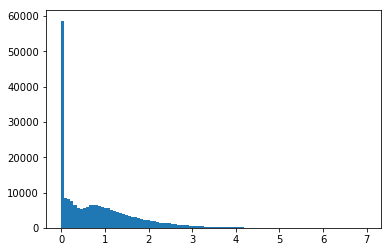

In [43]:
plt.hist(np.array(lst).mean(0).reshape([-1]),bins=100);

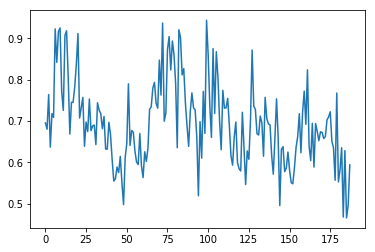

In [44]:
plt.plot(np.array(lst)[:,0,1200]);

In [45]:
for j in range(1680,1690):
    print j,np.nanmean(rawy[:,:,j],dtype=np.float),np.nanmean(y[:,:,j],dtype=np.float)

1680 1.68076379258 0.767920783369
1681 1.6817010969 0.767110917695
1682 1.62592518996 0.723749680765
1683 1.73977632686 0.821946088589
1684 1.71138398698 0.813116099178
1685 1.76363572066 0.845206885747
1686 1.69733310583 0.787718954939
1687 1.70009994492 0.789479112634
1688 nan 0.0
1689 nan 0.0


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [46]:
for j in range(1680,1693):
    u=train_test[:,:,j]
    print j,np.nanmean(np.isnan(u),dtype=np.float),np.nanmean(u,dtype=np.float)

1680

 0.21784239185

 1.43799849545
1681

 0.218423416642

 1.42508597939
1682

 0.219196652615

 1.45447824907
1683

 0.219680944495

 1.44851754788
1684

 0.218495809495

 1.46659679519
1685

 0.217651560775

 1.51060701976
1686

 0.21756900532

 1.49820819843
1687

 0.217877772759

 1.43281392846
1688

 0.216725885777

 1.45581381476
1689

 0.216204456489

 1.44491835795
1690

 0.214961106093

 1.42776050394
1691

 0.213816245107

 1.46842077355
1692

 0.213748619894

 1.49971970214


In [47]:
np.mean(y[:,0,1688],dtype=np.float),np.mean(y[:,0,1686],dtype=np.float),np.mean(y[:,0,1687],dtype=np.float)

(0.0, 0.13274016203703703, 0.14341001157407407)

(54, 4100) 0.813144


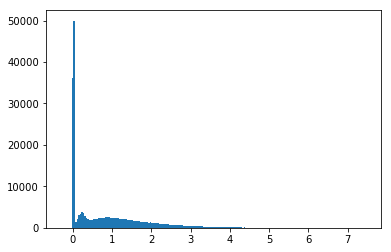

In [48]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1187]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.816805


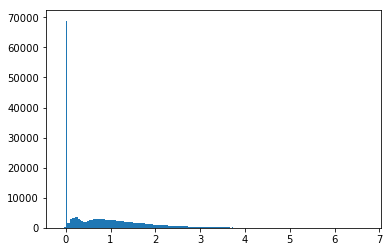

In [49]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1687]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.842506


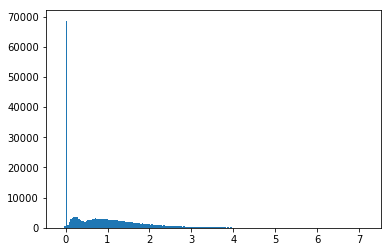

In [50]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.810071


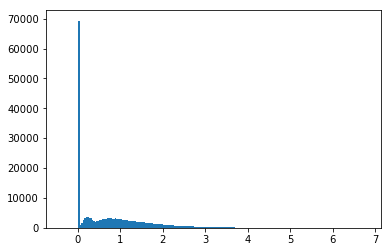

In [51]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1689]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

In [52]:
np.mean(isnan(train_test[:,:,1688]),dtype=np.float)

0.21672588577737628

In [53]:
np.mean(isnan(train_test[:,:,1687]),dtype=np.float)

0.21787777275920908

In [54]:
np.mean(isnan(train_test[:,:,1689]),dtype=np.float)

0.21620445648900932

(54, 4100) 0.842506


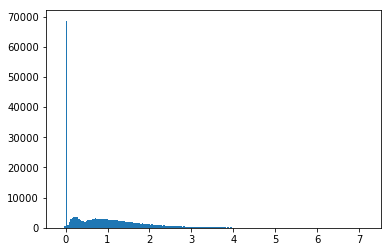

In [55]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);
pickle.dump(yy_pred3,open(a.name+".alt.pred",'wb'))

In [56]:
c=np.arange(60).reshape([3,4,5])

In [57]:
(c.reshape([-1,5]).reshape([3,4,5])==c).all()

True